## Análisis de Datos Univariado ##

Escuelas Primarias

In [543]:
library(readxl)
options(warn=-1)
ruta_guardado1 <- "C:/Users/guill/OneDrive/Escritorio/NOGOYAP.xlsx"
nogoya_PRIMARIO <- read_excel(ruta_guardado1)
head(nogoya_PRIMARIO)

CUE,Departamento,Localidad,EsPrivada,Turno,Curso,PeriodoEvaluatorio,Documento,Asignatura,NivelEnsenanza,ModEnsenanza,AnioLectivo,NotasPrimerTPrimario,NotasSegundoTPrimario,NotasTercerTPrimario,Promedio,Condicion
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
9005370,NOGOYA,NOGOYÁ,N,MAÑANA,SEXTO,Tercer Trimestre,49224307,MATEMATICA,PRIMARIO,Comun,2023,6,6,EPAC,Desaprobado,DESAPROBADO
9005370,NOGOYA,NOGOYÁ,N,MAÑANA,SEXTO,Tercer Trimestre,49224307,MATEMATICA,PRIMARIO,Comun,2023,6,6,EPAC,Desaprobado,DESAPROBADO
9005547,NOGOYA,NOGOYÁ,N,MAÑANA,SEXTO,Tercer Trimestre,49438965,LENGUA,PRIMARIO,Comun,2023,6,EPAC,EPAC,Desaprobado,DESAPROBADO
9005373,NOGOYA,NOGOYÁ,N,MAÑANA,SEXTO,Tercer Trimestre,49565265,LENGUA,PRIMARIO,Comun,2023,7,6,EPAC,Desaprobado,DESAPROBADO
9005373,NOGOYA,NOGOYÁ,N,MAÑANA,SEXTO,Tercer Trimestre,49565265,MATEMATICA,PRIMARIO,Comun,2023,7,6,EPAC,Desaprobado,DESAPROBADO
9003582,NOGOYA,NOGOYÁ,N,COMPLETO,SEXTO,Tercer Trimestre,49817076,LENGUA,PRIMARIO,Comun,2023,EPAC,EPAC,EPAC,Desaprobado,DESAPROBADO


In [544]:
library(dplyr)


In [545]:
nogoya_PRIMARIO<- nogoya_PRIMARIO %>% select(-Departamento, -PeriodoEvaluatorio)

In [546]:
head(nogoya_PRIMARIO)

CUE,Localidad,EsPrivada,Turno,Curso,Documento,Asignatura,NivelEnsenanza,ModEnsenanza,AnioLectivo,NotasPrimerTPrimario,NotasSegundoTPrimario,NotasTercerTPrimario,Promedio,Condicion
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
9005370,NOGOYÁ,N,MAÑANA,SEXTO,49224307,MATEMATICA,PRIMARIO,Comun,2023,6,6,EPAC,Desaprobado,DESAPROBADO
9005370,NOGOYÁ,N,MAÑANA,SEXTO,49224307,MATEMATICA,PRIMARIO,Comun,2023,6,6,EPAC,Desaprobado,DESAPROBADO
9005547,NOGOYÁ,N,MAÑANA,SEXTO,49438965,LENGUA,PRIMARIO,Comun,2023,6,EPAC,EPAC,Desaprobado,DESAPROBADO
9005373,NOGOYÁ,N,MAÑANA,SEXTO,49565265,LENGUA,PRIMARIO,Comun,2023,7,6,EPAC,Desaprobado,DESAPROBADO
9005373,NOGOYÁ,N,MAÑANA,SEXTO,49565265,MATEMATICA,PRIMARIO,Comun,2023,7,6,EPAC,Desaprobado,DESAPROBADO
9003582,NOGOYÁ,N,COMPLETO,SEXTO,49817076,LENGUA,PRIMARIO,Comun,2023,EPAC,EPAC,EPAC,Desaprobado,DESAPROBADO


In [547]:
nrow(nogoya_PRIMARIO)

[1] 90963

In [548]:
table(nogoya_PRIMARIO$Curso)


 CUARTO PRIMERO  QUINTO SEGUNDO   SEXTO TERCERO 
  14993   12003   18883   13071   18731   13282 

In [549]:
# Verificar cuántos NAs hay en cada columna
colSums(is.na(nogoya_PRIMARIO))


CUE             Localidad             EsPrivada 
                    0                     0                     0 
                Turno                 Curso             Documento 
                    0                     0                     0 
           Asignatura        NivelEnsenanza          ModEnsenanza 
                    0                     0                     0 
          AnioLectivo  NotasPrimerTPrimario NotasSegundoTPrimario 
                    0                     0                     0 
 NotasTercerTPrimario              Promedio             Condicion 
                    0                     0                     0

In [550]:
table(nogoya_PRIMARIO$NotasPrimerTPrimario)


   10     6     7     8     9  EPAC 
 4489  7268 16940 33884 26907  1475 

In [551]:
table(nogoya_PRIMARIO$Asignatura)


            ACOM. AL ESTUDIO MATEMATICA- NATURALES 
                                                14 
                 ACOMP AL EST LENGUA Y CS SOCIALES 
                                               126 
           ACOMP AL EST MATEMÁTICA Y CS. NATURALES 
                                               126 
                 ACOMP. AL ESTUDIO LENGUA-SOCIALES 
                                                14 
                        ACOMP. EST LENG Y SOCIALES 
                                                43 
                              ACOMP. EST MAT Y NAT 
                                                43 
           ACOMPAÑAMIENTO AL EST. LENGUA Y C. SOC. 
                                                53 
                         ACOMPAÑAMIENTO AL ESTUDIO 
                                               119 
         ACOMPAÑAMIENTO AL ESTUDIO  C. NAT. Y MAT. 
                                                53 
ACOMPAÑAMIENTO AL ESTUDIO  MATEMATICA Y  NATURALES 
           

In [552]:
#  convertir a mayúsculas
nogoya_PRIMARIO$Asignatura <- toupper(nogoya_PRIMARIO$Asignatura)
# Buscar valores que contengan "ing" en cualquier parte y reemplazarlos con "INGLES"
nogoya_PRIMARIO$Asignatura <- ifelse(grepl("ing", nogoya_PRIMARIO$Asignatura, ignore.case = TRUE), "INGLES", nogoya_PRIMARIO$Asignatura)
#Renombrar las materias relacionadas a las ciencias naturales
nogoya_PRIMARIO$Asignatura <- gsub("VIDA EN EL MEDIO NATURAL", "CIENCIAS NATURALES", nogoya_PRIMARIO$Asignatura)
table(nogoya_PRIMARIO$Asignatura)


            ACOM. AL ESTUDIO MATEMATICA- NATURALES 
                                                14 
                 ACOMP AL EST LENGUA Y CS SOCIALES 
                                               126 
           ACOMP AL EST MATEMÁTICA Y CS. NATURALES 
                                               126 
                 ACOMP. AL ESTUDIO LENGUA-SOCIALES 
                                                14 
                        ACOMP. EST LENG Y SOCIALES 
                                                43 
                              ACOMP. EST MAT Y NAT 
                                                43 
           ACOMPAÑAMIENTO AL EST. LENGUA Y C. SOC. 
                                                53 
                         ACOMPAÑAMIENTO AL ESTUDIO 
                                               119 
         ACOMPAÑAMIENTO AL ESTUDIO  C. NAT. Y MAT. 
                                                53 
ACOMPAÑAMIENTO AL ESTUDIO  MATEMATICA Y  NATURALES 
           

## Escuelas Secundarias ##

In [553]:
ruta_guardado2 <- "C:/Users/guill/OneDrive/Escritorio/NOGOYAS.xlsx"
nogoya_SECUNDARIO <- read_excel(ruta_guardado2)
head(nogoya_SECUNDARIO)

CUE,Departamento,Localidad,EsPrivada,Turno,Curso,PeriodoEvaluatorio,Documento,Asignatura,NivelEnsenanza,ModEnsenanza,AnioLectivo,NotasPrimerTSecundario,NotasSegundoTSecundario,NotasTercerTSecundario,Promedio,condicion
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
9005505,NOGOYA,NOGOYÁ,N,MAÑANA,PRIMERO,Tercer Trimestre,41753180,BIOLOGIA,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO
9005505,NOGOYA,NOGOYÁ,N,MAÑANA,PRIMERO,Tercer Trimestre,41753180,EDUCACION FISICA,SECUNDARIO,Comun,2023,7,7,8,7.33,APROBADO
9005505,NOGOYA,NOGOYÁ,N,MAÑANA,PRIMERO,Tercer Trimestre,41753180,ESPACIO DE LA ORIENTACION EN ECONOMIA Y ADMINISTRACION I,SECUNDARIO,Comun,2023,5,6,7,6.00,APROBADO
9005505,NOGOYA,NOGOYÁ,N,MAÑANA,PRIMERO,Tercer Trimestre,41753180,ESPACIO DE LA ORIENTACION EN ECONOMIA Y ADMINISTRACION II,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO
9005505,NOGOYA,NOGOYÁ,N,MAÑANA,PRIMERO,Tercer Trimestre,41753180,FORMACION ETICA Y CIUDADANA,SECUNDARIO,Comun,2023,7,7,7,7.00,APROBADO
9005505,NOGOYA,NOGOYÁ,N,MAÑANA,PRIMERO,Tercer Trimestre,41753180,HISTORIA - GEOGRAFIA,SECUNDARIO,Comun,2023,6,6,7,6.33,APROBADO


In [554]:
table(nogoya_SECUNDARIO$Curso)


 CUARTO PRIMERO  QUINTO SEGUNDO SEPTIMO   SEXTO TERCERO 
  26410   33226   14855   30701     917    9159   20760 

In [555]:
nogoya_SECUNDARIO<- nogoya_SECUNDARIO %>% select(-Departamento, -PeriodoEvaluatorio)

In [556]:
nogoya_SECUNDARIO <- rename(nogoya_SECUNDARIO, Condicion = condicion)


In [557]:
head(nogoya_SECUNDARIO)

CUE,Localidad,EsPrivada,Turno,Curso,Documento,Asignatura,NivelEnsenanza,ModEnsenanza,AnioLectivo,NotasPrimerTSecundario,NotasSegundoTSecundario,NotasTercerTSecundario,Promedio,Condicion
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,BIOLOGIA,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,EDUCACION FISICA,SECUNDARIO,Comun,2023,7,7,8,7.33,APROBADO
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,ESPACIO DE LA ORIENTACION EN ECONOMIA Y ADMINISTRACION I,SECUNDARIO,Comun,2023,5,6,7,6.00,APROBADO
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,ESPACIO DE LA ORIENTACION EN ECONOMIA Y ADMINISTRACION II,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,FORMACION ETICA Y CIUDADANA,SECUNDARIO,Comun,2023,7,7,7,7.00,APROBADO
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,HISTORIA - GEOGRAFIA,SECUNDARIO,Comun,2023,6,6,7,6.33,APROBADO


#####

######

In [558]:
nogoya_PRIMARIO <-rename(nogoya_PRIMARIO, NotasPrimerTrimestre = NotasPrimerTPrimario, NotasSegundoTrimestre = NotasSegundoTPrimario , NotasTercerTrimestre = NotasTercerTPrimario  )
nogoya_SECUNDARIO <-rename(nogoya_SECUNDARIO, NotasPrimerTrimestre = NotasPrimerTSecundario, NotasSegundoTrimestre = NotasSegundoTSecundario, NotasTercerTrimestre = NotasTercerTSecundario )

In [559]:
# Convertir las variables a tipo numeric
nogoya_SECUNDARIO$NotasPrimerTrimestre <- as.numeric(nogoya_SECUNDARIO$NotasPrimerTrimestre)
nogoya_SECUNDARIO$NotasSegundoTrimestre <- as.numeric(nogoya_SECUNDARIO$NotasSegundoTrimestre)


In [560]:
head(nogoya_SECUNDARIO)

CUE,Localidad,EsPrivada,Turno,Curso,Documento,Asignatura,NivelEnsenanza,ModEnsenanza,AnioLectivo,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre,Promedio,Condicion
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,BIOLOGIA,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,EDUCACION FISICA,SECUNDARIO,Comun,2023,7,7,8,7.33,APROBADO
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,ESPACIO DE LA ORIENTACION EN ECONOMIA Y ADMINISTRACION I,SECUNDARIO,Comun,2023,5,6,7,6.00,APROBADO
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,ESPACIO DE LA ORIENTACION EN ECONOMIA Y ADMINISTRACION II,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,FORMACION ETICA Y CIUDADANA,SECUNDARIO,Comun,2023,7,7,7,7.00,APROBADO
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,HISTORIA - GEOGRAFIA,SECUNDARIO,Comun,2023,6,6,7,6.33,APROBADO


In [561]:
head(nogoya_PRIMARIO)

CUE,Localidad,EsPrivada,Turno,Curso,Documento,Asignatura,NivelEnsenanza,ModEnsenanza,AnioLectivo,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre,Promedio,Condicion
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
9005370,NOGOYÁ,N,MAÑANA,SEXTO,49224307,MATEMATICA,PRIMARIO,Comun,2023,6,6,EPAC,Desaprobado,DESAPROBADO
9005370,NOGOYÁ,N,MAÑANA,SEXTO,49224307,MATEMATICA,PRIMARIO,Comun,2023,6,6,EPAC,Desaprobado,DESAPROBADO
9005547,NOGOYÁ,N,MAÑANA,SEXTO,49438965,LENGUA,PRIMARIO,Comun,2023,6,EPAC,EPAC,Desaprobado,DESAPROBADO
9005373,NOGOYÁ,N,MAÑANA,SEXTO,49565265,LENGUA,PRIMARIO,Comun,2023,7,6,EPAC,Desaprobado,DESAPROBADO
9005373,NOGOYÁ,N,MAÑANA,SEXTO,49565265,MATEMATICA,PRIMARIO,Comun,2023,7,6,EPAC,Desaprobado,DESAPROBADO
9003582,NOGOYÁ,N,COMPLETO,SEXTO,49817076,LENGUA,PRIMARIO,Comun,2023,EPAC,EPAC,EPAC,Desaprobado,DESAPROBADO


In [562]:
dim(nogoya_PRIMARIO)

[1] 90963    15

In [563]:
dim(nogoya_SECUNDARIO)

[1] 136028     15

In [564]:
table(nogoya_SECUNDARIO$Asignatura)


                                      ANALISIS MATEMATICO 
                                                       63 
                                           ARTES VISUALES 
                                                     8801 
                                                 BIOLOGIA 
                                                     8079 
                                               CATEQUESIS 
                                                      466 
                                   CEREALES Y OLEAGINOSAS 
                                                       65 
                            CIENCIAS NATURALES (BIOLOGIA) 
                                                      905 
                      CIENCIAS NATURALES (FISICO QUIMICA) 
                                                      341 
        CIENCIAS NATURALES APLICADAS A PRO. AGROPECUARIOS 
                                                       88 
                              CIENCIAS NATURALES BIOLOG

In [565]:
# Crear una variable lógica que identifique las instancias que contienen "matem" o "MATEM"
Condicion <- grepl("matem|MATEM", nogoya_SECUNDARIO$Asignatura)

# Actualizar las instancias que cumplen con la condición a "MATEMATICA"
nogoya_SECUNDARIO$Asignatura[Condicion] <- "MATEMATICA"

In [566]:
# Suponiendo que 'df' es tu dataframe y 'nombre_variable' es la columna a modificar
nogoya_SECUNDARIO$Asignatura <- as.character(nogoya_SECUNDARIO$Asignatura) # Convertir a caracter si es necesario

# Reemplazar los valores específicos por "LENGUA Y LITERATURA"
nogoya_SECUNDARIO$Asignatura[nogoya_SECUNDARIO$Asignatura == "LITERATURA ARGENTINA"] <- "LENGUA Y LITERATURA"
nogoya_SECUNDARIO$Asignatura[nogoya_SECUNDARIO$Asignatura == "LITERATURA LATINOAMERICANA"] <- "LENGUA Y LITERATURA"


In [567]:
table(nogoya_SECUNDARIO$Asignatura)


                                           ARTES VISUALES 
                                                     8801 
                                                 BIOLOGIA 
                                                     8079 
                                               CATEQUESIS 
                                                      466 
                                   CEREALES Y OLEAGINOSAS 
                                                       65 
                            CIENCIAS NATURALES (BIOLOGIA) 
                                                      905 
                      CIENCIAS NATURALES (FISICO QUIMICA) 
                                                      341 
        CIENCIAS NATURALES APLICADAS A PRO. AGROPECUARIOS 
                                                       88 
                              CIENCIAS NATURALES BIOLOGIA 
                                                     1086 
                       CIENCIAS NATURALES FISICA  QUIMI

In [568]:
# Renombrar Historia
nogoya_SECUNDARIO$Asignatura[grepl("HISTORIA", nogoya_SECUNDARIO$Asignatura)] <- "HISTORIA"

# Renombrar Biología
nogoya_SECUNDARIO$Asignatura[grepl("BIOLOGIA|CIENCIAS NATURALES|ECOLOGIA", nogoya_SECUNDARIO$Asignatura)] <- "BIOLOGIA"

# Renombrar Geografía
nogoya_SECUNDARIO$Asignatura[grepl("GEOGRAFIA", nogoya_SECUNDARIO$Asignatura)] <- "GEOGRAFIA"

# Renombrar Física y Química
nogoya_SECUNDARIO$Asignatura[grepl("FISICO-QUIMICA|FISICA|FISICO|QUIMICA|TERMODINAMICA", nogoya_SECUNDARIO$Asignatura) & 
                             !grepl("EDUCACION FISICA", nogoya_SECUNDARIO$Asignatura)] <- "FISICO QUIMICA"






In [569]:
nogoya_SECUNDARIO$Asignatura[grepl("LENGUA EXTRANJERA", nogoya_SECUNDARIO$Asignatura)] <- "LENGUAS EXTRANJERAS"


In [570]:
table(nogoya_SECUNDARIO$Asignatura)


                                           ARTES VISUALES 
                                                     8801 
                                                 BIOLOGIA 
                                                    11835 
                                               CATEQUESIS 
                                                      466 
                                   CEREALES Y OLEAGINOSAS 
                                                       65 
                                              COMPUTACION 
                                                      111 
                                              COMPUTACIÓN 
                                                       40 
                                            COMPUTACION I 
                                                       60 
                                             COMUNICACION 
                                                       95 
                                       CONTROL DE CALID

In [571]:
table(nogoya_SECUNDARIO$ModEnsenanza)


     Agrotécnica Cap Tecnica Priv            Comun          Técnica 
            6971              243           117870            10944 

In [572]:
nogoya_SECUNDARIO <- nogoya_SECUNDARIO %>%
  mutate(ModEnsenanza = ifelse(ModEnsenanza == "Cap Tecnica Priv", "Técnica", ModEnsenanza))

In [573]:
# Me quedo sin datos duplicados en ambos dataset

# Eliminar filas duplicadas en nogoya_PRIMARIO
nogoya_PRIMARIO<- distinct(nogoya_PRIMARIO)

# Eliminar filas duplicadas en nogoya_SECUNDARIO 
nogoya_SECUNDARIO <- distinct(nogoya_SECUNDARIO)

# Verificar si hubo cambios
cat("Número de filas en nogoya_PRIMARIO sin duplicados:", nrow(nogoya_PRIMARIO), "\n")
cat("Número de filas en nogoya_SECUNDARIO sin duplicados:", nrow(nogoya_SECUNDARIO), "\n")

Número de filas en nogoya_PRIMARIO sin duplicados: 29270 
Número de filas en nogoya_SECUNDARIO sin duplicados: 34610 


In [574]:
#Combinar Dataset

# Combinar los dos conjuntos de datos por filas
nogoya_unificado <- rbind(nogoya_PRIMARIO, nogoya_SECUNDARIO)
dim(nogoya_unificado)

[1] 63880    15

In [575]:
table(nogoya_unificado$Turno)


COMPLETO   DIURNO    DOBLE   MAÑANA ROTATIVO    TARDE 
    2079      769     3565    33853       96    23518 

## DISTRIBUCION POR NIVEL (primaria/secundaria) ##

In [576]:
# Mantener solo una entrada por documento
nogoya_unificado_unico <- nogoya_unificado %>% 
  distinct(Documento, .keep_all = TRUE)

# Verificar el nuevo dataframe
head(nogoya_unificado_unico)

CUE,Localidad,EsPrivada,Turno,Curso,Documento,Asignatura,NivelEnsenanza,ModEnsenanza,AnioLectivo,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre,Promedio,Condicion
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
9005370,NOGOYÁ,N,MAÑANA,SEXTO,49224307,MATEMATICA,PRIMARIO,Comun,2023,6,6,EPAC,Desaprobado,DESAPROBADO
9005547,NOGOYÁ,N,MAÑANA,SEXTO,49438965,LENGUA,PRIMARIO,Comun,2023,6,EPAC,EPAC,Desaprobado,DESAPROBADO
9005373,NOGOYÁ,N,MAÑANA,SEXTO,49565265,LENGUA,PRIMARIO,Comun,2023,7,6,EPAC,Desaprobado,DESAPROBADO
9003582,NOGOYÁ,N,COMPLETO,SEXTO,49817076,LENGUA,PRIMARIO,Comun,2023,EPAC,EPAC,EPAC,Desaprobado,DESAPROBADO
9005370,NOGOYÁ,N,MAÑANA,SEXTO,50247480,MATEMATICA,PRIMARIO,Comun,2023,6,6,EPAC,Desaprobado,DESAPROBADO
9005373,NOGOYÁ,N,MAÑANA,SEXTO,50247492,CIENCIAS SOCIALES,PRIMARIO,Comun,2023,EPAC,6,EPAC,Desaprobado,DESAPROBADO


In [577]:
## Crear la tabla de frecuencias para la variable nivelEnsenanza
tabla_frecuencias_depto <- nogoya_unificado_unico %>%
  count(NivelEnsenanza) %>%
  mutate(
    Frecuencia_Relativa = n / sum(n),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual)
  )

View(tabla_frecuencias_depto)

NivelEnsenanza,n,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
PRIMARIO,2939,0.5167927,0.5167927,51.67927,51.67927
SECUNDARIO,2748,0.4832073,1.0000000,48.32073,100.00000


## Gráfico

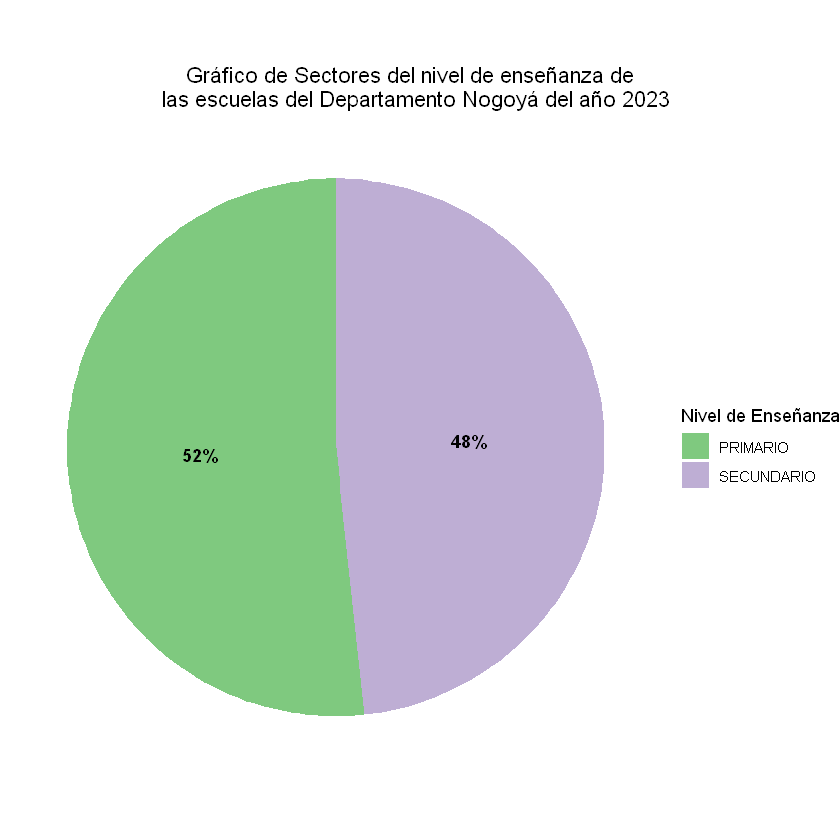

In [578]:
library(RColorBrewer)
library(ggplot2)

ggplot(tabla_frecuencias_depto, aes(x = "", y = Frecuencia_Relativa, fill = NivelEnsenanza)) +
  geom_col() +
  coord_polar(theta = "y") +
  theme_void() +
  labs(
    fill = "Nivel de Enseñanza",
    title = "                               Gráfico de Sectores del nivel de enseñanza de 
                           las escuelas del Departamento Nogoyá del año 2023"
  ) +
  geom_text(aes(label = scales::percent(Frecuencia_Relativa, accuracy = 1)), 
            position = position_stack(vjust = 0.5), 
            fontface = "bold") +
  scale_fill_brewer(palette = "Accent")  # Cambia "Set2" por otra paleta como "Dark2", "Paired", etc.
ggsave("grafico_nivel_ensenanza.png", width = 8, height = 6, dpi = 300)



## DISTRIBUCION POR TURNO ##

## Departamento completo ##

In [579]:
## Crear la tabla de frecuencias para la variable Turno
tabla_frecuencias_departamento <- nogoya_unificado_unico %>%
  count(Turno) %>%
  mutate(
    Frecuencia_Relativa = n / sum(n),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual)
  )

View(tabla_frecuencias_departamento)

Turno,n,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
COMPLETO,164,0.028837700,0.02883770,2.8837700,2.883770
DIURNO,75,0.013187973,0.04202567,1.3187973,4.202567
DOBLE,279,0.049059258,0.09108493,4.9059258,9.108493
MAÑANA,2812,0.494461052,0.58554598,49.4461052,58.554598
ROTATIVO,13,0.002285915,0.58783190,0.2285915,58.783190
TARDE,2344,0.412168103,1.00000000,41.2168103,100.000000


## Gráfico

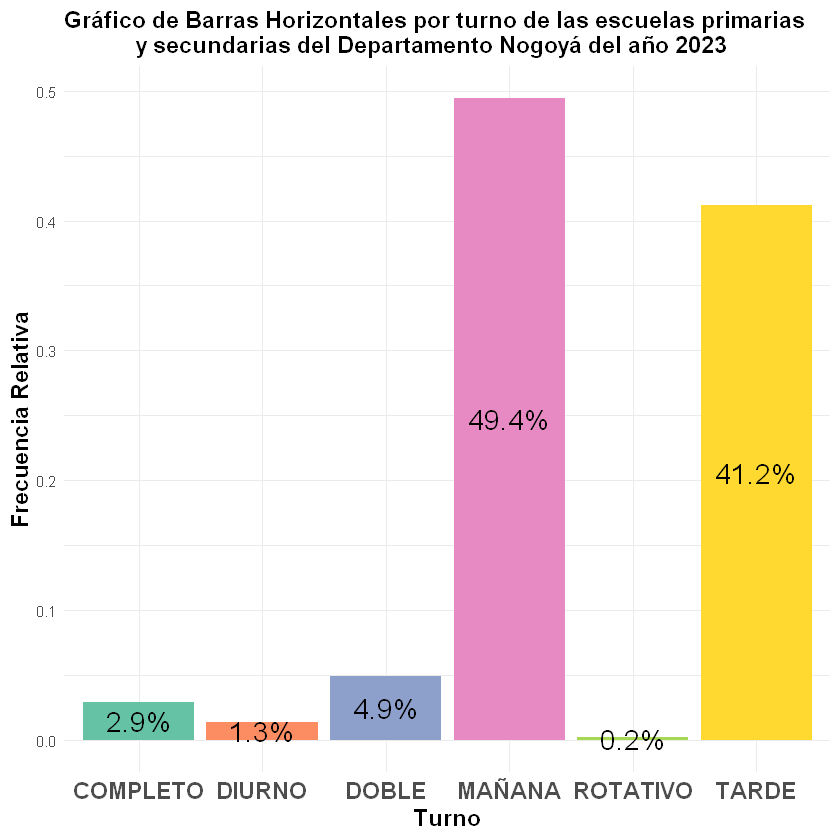

In [580]:

ggplot(tabla_frecuencias_departamento, aes(x = Turno, y = Frecuencia_Relativa, fill = Turno)) +
  geom_bar(stat = "identity") +
  theme_minimal() +  # Tema minimalista
  labs(
    x = "Turno",  # Etiqueta para el eje x
    y = "Frecuencia Relativa",  # Etiqueta para el eje y
    title = "Gráfico de Barras Horizontales por turno de las escuelas primarias 
            y secundarias del Departamento Nogoyá del año 2023"  # Título del gráfico
  ) +
  geom_text(aes(label = scales::percent(Frecuencia_Relativa)), position = position_stack(vjust = 0.5), 
            size = 6) +  # Hace los porcentajes más grandes (puedes ajustar el tamaño)
  guides(fill = FALSE) +  # Elimina la leyenda de colores
  scale_fill_brewer(palette = "Set2") +  # Aplica la paleta de colores "Accent"
  theme(
    axis.text.x = element_text(face = "bold", size = 14),  # Pone los valores del eje X en negrita y tamaño 14
    axis.title.x = element_text(size = 14, face = "bold"),  # Hace el título del eje X más grande y en negrita
    axis.title.y = element_text(size = 14, face = "bold"),  # Hace el título del eje Y más grande y en negrita
    plot.title = element_text(size = 14, face = "bold")  # Hace el título del gráfico más grande y en negrita
  )
ggsave("grafico_turnos.png", width = 8, height = 6, dpi = 300)


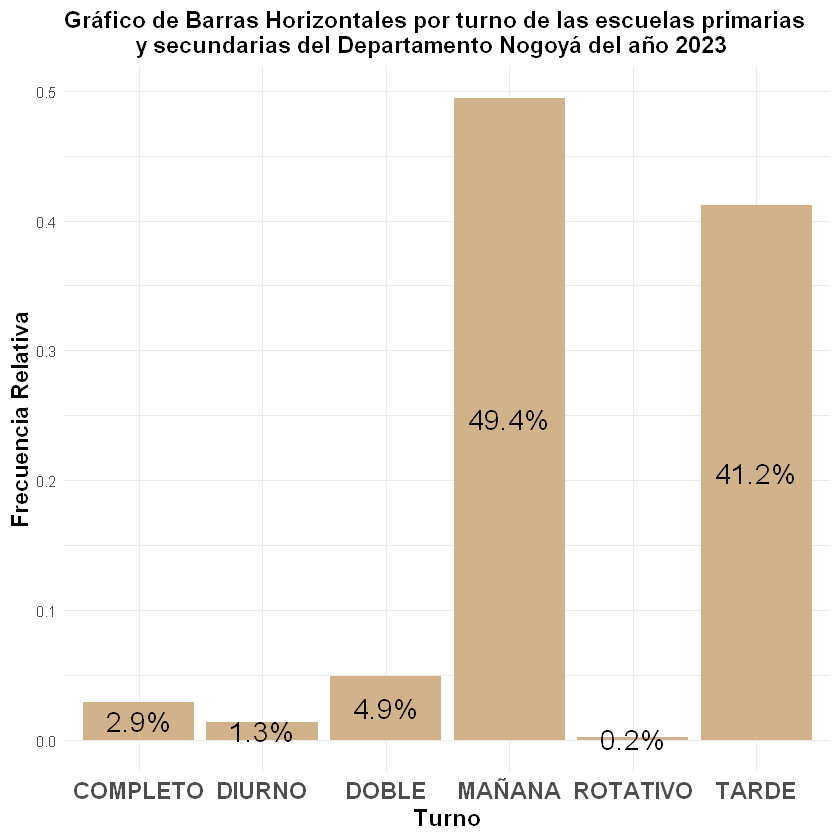

In [581]:
library(ggplot2)

ggplot(tabla_frecuencias_departamento, aes(x = Turno, y = Frecuencia_Relativa)) +
  geom_bar(stat = "identity", fill = "#D1B28B") +  # Color verde suave para todas las barras
  theme_minimal() +  # Tema limpio y minimalista
  labs(
    x = "Turno",  # Etiqueta para el eje x
    y = "Frecuencia Relativa",  # Etiqueta para el eje y
    title = "Gráfico de Barras Horizontales por turno de las escuelas primarias 
            y secundarias del Departamento Nogoyá del año 2023"  # Título del gráfico
  ) +
  geom_text(aes(label = scales::percent(Frecuencia_Relativa)), 
            position = position_stack(vjust = 0.5), 
            size = 6) +  # Agrega etiquetas de porcentaje con tamaño más grande
  theme(
    axis.text.x = element_text(face = "bold", size = 14),  # Texto del eje X en negrita y tamaño 14
    axis.title.x = element_text(size = 14, face = "bold"),  # Título del eje X más grande y en negrita
    axis.title.y = element_text(size = 14, face = "bold"),  # Título del eje Y más grande y en negrita
    plot.title = element_text(size = 14, face = "bold")  # Título del gráfico más grande y en negrita
  )


## Escuelas Primarias ##

In [582]:
# Mantener solo una entrada por documento en nogoya_PRIMARIO
nogoya_PRIMARIO_unico <- nogoya_PRIMARIO %>% 
  distinct(Documento, .keep_all = TRUE)

# Verificar el nuevo dataframe
head(nogoya_PRIMARIO_unico)

CUE,Localidad,EsPrivada,Turno,Curso,Documento,Asignatura,NivelEnsenanza,ModEnsenanza,AnioLectivo,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre,Promedio,Condicion
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
9005370,NOGOYÁ,N,MAÑANA,SEXTO,49224307,MATEMATICA,PRIMARIO,Comun,2023,6,6,EPAC,Desaprobado,DESAPROBADO
9005547,NOGOYÁ,N,MAÑANA,SEXTO,49438965,LENGUA,PRIMARIO,Comun,2023,6,EPAC,EPAC,Desaprobado,DESAPROBADO
9005373,NOGOYÁ,N,MAÑANA,SEXTO,49565265,LENGUA,PRIMARIO,Comun,2023,7,6,EPAC,Desaprobado,DESAPROBADO
9003582,NOGOYÁ,N,COMPLETO,SEXTO,49817076,LENGUA,PRIMARIO,Comun,2023,EPAC,EPAC,EPAC,Desaprobado,DESAPROBADO
9005370,NOGOYÁ,N,MAÑANA,SEXTO,50247480,MATEMATICA,PRIMARIO,Comun,2023,6,6,EPAC,Desaprobado,DESAPROBADO
9005373,NOGOYÁ,N,MAÑANA,SEXTO,50247492,CIENCIAS SOCIALES,PRIMARIO,Comun,2023,EPAC,6,EPAC,Desaprobado,DESAPROBADO


In [583]:
dim(nogoya_PRIMARIO_unico)

[1] 2939   15

In [584]:
## Crear la tabla de frecuencias para la variable Turno
tabla_frecuencias_primaria <- nogoya_PRIMARIO_unico %>%
  count(Turno) %>%
  mutate(
    Frecuencia_Relativa = n / sum(n),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual)
  )

View(tabla_frecuencias_primaria)

Turno,n,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
COMPLETO,71,0.024157877,0.02415788,2.4157877,2.415788
MAÑANA,1129,0.384144267,0.40830214,38.4144267,40.830214
ROTATIVO,13,0.004423273,0.41272542,0.4423273,41.272542
TARDE,1726,0.587274583,1.00000000,58.7274583,100.000000


## Gráfico

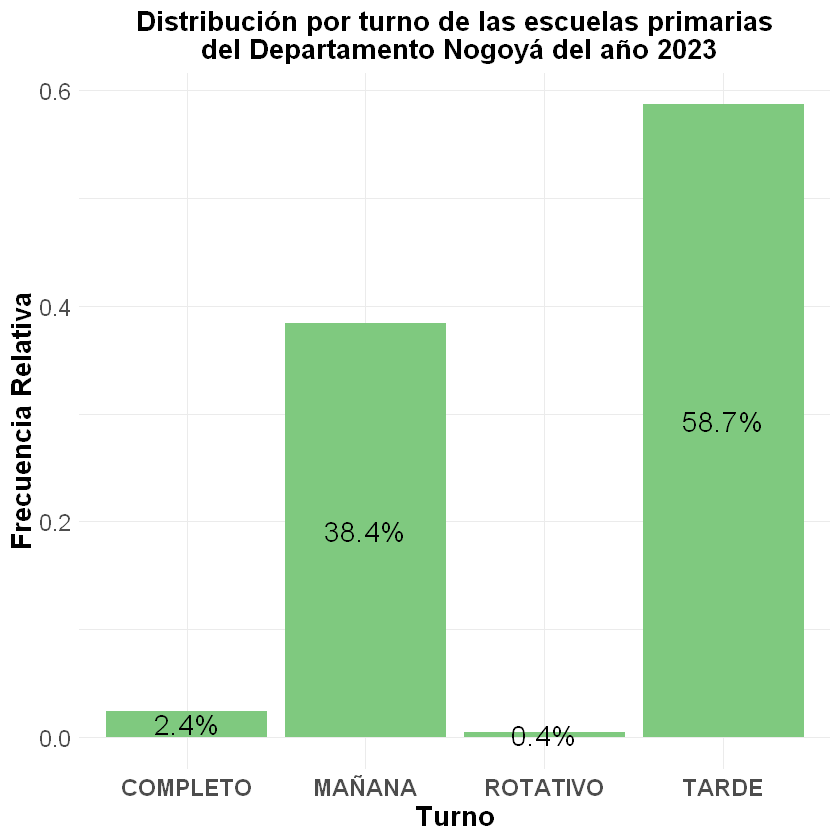

In [585]:

library(ggplot2)

ggplot(tabla_frecuencias_primaria, aes(x = Turno, y = Frecuencia_Relativa)) +
  geom_bar(stat = "identity", fill = "#7FC97F") +  # Violeta de la paleta "Accent"
  theme_minimal() +  # Tema minimalista
  labs(
    x = "Turno",  # Etiqueta para el eje x
    y = "Frecuencia Relativa",  # Etiqueta para el eje y
    title = "Distribución por turno de las escuelas primarias\n del Departamento Nogoyá del año 2023"  # Título del gráfico
  ) +
  geom_text(aes(label = scales::percent(Frecuencia_Relativa)), 
            position = position_stack(vjust = 0.5), size = 6) +  # Aumentar tamaño de los porcentajes
  guides(fill = FALSE) +  # Eliminar la leyenda de colores
  theme(
    axis.text.x = element_text(face = "bold", size = 14),  # Poner los turnos en negrita y aumentar tamaño
    axis.text.y = element_text(size = 14),  # Aumentar tamaño de las etiquetas del eje y
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centrar el título y poner en negrita
    axis.title.x = element_text(size = 16, face = "bold"),  # Aumentar tamaño del nombre del eje x
    axis.title.y = element_text(size = 16, face = "bold")  # Aumentar tamaño del nombre del eje y
  )

ggsave("grafico_turno_primaria.png", width = 8, height = 6, dpi = 300)


## Escuelas secundarias ##

In [586]:
# Mantener solo una entrada por documento en nogoya_SECUNDARIO
nogoya_SECUNDARIO_unico <- nogoya_SECUNDARIO %>% 
  distinct(Documento, .keep_all = TRUE)

# Verificar el nuevo dataframe
head(nogoya_SECUNDARIO_unico)

CUE,Localidad,EsPrivada,Turno,Curso,Documento,Asignatura,NivelEnsenanza,ModEnsenanza,AnioLectivo,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre,Promedio,Condicion
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,BIOLOGIA,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO
9005349,NOGOYÁ,N,TARDE,TERCERO,43630498,ARTES VISUALES,SECUNDARIO,Comun,2023,5,1,1,2.33,DESAPROBADO
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,43630662,BIOLOGIA,SECUNDARIO,Comun,2023,7,9,10,8.67,APROBADO
9009117,NOGOYÁ,S,MAÑANA,SEXTO,44166361,BIOLOGIA,SECUNDARIO,Comun,2023,10,10,10,10.00,APROBADO
9003441,NOGOYÁ,N,TARDE,SEPTIMO,44281187,LABORATORIO DE ENSAYOS DE MAQUINAS Y MOTORES,SECUNDARIO,Técnica,2023,7,7,7,7.00,APROBADO
9008040,NOGOYÁ,N,MAÑANA,SEXTO,44439336,BIOLOGIA,SECUNDARIO,Comun,2023,2,2,2,2.00,DESAPROBADO


In [587]:
sum(duplicated(nogoya_SECUNDARIO_unico$Documento))


[1] 0

In [588]:
## Crear la tabla de frecuencias para la variable Turno
tabla_frecuencias_secundario <- nogoya_SECUNDARIO_unico %>%
  count(Turno) %>%
  mutate(
    Frecuencia_Relativa = n / sum(n),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual)
  )

View(tabla_frecuencias_secundario)

Turno,n,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
COMPLETO,93,0.03384279,0.03384279,3.384279,3.384279
DIURNO,75,0.02729258,0.06113537,2.729258,6.113537
DOBLE,279,0.10152838,0.16266376,10.152838,16.266376
MAÑANA,1683,0.61244541,0.77510917,61.244541,77.510917
TARDE,618,0.22489083,1.00000000,22.489083,100.000000


## Gráfico

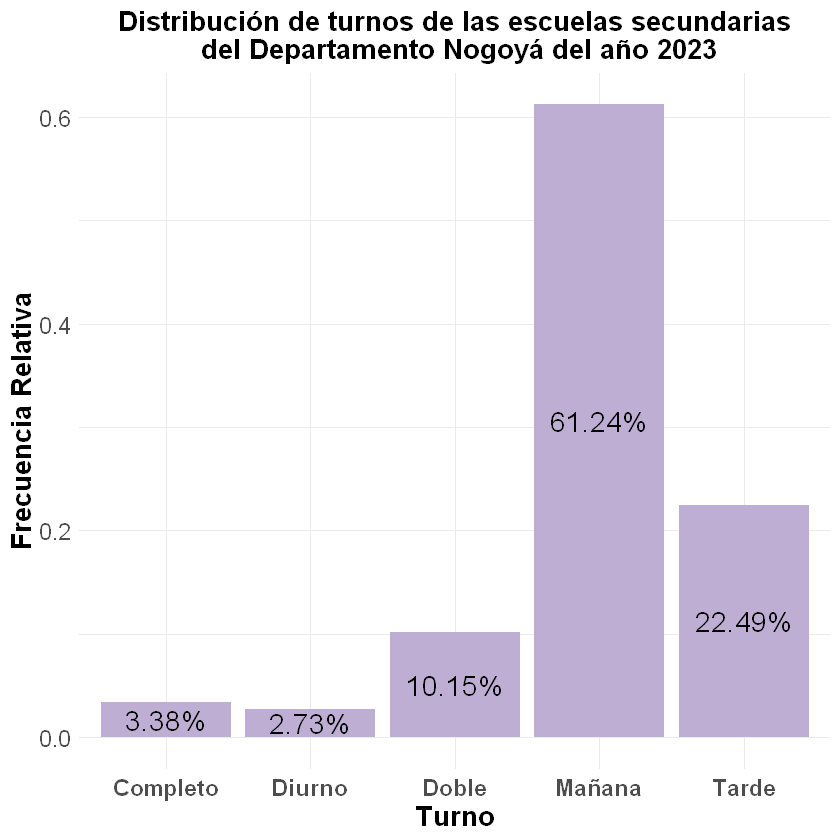

In [589]:
library(ggplot2)
library(stringr)  # Para manipulación de cadenas

ggplot(tabla_frecuencias_secundario, aes(x = str_to_title(Turno), y = Frecuencia_Relativa)) +
  geom_bar(stat = "identity", fill = "#BEAED4") +  # Violeta de la paleta "Accent"
  theme_minimal() +  # Utilizar un tema minimalista
  labs(
    x = "Turno",  # Etiqueta para el eje x
    y = "Frecuencia Relativa",  # Etiqueta para el eje y
    title = "Distribución de turnos de las escuelas secundarias\n del Departamento Nogoyá del año 2023"  # Título del gráfico
  ) +
  geom_text(aes(label = scales::percent(Frecuencia_Relativa)), position = position_stack(vjust = 0.5), size = 6) +  # Agregar etiquetas de porcentaje
  guides(fill = FALSE) +  # Eliminar la leyenda de colores
  theme(
    axis.text.x = element_text(face = "bold", size = 14, angle = 0),  # Poner los turnos en negrita
    axis.text.y = element_text(size = 14),  # Aumentar tamaño de las etiquetas del eje y
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centrar el título y poner en negrita
    axis.title.x = element_text(size = 16, face = "bold"),  # Aumentar tamaño del nombre del eje x
    axis.title.y = element_text(size = 16, face = "bold")  # Aumentar tamaño del nombre del eje y
  )

ggsave("grafico_turno_secundaria.png", width = 8, height = 6, dpi = 300)


## ##

## DISTRIBUCION POR SECTOR ##

## Departamento completo

In [590]:
tabla_frecuencias_esPrivada_unificado <- nogoya_unificado_unico %>%
  count(EsPrivada) %>%
  mutate(
    Frecuencia_Relativa = n / sum(n),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual),
    Tipo_de_Establecimiento = case_when(
      EsPrivada == "N" ~ "Pública",
      EsPrivada == "S" ~ "Privada",
      TRUE ~ "Otro"
    )
  ) %>%
  filter(Tipo_de_Establecimiento != "Otro")

tabla_frecuencias_esPrivada_unificado

EsPrivada,n,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada,Tipo_de_Establecimiento
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
N,3942,0.6931598,0.6931598,69.31598,69.31598,Pública
S,1745,0.3068402,1.0000000,30.68402,100.00000,Privada


## Gráficos

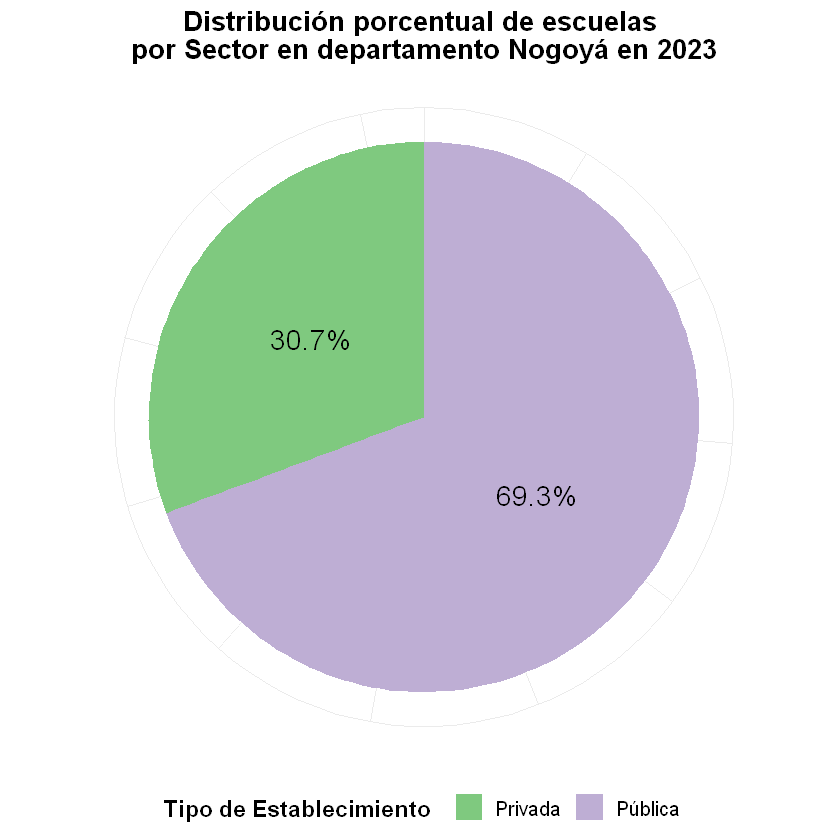

In [591]:
library(ggplot2)

ggplot(tabla_frecuencias_esPrivada_unificado, aes(x = "", y = n, fill = Tipo_de_Establecimiento)) +
  geom_bar(stat = "identity") +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(round(Frecuencia_Porcentual, 1), "%")), position = position_stack(vjust = 0.5), size = 6) +  # Aumentar tamaño de las etiquetas
  scale_fill_brewer(palette = "Accent", name = "Tipo de Establecimiento", labels = c("Privada", "Pública")) +  # Usar paleta Accent
  labs(
    x = NULL,  # Eliminar etiqueta del eje x
    y = NULL,  # Eliminar etiqueta del eje y
    fill = NULL,  # Eliminar la leyenda de colores
    title = "Distribución porcentual de escuelas 
por Sector en departamento Nogoyá en 2023"  # Título del gráfico
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",  # Colocar leyenda abajo
    legend.title = element_text(size = 14, face = "bold"),  # Aumentar tamaño del título de la leyenda
    legend.text = element_text(size = 12),  # Aumentar tamaño del texto de la leyenda
    axis.text.x = element_blank(),  # Eliminar texto en eje x
    axis.ticks.x = element_blank(),  # Eliminar tics en eje x
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centrar título
    axis.text.y = element_text(size = 14),  # Etiquetas del eje y más grandes
    axis.title = element_blank()  # Eliminar los títulos de los ejes
  )
ggsave("grafico_sector.png", width = 8, height = 6, dpi = 300)


## Escuelas primarias ##

In [592]:
tabla_frecuencias_esPrivada_Primaria <- nogoya_PRIMARIO_unico %>%
  count(EsPrivada) %>%
  mutate(
    Frecuencia_Relativa = n / sum(n),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual),
    Tipo_de_Establecimiento = case_when(
      EsPrivada == "N" ~ "Pública",
      EsPrivada == "S" ~ "Privada",
      TRUE ~ "Otro"
    )
  ) %>%
  filter(Tipo_de_Establecimiento != "Otro")

tabla_frecuencias_esPrivada_Primaria

EsPrivada,n,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada,Tipo_de_Establecimiento
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
N,1692,0.575706,0.575706,57.5706,57.5706,Pública
S,1247,0.424294,1.000000,42.4294,100.0000,Privada


## Gráfico

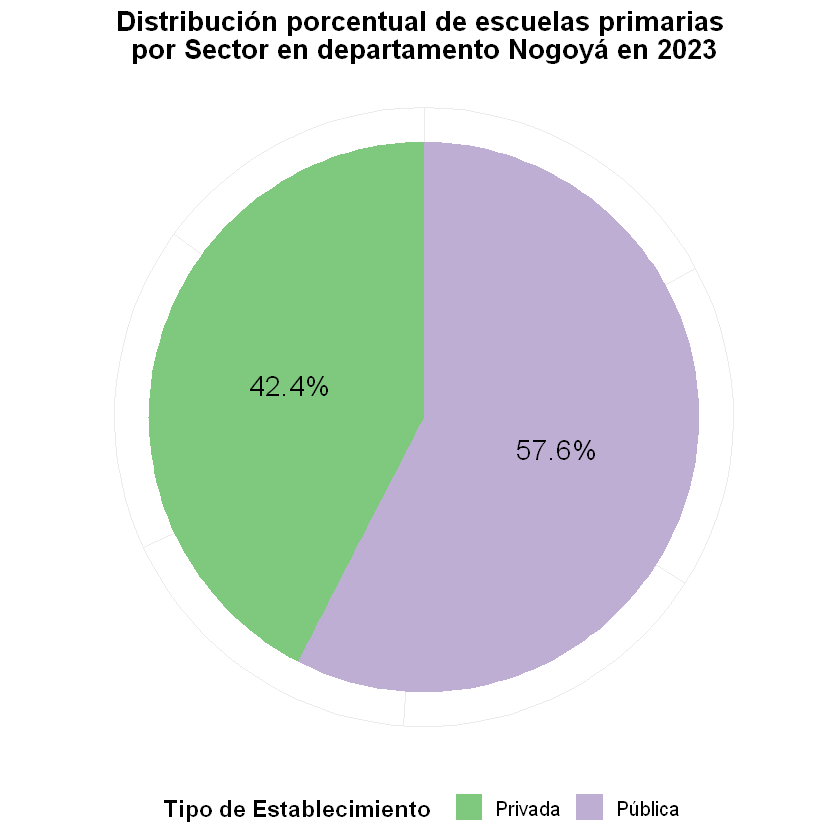

In [593]:
library(ggplot2)

ggplot(tabla_frecuencias_esPrivada_Primaria, aes(x = "", y = n, fill = Tipo_de_Establecimiento)) +
  geom_bar(stat = "identity") +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(round(Frecuencia_Porcentual, 1), "%")), position = position_stack(vjust = 0.5), size = 6) +
  scale_fill_brewer(palette = "Accent", name = "Tipo de Establecimiento", labels = c("Privada", "Pública")) +
  labs(x = NULL, y = NULL, fill = NULL, title = "Distribución porcentual de escuelas primarias 
por Sector en departamento Nogoyá en 2023") +
  theme_minimal() +
  theme(
    legend.position = "bottom",  # Colocar leyenda abajo
    legend.justification = "center",  # Centrar la leyenda
    legend.box.just = "top",  # Colocar el título arriba de los valores de la leyenda
    legend.title = element_text(size = 14, face = "bold"),  # Aumentar tamaño del título de la leyenda
    legend.text = element_text(size = 12),  # Aumentar tamaño del texto de la leyenda
    axis.text.x = element_blank(),  # Eliminar texto en eje x
    axis.ticks.x = element_blank(),  # Eliminar tics en eje x
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centrar título
    axis.text.y = element_text(size = 14),  # Etiquetas del eje y más grandes
    axis.title = element_blank()  # Eliminar los títulos de los ejes
  )
ggsave("grafico_sector_primaria.png", width = 8, height = 6, dpi = 300)


## Escuelas secundarias ##

In [594]:
tabla_frecuencias_esPrivada_Secundaria <- nogoya_SECUNDARIO_unico %>%
  count(EsPrivada) %>%
  mutate(
    Frecuencia_Relativa = n / sum(n),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual),
    Tipo_de_Establecimiento = case_when(
      EsPrivada == "N" ~ "Pública",
      EsPrivada == "S" ~ "Privada",
      TRUE ~ "Otro"
    )
  ) %>%
  filter(Tipo_de_Establecimiento != "Otro")

tabla_frecuencias_esPrivada_Secundaria

EsPrivada,n,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada,Tipo_de_Establecimiento
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
N,2250,0.8187773,0.8187773,81.87773,81.87773,Pública
S,498,0.1812227,1.0000000,18.12227,100.00000,Privada


## Gráfico

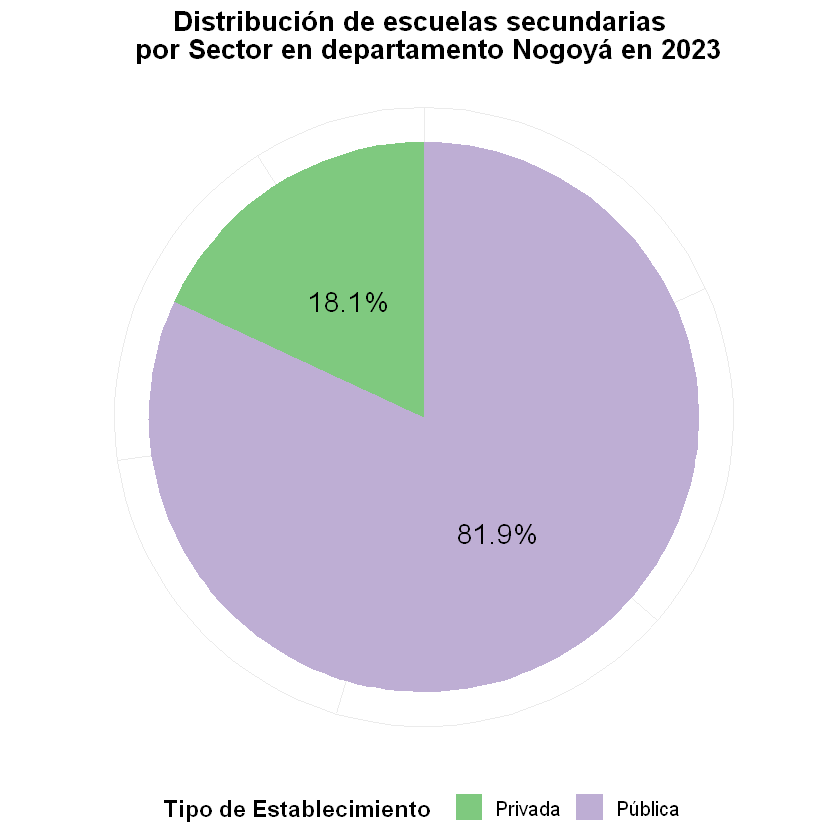

In [595]:
library(ggplot2)

ggplot(tabla_frecuencias_esPrivada_Secundaria, aes(x = "", y = n, fill = Tipo_de_Establecimiento)) +
  geom_bar(stat = "identity") +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(round(Frecuencia_Porcentual, 1), "%")), position = position_stack(vjust = 0.5), size = 6) +
  scale_fill_brewer(palette = "Accent", name = "Tipo de Establecimiento", labels = c("Privada", "Pública")) +
  labs(x = NULL, y = NULL, fill = NULL, title = "Distribución de escuelas secundarias 
 por Sector en departamento Nogoyá en 2023") +
  theme_minimal() +
  theme(
    legend.position = "bottom",  # Colocar leyenda abajo
    legend.justification = "center",  # Centrar la leyenda
    legend.box.just = "top",  # Colocar el título arriba de los valores de la leyenda
    legend.title = element_text(size = 14, face = "bold"),  # Aumentar tamaño del título de la leyenda
    legend.text = element_text(size = 12),  # Aumentar tamaño del texto de la leyenda
    axis.text.x = element_blank(),  # Eliminar texto en eje x
    axis.ticks.x = element_blank(),  # Eliminar tics en eje x
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centrar título
    axis.text.y = element_text(size = 14),  # Etiquetas del eje y más grandes
    axis.title = element_blank()  # Eliminar los títulos de los ejes
  )
ggsave("grafico_sector_secundaria.png", width = 8, height = 6, dpi = 300)


## ##

## DISTRIBUCION POR AÑO DE CURSADO (curso) ##

## Escuelas primarias ##

In [596]:
## Crear la tabla de frecuencias para la variable curso
tabla_frecuencias_anio_cursado_prim <- nogoya_PRIMARIO_unico %>%
  count(Curso) %>%
  mutate(
    Frecuencia_Relativa = n / sum(n),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual)
  )

View(tabla_frecuencias_anio_cursado_prim)

Curso,n,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
CUARTO,482,0.1640014,0.1640014,16.40014,16.40014
PRIMERO,478,0.1626404,0.3266417,16.26404,32.66417
QUINTO,513,0.1745492,0.5011909,17.45492,50.11909
SEGUNDO,509,0.1731882,0.6743790,17.31882,67.43790
SEXTO,433,0.1473290,0.8217081,14.73290,82.17081
TERCERO,524,0.1782919,1.0000000,17.82919,100.00000


## Gráfico

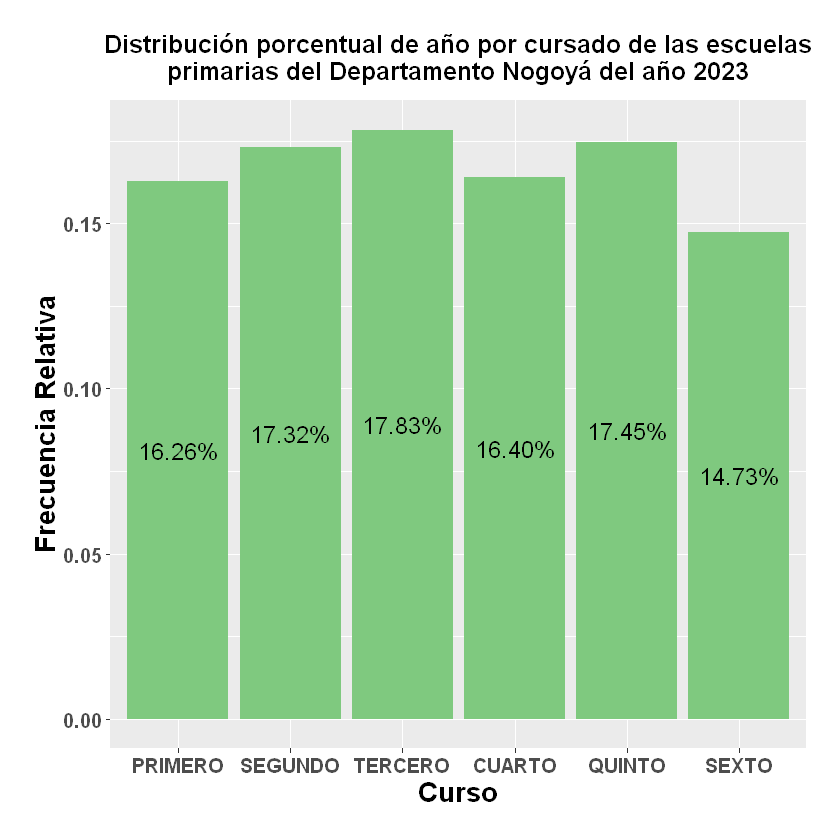

In [597]:
library(ggplot2)
library(stringr)

# Crear el gráfico
ggplot(tabla_frecuencias_anio_cursado_prim, aes(x = factor(Curso, levels = c("PRIMERO", "SEGUNDO", "TERCERO", "CUARTO", "QUINTO", "SEXTO")), y = Frecuencia_Relativa, fill = "green")) +
  geom_bar(stat = "identity") +
  labs(
    x = "Curso",  # Etiqueta para el eje x
    y = "Frecuencia Relativa",  # Etiqueta para el eje y
    fill = "Curso",  # Etiqueta para la leyenda
    title = str_wrap("Distribución porcentual de año por cursado de las escuelas primarias del Departamento Nogoyá del año 2023", width = 60)
  ) +
  geom_text(aes(label = scales::percent(Frecuencia_Relativa)), position = position_stack(vjust = 0.5), size = 5) +  # Aumenta el tamaño de los porcentajes
  guides(fill = FALSE) +  # Eliminar la leyenda
  scale_fill_manual(values = c("#7fc97f")) +  # Usar el verde de la paleta Accent
  theme(
    axis.title = element_text(face = "bold", size = 16),  # Títulos de los ejes más grandes y en negrita
    axis.text = element_text(face = "bold", size = 12),  # Valores de los ejes más grandes y en negrita
    plot.title = element_text(face = "bold", hjust = 0.5, size = 15, margin = margin(b = 10)),  # Título centrado y más grande con margen inferior
    plot.subtitle = element_text(face = "bold", hjust = 0.5, size = 14),  # Subtítulo centrado y en negrita
    plot.margin = margin(20, 20, 20, 20, "pt")  # Ajustar márgenes para que no se corte el título
  )



## Escuelas Secundarias ##

In [598]:
## Crear la tabla de frecuencias para la variable curso
tabla_frecuencias_anio_cursado_sec<- nogoya_SECUNDARIO_unico %>%
  count(Curso) %>%
  mutate(
    Frecuencia_Relativa = n / sum(n),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual)
  )

View(tabla_frecuencias_anio_cursado_sec)

Curso,n,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
CUARTO,506,0.18413392,0.1841339,18.413392,18.41339
PRIMERO,513,0.18668122,0.3708151,18.668122,37.08151
QUINTO,435,0.15829694,0.5291121,15.829694,52.91121
SEGUNDO,487,0.17721980,0.7063319,17.721980,70.63319
SEPTIMO,51,0.01855895,0.7248908,1.855895,72.48908
SEXTO,344,0.12518195,0.8500728,12.518195,85.00728
TERCERO,412,0.14992722,1.0000000,14.992722,100.00000


## Gráfico

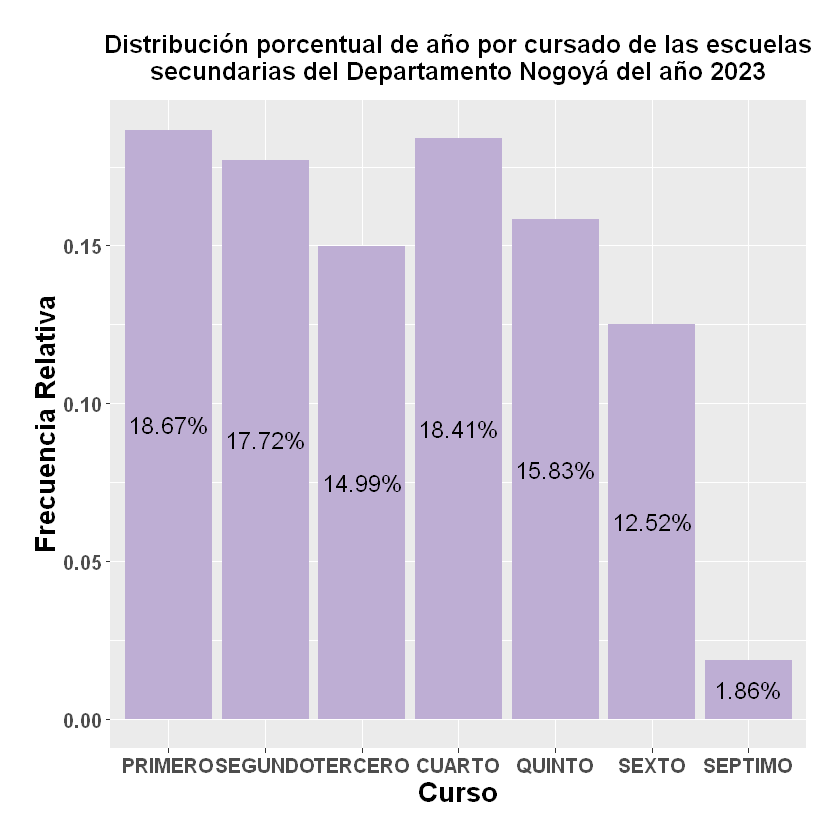

In [599]:
library(ggplot2)
library(stringr)

# Crear el gráfico
ggplot(tabla_frecuencias_anio_cursado_sec, aes(x = factor(Curso, levels = c("PRIMERO", "SEGUNDO", "TERCERO", "CUARTO", "QUINTO", "SEXTO", "SEPTIMO")), y = Frecuencia_Relativa, fill = "#BEAED4")) +
  geom_bar(stat = "identity") +
  labs(
    x = "Curso",  # Etiqueta para el eje x
    y = "Frecuencia Relativa",  # Etiqueta para el eje y
    fill = "Curso",  # Etiqueta para la leyenda
    title = str_wrap("Distribución porcentual de año por cursado de las escuelas secundarias del Departamento Nogoyá del año 2023", width = 60)
  ) +
  geom_text(aes(label = scales::percent(Frecuencia_Relativa)), position = position_stack(vjust = 0.5), size = 5) +  # Aumenta el tamaño de los porcentajes
  guides(fill = FALSE) +  # Eliminar la leyenda
  scale_fill_manual(values = c("#BEAED4")) +  # Usar el verde de la paleta Accent
  theme(
    axis.title = element_text(face = "bold", size = 16),  # Títulos de los ejes más grandes y en negrita
    axis.text = element_text(face = "bold", size = 12),  # Valores de los ejes más grandes y en negrita
    plot.title = element_text(face = "bold", hjust = 0.5, size = 15, margin = margin(b = 10)),  # Título centrado y más grande con margen inferior
    plot.subtitle = element_text(face = "bold", hjust = 0.5, size = 14),  # Subtítulo centrado y en negrita
    plot.margin = margin(20, 20, 20, 20, "pt")  # Ajustar márgenes para que no se corte el título
  )



## CONTRASTE CON LA BASE DE PRIMARIA Y SECUNDARIA ##

### PRIMARIA

In [600]:
library(readxl)

In [601]:
ruta <- "C:/Users/guill/OneDrive/Escritorio/primaria 2023 por departamentos - xls_export.csv"

In [602]:
primaria_por_depto<- read.csv(ruta)


In [603]:
primaria_por_depto_NOGOYA<-filter(primaria_por_depto, Departamento=="NOGOYA")

In [604]:
primaria_por_depto_NOGOYA$Todos <- gsub(",$", "", primaria_por_depto_NOGOYA$Todos)
primaria_por_depto_NOGOYA$Todos <- as.integer(primaria_por_depto_NOGOYA$Todos)

In [605]:
primaria_por_depto_NOGOYA <- primaria_por_depto_NOGOYA %>%
  rename(
    'PrimerGrado' = 'X1er.AÃ.o.Grado',
    'SegundoGrado' = 'X2do.AÃ.o.Grado',
    'TercerGrado' = 'X3er.AÃ.o.Grado',
    'CuartoGrado' = 'X4to.AÃ.o.Grado',
    'QuintoGrado' = 'X5to.AÃ.o.Grado',
    'SextoGrado' = 'X6to.AÃ.o.Grado'
  )


In [606]:
primaria_por_depto_NOGOYA <- primaria_por_depto_NOGOYA %>%
  rename(
    'Ambito' = 'Ã.mbito')

In [607]:
# Convertir las variables de tipo caracter a tipo entero
primaria_por_depto_NOGOYA$PrimerGrado <- as.integer(primaria_por_depto_NOGOYA$PrimerGrado)
primaria_por_depto_NOGOYA$SegundoGrado <- as.integer(primaria_por_depto_NOGOYA$SegundoGrado)
primaria_por_depto_NOGOYA$TercerGrado <- as.integer(primaria_por_depto_NOGOYA$TercerGrado)
primaria_por_depto_NOGOYA$CuartoGrado <- as.integer(primaria_por_depto_NOGOYA$CuartoGrado)
primaria_por_depto_NOGOYA$QuintoGrado <- as.integer(primaria_por_depto_NOGOYA$QuintoGrado)
primaria_por_depto_NOGOYA$SextoGrado <- as.integer(primaria_por_depto_NOGOYA$SextoGrado)

# Verificar los cambios
primaria_por_depto_NOGOYA

Departamento,Sector,Ambito,Todos,PrimerGrado,SegundoGrado,TercerGrado,CuartoGrado,QuintoGrado,SextoGrado,Total.Primer.Ciclo,Total.Segundo.Ciclo
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
NOGOYA,Estatal,Urbano,2188,339,373,379,358,382,357,1091,1097
NOGOYA,Estatal,Rural Aglomerado,34,4,4,9,7,5,5,17,17
NOGOYA,Estatal,Rural Disperso,560,71,91,103,94,108,93,265,295
NOGOYA,Privado,Urbano,1315,215,226,223,222,210,219,664,651


### SECUNDARIA

In [608]:
# Cargar el archivo CSV sin la primera fila
secundaria_por_depto <- read.csv("C:/Users/guill/OneDrive/Escritorio/secundaria por departamentos 2023.csv", header = FALSE)

# Extraer la segunda fila y establecerla como nombres de columna
nombres_columna <- as.character(secundaria_por_depto[2, ])
colnames(secundaria_por_depto) <- nombres_columna

# Eliminar la segunda fila del dataframe
secundaria_por_depto <- secundaria_por_depto[-2, ]

In [609]:
secundaria_por_depto_NOGOYA<-filter(secundaria_por_depto, Departamento=="NOGOYA")

In [610]:
secundaria_por_depto_NOGOYA$Todos <- gsub(",$", "", secundaria_por_depto_NOGOYA$Todos)
secundaria_por_depto_NOGOYA$Todos <- as.integer(secundaria_por_depto_NOGOYA$Todos)

In [611]:
secundaria_por_depto_NOGOYA <- secundaria_por_depto_NOGOYA %>%
  rename(
    'PrimerAnio' = '1er AÃ±o/Grado',
    'SegundoAnio' = '2do AÃ±o/Grado',
    'TercerAnio' = '3er AÃ±o/Grado',
    'CuartoAnio' = '4to AÃ±o/Grado',
    'QuintoAnio' = '5to AÃ±o/Grado',
    'SextoAnio' = '6to AÃ±o/Grado',
    'SeptimoAnio' = '7mo AÃ±o/Grado'
  )

In [612]:
secundaria_por_depto_NOGOYA <- secundaria_por_depto_NOGOYA %>%
  rename( 'Ambito' = 'Ãmbito')

In [613]:
# Convertir las variables de tipo caracter a tipo entero
secundaria_por_depto_NOGOYA$PrimerAnio <- as.integer(secundaria_por_depto_NOGOYA$PrimerAnio)
secundaria_por_depto_NOGOYA$SegundoAnio <- as.integer(secundaria_por_depto_NOGOYA$SegundoAnio)
secundaria_por_depto_NOGOYA$TercerAnio <- as.integer(secundaria_por_depto_NOGOYA$TercerAnio)
secundaria_por_depto_NOGOYA$CuartoAnio <- as.integer(secundaria_por_depto_NOGOYA$CuartoAnio)
secundaria_por_depto_NOGOYA$QuintoAnio <- as.integer(secundaria_por_depto_NOGOYA$QuintoAnio)
secundaria_por_depto_NOGOYA$SextoAnio <- as.integer(secundaria_por_depto_NOGOYA$SextoAnio)

# Verificar los cambios
secundaria_por_depto_NOGOYA

Departamento,Sector,Ambito,Tipo,Todos,PrimerAnio,SegundoAnio,TercerAnio,CuartoAnio,QuintoAnio,SextoAnio,SeptimoAnio,Total Ciclo BÃ¡sico,Total Ciclo Orientado
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
NOGOYA,Estatal,Urbano,ORIENTADA,1520,318,320,282,254,202,144,,920,600
NOGOYA,Estatal,Urbano,TECNICA,259,70,42,47,33,20,33,14,159,100
NOGOYA,Estatal,Rural Aglomerado,ORIENTADA,18,4,3,4,3,3,1,,11,7
NOGOYA,Estatal,Rural Disperso,AGRO,426,87,97,57,63,43,42,37,241,185
NOGOYA,Estatal,Rural Disperso,ORIENTADA,407,79,89,81,61,49,48,,249,158
NOGOYA,Privado,Urbano,ORIENTADA,1223,233,214,227,212,185,152,,674,549


## ##

## DISTRIBUCIÓN POR NIVEL

In [614]:
# Sumar los valores de la variable "Todos" en secundaria_por_depto_NOGOYA
total_secundaria <- sum(secundaria_por_depto_NOGOYA$Todos, na.rm = TRUE)

# Sumar los valores de la variable "Todos" en primaria_por_depto_NOGOYA
total_primaria <- sum(primaria_por_depto_NOGOYA$Todos, na.rm = TRUE)

# Mostrar los totales
total_secundaria
total_primaria

[1] 3853

[1] 4097

## Tabla de frecuencias

In [615]:
tabla_frec_total <- data.frame(
  Nivel = c("Primaria", "Secundaria"),
  Total = c(total_primaria, total_secundaria)
)

# Calcular las frecuencias relativas y porcentuales
tabla_frec_total <- tabla_frec_total %>%
  mutate(
    Frecuencia_Relativa = Total / sum(Total),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual)
  )

# Verificar la tabla de frecuencias combinada
View(tabla_frec_total)

Nivel,Total,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Primaria,4097,0.5153459,0.5153459,51.53459,51.53459
Secundaria,3853,0.4846541,1.0000000,48.46541,100.00000


## Gráfico

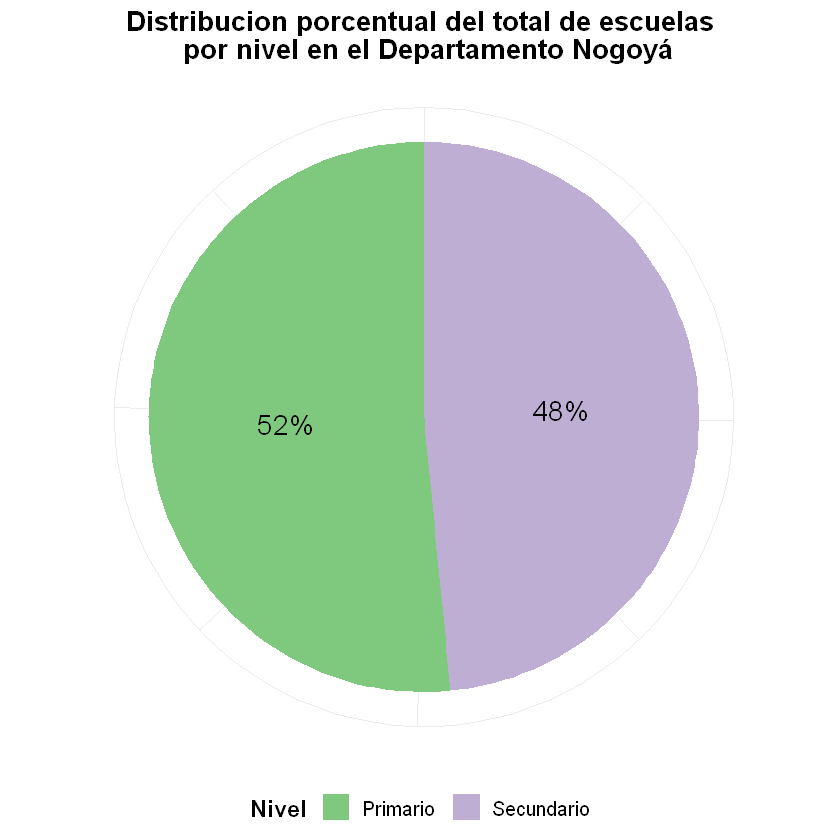

In [616]:
ggplot(tabla_frec_total, aes(x = "", y = Total, fill = Nivel)) +
  geom_bar(stat = "identity") +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(round(Frecuencia_Porcentual), "%")), position = position_stack(vjust = 0.5), size = 6) +
  scale_fill_brewer(palette = "Accent", name = "Nivel", labels = c("Primario", "Secundario", "Terciario")) +
  labs(x = NULL, y = NULL, fill = NULL, title = "Distribucion porcentual del total de escuelas 
 por nivel en el Departamento Nogoyá") +
  theme_minimal() +
  theme(
    legend.position = "bottom",  # Colocar leyenda abajo
    legend.justification = "center",  # Centrar la leyenda
    legend.box.just = "top",  # Colocar el título arriba de los valores de la leyenda
    legend.title = element_text(size = 14, face = "bold"),  # Aumentar tamaño del título de la leyenda
    legend.text = element_text(size = 12),  # Aumentar tamaño del texto de la leyenda
    axis.text.x = element_blank(),  # Eliminar texto en eje x
    axis.ticks.x = element_blank(),  # Eliminar tics en eje x
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centrar título
    axis.text.y = element_text(size = 14),  # Etiquetas del eje y más grandes
    axis.title = element_blank()  # Eliminar los títulos de los ejes
  )


## DISTRIBUCION POR SECTOR ##

## Escuelas primarias ##

In [617]:
tabla_frec_PRIM_DEPTO_NOGO <- primaria_por_depto_NOGOYA %>%
  count(Sector) %>%
  mutate(
    Frecuencia_Relativa = n / sum(n),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual)
  )

View(tabla_frec_PRIM_DEPTO_NOGO)

Sector,n,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Estatal,3,0.75,0.75,75,75
Privado,1,0.25,1.00,25,100


## Gráfico

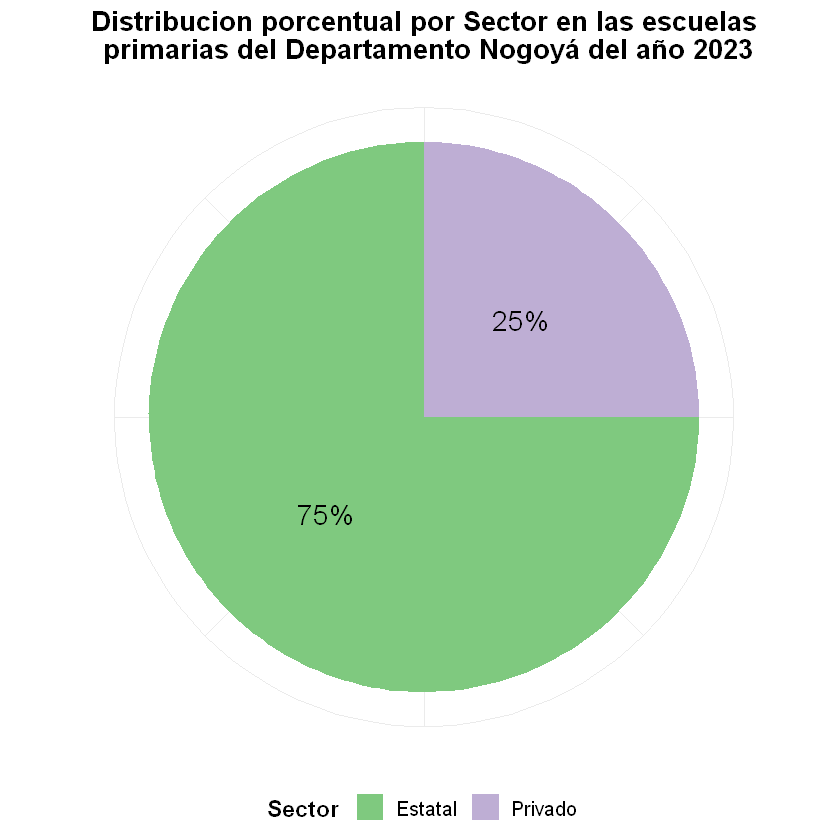

In [618]:
# Crear el gráfico de sectores con la paleta Accent
ggplot(tabla_frec_PRIM_DEPTO_NOGO, aes(x = "", y = Frecuencia_Relativa, fill = Sector)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") +
  geom_text(aes(label = scales::percent(Frecuencia_Relativa)), position = position_stack(vjust = 0.5), size = 6) +  # Agregar etiquetas de porcentaje
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent para los colores
  labs(
    fill = "Sector",  # Etiqueta para la leyenda
    title = "Distribucion porcentual por Sector en las escuelas\n primarias del Departamento Nogoyá del año 2023"  # Título con salto de línea
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",  # Colocar leyenda abajo
    legend.justification = "center",  # Centrar la leyenda
    legend.box.just = "top",  # Colocar el título arriba de los valores de la leyenda
    legend.title = element_text(size = 14, face = "bold"),  # Aumentar tamaño del título de la leyenda
    legend.text = element_text(size = 12),  # Aumentar tamaño del texto de la leyenda
    axis.text.x = element_blank(),  # Eliminar texto en eje x
    axis.ticks.x = element_blank(),  # Eliminar tics en eje x
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centrar título
    axis.text.y = element_text(size = 14),  # Etiquetas del eje y más grandes
    axis.title = element_blank()  # Eliminar los títulos de los ejes
  )


## Escuelas secundarias ##

In [619]:
tabla_frec_SEC_DEPTO_NOGO <- secundaria_por_depto_NOGOYA %>%
  count(Sector) %>%
  mutate(
    Frecuencia_Relativa = n / sum(n),
    Frecuencia_Relativa_Acumulada = cumsum(Frecuencia_Relativa),
    Frecuencia_Porcentual = Frecuencia_Relativa * 100,
    Frecuencia_Porcentual_Acumulada = cumsum(Frecuencia_Porcentual)
  )

View(tabla_frec_SEC_DEPTO_NOGO)

Sector,n,Frecuencia_Relativa,Frecuencia_Relativa_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Estatal,5,0.8333333,0.8333333,83.33333,83.33333
Privado,1,0.1666667,1.0000000,16.66667,100.00000


## Gráfico

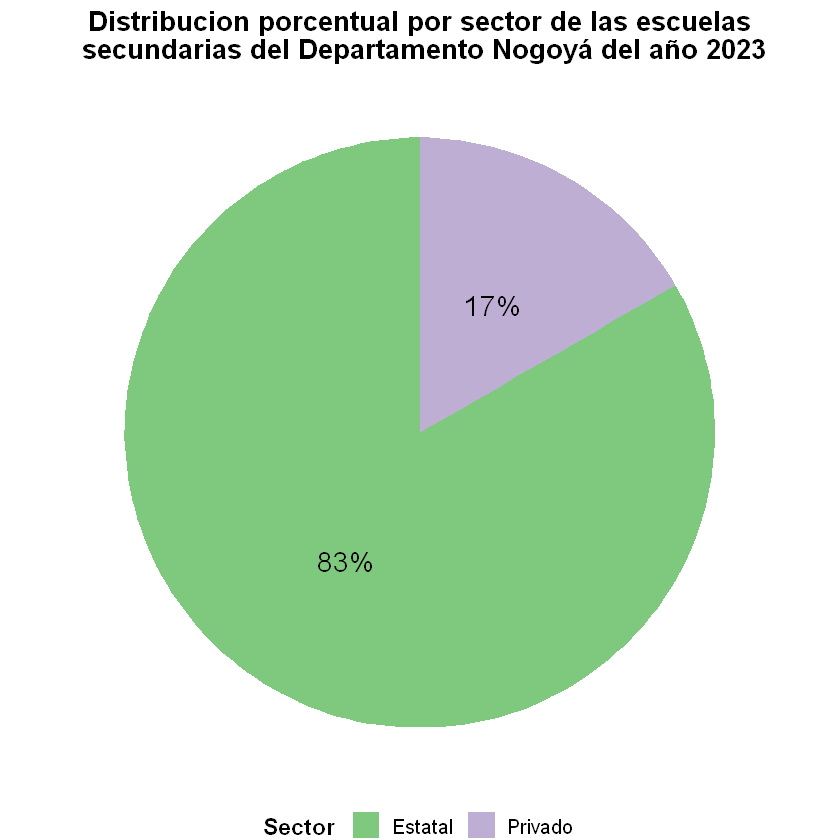

In [620]:
# Crear el gráfico de sectores con la paleta Accent
ggplot(tabla_frec_SEC_DEPTO_NOGO, aes(x = "", y = Frecuencia_Relativa, fill = Sector)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") +
  theme_void() +  # Eliminar elementos del tema para limpiar el gráfico
  labs(
    fill = "Sector",  # Etiqueta para la leyenda
    title = "Distribucion porcentual por sector de las escuelas\n secundarias del Departamento Nogoyá del año 2023"  # Título con salto de línea
  ) +
  geom_text(aes(label = scales::percent(Frecuencia_Relativa)), position = position_stack(vjust = 0.5), size = 6) +  # Agregar etiquetas de porcentaje
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent para los colores
  theme(
    legend.position = "bottom",  # Colocar leyenda abajo
    legend.justification = "center",  # Centrar la leyenda
    legend.box.just = "top",  # Colocar el título arriba de los valores de la leyenda
    legend.title = element_text(size = 14, face = "bold"),  # Aumentar tamaño del título de la leyenda
    legend.text = element_text(size = 12),  # Aumentar tamaño del texto de la leyenda
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),  # Centrar título
    axis.text.x = element_blank(),  # Eliminar texto en eje x
    axis.ticks.x = element_blank(),  # Eliminar tics en eje x
    axis.text.y = element_text(size = 14),  # Etiquetas del eje y más grandes
    axis.title = element_blank()  # Eliminar los títulos de los ejes
  )


##  ##

## DISTRIBUCION POR AÑO DE CURSADO (curso) ##

## Escuelas primarias ##

In [621]:
# Sumamos el número de alumnos por grado
total_primer_grado <- sum(primaria_por_depto_NOGOYA$PrimerGrado)
total_segundo_grado <- sum(primaria_por_depto_NOGOYA$SegundoGrado)
total_tercer_grado <- sum(primaria_por_depto_NOGOYA$TercerGrado)
total_cuarto_grado <- sum(primaria_por_depto_NOGOYA$CuartoGrado)
total_quinto_grado <- sum(primaria_por_depto_NOGOYA$QuintoGrado)
total_sexto_grado <- sum(primaria_por_depto_NOGOYA$SextoGrado)

# Creamos un vector con los totales de alumnos por grado
totales_por_grado <- c("PRIMERO" = total_primer_grado,
                       "SEGUNDO" = total_segundo_grado,
                       "TERCERO" = total_tercer_grado,
                       "CUARTO" = total_cuarto_grado,
                       "QUINTO" = total_quinto_grado,
                       "SEXTO" = total_sexto_grado)

# Mostramos la tabla de frecuencias por grado
print("Tabla de frecuencias por grado:")
print(totales_por_grado)


[1] "Tabla de frecuencias por grado:"
PRIMERO SEGUNDO TERCERO  CUARTO  QUINTO   SEXTO 
    629     694     714     681     705     674 


In [622]:
# Creamos un dataframe con los totales de alumnos por grado
totales_por_grado_df <- data.frame(
  Grado = c("PRIMERO", "SEGUNDO", "TERCERO", "CUARTO", "QUINTO", "SEXTO"),
  Total_Alumnos = c(total_primer_grado, total_segundo_grado, total_tercer_grado, total_cuarto_grado, total_quinto_grado, total_sexto_grado)
)

# Calculamos las frecuencias relativas
totales_por_grado_df$Frecuencia_Relativa <- totales_por_grado_df$Total_Alumnos / sum(totales_por_grado_df$Total_Alumnos)

# Calculamos las frecuencias acumuladas
totales_por_grado_df$Frecuencia_Acumulada <- cumsum(totales_por_grado_df$Frecuencia_Relativa)

# Calculamos las frecuencias porcentuales
totales_por_grado_df$Frecuencia_Porcentual <- totales_por_grado_df$Frecuencia_Relativa * 100

# Calculamos las frecuencias porcentuales acumuladas
totales_por_grado_df$Frecuencia_Porcentual_Acumulada <- cumsum(totales_por_grado_df$Frecuencia_Porcentual)

# Mostramos la tabla de frecuencias por grado
print("Tabla de frecuencias por grado:")
View(totales_por_grado_df)


[1] "Tabla de frecuencias por grado:"


Grado,Total_Alumnos,Frecuencia_Relativa,Frecuencia_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
PRIMERO,629,0.1535270,0.1535270,15.35270,15.35270
SEGUNDO,694,0.1693922,0.3229192,16.93922,32.29192
TERCERO,714,0.1742739,0.4971931,17.42739,49.71931
CUARTO,681,0.1662192,0.6634123,16.62192,66.34123
QUINTO,705,0.1720771,0.8354894,17.20771,83.54894
SEXTO,674,0.1645106,1.0000000,16.45106,100.00000


## Gráfico

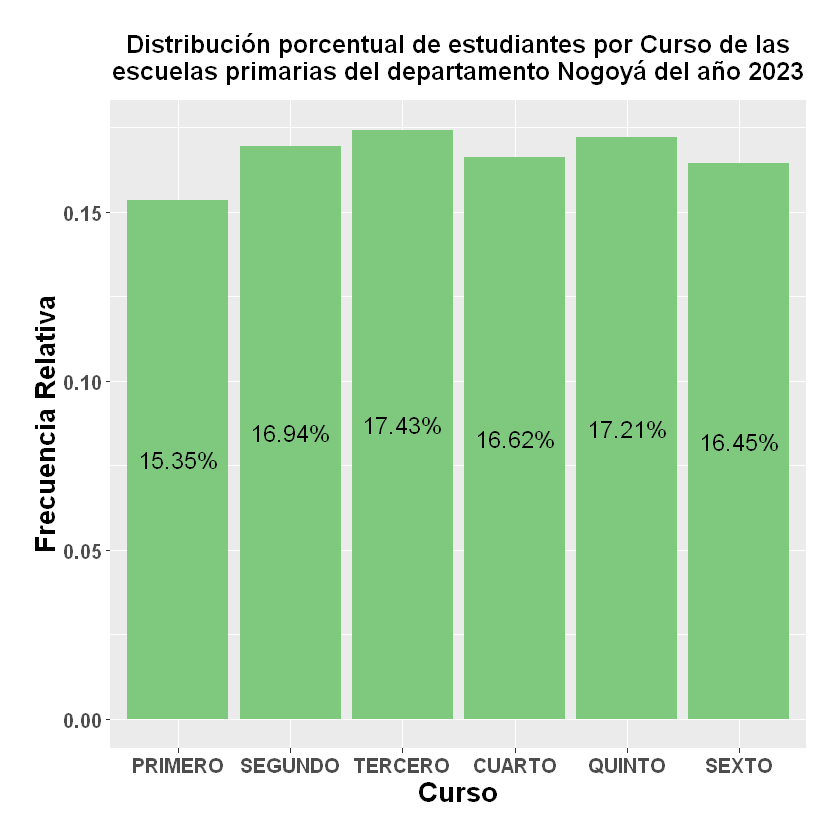

In [623]:
library(ggplot2)
library(stringr)

# Crear el gráfico
ggplot(totales_por_grado_df, aes(x = factor(Grado, levels = c("PRIMERO", "SEGUNDO", "TERCERO", "CUARTO", "QUINTO", "SEXTO")), y = Frecuencia_Relativa, fill = "green")) +
  geom_bar(stat = "identity") +
  labs(
    x = "Curso",  # Etiqueta para el eje x
    y = "Frecuencia Relativa",  # Etiqueta para el eje y
    fill = "Curso",  # Etiqueta para la leyenda
    title = str_wrap("Distribución porcentual de estudiantes por Curso de las escuelas primarias del departamento Nogoyá del año 2023", width = 60)
  ) +
  geom_text(aes(label = scales::percent(Frecuencia_Relativa)), position = position_stack(vjust = 0.5), size = 5) +  # Aumenta el tamaño de los porcentajes
  guides(fill = FALSE) +  # Eliminar la leyenda
  scale_fill_manual(values = c("#7fc97f")) +  # Usar el verde de la paleta Accent
  theme(
    axis.title = element_text(face = "bold", size = 16),  # Títulos de los ejes más grandes y en negrita
    axis.text = element_text(face = "bold", size = 12),  # Valores de los ejes más grandes y en negrita
    plot.title = element_text(face = "bold", hjust = 0.5, size = 15, margin = margin(b = 10)),  # Título centrado y más grande con margen inferior
    plot.subtitle = element_text(face = "bold", hjust = 0.5, size = 14),  # Subtítulo centrado y en negrita
    plot.margin = margin(20, 20, 20, 20, "pt")  # Ajustar márgenes para que no se corte el título
  )

ggsave("grafico_cursos.png", width = 8, height = 6, dpi = 300)


## Escuelas secundarias ##

In [624]:
# Sumamos el número de alumnos por año
total_primer_anio <- sum(secundaria_por_depto_NOGOYA$PrimerAnio)
total_segundo_anio <- sum(secundaria_por_depto_NOGOYA$SegundoAnio)
total_tercer_anio <- sum(secundaria_por_depto_NOGOYA$TercerAnio)
total_cuarto_anio <- sum(secundaria_por_depto_NOGOYA$CuartoAnio)
total_quinto_anio <- sum(secundaria_por_depto_NOGOYA$QuintoAnio)
total_sexto_anio <- sum(secundaria_por_depto_NOGOYA$SextoAnio)

# Creamos un vector con los totales de alumnos por año
totales_por_anio <- c("PRIMERO" = total_primer_anio,
                       "SEGUNDO" = total_segundo_anio,
                       "TERCERO" = total_tercer_anio,
                       "CUARTO" = total_cuarto_anio,
                       "QUINTO" = total_quinto_anio,
                       "SEXTO" = total_sexto_anio)

# Mostramos la tabla de frecuencias por año
print("Tabla de frecuencias por año:")
print(totales_por_anio)

[1] "Tabla de frecuencias por año:"
PRIMERO SEGUNDO TERCERO  CUARTO  QUINTO   SEXTO 
    791     765     698     626     502     420 


In [625]:
# Creamos un dataframe con los totales de alumnos por año
totales_por_anio_df <- data.frame(
  Anio = c("PRIMERO", "SEGUNDO", "TERCERO", "CUARTO", "QUINTO", "SEXTO"),
  Total_Alumnos_Sec = c(total_primer_anio, total_segundo_anio, total_tercer_anio, total_cuarto_anio, total_quinto_anio, total_sexto_anio)
)

# Calculamos las frecuencias relativas
totales_por_anio_df$Frecuencia_Relativa <- totales_por_anio_df$Total_Alumnos_Sec / sum(totales_por_anio_df$Total_Alumnos_Sec)

# Calculamos las frecuencias acumuladas
totales_por_anio_df$Frecuencia_Acumulada <- cumsum(totales_por_anio_df$Frecuencia_Relativa)

# Calculamos las frecuencias porcentuales
totales_por_anio_df$Frecuencia_Porcentual <- totales_por_anio_df$Frecuencia_Relativa * 100

# Calculamos las frecuencias porcentuales acumuladas
totales_por_anio_df$Frecuencia_Porcentual_Acumulada <- cumsum(totales_por_anio_df$Frecuencia_Porcentual)

# Mostramos la tabla de frecuencias por año
print("Tabla de frecuencias por año:")
View(totales_por_anio_df)

[1] "Tabla de frecuencias por año:"


Anio,Total_Alumnos_Sec,Frecuencia_Relativa,Frecuencia_Acumulada,Frecuencia_Porcentual,Frecuencia_Porcentual_Acumulada
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
PRIMERO,791,0.2080484,0.2080484,20.80484,20.80484
SEGUNDO,765,0.2012099,0.4092583,20.12099,40.92583
TERCERO,698,0.1835876,0.5928459,18.35876,59.28459
CUARTO,626,0.1646502,0.7574961,16.46502,75.74961
QUINTO,502,0.1320358,0.8895318,13.20358,88.95318
SEXTO,420,0.1104682,1.0000000,11.04682,100.00000


## Gráfico

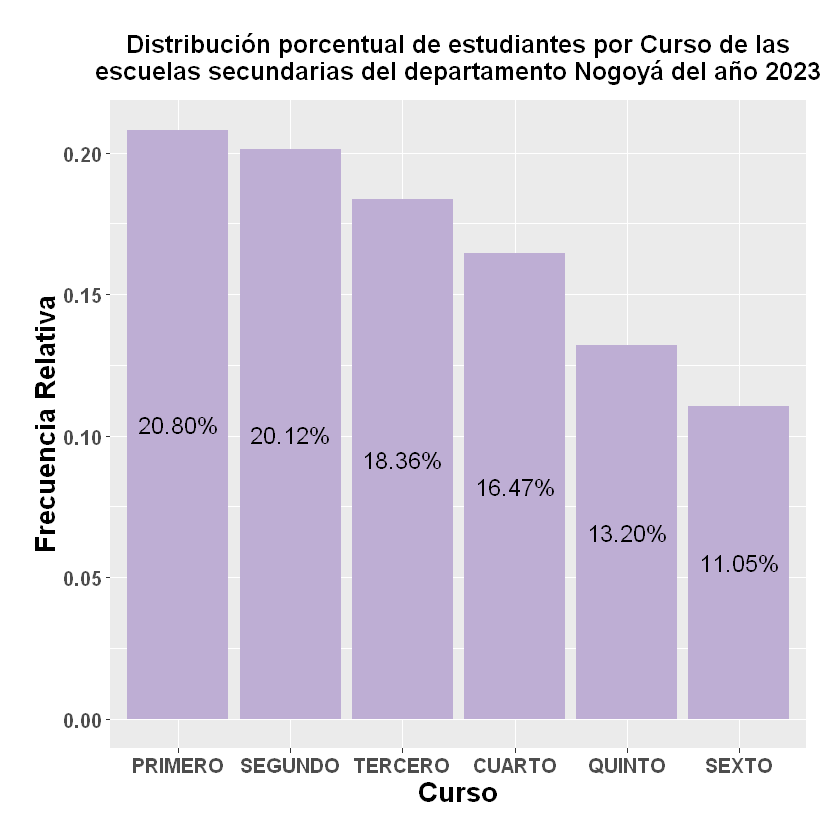

In [626]:
library(ggplot2)
library(stringr)

# Crear el gráfico
ggplot(totales_por_anio_df, aes(x = factor(Anio, levels = c("PRIMERO", "SEGUNDO", "TERCERO", "CUARTO", "QUINTO", "SEXTO")), y = Frecuencia_Relativa, fill = "green")) +
  geom_bar(stat = "identity") +
  labs(
    x = "Curso",  # Etiqueta para el eje x
    y = "Frecuencia Relativa",  # Etiqueta para el eje y
    fill = "Curso",  # Etiqueta para la leyenda
    title = str_wrap("Distribución porcentual de estudiantes por Curso de las escuelas secundarias del departamento Nogoyá del año 2023", width = 60)
  ) +
  geom_text(aes(label = scales::percent(Frecuencia_Relativa)), position = position_stack(vjust = 0.5), size = 5) +  # Aumenta el tamaño de los porcentajes
  guides(fill = FALSE) +  # Eliminar la leyenda
  scale_fill_manual(values = c("#BEAED4")) +  # Usar el verde de la paleta Accent
  theme(
    axis.title = element_text(face = "bold", size = 16),  # Títulos de los ejes más grandes y en negrita
    axis.text = element_text(face = "bold", size = 12),  # Valores de los ejes más grandes y en negrita
    plot.title = element_text(face = "bold", hjust = 0.5, size = 15, margin = margin(b = 10)),  # Título centrado y más grande con margen inferior
    plot.subtitle = element_text(face = "bold", hjust = 0.5, size = 14),  # Subtítulo centrado y en negrita
    plot.margin = margin(20, 20, 20, 20, "pt")  # Ajustar márgenes para que no se corte el título
  )
ggsave("grafico_cursos_secundaria.png", width = 8, height = 6, dpi = 300)


## Cantidad de aprobados en cada nivel

In [627]:
# Crear tabla de frecuencias para la variable Condicion
tabla_frecuencias_aprobados_p <- nogoya_PRIMARIO %>%
  count(Condicion) %>%
  mutate(Porcentaje = n / sum(n) * 100)

tabla_frecuencias_aprobados_p


Condicion,n,Porcentaje
<chr>,<int>,<dbl>
APROBADO,28230,96.446874
DESAPROBADO,1040,3.553126


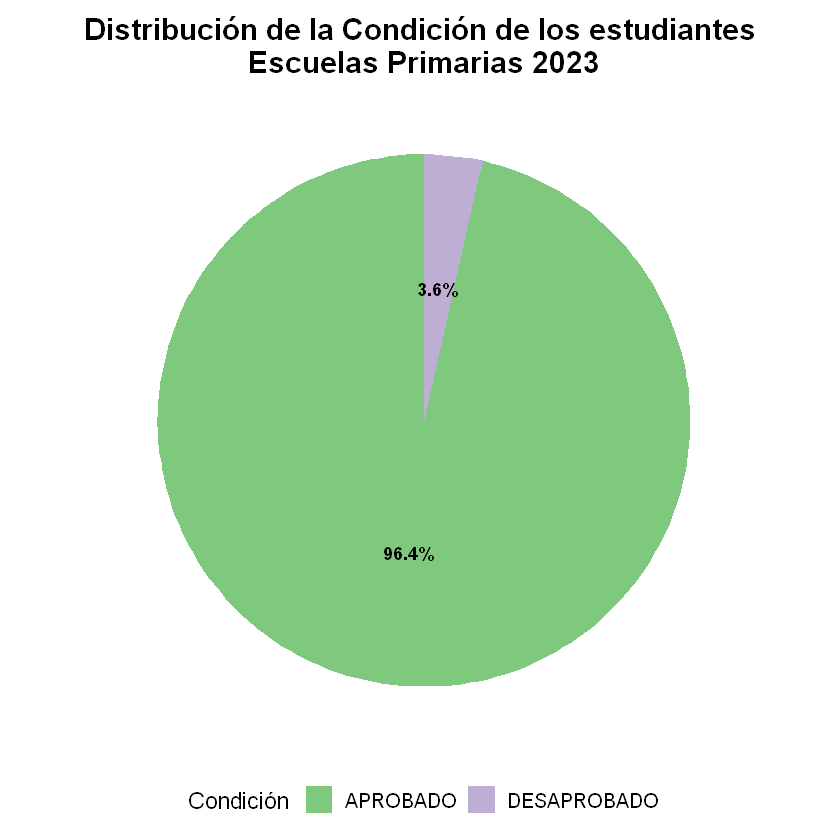

In [628]:
# Gráfico de torta con paleta "Accent"
ggplot(tabla_frecuencias_aprobados_p, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(round(Porcentaje, 1), "%")), 
            position = position_stack(vjust = 0.5), fontface = "bold") + 
  scale_fill_brewer(palette = "Accent") +  # Aplicar la paleta de colores
  labs(title = "Distribución de la Condición de los estudiantes \nEscuelas Primarias 2023",
       x = NULL, y = NULL, fill = "Condición") +
  theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(hjust = 0.5, face = "bold", size = 18),  # Título más grande
        legend.position = "bottom",
        legend.title = element_text(size = 14),  # Tamaño de la leyenda
        legend.text = element_text(size = 12),   # Tamaño de los textos de la leyenda
        plot.margin = margin(10, 10, 10, 10),    # Margen alrededor
        axis.text = element_text(size = 12))     # Tamaño de las etiquetas de los ejes


In [629]:
# Crear tabla de frecuencias para la variable Condicion
tabla_frecuencias_aprobados_s <- nogoya_SECUNDARIO %>%
  count(Condicion) %>%
  mutate(Porcentaje = n / sum(n) * 100)

tabla_frecuencias_aprobados_s


Condicion,n,Porcentaje
<chr>,<int>,<dbl>
APROBADO,27635,79.84687
DESAPROBADO,6975,20.15313


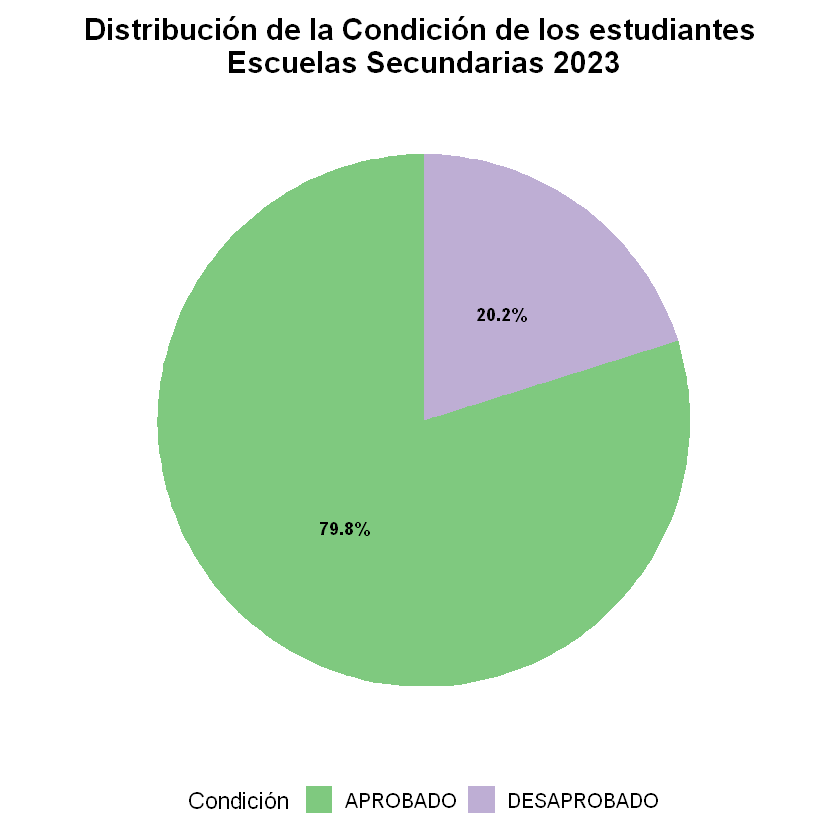

In [630]:
# Gráfico de torta con paleta "Accent"
ggplot(tabla_frecuencias_aprobados_s, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(round(Porcentaje, 1), "%")), 
            position = position_stack(vjust = 0.5), fontface = "bold") + 
  scale_fill_brewer(palette = "Accent") +  # Aplicar la paleta de colores
  labs(title = "Distribución de la Condición de los estudiantes \nEscuelas Secundarias 2023",
       x = NULL, y = NULL, fill = "Condición") +
  theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(hjust = 0.5, face = "bold", size = 18),  # Título más grande
        legend.position = "bottom",
        legend.title = element_text(size = 14),  # Tamaño de la leyenda
        legend.text = element_text(size = 12),   # Tamaño de los textos de la leyenda
        plot.margin = margin(10, 10, 10, 10),    # Margen alrededor
        axis.text = element_text(size = 12))     # Tamaño de las etiquetas de los ejes


In [631]:
# Crear la nueva variable "Desempeño"
nogoya_SECUNDARIO <- nogoya_SECUNDARIO %>%
  mutate(Desempeño = case_when(
    Promedio < 6 ~ "Insuficiente",
    Promedio >= 6 & Promedio < 7 ~ "Aprobado",
    Promedio >= 7 & Promedio < 8 ~ "Bueno",
    Promedio >= 8 & Promedio < 9 ~ "Muy Bueno",
    Promedio >= 9 & Promedio <= 10 ~ "Distinguido",
    TRUE ~ NA_character_  # En caso de que haya algún valor fuera del rango esperado
  ))

# Verifica que la variable "Desempeño" se haya creado correctamente
head(nogoya_SECUNDARIO, 10)


CUE,Localidad,EsPrivada,Turno,Curso,Documento,Asignatura,NivelEnsenanza,ModEnsenanza,AnioLectivo,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre,Promedio,Condicion,Desempeño
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,BIOLOGIA,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO,Aprobado
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,EDUCACION FISICA,SECUNDARIO,Comun,2023,7,7,8,7.33,APROBADO,Bueno
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,ESPACIO DE LA ORIENTACION EN ECONOMIA Y ADMINISTRACION I,SECUNDARIO,Comun,2023,5,6,7,6.00,APROBADO,Aprobado
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,ESPACIO DE LA ORIENTACION EN ECONOMIA Y ADMINISTRACION II,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO,Aprobado
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,FORMACION ETICA Y CIUDADANA,SECUNDARIO,Comun,2023,7,7,7,7.00,APROBADO,Bueno
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,HISTORIA,SECUNDARIO,Comun,2023,6,6,7,6.33,APROBADO,Aprobado
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,LENGUA Y LITERATURA,SECUNDARIO,Comun,2023,7,7,8,7.33,APROBADO,Bueno
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,LENGUAS EXTRANJERAS,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO,Aprobado
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,MATEMATICA,SECUNDARIO,Comun,2023,6,6,6,6.00,APROBADO,Aprobado


In [632]:
nogoya_PRIMARIO$Promedio <- as.numeric(nogoya_PRIMARIO$Promedio)

In [633]:
# Crear la nueva variable "Desempeño" en nogoya_PRIMARIO
nogoya_PRIMARIO <- nogoya_PRIMARIO %>%
  mutate(Desempeño = case_when(
    is.na(Promedio) ~ "Insuficiente",  # Manejar NA como Insuficiente
    Promedio >= 6 & Promedio < 7 ~ "Aprobado",
    Promedio >= 7 & Promedio < 8 ~ "Bueno",
    Promedio >= 8 & Promedio < 9 ~ "Muy Bueno",
    Promedio >= 9 & Promedio <= 10 ~ "Distinguido",
    TRUE ~ NA_character_  # En caso de que haya algún valor fuera del rango esperado (aunque no debería ocurrir)
  ))


## SEGMENTACIÓN POR NIVEL, AÑO Y MATERIA 

### Primaria ###

#### Primer año primaria ####

In [634]:
library(dplyr)

primeroPrimaria <- nogoya_PRIMARIO %>%
  filter(NivelEnsenanza == "PRIMARIO",
         Curso == "PRIMERO",
         Asignatura %in% c("LENGUA", "MATEMATICA", "CIENCIAS SOCIALES", "CIENCIAS NATURALES")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura


In [635]:

table(primeroPrimaria$Condicion)


   APROBADO DESAPROBADO 
       1784         120 

In [636]:
library(tidyr)
# Crear tabla de frecuencias por materia y condición
tabla_condiciones <- primeroPrimaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condiciones

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
CIENCIAS NATURALES,472,6,98.74477,1.255230
CIENCIAS SOCIALES,471,6,98.74214,1.257862
LENGUA,413,62,86.94737,13.052632
MATEMATICA,428,46,90.29536,9.704641


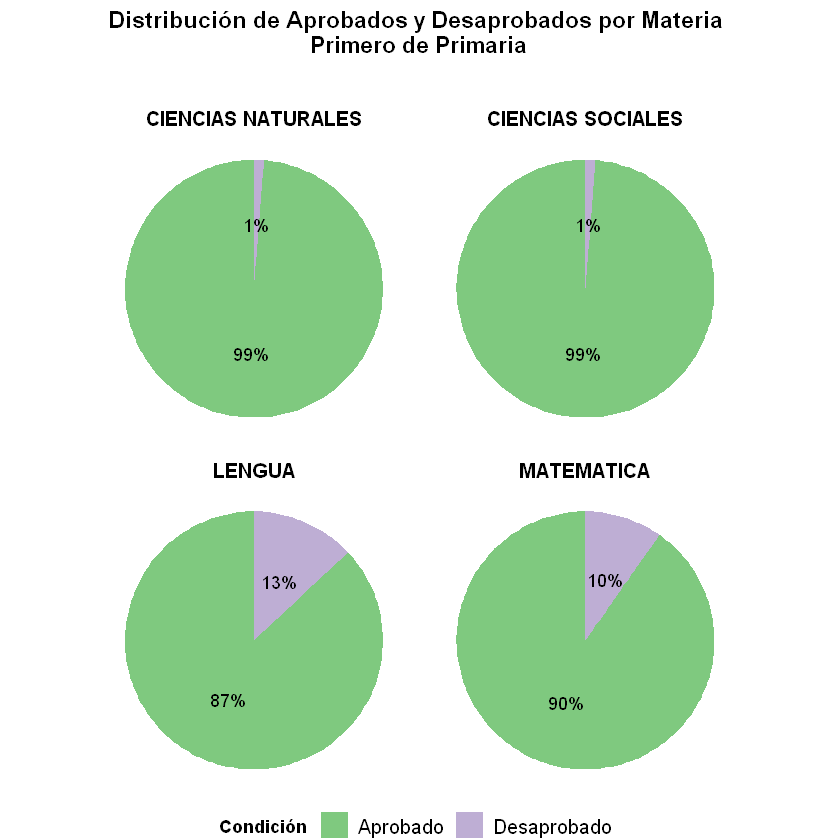

In [637]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_long <- tabla_condiciones %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_long, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Materia \n Primero de Primaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 12),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )




In [638]:
primeroPrimariaAprobado  <- primeroPrimaria %>% filter(Promedio != "Desaprobado")

# Convertir a numérico
primeroPrimariaAprobado$Promedio <- as.numeric(primeroPrimariaAprobado$Promedio)


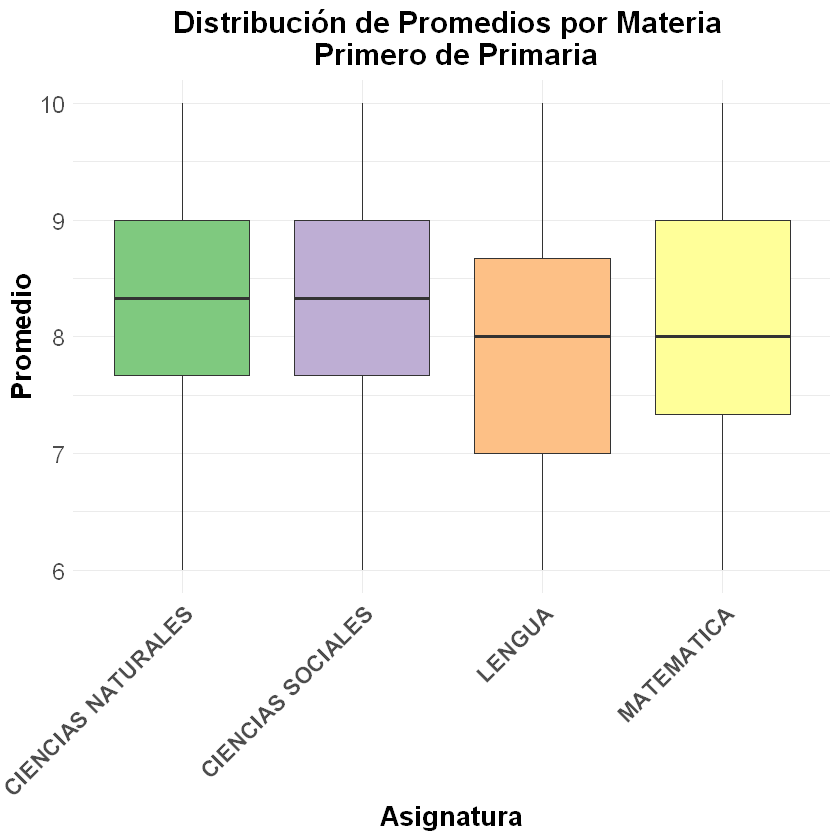

In [639]:
library(ggplot2)

ggplot(primeroPrimariaAprobado, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Primero de Primaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )



In [640]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignatura <- primeroPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )

# Mostrar las estadísticas calculadas
print(estadisticas_por_asignatura)


# A tibble: 4 x 4
  Asignatura         Media Mediana  Moda
  <chr>              <dbl>   <dbl> <dbl>
1 CIENCIAS NATURALES  8.29    8.33  9   
2 CIENCIAS SOCIALES   8.24    8.33  9   
3 LENGUA              8.00    8     8.67
4 MATEMATICA          8.13    8     8.67


In [641]:
summary_por_asignatura <- primeroPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignatura)


# A tibble: 4 x 7
  Asignatura           Min    Q1 Mediana Media    Q3   Max
  <chr>              <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 CIENCIAS NATURALES     6  7.67    8.33  8.29  9       10
2 CIENCIAS SOCIALES      6  7.67    8.33  8.24  9       10
3 LENGUA                 6  7       8     8.00  8.67    10
4 MATEMATICA             6  7.33    8     8.13  9       10


In [642]:

# Función para aplicar KS test por materia
realizar_ks_test <- function(data) {
  resultado <- data %>%
    group_by(Asignatura) %>%
    summarise(
      KS_p_value = ks.test(Promedio, "pnorm", mean(Promedio), sd(Promedio))$p.value
    )
  
  print(" **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**")
  print("H₀: Las notas siguen una distribución normal")
  print("H₁: Las notas NO siguen una distribución normal")
  
  return(resultado)
}

# Aplicar la función a los aprobados
ks_resultados <- realizar_ks_test(primeroPrimariaAprobado)

# Mostrar los resultados
print(ks_resultados)


[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 4 x 2
  Asignatura         KS_p_value
  <chr>                   <dbl>
1 CIENCIAS NATURALES 0.00000878
2 CIENCIAS SOCIALES  0.0000283 
3 LENGUA             0.000279  
4 MATEMATICA         0.000223  


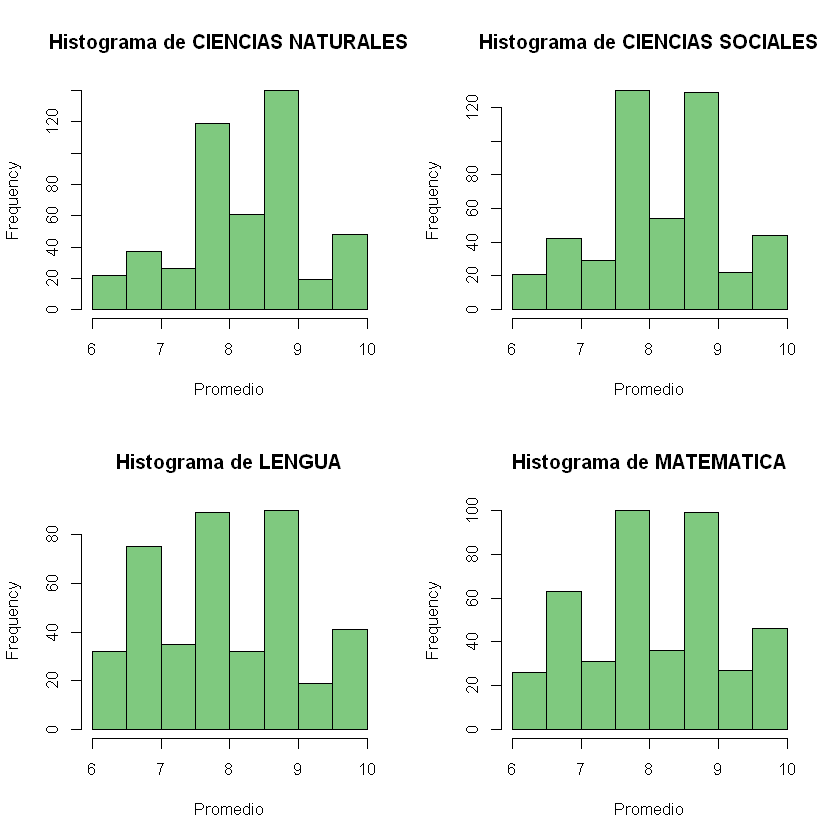

In [643]:
asignaturas <- unique(primeroPrimariaAprobado$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(primeroPrimariaAprobado, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma de", materia),
       xlab = "Promedio", col = "#7fc97f", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos



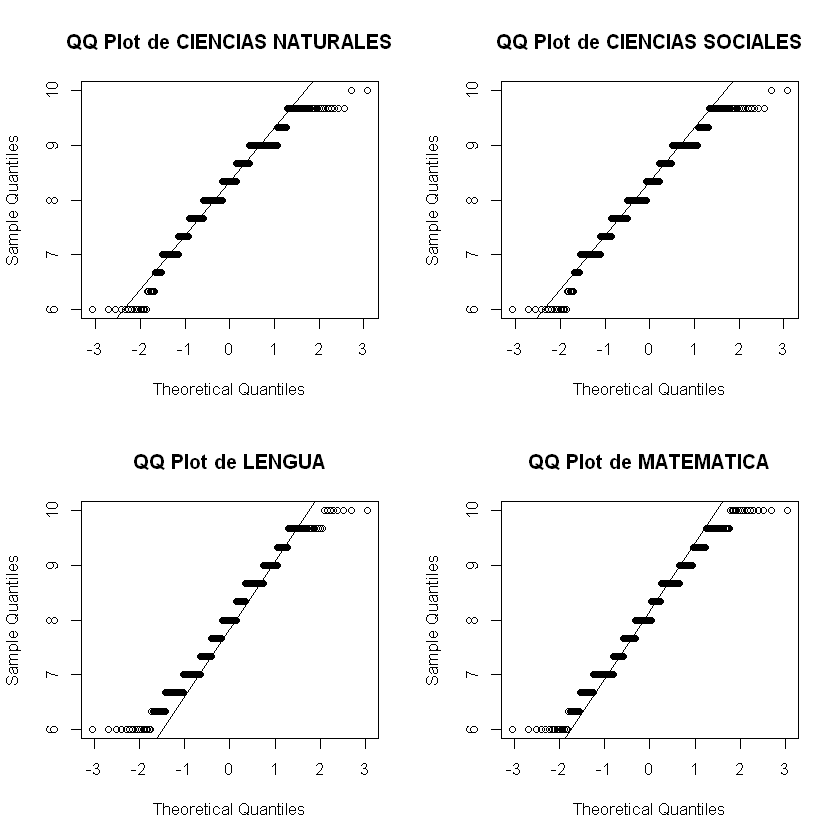

In [644]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(primeroPrimariaAprobado, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original


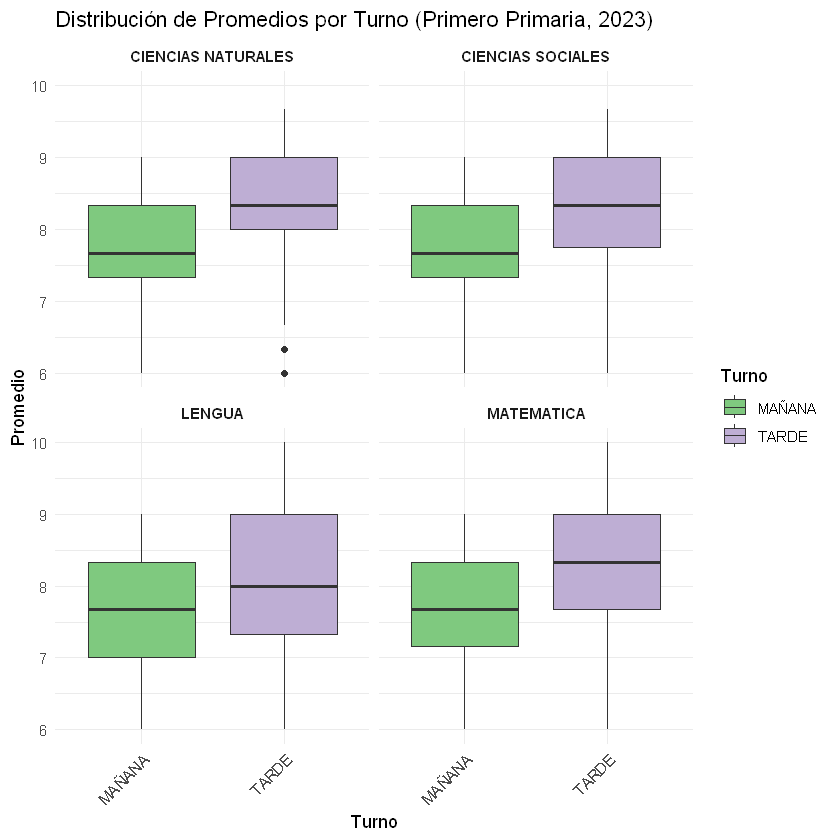

In [645]:
# Filtrar solo los turnos "Mañana" y "Tarde" de tu dataframe
primeroPrimariaAprobado_filtrado <- primeroPrimariaAprobado %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

# Crear el boxplot comparando promedios por turno para cada asignatura con la paleta Accent
ggplot(primeroPrimariaAprobado_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Dividir los boxplots por asignatura
  labs(
    title = "Distribución de Promedios por Turno (Primero Primaria, 2023)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  # Cambiar el estilo del gráfico
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Mejorar la lectura del eje x
    strip.text = element_text(face = "bold")  # Resaltar los títulos por materia
  )


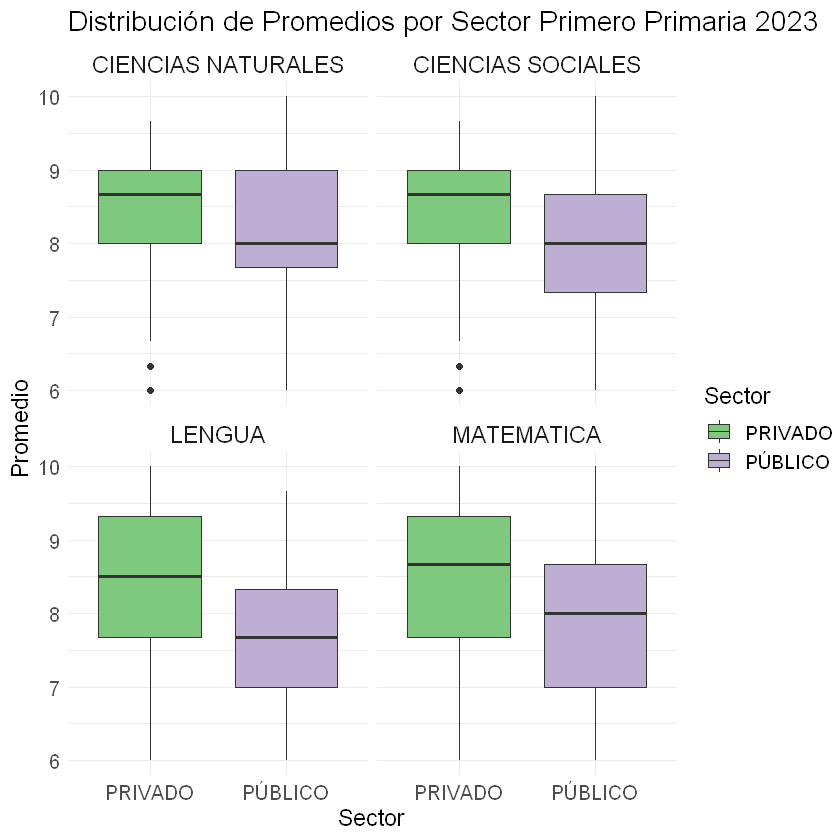

In [646]:

# Crear el boxplot comparativo por asignatura y sector (EsPrivada)
ggplot(primeroPrimariaAprobado, aes(x = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"), y = Promedio, fill = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"))) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Agrupar por asignatura
  scale_fill_brewer(palette = "Accent") +  # Usar paleta de colores "Accent"
  labs(title = "Distribución de Promedios por Sector Primero Primaria 2023",
       x = "Sector",
       y = "Promedio",
       fill = "Sector") +  # Ajuste de la leyenda
  theme_minimal() +
  theme(
    legend.position = "right",  # Leyenda a la derecha
    text = element_text(size = 14),  # Aumentar el tamaño de la fuente en todo el gráfico
    strip.text = element_text(size = 14),  # Aumentar el tamaño de las etiquetas de las asignaturas
    axis.title = element_text(size = 14),  # Aumentar el tamaño de los títulos de los ejes
    axis.text = element_text(size = 12)  # Aumentar el tamaño del texto de los ejes
  )



In [647]:
# Tabla de contingencia Desempeño y Asignatura
tabla_desemp_asignatura_primero_primaria <- primeroPrimaria %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Asignatura') %>%
  table()

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Asignatura:")
print(tabla_desemp_asignatura_primero_primaria)

# Tabla de porcentaje total (porcentaje dentro de la tabla completa)
tabla_porcentaje_total_asignatura <- prop.table(tabla_desemp_asignatura_primero_primaria) * 100
tabla_porcentaje_total_asignatura <- round(tabla_porcentaje_total_asignatura, 1)  # Redondear a 1 decimal

# Agregar fila y columna de totales
tabla_porcentaje_total_asignatura <- addmargins(tabla_porcentaje_total_asignatura, margin = c(1, 2), FUN = sum)

# Renombrar la última fila y columna como "Total"
colnames(tabla_porcentaje_total_asignatura)[ncol(tabla_porcentaje_total_asignatura)] <- "Total"
rownames(tabla_porcentaje_total_asignatura)[nrow(tabla_porcentaje_total_asignatura)] <- "Total"

print("Tabla de Porcentajes Total (Desempeño y Asignatura):")
print(tabla_porcentaje_total_asignatura)

# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_asignatura <- prop.table(tabla_desemp_asignatura_primero_primaria, margin = 1) * 100
tabla_porcentaje_fila_asignatura <- round(tabla_porcentaje_fila_asignatura, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_asignatura <- addmargins(tabla_porcentaje_fila_asignatura, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_asignatura)[ncol(tabla_porcentaje_fila_asignatura)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Asignatura):")
print(tabla_porcentaje_fila_asignatura)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_asignatura <- prop.table(tabla_desemp_asignatura_primero_primaria, margin = 2) * 100
tabla_porcentaje_columna_asignatura <- round(tabla_porcentaje_columna_asignatura, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_asignatura <- addmargins(tabla_porcentaje_columna_asignatura, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_asignatura)[nrow(tabla_porcentaje_columna_asignatura)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Asignatura):")
print(tabla_porcentaje_columna_asignatura)



[1] "Tabla de Contingencia Desempeño y Asignatura:"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                  6                 6     62         46
  Aprobado                     30                28     63         45
  Bueno                       102               118    115        116
  Muy Bueno                   184               179    141        157
  Distinguido                 156               146     94        110
Margins computed over dimensions
in the following order:
1: Desempeño
2: Asignatura
[1] "Tabla de Porcentajes Total (Desempeño y Asignatura):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA Total
  Insuficiente                0.3               0.3    3.3        2.4   6.3
  Aprobado                    1.6               1.5    3.3        2.4   8.8
  Bueno                       5.4               6.2    6.0        6.1  23.7
  Muy Bueno                   9

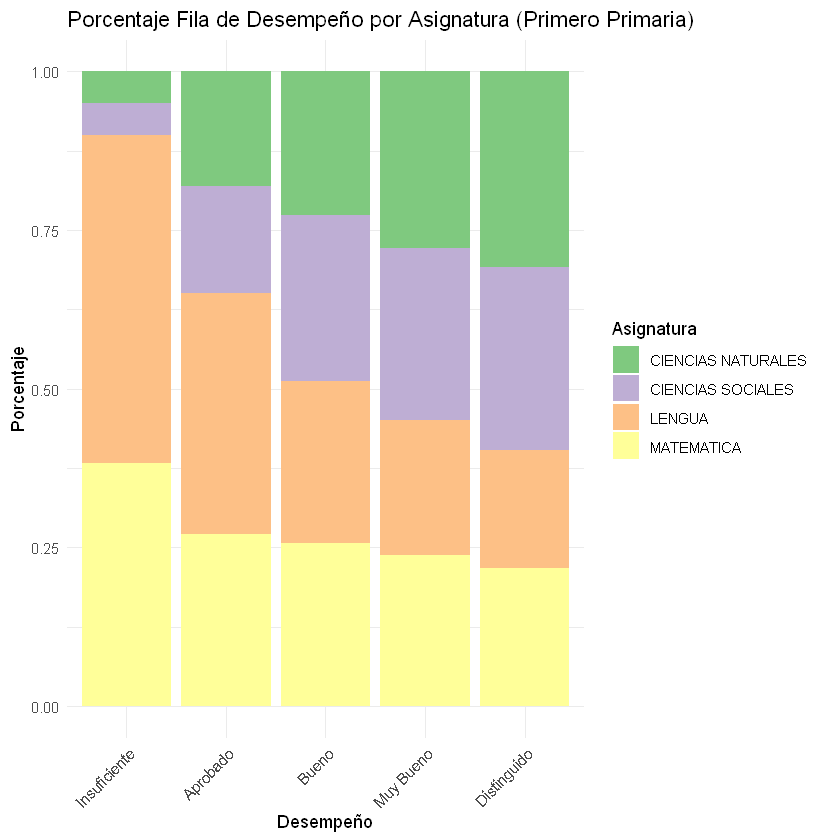

In [648]:
# Eliminar la columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_asignatura_sin_total <- tabla_porcentaje_fila_asignatura[, -ncol(tabla_porcentaje_fila_asignatura)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_asignatura_long <- as.data.frame(tabla_porcentaje_fila_asignatura_sin_total)
tabla_porcentaje_fila_asignatura_long$Desempeño <- rownames(tabla_porcentaje_fila_asignatura_sin_total)

# Asegurar que Desempeño esté ordenado correctamente
tabla_porcentaje_fila_asignatura_long$Desempeño <- factor(tabla_porcentaje_fila_asignatura_long$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar los porcentajes fila
ggplot(tabla_porcentaje_fila_asignatura_long, aes(x = Desempeño, y = Freq, fill = Asignatura)) +
  geom_bar(stat = "identity", position = "fill") +  # Apilar las barras para cada desempeño
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Asignatura (Primero Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X



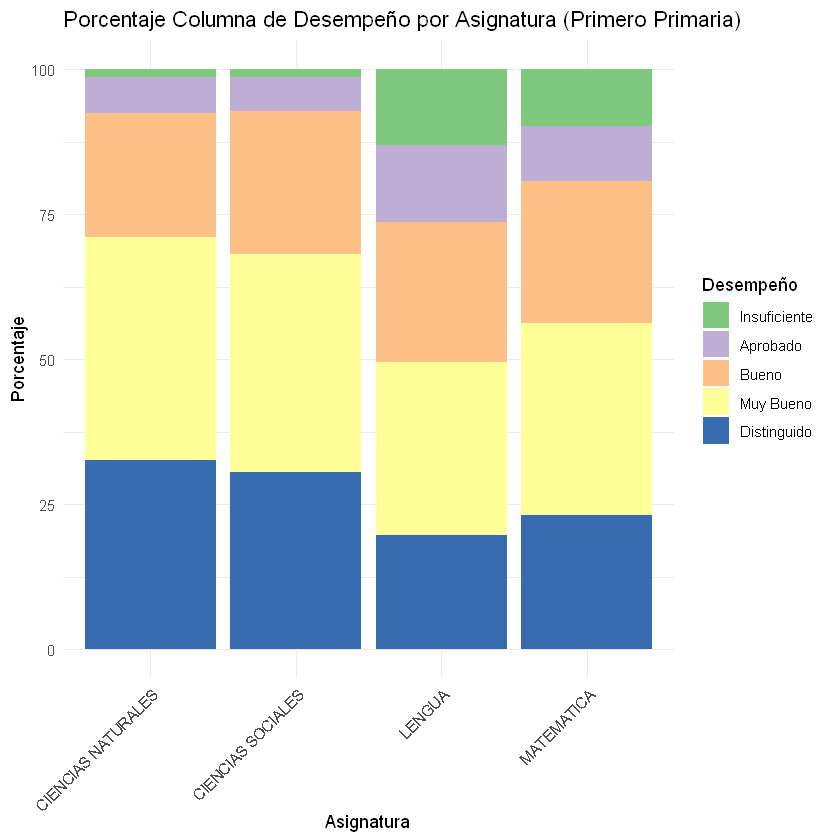

In [649]:
# Eliminar la fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_asignatura_sin_total <- tabla_porcentaje_columna_asignatura[-nrow(tabla_porcentaje_columna_asignatura), ]

# Convertir tabla de porcentajes columna sin "Total" a formato largo para ggplot
tabla_porcentaje_columna_asignatura_long <- as.data.frame(tabla_porcentaje_columna_asignatura_sin_total)
tabla_porcentaje_columna_asignatura_long$Desempeño <- rownames(tabla_porcentaje_columna_asignatura_sin_total)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_asignatura_long$Desempeño <- factor(tabla_porcentaje_columna_asignatura_long$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar
ggplot(tabla_porcentaje_columna_asignatura_long, aes(x = Asignatura, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +  # Usamos la paleta accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Asignatura (Primero Primaria)",
       x = "Asignatura", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X



In [650]:

# Realizar la prueba de Chi-cuadrado
chi_desemp_asignatura_primero_primaria<- chisq.test(tabla_desemp_asignatura_primero_primaria)
chi_desemp_asignatura_primero_primaria


	Pearson's Chi-squared test

data:  tabla_desemp_asignatura_primero_primaria
X-squared = 129.07, df = 12, p-value < 2.2e-16


In [651]:
chi_desemp_asignatura_primero_primaria$observed


              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                  6                 6     62         46
  Aprobado                     30                28     63         45
  Bueno                       102               118    115        116
  Muy Bueno                   184               179    141        157
  Distinguido                 156               146     94        110

In [652]:
round(chi_desemp_asignatura_primero_primaria$expected, 0)

,CIENCIAS NATURALES,CIENCIAS SOCIALES,LENGUA,MATEMATICA
Insuficiente,30,30,30,30
Aprobado,42,42,41,41
Bueno,113,113,113,112
Muy Bueno,166,166,165,165
Distinguido,127,127,126,126


In [653]:
round(chi_desemp_asignatura_primero_primaria$residuals, 1)

              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente               -4.4              -4.4    5.9        3.0
  Aprobado                   -1.8              -2.1    3.4        0.6
  Bueno                      -1.1               0.5    0.2        0.4
  Muy Bueno                   1.4               1.0   -1.9       -0.6
  Distinguido                 2.6               1.7   -2.9       -1.4

In [654]:
round(chi_desemp_asignatura_primero_primaria$stdres, 1)

              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente               -5.2              -5.2    7.0        3.5
  Aprobado                   -2.2              -2.5    4.1        0.7
  Bueno                      -1.4               0.6    0.3        0.5
  Muy Bueno                   2.0               1.5   -2.7       -0.8
  Distinguido                 3.5               2.3   -3.9       -1.9

In [655]:
library("DescTools")
CramerV(tabla_desemp_asignatura_primero_primaria)

[1] 0.1503205

In [656]:
primeroPrimaria_turno <- primeroPrimaria %>%
  filter(Turno %in% c('MAÑANA', 'TARDE'))

# Tabla de contingencia Desempeño y Turno
tabla_desemp_turno_primero_primaria <- primeroPrimaria_turno %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Turno') %>%
  table()

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Turno:")
print(tabla_desemp_turno_primero_primaria)

# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_turno <- prop.table(tabla_desemp_turno_primero_primaria, margin = 1) * 100
tabla_porcentaje_fila_turno <- round(tabla_porcentaje_fila_turno, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_turno <- addmargins(tabla_porcentaje_fila_turno, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_turno)[ncol(tabla_porcentaje_fila_turno)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Turno):")
print(tabla_porcentaje_fila_turno)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_turno <- prop.table(tabla_desemp_turno_primero_primaria, margin = 2) * 100
tabla_porcentaje_columna_turno <- round(tabla_porcentaje_columna_turno, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_turno <- addmargins(tabla_porcentaje_columna_turno, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_turno)[nrow(tabla_porcentaje_columna_turno)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Turno):")
print(tabla_porcentaje_columna_turno)


[1] "Tabla de Contingencia Desempeño y Turno:"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     26    91
  Aprobado         32   106
  Bueno           127   309
  Muy Bueno       116   532
  Distinguido       8   473
[1] "Tabla de Porcentajes por Fila (Desempeño y Turno):"
              Turno
Desempeño      MAÑANA TARDE Total
  Insuficiente   22.2  77.8 100.0
  Aprobado       23.2  76.8 100.0
  Bueno          29.1  70.9 100.0
  Muy Bueno      17.9  82.1 100.0
  Distinguido     1.7  98.3 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Turno):"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    8.4   6.0
  Aprobado       10.4   7.0
  Bueno          41.1  20.5
  Muy Bueno      37.5  35.2
  Distinguido     2.6  31.3
  Total         100.0 100.0


In [657]:
# Realizar la prueba de Chi-cuadrado
chi_desemp_turno_primero_primaria<- chisq.test(tabla_desemp_turno_primero_primaria)
chi_desemp_turno_primero_primaria



	Pearson's Chi-squared test

data:  tabla_desemp_turno_primero_primaria
X-squared = 132.15, df = 4, p-value < 2.2e-16


In [658]:
chi_desemp_turno_primero_primaria$observed


              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     26    91
  Aprobado         32   106
  Bueno           127   309
  Muy Bueno       116   532
  Distinguido       8   473

In [659]:
round(chi_desemp_turno_primero_primaria$expected, 0)


,MAÑANA,TARDE
Insuficiente,20,97
Aprobado,23,115
Bueno,74,362
Muy Bueno,110,538
Distinguido,82,399


In [660]:
round(chi_desemp_turno_primero_primaria$residuals, 1)


              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    1.4  -0.6
  Aprobado        1.8  -0.8
  Bueno           6.2  -2.8
  Muy Bueno       0.6  -0.3
  Distinguido    -8.2   3.7

In [661]:
round(chi_desemp_turno_primero_primaria$stdres, 1)


              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    1.6  -1.6
  Aprobado        2.0  -2.0
  Bueno           7.7  -7.7
  Muy Bueno       0.8  -0.8
  Distinguido   -10.4  10.4

In [662]:
# Obtener la matriz transpuesta
tabla_transpuesta <- t(tabla_desemp_turno_primero_primaria)

# Mostrar la matriz transpuesta
tabla_transpuesta

        Desempeño
Turno    Insuficiente Aprobado Bueno Muy Bueno Distinguido
  MAÑANA           26       32   127       116           8
  TARDE            91      106   309       532         473

In [663]:
# Calcular las razones condicionales invertidas (dividir la fila 2 entre la fila 1)
razones_condicionales <- round(tabla_transpuesta[2,] / tabla_transpuesta[1,], 1)

# Agregar las razones condicionales invertidas como una nueva fila a la tabla
tabla_transpuesta <- rbind(tabla_transpuesta, razones_condicionales)

# Mostrar la tabla actualizada con las razones condicionales invertidas
tabla_transpuesta


,Insuficiente,Aprobado,Bueno,Muy Bueno,Distinguido
MAÑANA,26.0,32.0,127.0,116.0,8.0
TARDE,91.0,106.0,309.0,532.0,473.0
razones_condicionales,3.5,3.3,2.4,4.6,59.1


In [664]:
library("DescTools")
CramerV(tabla_desemp_turno_primero_primaria)

[1] 0.2694651

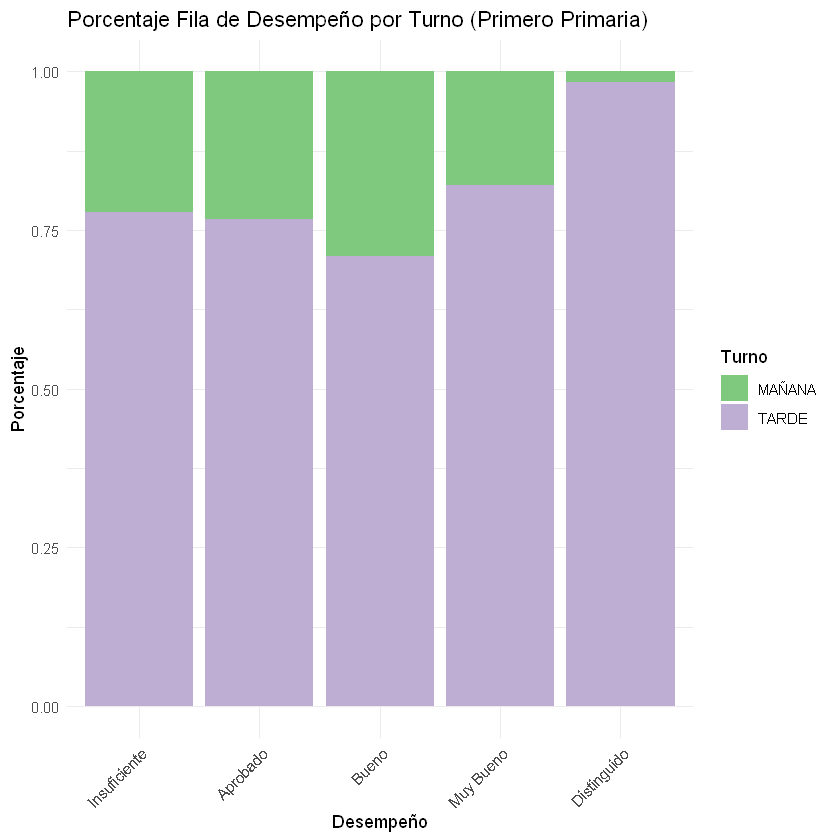

In [665]:
# Eliminar columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_turno_sin_total <- tabla_porcentaje_fila_turno[, -ncol(tabla_porcentaje_fila_turno)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_turno_long <- as.data.frame(tabla_porcentaje_fila_turno_sin_total)
tabla_porcentaje_fila_turno_long$Desempeño <- rownames(tabla_porcentaje_fila_turno_sin_total)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_turno_long$Desempeño <- factor(tabla_porcentaje_fila_turno_long$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar las barras apiladas para porcentaje fila
ggplot(tabla_porcentaje_fila_turno_long, aes(x = Desempeño, y = Freq, fill = Turno)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Turno (Primero Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X

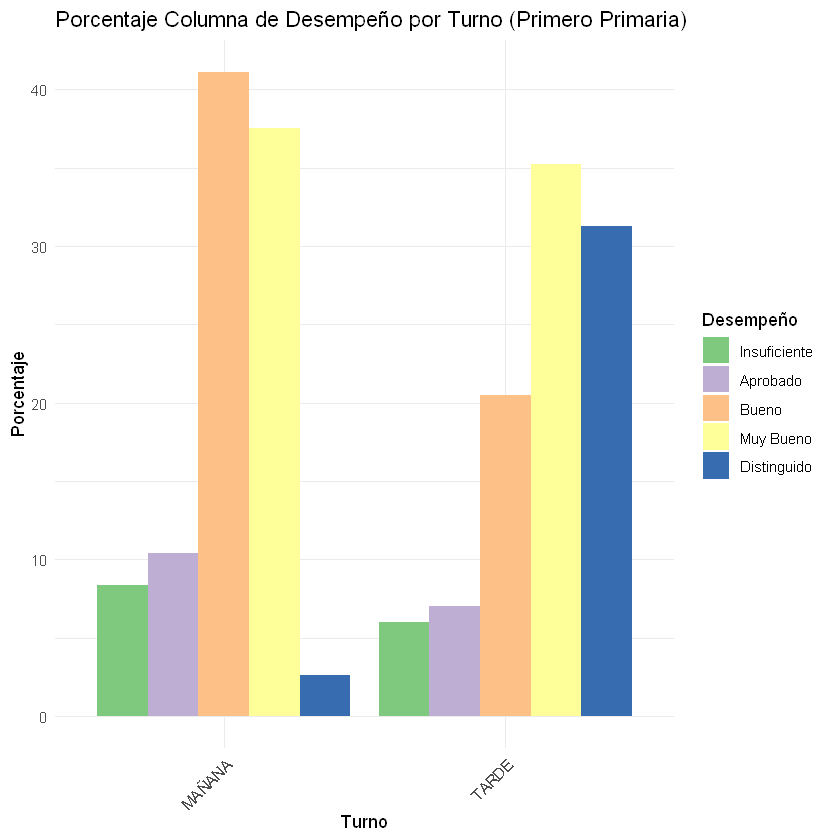

In [666]:

# Eliminar fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_turno_sin_total <- tabla_porcentaje_columna_turno[-nrow(tabla_porcentaje_columna_turno), ]

# Convertir la tabla de porcentajes columna a formato largo
tabla_porcentaje_columna_turno_long <- as.data.frame(tabla_porcentaje_columna_turno_sin_total)
tabla_porcentaje_columna_turno_long$Desempeño <- rownames(tabla_porcentaje_columna_turno_sin_total)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_turno_long$Desempeño <- factor(tabla_porcentaje_columna_turno_long$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar las barras adosadas para porcentaje columna
ggplot(tabla_porcentaje_columna_turno_long, aes(x = Turno, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Turno (Primero Primaria)",
       x = "Turno", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X

In [667]:
# Cambiar el nombre de la columna 'EsPrivada' a 'Sector' y recodificar los valores 'N' y 'S' por 'Publica' y 'Privada'
tabla_desemp_sector_primero_primaria <- primeroPrimaria %>%
  filter(!is.na(Desempeño) & !is.na(EsPrivada)) %>%  # Eliminar NA
  rename(Sector = EsPrivada) %>%  # Renombrar EsPrivada a Sector
  mutate(
    Sector = recode(Sector, 'N' = 'Publica', 'S' = 'Privada'),  # Reemplazar valores 'N' y 'S'
    Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))  # Asegurar el orden de Desempeño
  ) %>%
  select('Desempeño', 'Sector') %>%
  table()  # Generar la tabla de contingencia

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Sector:")
print(tabla_desemp_sector_primero_primaria)

# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_sector <- prop.table(tabla_desemp_sector_primero_primaria, margin = 1) * 100
tabla_porcentaje_fila_sector <- round(tabla_porcentaje_fila_sector, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_sector <- addmargins(tabla_porcentaje_fila_sector, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_sector)[ncol(tabla_porcentaje_fila_sector)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Sector):")
print(tabla_porcentaje_fila_sector)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_sector <- prop.table(tabla_desemp_sector_primero_primaria, margin = 2) * 100
tabla_porcentaje_columna_sector <- round(tabla_porcentaje_columna_sector, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_sector <- addmargins(tabla_porcentaje_columna_sector, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_sector)[nrow(tabla_porcentaje_columna_sector)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Sector):")
print(tabla_porcentaje_columna_sector)


[1] "Tabla de Contingencia Desempeño y Sector:"
              Sector
Desempeño      Privada Publica
  Insuficiente      24      96
  Aprobado          42     124
  Bueno            164     287
  Muy Bueno        302     359
  Distinguido      316     190
[1] "Tabla de Porcentajes por Fila (Desempeño y Sector):"
              Sector
Desempeño      Privada Publica Total
  Insuficiente    20.0    80.0 100.0
  Aprobado        25.3    74.7 100.0
  Bueno           36.4    63.6 100.0
  Muy Bueno       45.7    54.3 100.0
  Distinguido     62.5    37.5 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Sector):"
              Sector
Desempeño      Privada Publica
  Insuficiente     2.8     9.1
  Aprobado         5.0    11.7
  Bueno           19.3    27.2
  Muy Bueno       35.6    34.0
  Distinguido     37.3    18.0
  Total          100.0   100.0


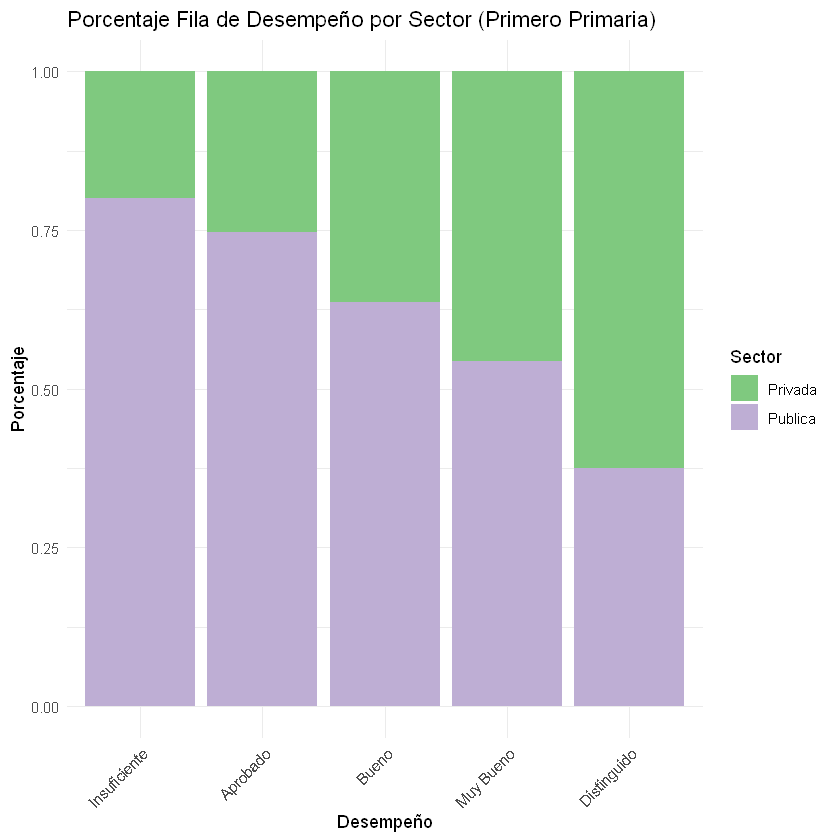

In [668]:
# Eliminar columna Total en la tabla de porcentaje fila
tabla_porcentaje_fila_sector_sin_total <- tabla_porcentaje_fila_sector[, -ncol(tabla_porcentaje_fila_sector)]  # Eliminar columna "Total"

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_sector_long <- as.data.frame(tabla_porcentaje_fila_sector_sin_total)
tabla_porcentaje_fila_sector_long$Desempeño <- rownames(tabla_porcentaje_fila_sector_sin_total)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_sector_long$Desempeño <- factor(tabla_porcentaje_fila_sector_long$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar el porcentaje fila con barras apiladas
ggplot(tabla_porcentaje_fila_sector_long, aes(x = Desempeño, y = Freq, fill = Sector)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Sector (Primero Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X



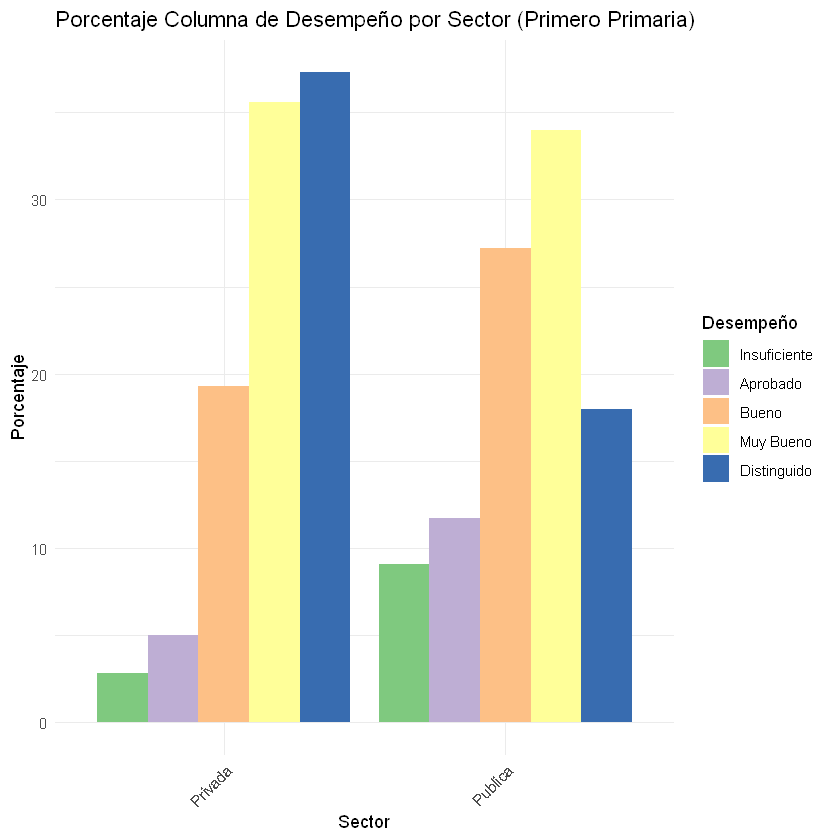

In [669]:
# Eliminar fila "Total" en la tabla de porcentaje columna
tabla_porcentaje_columna_sector_sin_total <- tabla_porcentaje_columna_sector[-nrow(tabla_porcentaje_columna_sector), ]  # Eliminar fila "Total"

# Convertir la tabla de porcentajes columna a formato largo
tabla_porcentaje_columna_sector_long <- as.data.frame(tabla_porcentaje_columna_sector_sin_total)
tabla_porcentaje_columna_sector_long$Desempeño <- rownames(tabla_porcentaje_columna_sector_sin_total)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_sector_long$Desempeño <- factor(tabla_porcentaje_columna_sector_long$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar el porcentaje columna con barras adosadas, donde el eje X es "Sector"
ggplot(tabla_porcentaje_columna_sector_long, aes(x = Sector, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Sector (Primero Primaria)",
       x = "Sector", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X



In [670]:
# Realizar la prueba de Chi-cuadrado
chi_desemp_sector_primero_primaria<- chisq.test(tabla_desemp_sector_primero_primaria)
chi_desemp_sector_primero_primaria


	Pearson's Chi-squared test

data:  tabla_desemp_sector_primero_primaria
X-squared = 132.4, df = 4, p-value < 2.2e-16


In [671]:
chi_desemp_sector_primero_primaria$observed

              Sector
Desempeño      Privada Publica
  Insuficiente      24      96
  Aprobado          42     124
  Bueno            164     287
  Muy Bueno        302     359
  Distinguido      316     190

In [672]:
round(chi_desemp_sector_primero_primaria$expected, 0)


,Privada,Publica
Insuficiente,53,67
Aprobado,74,92
Bueno,201,250
Muy Bueno,294,367
Distinguido,225,281


In [673]:
round(chi_desemp_sector_primero_primaria$residuals, 1)


              Sector
Desempeño      Privada Publica
  Insuficiente    -4.0     3.6
  Aprobado        -3.7     3.3
  Bueno           -2.6     2.3
  Muy Bueno        0.4    -0.4
  Distinguido      6.0    -5.4

In [674]:
round(chi_desemp_sector_primero_primaria$stdres, 1)


              Sector
Desempeño      Privada Publica
  Insuficiente    -5.6     5.6
  Aprobado        -5.2     5.2
  Bueno           -4.0     4.0
  Muy Bueno        0.7    -0.7
  Distinguido      9.5    -9.5

In [675]:
# Obtener la matriz transpuesta
tabla_transpuesta2 <- t(tabla_desemp_sector_primero_primaria)

# Mostrar la matriz transpuesta
tabla_transpuesta2

         Desempeño
Sector    Insuficiente Aprobado Bueno Muy Bueno Distinguido
  Privada           24       42   164       302         316
  Publica           96      124   287       359         190

In [676]:
# Calcular las razones condicionales invertidas (dividir la fila 2 entre la fila 1)
razones_condicionales2 <- round(tabla_transpuesta2[1,] / tabla_transpuesta2[2,],1)

# Agregar las razones condicionales invertidas como una nueva fila a la tabla
tabla_transpuesta2 <- rbind(tabla_transpuesta2, razones_condicionales2)

# Mostrar la tabla actualizada con las razones condicionales invertidas
tabla_transpuesta2

,Insuficiente,Aprobado,Bueno,Muy Bueno,Distinguido
Privada,24.0,42.0,164.0,302.0,316.0
Publica,96.0,124.0,287.0,359.0,190.0
razones_condicionales2,0.2,0.3,0.6,0.8,1.7


In [677]:
CramerV(tabla_desemp_sector_primero_primaria)

[1] 0.2636999

In [678]:
prop.test(c(sum(primeroPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
            sum(primeroPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)),
          c(nrow(primeroPrimaria), nrow(primeroPrimaria)))



	2-sample test for equality of proportions with continuity correction

data:  c(sum(primeroPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE), sum(primeroPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)) out of c(nrow(primeroPrimaria), nrow(primeroPrimaria))
X-squared = 30.341, df = 1, p-value = 3.625e-08
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05084319 -0.02373664
sample estimates:
    prop 1     prop 2 
0.02573529 0.06302521 


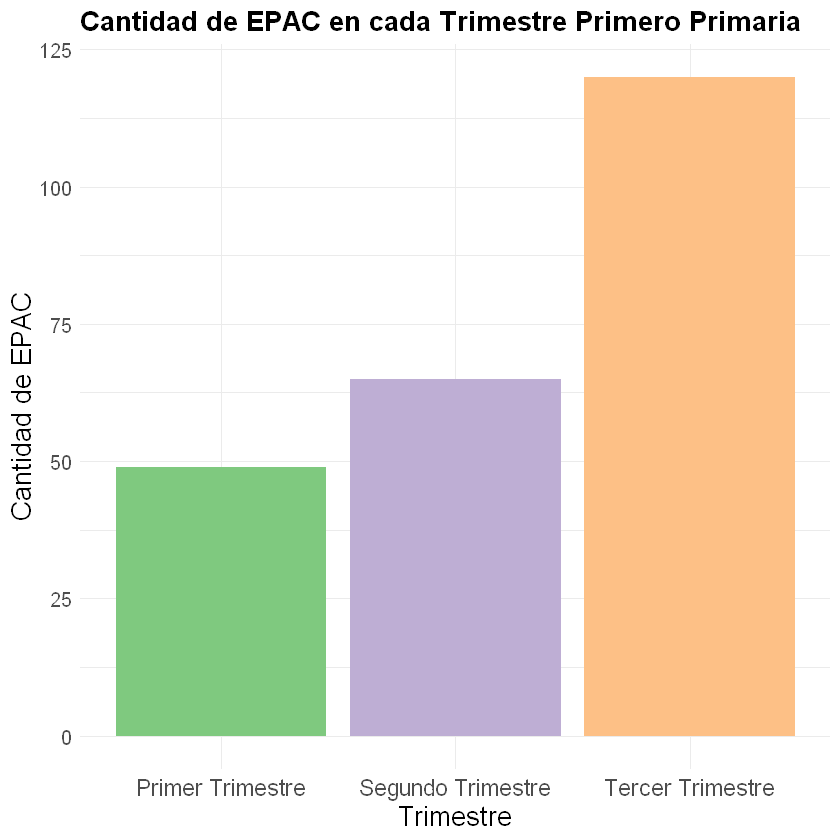

In [679]:

# Contar la cantidad de "EPAC" en cada trimestre
epac_counts <- data.frame(
  Trimestre = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"),
  Cantidad = c(
    sum(primeroPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
    sum(primeroPrimaria$NotasSegundoTrimestre == "EPAC", na.rm = TRUE),
    sum(primeroPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)
  )
)

ggplot(epac_counts, aes(x = Trimestre, y = Cantidad, fill = Trimestre)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +  # Usa la paleta de colores "Accent"
  labs(title = "Cantidad de EPAC en cada Trimestre Primero Primaria",
       x = "Trimestre",
       y = "Cantidad de EPAC") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14),  # Tamaño de los nombres del eje X
        axis.text.y = element_text(size = 12),  # Tamaño de los números del eje Y
        axis.title.x = element_text(size = 16),  # Tamaño del título del eje X
        axis.title.y = element_text(size = 16),  # Tamaño del título del eje Y
        plot.title = element_text(size = 16, face = "bold"),  # Tamaño y negrita del título
        legend.position = "none")  # Ocultar la leyenda




#### Segundo año Primaria ####

In [680]:

segundoPrimaria <- nogoya_PRIMARIO %>%
  filter(NivelEnsenanza == "PRIMARIO",
         Curso == "SEGUNDO",
         Asignatura %in% c("LENGUA", "MATEMATICA", "CIENCIAS SOCIALES", "CIENCIAS NATURALES")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura


In [681]:
table(segundoPrimaria$Condicion)


   APROBADO DESAPROBADO 
       1845         183 

In [682]:
# Crear tabla de frecuencias por materia y condición
tabla_condiciones2 <- segundoPrimaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condiciones2

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
CIENCIAS NATURALES,494,13,97.43590,2.564103
CIENCIAS SOCIALES,494,13,97.43590,2.564103
LENGUA,417,90,82.24852,17.751479
MATEMATICA,440,67,86.78501,13.214990


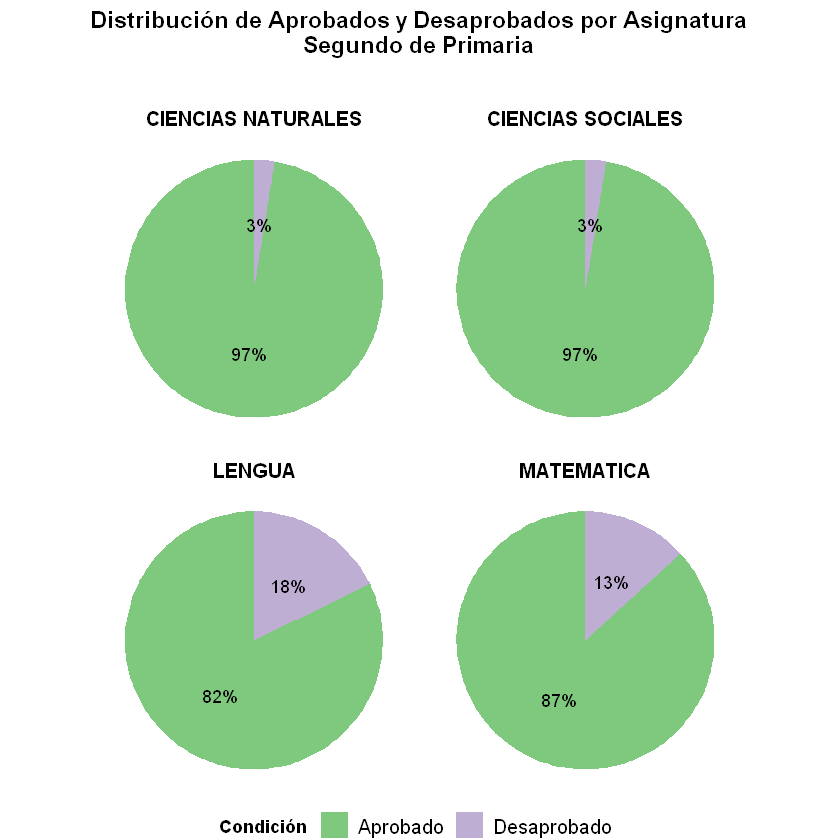

In [683]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_long2 <- tabla_condiciones2 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_long2, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Asignatura\n Segundo de Primaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 12),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )
ggsave("grafico_aprobados_seg.png", width = 8, height = 6, dpi = 300)


In [684]:
segundoPrimariaAprobado  <- segundoPrimaria %>% filter(Promedio != "Desaprobado")

# Convertir a numérico
segundoPrimariaAprobado$Promedio <- as.numeric(segundoPrimariaAprobado$Promedio)

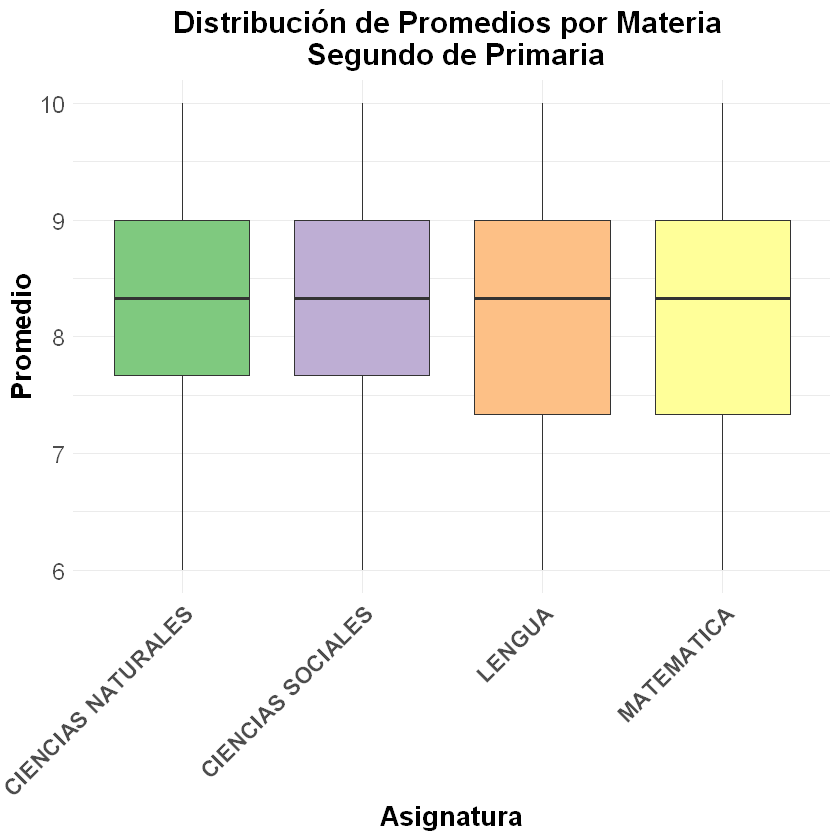

In [685]:

ggplot(segundoPrimariaAprobado, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Segundo de Primaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )



In [686]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignatura2 <- segundoPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )

# Mostrar las estadísticas calculadas
print(estadisticas_por_asignatura2)


# A tibble: 4 x 4
  Asignatura         Media Mediana  Moda
  <chr>              <dbl>   <dbl> <dbl>
1 CIENCIAS NATURALES  8.31    8.33  9   
2 CIENCIAS SOCIALES   8.24    8.33  9   
3 LENGUA              8.15    8.33  8.33
4 MATEMATICA          8.19    8.33  9   


In [687]:
summary_por_asignatura2 <- segundoPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignatura2)

# A tibble: 4 x 7
  Asignatura           Min    Q1 Mediana Media    Q3   Max
  <chr>              <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 CIENCIAS NATURALES     6  7.67    8.33  8.31     9    10
2 CIENCIAS SOCIALES      6  7.67    8.33  8.24     9    10
3 LENGUA                 6  7.33    8.33  8.15     9    10
4 MATEMATICA             6  7.33    8.33  8.19     9    10


In [688]:
# Función para aplicar KS test por materia
realizar_ks_test <- function(data) {
  resultado <- data %>%
    group_by(Asignatura) %>%
    summarise(
      KS_p_value = ks.test(Promedio, "pnorm", mean(Promedio), sd(Promedio))$p.value
    )
  
  print(" **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**")
  print("H₀: Las notas siguen una distribución normal")
  print("H₁: Las notas NO siguen una distribución normal")
  
  return(resultado)
}

# Aplicar la función a los aprobados
ks_resultados <- realizar_ks_test(segundoPrimariaAprobado)

# Mostrar los resultados
print(ks_resultados)


[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 4 x 2
  Asignatura         KS_p_value
  <chr>                   <dbl>
1 CIENCIAS NATURALES   2.12e-11
2 CIENCIAS SOCIALES    1.87e- 8
3 LENGUA               1.44e- 4
4 MATEMATICA           3.26e- 4


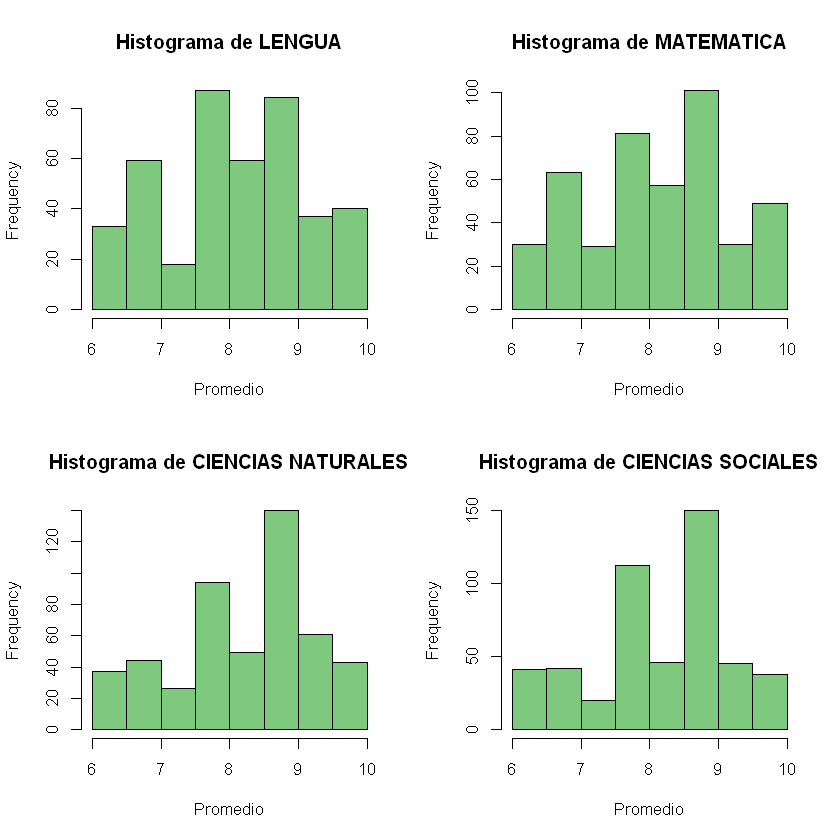

In [689]:
asignaturas <- unique(segundoPrimariaAprobado$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(segundoPrimariaAprobado, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma de", materia),
       xlab = "Promedio", col = "#7fc97f", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos

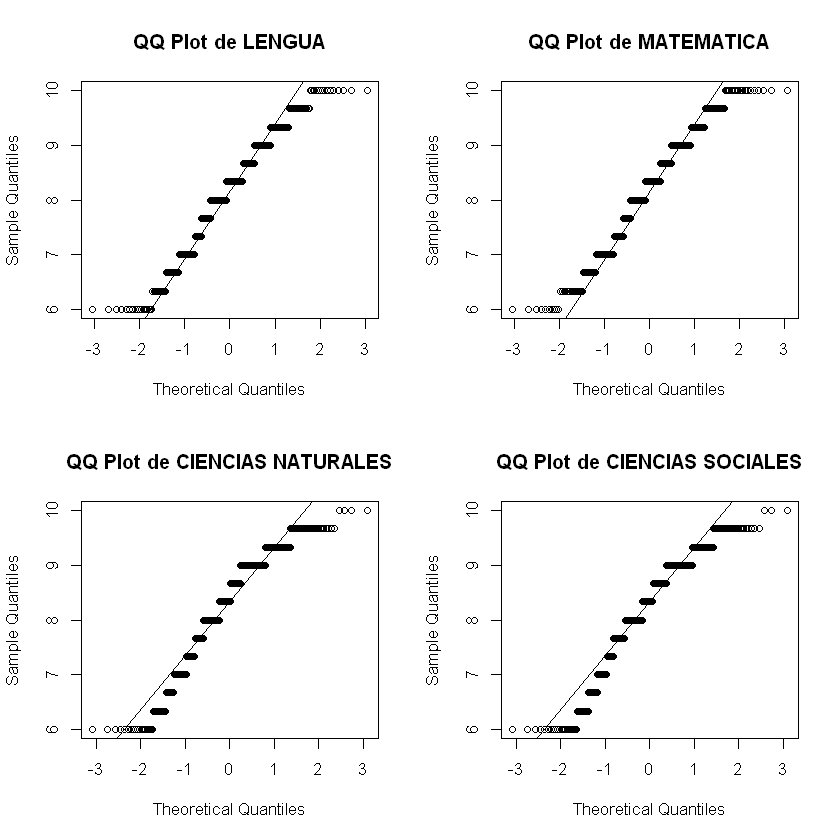

In [690]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(segundoPrimariaAprobado, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original

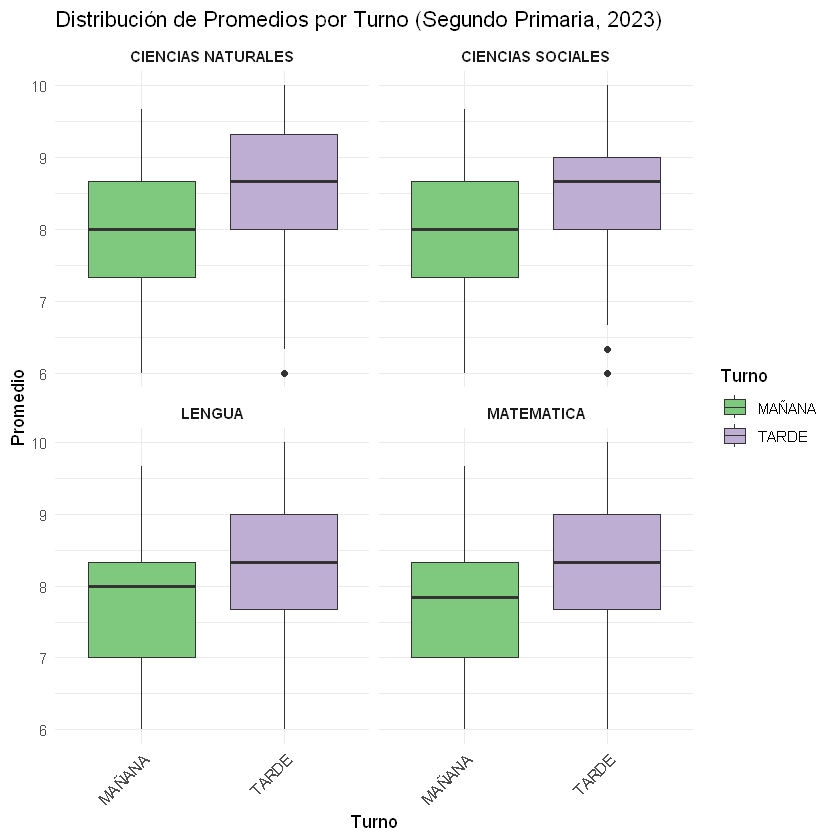

In [691]:
# Filtrar solo los turnos "Mañana" y "Tarde" de tu dataframe
segundoPrimariaAprobado_filtrado <- segundoPrimariaAprobado %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

# Crear el boxplot comparando promedios por turno para cada asignatura con la paleta Accent
ggplot(segundoPrimariaAprobado_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Dividir los boxplots por asignatura
  labs(
    title = "Distribución de Promedios por Turno (Segundo Primaria, 2023)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  # Cambiar el estilo del gráfico
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Mejorar la lectura del eje x
    strip.text = element_text(face = "bold")  # Resaltar los títulos por materia
  )

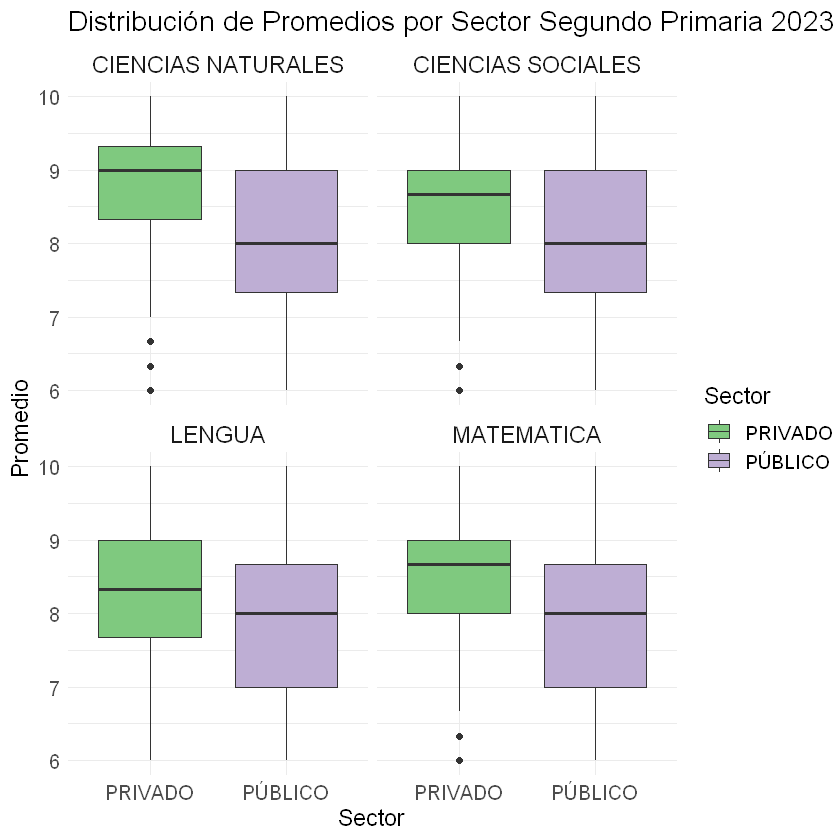

In [692]:
ggplot(segundoPrimariaAprobado, aes(x = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"), y = Promedio, fill = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"))) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Agrupar por asignatura
  scale_fill_brewer(palette = "Accent") +  # Usar paleta de colores "Accent"
  labs(title = "Distribución de Promedios por Sector Segundo Primaria 2023",
       x = "Sector",
       y = "Promedio",
       fill = "Sector") +  # Ajuste de la leyenda
  theme_minimal() +
  theme(
    legend.position = "right",  # Leyenda a la derecha
    text = element_text(size = 14),  # Aumentar el tamaño de la fuente en todo el gráfico
    strip.text = element_text(size = 14),  # Aumentar el tamaño de las etiquetas de las asignaturas
    axis.title = element_text(size = 14),  # Aumentar el tamaño de los títulos de los ejes
    axis.text = element_text(size = 12)  # Aumentar el tamaño del texto de los ejes
  )

In [693]:
# Tabla de contingencia Desempeño y Asignatura - Segundo Primaria
tabla_desemp_asignatura_segundo_primaria <- segundoPrimaria %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Asignatura') %>%
  table()

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Asignatura (Segundo Primaria):")
print(tabla_desemp_asignatura_segundo_primaria)

# Tabla de porcentaje total (porcentaje dentro de la tabla completa)
tabla_porcentaje_total_asignatura_segundo <- prop.table(tabla_desemp_asignatura_segundo_primaria) * 100
tabla_porcentaje_total_asignatura_segundo <- round(tabla_porcentaje_total_asignatura_segundo, 1)  # Redondear a 1 decimal

# Agregar fila y columna de totales
tabla_porcentaje_total_asignatura_segundo <- addmargins(tabla_porcentaje_total_asignatura_segundo, margin = c(1, 2), FUN = sum)

# Renombrar la última fila y columna como "Total"
colnames(tabla_porcentaje_total_asignatura_segundo)[ncol(tabla_porcentaje_total_asignatura_segundo)] <- "Total"
rownames(tabla_porcentaje_total_asignatura_segundo)[nrow(tabla_porcentaje_total_asignatura_segundo)] <- "Total"

print("Tabla de Porcentajes Total (Desempeño y Asignatura - Segundo Primaria):")
print(tabla_porcentaje_total_asignatura_segundo)

# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_asignatura_segundo <- prop.table(tabla_desemp_asignatura_segundo_primaria, margin = 1) * 100
tabla_porcentaje_fila_asignatura_segundo <- round(tabla_porcentaje_fila_asignatura_segundo, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_asignatura_segundo <- addmargins(tabla_porcentaje_fila_asignatura_segundo, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_asignatura_segundo)[ncol(tabla_porcentaje_fila_asignatura_segundo)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Asignatura - Segundo Primaria):")
print(tabla_porcentaje_fila_asignatura_segundo)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_asignatura_segundo <- prop.table(tabla_desemp_asignatura_segundo_primaria, margin = 2) * 100
tabla_porcentaje_columna_asignatura_segundo <- round(tabla_porcentaje_columna_asignatura_segundo, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_asignatura_segundo <- addmargins(tabla_porcentaje_columna_asignatura_segundo, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_asignatura_segundo)[nrow(tabla_porcentaje_columna_asignatura_segundo)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Asignatura - Segundo Primaria):")
print(tabla_porcentaje_columna_asignatura_segundo)


[1] "Tabla de Contingencia Desempeño y Asignatura (Segundo Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                 13                13     90         67
  Aprobado                     52                59     54         51
  Bueno                        85                83     86         95
  Muy Bueno                   156               177    155        154
  Distinguido                 201               175    122        140
Margins computed over dimensions
in the following order:
1: Desempeño
2: Asignatura
[1] "Tabla de Porcentajes Total (Desempeño y Asignatura - Segundo Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA Total
  Insuficiente                0.6               0.6    4.4        3.3   8.9
  Aprobado                    2.6               2.9    2.7        2.5  10.7
  Bueno                       4.2               4.1    4.2        4.7

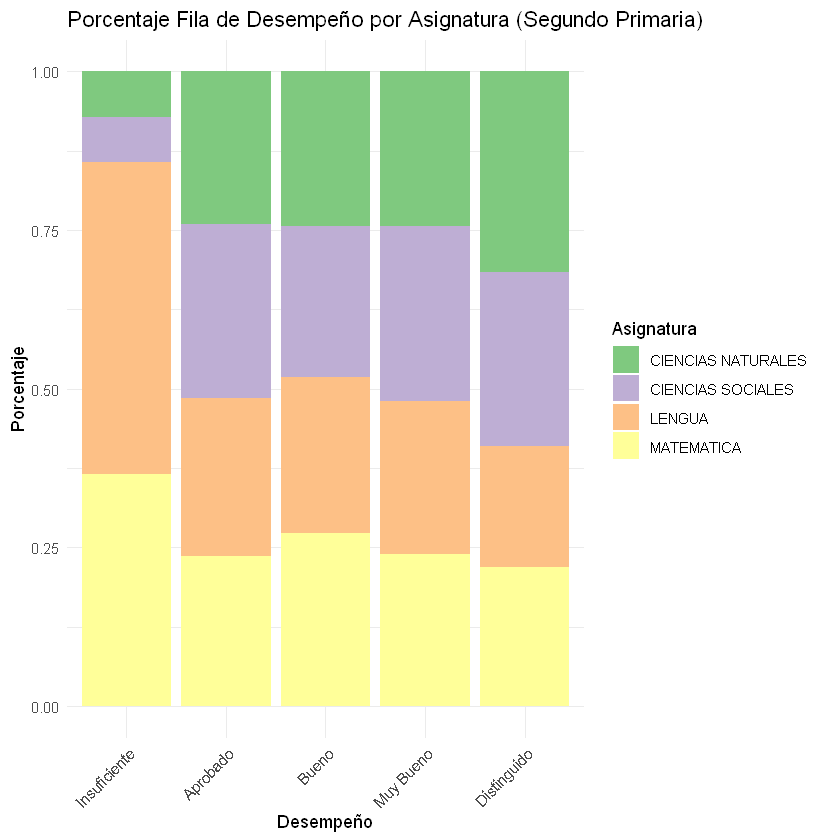

In [694]:
# Eliminar la columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_asignatura_segundo_sin_total <- tabla_porcentaje_fila_asignatura_segundo[, -ncol(tabla_porcentaje_fila_asignatura_segundo)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_asignatura_segundo_long <- as.data.frame(tabla_porcentaje_fila_asignatura_segundo_sin_total)
tabla_porcentaje_fila_asignatura_segundo_long$Desempeño <- rownames(tabla_porcentaje_fila_asignatura_segundo_sin_total)

# Asegurar que Desempeño esté ordenado correctamente
tabla_porcentaje_fila_asignatura_segundo_long$Desempeño <- factor(tabla_porcentaje_fila_asignatura_segundo_long$Desempeño,
                                                                 levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar los porcentajes fila
ggplot(tabla_porcentaje_fila_asignatura_segundo_long, aes(x = Desempeño, y = Freq, fill = Asignatura)) +
  geom_bar(stat = "identity", position = "fill") +  # Apilar las barras para cada desempeño
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Asignatura (Segundo Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


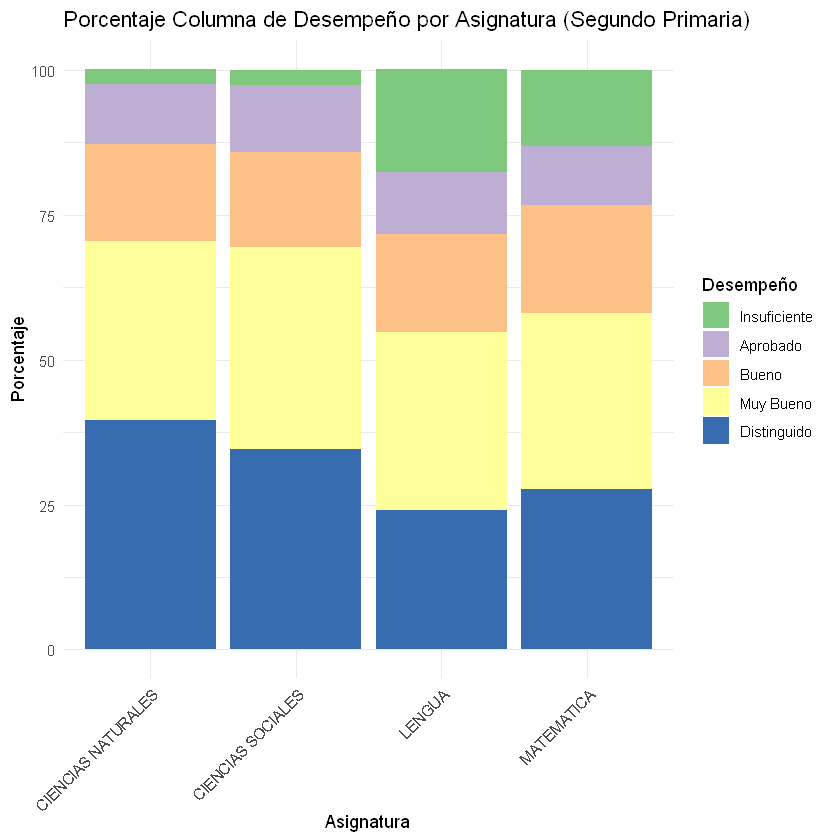

In [695]:
# Eliminar la fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_asignatura_seundo_sin_total <- tabla_porcentaje_columna_asignatura_segundo[-nrow(tabla_porcentaje_columna_asignatura_segundo), ]

# Convertir tabla de porcentajes columna sin "Total" a formato largo para ggplot
tabla_porcentaje_columna_asignatura_segundo_long <- as.data.frame(tabla_porcentaje_columna_asignatura_seundo_sin_total)
tabla_porcentaje_columna_asignatura_segundo_long$Desempeño <- rownames(tabla_porcentaje_columna_asignatura_seundo_sin_total)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_asignatura_segundo_long$Desempeño <- factor(tabla_porcentaje_columna_asignatura_segundo_long$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar
ggplot(tabla_porcentaje_columna_asignatura_segundo_long, aes(x = Asignatura, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +  # Usamos la paleta accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Asignatura (Segundo Primaria)",
       x = "Asignatura", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


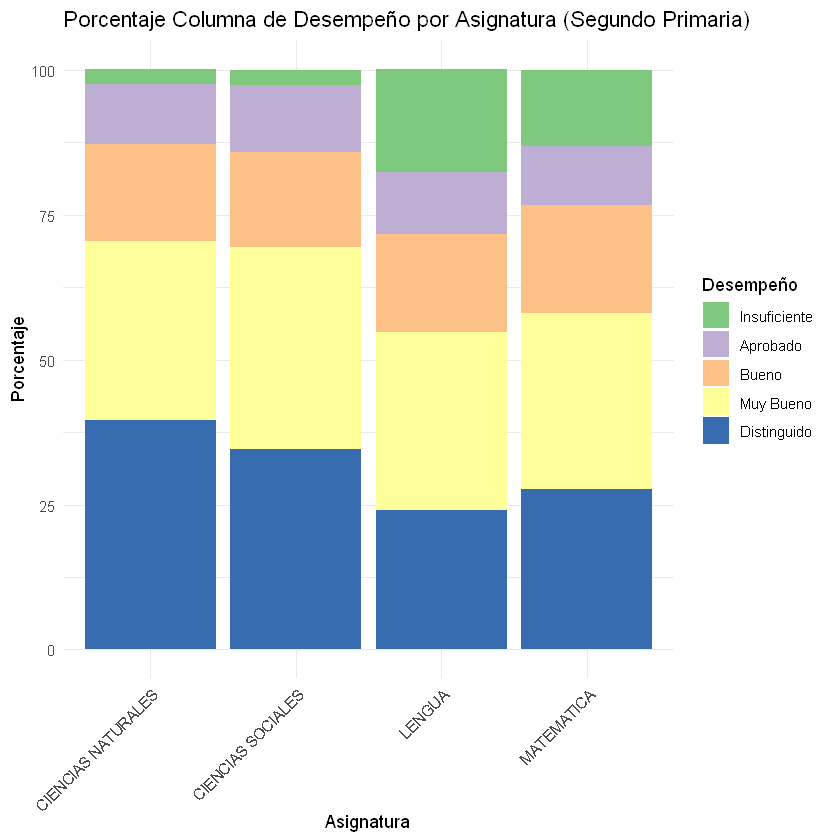

In [696]:
# Eliminar la fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_asignatura_segundo_sin_total <- tabla_porcentaje_columna_asignatura_segundo[-nrow(tabla_porcentaje_columna_asignatura_segundo), ]

# Convertir tabla de porcentajes columna sin "Total" a formato largo para ggplot
tabla_porcentaje_columna_asignatura_segundo_long <- as.data.frame(tabla_porcentaje_columna_asignatura_segundo_sin_total)
tabla_porcentaje_columna_asignatura_segundo_long$Desempeño <- rownames(tabla_porcentaje_columna_asignatura_segundo_sin_total)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_asignatura_segundo_long$Desempeño <- factor(tabla_porcentaje_columna_asignatura_segundo_long$Desempeño,
                                                                 levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar
ggplot(tabla_porcentaje_columna_asignatura_segundo_long, aes(x = Asignatura, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +  # Usamos la paleta accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Asignatura (Segundo Primaria)",
       x = "Asignatura", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


In [697]:
chi_desemp_asignatura_segundo_primaria<- chisq.test(tabla_desemp_asignatura_segundo_primaria)
chi_desemp_asignatura_segundo_primaria


	Pearson's Chi-squared test

data:  tabla_desemp_asignatura_segundo_primaria
X-squared = 127.01, df = 12, p-value < 2.2e-16


In [698]:
chi_desemp_asignatura_segundo_primaria$observed


              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                 13                13     90         67
  Aprobado                     52                59     54         51
  Bueno                        85                83     86         95
  Muy Bueno                   156               177    155        154
  Distinguido                 201               175    122        140

In [699]:
round(chi_desemp_asignatura_segundo_primaria$expected, 0)


,CIENCIAS NATURALES,CIENCIAS SOCIALES,LENGUA,MATEMATICA
Insuficiente,46,46,46,46
Aprobado,54,54,54,54
Bueno,87,87,87,87
Muy Bueno,160,160,160,160
Distinguido,160,160,160,160


In [700]:
round(chi_desemp_asignatura_segundo_primaria$residuals, 1)


              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente               -4.8              -4.8    6.5        3.1
  Aprobado                   -0.3               0.7    0.0       -0.4
  Bueno                      -0.2              -0.5   -0.1        0.8
  Muy Bueno                  -0.4               1.3   -0.4       -0.5
  Distinguido                 3.3               1.2   -3.0       -1.5

In [701]:
round(chi_desemp_asignatura_segundo_primaria$stdres, 1)


              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente               -5.9              -5.9    7.9        3.8
  Aprobado                   -0.3               0.8    0.0       -0.5
  Bueno                      -0.3              -0.6   -0.2        1.1
  Muy Bueno                  -0.5               1.8   -0.6       -0.7
  Distinguido                 4.6               1.7   -4.1       -2.2

In [702]:
CramerV(tabla_desemp_asignatura_segundo_primaria)


[1] 0.1444863

In [703]:
# Filtrar para segundo grado
segundoPrimaria_turno <- segundoPrimaria %>%
  filter(Turno %in% c('MAÑANA', 'TARDE'))

# Asegurarnos de que el orden de los niveles de 'Desempeño' sea el correcto
tabla_desemp_turno_segundo <- segundoPrimaria_turno %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Turno') %>%
  table()

# Mostrar la tabla de contingencia
print("Tabla de Contingencia (Desempeño y Turno):")

tabla_desemp_turno_segundo

# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_turno_segundo <- prop.table(tabla_desemp_turno_segundo, margin = 1) * 100
tabla_porcentaje_fila_turno_segundo <- round(tabla_porcentaje_fila_turno_segundo, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_turno_segundo <- addmargins(tabla_porcentaje_fila_turno_segundo, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_turno_segundo)[ncol(tabla_porcentaje_fila_turno_segundo)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Turno):")
print(tabla_porcentaje_fila_turno_segundo)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_turno_segundo <- prop.table(tabla_desemp_turno_segundo, margin = 2) * 100
tabla_porcentaje_columna_turno_segundo <- round(tabla_porcentaje_columna_turno_segundo, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_turno_segundo <- addmargins(tabla_porcentaje_columna_turno_segundo, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_turno_segundo)[nrow(tabla_porcentaje_columna_turno_segundo)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Turno):")
print(tabla_porcentaje_columna_turno_segundo)

[1] "Tabla de Contingencia (Desempeño y Turno):"


              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     37   125
  Aprobado         66   139
  Bueno           118   208
  Muy Bueno       169   466
  Distinguido      66   570

[1] "Tabla de Porcentajes por Fila (Desempeño y Turno):"
              Turno
Desempeño      MAÑANA TARDE Total
  Insuficiente   22.8  77.2 100.0
  Aprobado       32.2  67.8 100.0
  Bueno          36.2  63.8 100.0
  Muy Bueno      26.6  73.4 100.0
  Distinguido    10.4  89.6 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Turno):"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    8.1   8.3
  Aprobado       14.5   9.2
  Bueno          25.9  13.8
  Muy Bueno      37.1  30.9
  Distinguido    14.5  37.8
  Total         100.1 100.0


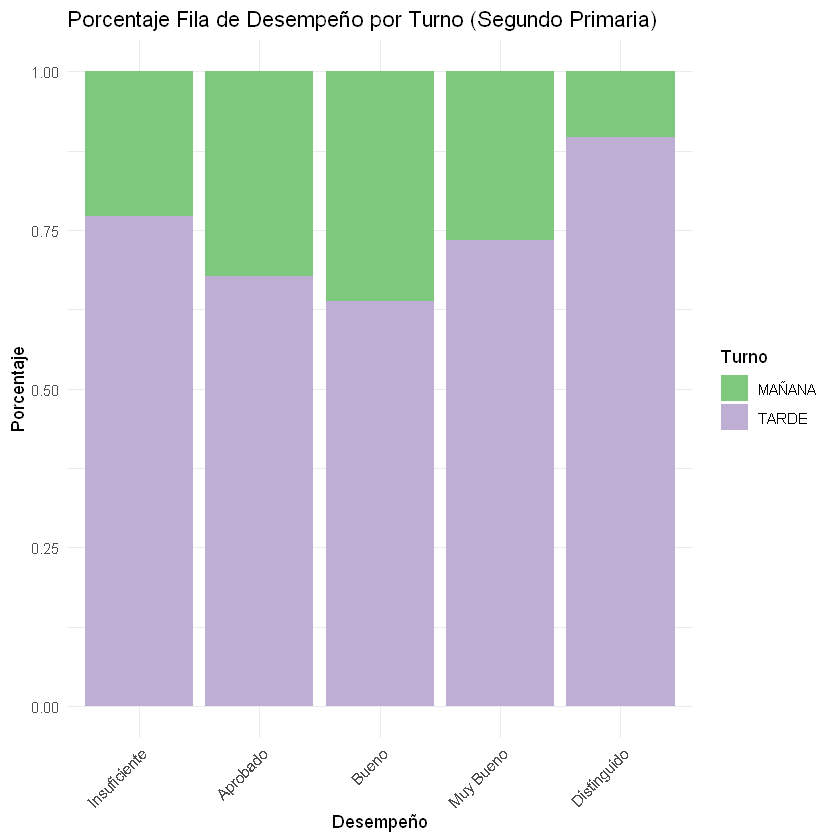

In [704]:
# Eliminar columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_turno_sin_total_segundo <- tabla_porcentaje_fila_turno_segundo[, -ncol(tabla_porcentaje_fila_turno_segundo)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_turno_long_segundo <- as.data.frame(tabla_porcentaje_fila_turno_sin_total_segundo)
tabla_porcentaje_fila_turno_long_segundo$Desempeño <- rownames(tabla_porcentaje_fila_turno_sin_total_segundo)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_turno_long_segundo$Desempeño <- factor(tabla_porcentaje_fila_turno_long$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar las barras apiladas para porcentaje fila
ggplot(tabla_porcentaje_fila_turno_long_segundo, aes(x = Desempeño, y = Freq, fill = Turno)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Turno (Segundo Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X

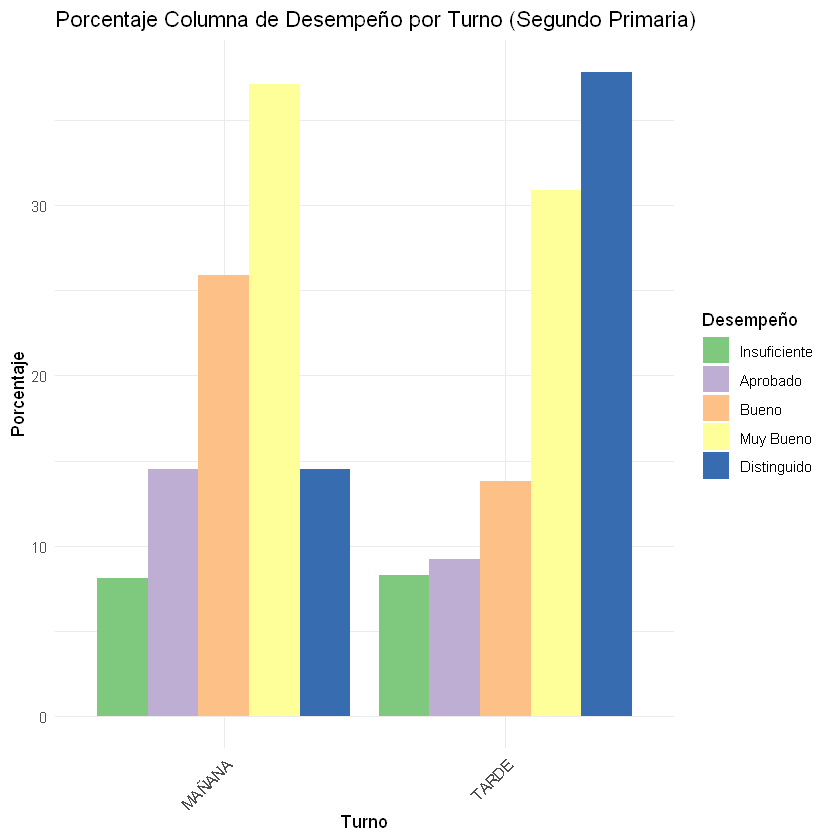

In [705]:
# Eliminar fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_turno_sin_total_segundo <- tabla_porcentaje_columna_turno_segundo[-nrow(tabla_porcentaje_columna_turno_segundo), ]

# Convertir la tabla de porcentajes columna a formato largo
tabla_porcentaje_columna_turno_long_segundo <- as.data.frame(tabla_porcentaje_columna_turno_sin_total_segundo)
tabla_porcentaje_columna_turno_long_segundo$Desempeño <- rownames(tabla_porcentaje_columna_turno_sin_total_segundo)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_turno_long_segundo$Desempeño <- factor(tabla_porcentaje_columna_turno_long_segundo$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar las barras adosadas para porcentaje columna
ggplot(tabla_porcentaje_columna_turno_long_segundo, aes(x = Turno, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Turno (Segundo Primaria)",
       x = "Turno", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X

In [706]:
# Realizar la prueba de Chi-cuadrado
chi_desemp_turno_segundo <- chisq.test(tabla_desemp_turno_segundo)
print(chi_desemp_turno_segundo)


	Pearson's Chi-squared test

data:  tabla_desemp_turno_segundo
X-squared = 103.01, df = 4, p-value < 2.2e-16



In [707]:
CramerV(tabla_desemp_turno_segundo)

[1] 0.229021

In [708]:
chi_desemp_turno_segundo$observed


              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     37   125
  Aprobado         66   139
  Bueno           118   208
  Muy Bueno       169   466
  Distinguido      66   570

In [709]:
round(chi_desemp_turno_segundo$expected, 0)


,MAÑANA,TARDE
Insuficiente,38,124
Aprobado,48,157
Bueno,76,250
Muy Bueno,147,488
Distinguido,148,488


In [710]:
round(chi_desemp_turno_segundo$residuals, 1)


              Turno
Desempeño      MAÑANA TARDE
  Insuficiente   -0.1   0.1
  Aprobado        2.7  -1.5
  Bueno           4.9  -2.7
  Muy Bueno       1.8  -1.0
  Distinguido    -6.7   3.7

In [711]:
round(chi_desemp_turno_segundo$stdres, 1)


              Turno
Desempeño      MAÑANA TARDE
  Insuficiente   -0.1   0.1
  Aprobado        3.2  -3.2
  Bueno           6.1  -6.1
  Muy Bueno       2.5  -2.5
  Distinguido    -9.3   9.3

In [712]:
# Cambiar el nombre de la columna 'EsPrivada' a 'Sector' y recodificar los valores 'N' y 'S' por 'Publica' y 'Privada'
tabla_desemp_sector_segundo_primaria <- segundoPrimaria %>%
  filter(!is.na(Desempeño) & !is.na(EsPrivada)) %>%  # Eliminar NA
  rename(Sector = EsPrivada) %>%  # Renombrar EsPrivada a Sector
  mutate(
    Sector = recode(Sector, 'N' = 'Publica', 'S' = 'Privada'),  # Reemplazar valores 'N' y 'S'
    Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))  # Asegurar el orden de Desempeño
  ) %>%
  select('Desempeño', 'Sector') %>%
  table()  # Generar la tabla de contingencia

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Sector para Segundo Grado:")
print(tabla_desemp_sector_segundo_primaria)


[1] "Tabla de Contingencia Desempeño y Sector para Segundo Grado:"
              Sector
Desempeño      Privada Publica
  Insuficiente      32     151
  Aprobado          47     169
  Bueno            102     247
  Muy Bueno        258     384
  Distinguido      361     277


In [713]:
# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_sector_segundo <- prop.table(tabla_desemp_sector_segundo_primaria, margin = 1) * 100
tabla_porcentaje_fila_sector_segundo <- round(tabla_porcentaje_fila_sector_segundo, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_sector_segundo <- addmargins(tabla_porcentaje_fila_sector_segundo, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_sector_segundo)[ncol(tabla_porcentaje_fila_sector_segundo)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Sector):")
print(tabla_porcentaje_fila_sector_segundo)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_sector_segundo <- prop.table(tabla_desemp_sector_segundo_primaria, margin = 2) * 100
tabla_porcentaje_columna_sector_segundo <- round(tabla_porcentaje_columna_sector_segundo, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_sector_segundo <- addmargins(tabla_porcentaje_columna_sector_segundo, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_sector_segundo)[nrow(tabla_porcentaje_columna_sector_segundo)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Sector):")
print(tabla_porcentaje_columna_sector_segundo)

[1] "Tabla de Porcentajes por Fila (Desempeño y Sector):"
              Sector
Desempeño      Privada Publica Total
  Insuficiente    17.5    82.5 100.0
  Aprobado        21.8    78.2 100.0
  Bueno           29.2    70.8 100.0
  Muy Bueno       40.2    59.8 100.0
  Distinguido     56.6    43.4 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Sector):"
              Sector
Desempeño      Privada Publica
  Insuficiente     4.0    12.3
  Aprobado         5.9    13.8
  Bueno           12.8    20.1
  Muy Bueno       32.2    31.3
  Distinguido     45.1    22.6
  Total          100.0   100.1


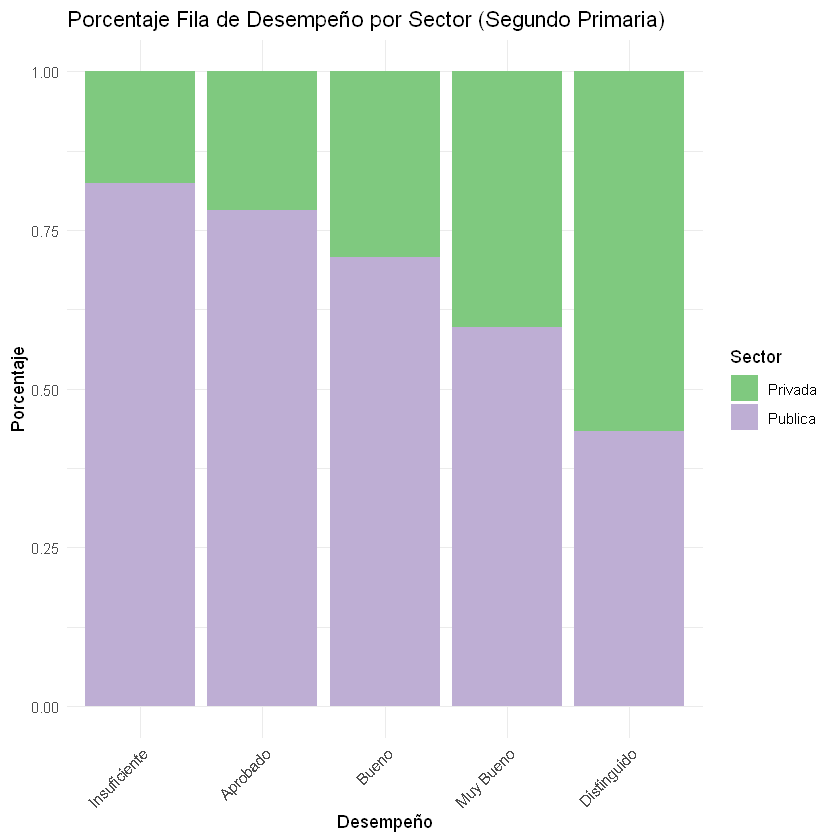

In [714]:
# Eliminar columna Total en la tabla de porcentaje fila
tabla_porcentaje_fila_sector_sin_total_segundo <- tabla_porcentaje_fila_sector_segundo[, -ncol(tabla_porcentaje_fila_sector_segundo)]  # Eliminar columna "Total"

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_sector_long_segundo <- as.data.frame(tabla_porcentaje_fila_sector_sin_total_segundo)
tabla_porcentaje_fila_sector_long_segundo$Desempeño <- rownames(tabla_porcentaje_fila_sector_sin_total_segundo)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_sector_long_segundo$Desempeño <- factor(tabla_porcentaje_fila_sector_long_segundo$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar el porcentaje fila con barras apiladas
ggplot(tabla_porcentaje_fila_sector_long_segundo, aes(x = Desempeño, y = Freq, fill = Sector)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Sector (Segundo Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X

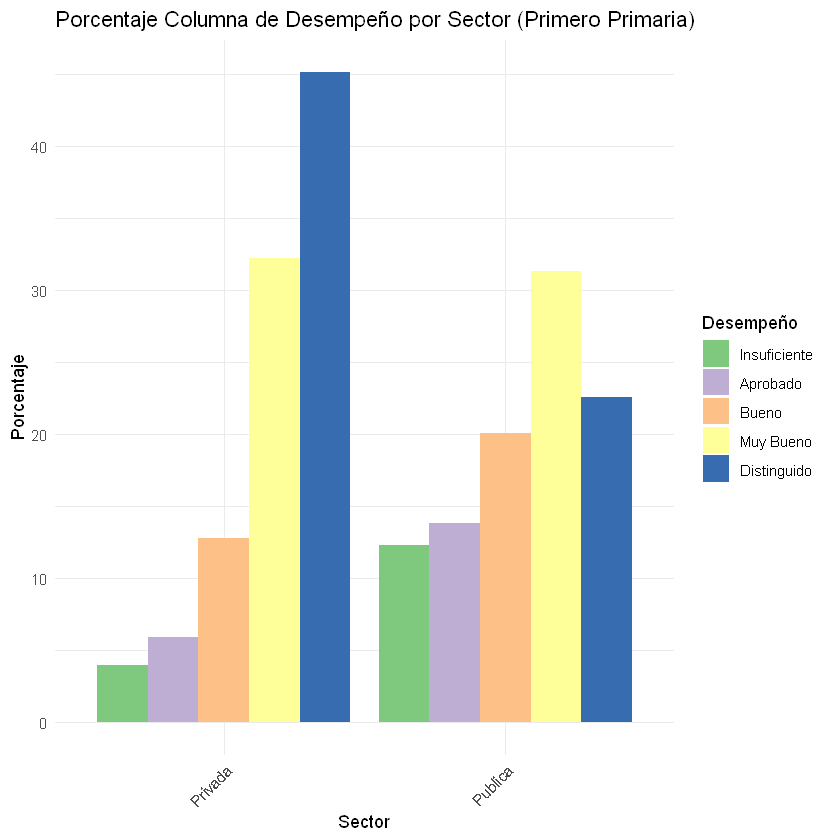

In [715]:
# Eliminar fila "Total" en la tabla de porcentaje columna
tabla_porcentaje_columna_sector_sin_total_segundo <- tabla_porcentaje_columna_sector_segundo[-nrow(tabla_porcentaje_columna_sector_segundo), ]  # Eliminar fila "Total"

# Convertir la tabla de porcentajes columna a formato largo
tabla_porcentaje_columna_sector_long_segundo <- as.data.frame(tabla_porcentaje_columna_sector_sin_total_segundo)
tabla_porcentaje_columna_sector_long_segundo$Desempeño <- rownames(tabla_porcentaje_columna_sector_sin_total_segundo)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_sector_long_segundo$Desempeño <- factor(tabla_porcentaje_columna_sector_long$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar el porcentaje columna con barras adosadas, donde el eje X es "Sector"
ggplot(tabla_porcentaje_columna_sector_long_segundo, aes(x = Sector, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Sector (Primero Primaria)",
       x = "Sector", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X


In [716]:
# Realizar la prueba de Chi-cuadrado
chi_desemp_sector_segundo <- chisq.test(tabla_desemp_sector_segundo_primaria)
print(chi_desemp_sector_segundo)


	Pearson's Chi-squared test

data:  tabla_desemp_sector_segundo_primaria
X-squared = 159.08, df = 4, p-value < 2.2e-16



In [717]:
CramerV(tabla_desemp_sector_segundo_primaria)

[1] 0.2800747

In [718]:
chi_desemp_sector_segundo$observed


              Sector
Desempeño      Privada Publica
  Insuficiente      32     151
  Aprobado          47     169
  Bueno            102     247
  Muy Bueno        258     384
  Distinguido      361     277

In [719]:
round(chi_desemp_sector_segundo$expected, 0)


,Privada,Publica
Insuficiente,72,111
Aprobado,85,131
Bueno,138,211
Muy Bueno,253,389
Distinguido,252,386


In [720]:
round(chi_desemp_sector_segundo$residuals, 1)


              Sector
Desempeño      Privada Publica
  Insuficiente    -4.7     3.8
  Aprobado        -4.1     3.3
  Bueno           -3.0     2.5
  Muy Bueno        0.3    -0.2
  Distinguido      6.9    -5.6

In [721]:
round(chi_desemp_sector_segundo$stdres, 1)


              Sector
Desempeño      Privada Publica
  Insuficiente    -6.4     6.4
  Aprobado        -5.6     5.6
  Bueno           -4.3     4.3
  Muy Bueno        0.5    -0.5
  Distinguido     10.7   -10.7

In [722]:
prop.test(c(sum(segundoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
            sum(segundoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)),
          c(nrow(segundoPrimaria), nrow(segundoPrimaria)))



	2-sample test for equality of proportions with continuity correction

data:  c(sum(segundoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE), sum(segundoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)) out of c(nrow(segundoPrimaria), nrow(segundoPrimaria))
X-squared = 19.07, df = 1, p-value = 1.26e-05
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.05238486 -0.01960725
sample estimates:
    prop 1     prop 2 
0.05424063 0.09023669 


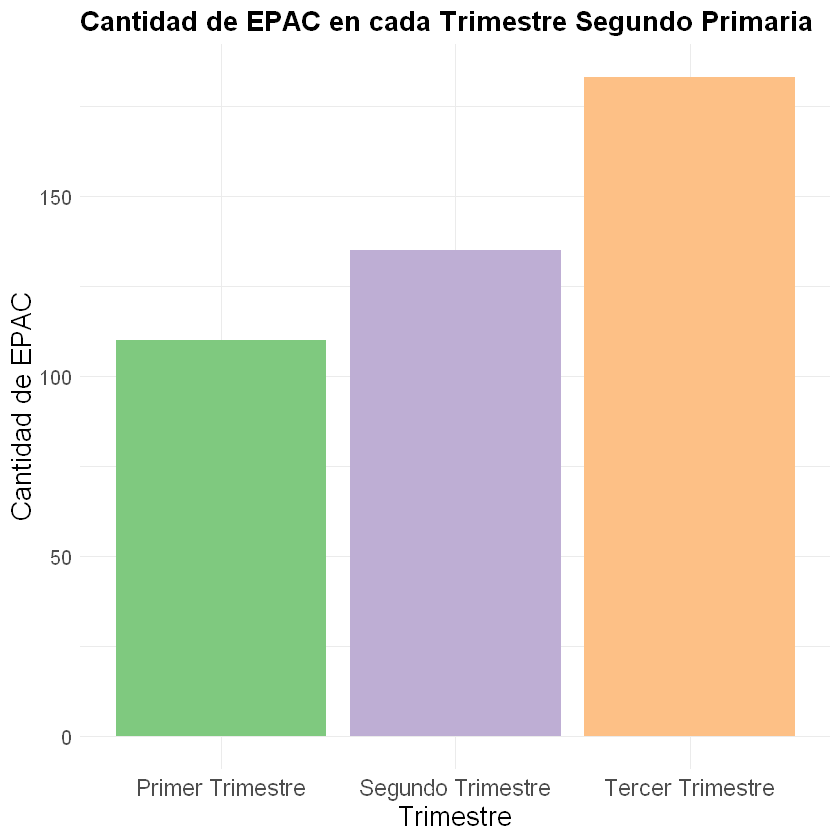

In [723]:
# Contar la cantidad de "EPAC" en cada trimestre para Segundo de Primaria
epac_counts_2 <- data.frame(
  Trimestre = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"),
  Cantidad = c(
    sum(segundoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
    sum(segundoPrimaria$NotasSegundoTrimestre == "EPAC", na.rm = TRUE),
    sum(segundoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)
  )
)

ggplot(epac_counts_2, aes(x = Trimestre, y = Cantidad, fill = Trimestre)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +
  labs(title = "Cantidad de EPAC en cada Trimestre Segundo Primaria",
       x = "Trimestre",
       y = "Cantidad de EPAC") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        plot.title = element_text(size = 16, face = "bold"),
        legend.position = "none")


#### Tercer año Primaria ####

In [724]:
terceroPrimaria <- nogoya_PRIMARIO %>%
  filter(NivelEnsenanza == "PRIMARIO",
         Curso == "TERCERO",
         Asignatura %in% c("LENGUA", "MATEMATICA", "CIENCIAS SOCIALES", "CIENCIAS NATURALES")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura

In [725]:
table(terceroPrimaria$Condicion)


   APROBADO DESAPROBADO 
       1878         133 

In [726]:
# Crear tabla de frecuencias por materia y condición
tabla_condiciones3 <- terceroPrimaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condiciones3

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
CIENCIAS NATURALES,492,6,98.79518,1.204819
CIENCIAS SOCIALES,492,6,98.79518,1.204819
LENGUA,452,66,87.25869,12.741313
MATEMATICA,442,55,88.93360,11.066398


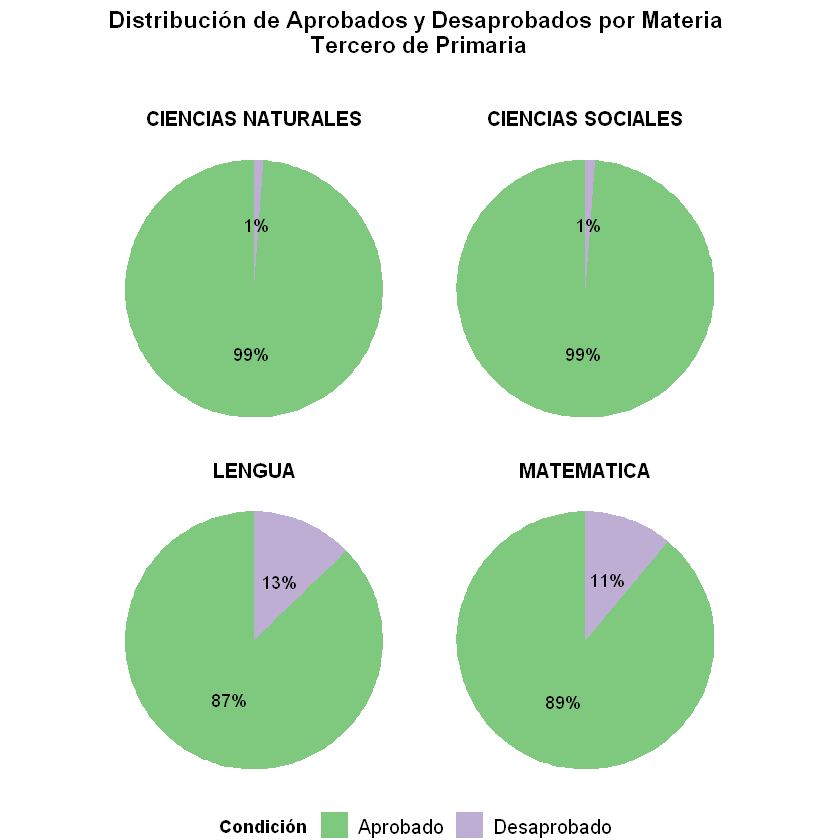

In [727]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_long3 <- tabla_condiciones3 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_long3, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Materia \n Tercero de Primaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 12),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )


In [728]:
terceroPrimariaAprobado  <- terceroPrimaria %>% filter(Promedio != "Desaprobado")

# Convertir a numérico
terceroPrimariaAprobado$Promedio <- as.numeric(terceroPrimariaAprobado$Promedio)

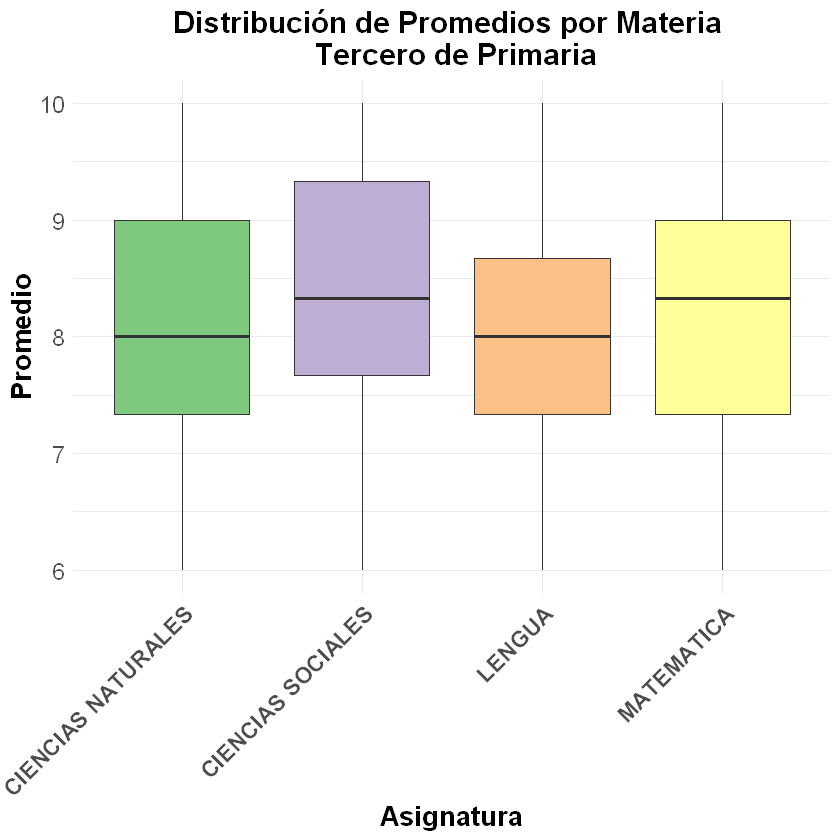

In [729]:
ggplot(terceroPrimariaAprobado, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Tercero de Primaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )

In [730]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignatura3 <- terceroPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )

# Mostrar las estadísticas calculadas
print(estadisticas_por_asignatura3)


# A tibble: 4 x 4
  Asignatura         Media Mediana  Moda
  <chr>              <dbl>   <dbl> <dbl>
1 CIENCIAS NATURALES  8.21    8        8
2 CIENCIAS SOCIALES   8.26    8.33     8
3 LENGUA              8.06    8        8
4 MATEMATICA          8.15    8.33     9


In [731]:
summary_por_asignatura3 <- terceroPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignatura3)

# A tibble: 4 x 7
  Asignatura           Min    Q1 Mediana Media    Q3   Max
  <chr>              <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 CIENCIAS NATURALES     6  7.33    8     8.21  9       10
2 CIENCIAS SOCIALES      6  7.67    8.33  8.26  9.33    10
3 LENGUA                 6  7.33    8     8.06  8.67    10
4 MATEMATICA             6  7.33    8.33  8.15  9       10


In [732]:
# Función para aplicar KS test por materia
realizar_ks_test <- function(data) {
  resultado <- data %>%
    group_by(Asignatura) %>%
    summarise(
      KS_p_value = ks.test(Promedio, "pnorm", mean(Promedio), sd(Promedio))$p.value
    )
  
  print(" **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**")
  print("H₀: Las notas siguen una distribución normal")
  print("H₁: Las notas NO siguen una distribución normal")
  
  return(resultado)
}

# Aplicar la función a los aprobados
ks_resultados <- realizar_ks_test(terceroPrimariaAprobado)

# Mostrar los resultados
print(ks_resultados)


[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 4 x 2
  Asignatura          KS_p_value
  <chr>                    <dbl>
1 CIENCIAS NATURALES 0.000178   
2 CIENCIAS SOCIALES  0.00000541 
3 LENGUA             0.00000209 
4 MATEMATICA         0.000000192


Dado que todos los p-values son menores a 0.05, se rechaza la hipótesis nula (H₀) en todas las materias. Esto significa que las notas no siguen una distribución normal en ninguno de los casos. 

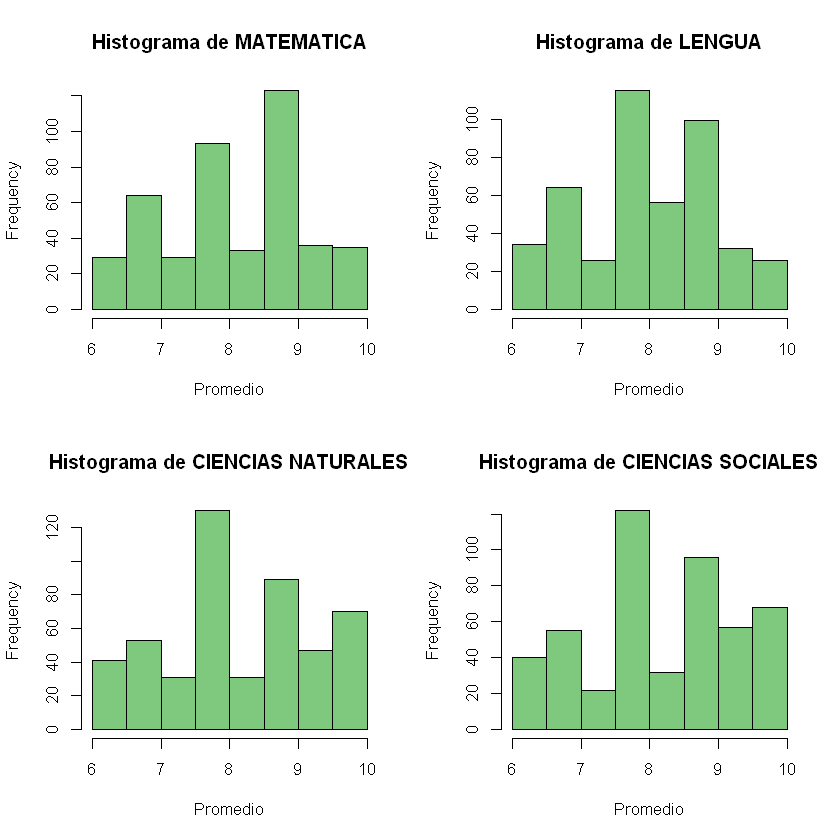

In [733]:
asignaturas <- unique(terceroPrimariaAprobado$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(terceroPrimariaAprobado, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma de", materia),
       xlab = "Promedio", col = "#7fc97f", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos

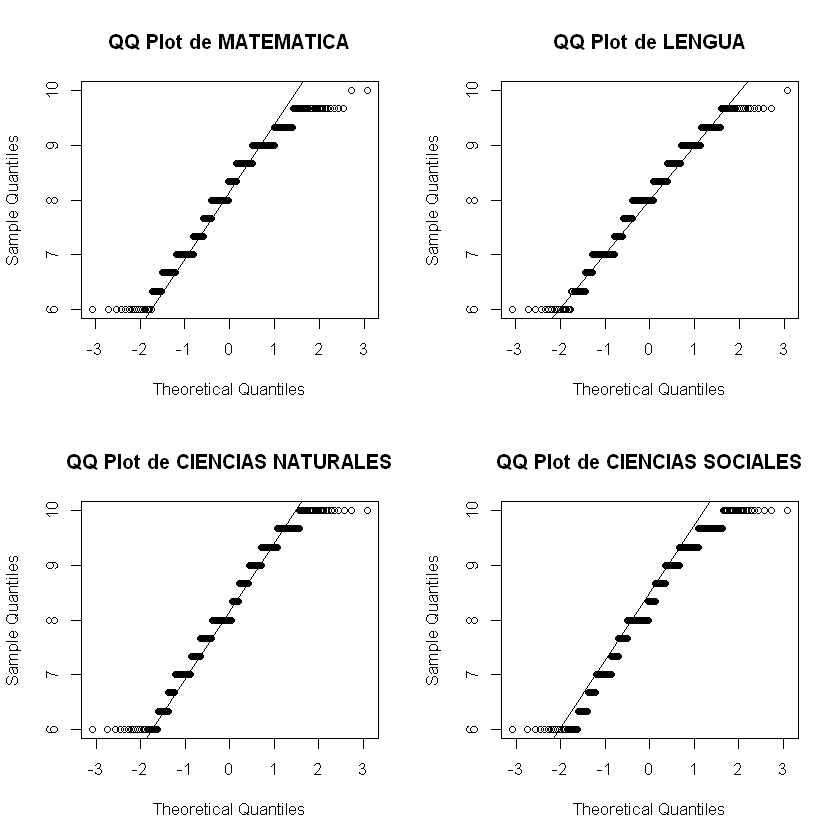

In [734]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(terceroPrimariaAprobado, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original

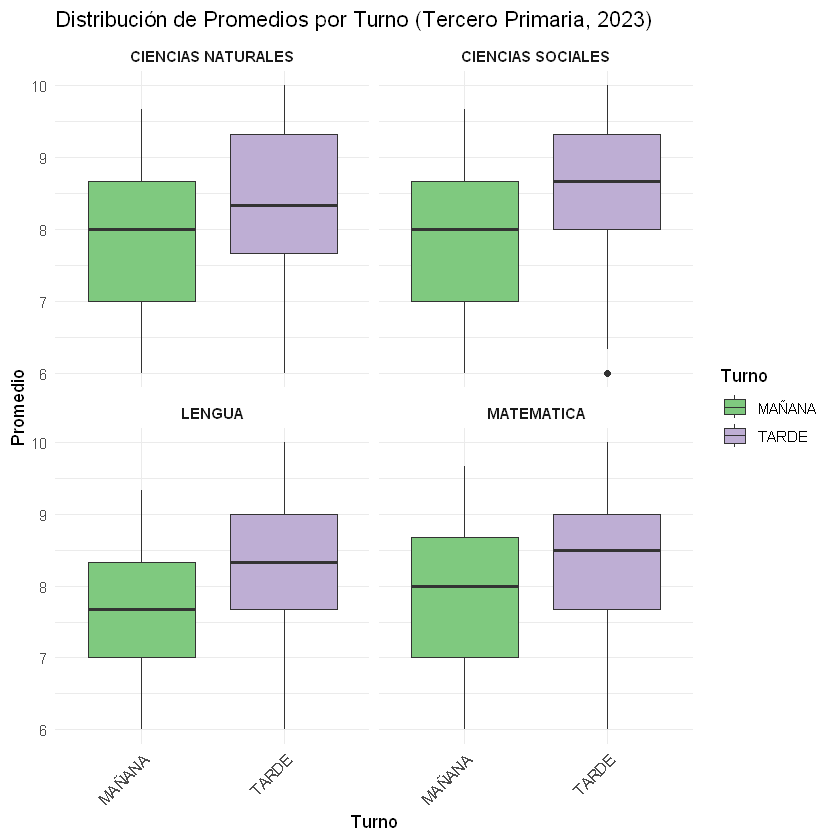

In [735]:
# Filtrar solo los turnos "Mañana" y "Tarde" de tu dataframe
terceroPrimariaAprobado_filtrado <- terceroPrimariaAprobado %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

# Crear el boxplot comparando promedios por turno para cada asignatura con la paleta Accent
ggplot(terceroPrimariaAprobado_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Dividir los boxplots por asignatura
  labs(
    title = "Distribución de Promedios por Turno (Tercero Primaria, 2023)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  # Cambiar el estilo del gráfico
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Mejorar la lectura del eje x
    strip.text = element_text(face = "bold")  # Resaltar los títulos por materia
  )

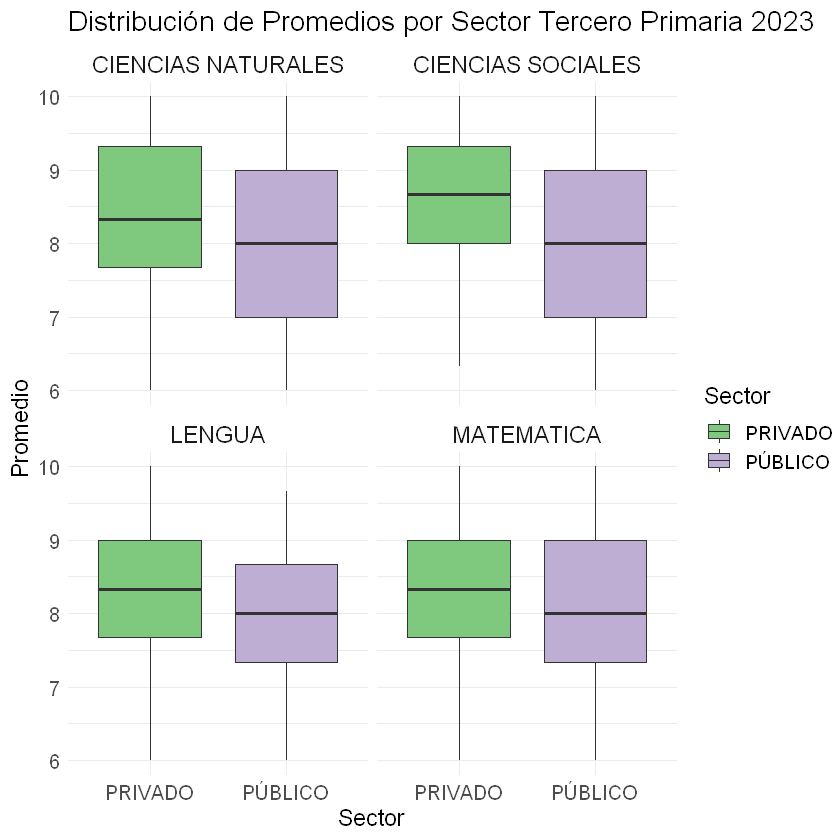

In [736]:
ggplot(terceroPrimariaAprobado, aes(x = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"), y = Promedio, fill = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"))) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Agrupar por asignatura
  scale_fill_brewer(palette = "Accent") +  # Usar paleta de colores "Accent"
  labs(title = "Distribución de Promedios por Sector Tercero Primaria 2023",
       x = "Sector",
       y = "Promedio",
       fill = "Sector") +  # Ajuste de la leyenda
  theme_minimal() +
  theme(
    legend.position = "right",  # Leyenda a la derecha
    text = element_text(size = 14),  # Aumentar el tamaño de la fuente en todo el gráfico
    strip.text = element_text(size = 14),  # Aumentar el tamaño de las etiquetas de las asignaturas
    axis.title = element_text(size = 14),  # Aumentar el tamaño de los títulos de los ejes
    axis.text = element_text(size = 12)  # Aumentar el tamaño del texto de los ejes
  )


In [737]:
# Tabla de contingencia Desempeño y Asignatura
tabla_desemp_asignatura_tercero_primaria <- terceroPrimaria %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Asignatura') %>%
  table()

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Asignatura (Tercero Primaria):")
print(tabla_desemp_asignatura_tercero_primaria)


[1] "Tabla de Contingencia Desempeño y Asignatura (Tercero Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                  6                 6     66         55
  Aprobado                     53                55     45         51
  Bueno                       116                97    113        101
  Muy Bueno                   159               161    184        153
  Distinguido                 164               179    110        137


In [738]:
# Realizar la prueba de Chi-cuadrado
chi_desemp_asignatura_tercero_primaria<- chisq.test(tabla_desemp_asignatura_tercero_primaria)
chi_desemp_asignatura_tercero_primaria


	Pearson's Chi-squared test

data:  tabla_desemp_asignatura_tercero_primaria
X-squared = 115.63, df = 12, p-value < 2.2e-16


In [739]:
CramerV(tabla_desemp_asignatura_tercero_primaria)

[1] 0.1384396

In [740]:
chi_desemp_asignatura_tercero_primaria$observed

              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                  6                 6     66         55
  Aprobado                     53                55     45         51
  Bueno                       116                97    113        101
  Muy Bueno                   159               161    184        153
  Distinguido                 164               179    110        137

In [741]:
round(chi_desemp_asignatura_tercero_primaria$expected, 0)


,CIENCIAS NATURALES,CIENCIAS SOCIALES,LENGUA,MATEMATICA
Insuficiente,33,33,34,33
Aprobado,51,51,53,50
Bueno,106,106,110,106
Muy Bueno,163,163,169,162
Distinguido,146,146,152,146


In [742]:
round(chi_desemp_asignatura_tercero_primaria$residuals, 1)


              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente               -4.7              -4.7    5.4        3.9
  Aprobado                    0.3               0.6   -1.0        0.1
  Bueno                       1.0              -0.9    0.3       -0.4
  Muy Bueno                  -0.3              -0.1    1.1       -0.7
  Distinguido                 1.5               2.7   -3.4       -0.7

In [743]:
round(chi_desemp_asignatura_tercero_primaria$stdres, 1)


              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente               -5.6              -5.6    6.5        4.6
  Aprobado                    0.4               0.8   -1.3        0.1
  Bueno                       1.3              -1.1    0.4       -0.6
  Muy Bueno                  -0.4              -0.2    1.6       -1.0
  Distinguido                 2.0               3.7   -4.7       -1.0

In [744]:
# Tabla de porcentaje total (porcentaje dentro de la tabla completa)
tabla_porcentaje_total_asignatura_tercero <- prop.table(tabla_desemp_asignatura_tercero_primaria) * 100
tabla_porcentaje_total_asignatura_tercero <- round(tabla_porcentaje_total_asignatura_tercero, 1)  # Redondear a 1 decimal

# Agregar fila y columna de totales
tabla_porcentaje_total_asignatura_tercero <- addmargins(tabla_porcentaje_total_asignatura_tercero, margin = c(1, 2), FUN = sum)

# Renombrar la última fila y columna como "Total"
colnames(tabla_porcentaje_total_asignatura_tercero)[ncol(tabla_porcentaje_total_asignatura_tercero)] <- "Total"
rownames(tabla_porcentaje_total_asignatura_tercero)[nrow(tabla_porcentaje_total_asignatura_tercero)] <- "Total"

print("Tabla de Porcentajes Total (Desempeño y Asignatura) (Tercero Primaria):")
print(tabla_porcentaje_total_asignatura_tercero)


Margins computed over dimensions
in the following order:
1: Desempeño
2: Asignatura
[1] "Tabla de Porcentajes Total (Desempeño y Asignatura) (Tercero Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA Total
  Insuficiente                0.3               0.3    3.3        2.7   6.6
  Aprobado                    2.6               2.7    2.2        2.5  10.0
  Bueno                       5.8               4.8    5.6        5.0  21.2
  Muy Bueno                   7.9               8.0    9.1        7.6  32.6
  Distinguido                 8.2               8.9    5.5        6.8  29.4
  Total                      24.8              24.7   25.7       24.6  99.8


In [745]:
# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_asignatura_tercero <- prop.table(tabla_desemp_asignatura_tercero_primaria, margin = 1) * 100
tabla_porcentaje_fila_asignatura_tercero <- round(tabla_porcentaje_fila_asignatura_tercero, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_asignatura_tercero <- addmargins(tabla_porcentaje_fila_asignatura_tercero, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_asignatura_tercero)[ncol(tabla_porcentaje_fila_asignatura_tercero)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Asignatura) (Tercero Primaria):")
print(tabla_porcentaje_fila_asignatura_tercero)


[1] "Tabla de Porcentajes por Fila (Desempeño y Asignatura) (Tercero Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA Total
  Insuficiente                4.5               4.5   49.6       41.4 100.0
  Aprobado                   26.0              27.0   22.1       25.0 100.1
  Bueno                      27.2              22.7   26.5       23.7 100.1
  Muy Bueno                  24.2              24.5   28.0       23.3 100.0
  Distinguido                27.8              30.3   18.6       23.2  99.9


In [746]:
# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_asignatura_tercero <- prop.table(tabla_desemp_asignatura_tercero_primaria, margin = 2) * 100
tabla_porcentaje_columna_asignatura_tercero <- round(tabla_porcentaje_columna_asignatura_tercero, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_asignatura_tercero <- addmargins(tabla_porcentaje_columna_asignatura_tercero, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_asignatura_tercero)[nrow(tabla_porcentaje_columna_asignatura_tercero)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Asignatura) (Tercero Primaria):")
print(tabla_porcentaje_columna_asignatura_tercero)


[1] "Tabla de Porcentajes por Columna (Desempeño y Asignatura) (Tercero Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                1.2               1.2   12.7       11.1
  Aprobado                   10.6              11.0    8.7       10.3
  Bueno                      23.3              19.5   21.8       20.3
  Muy Bueno                  31.9              32.3   35.5       30.8
  Distinguido                32.9              35.9   21.2       27.6
  Total                      99.9              99.9   99.9      100.1


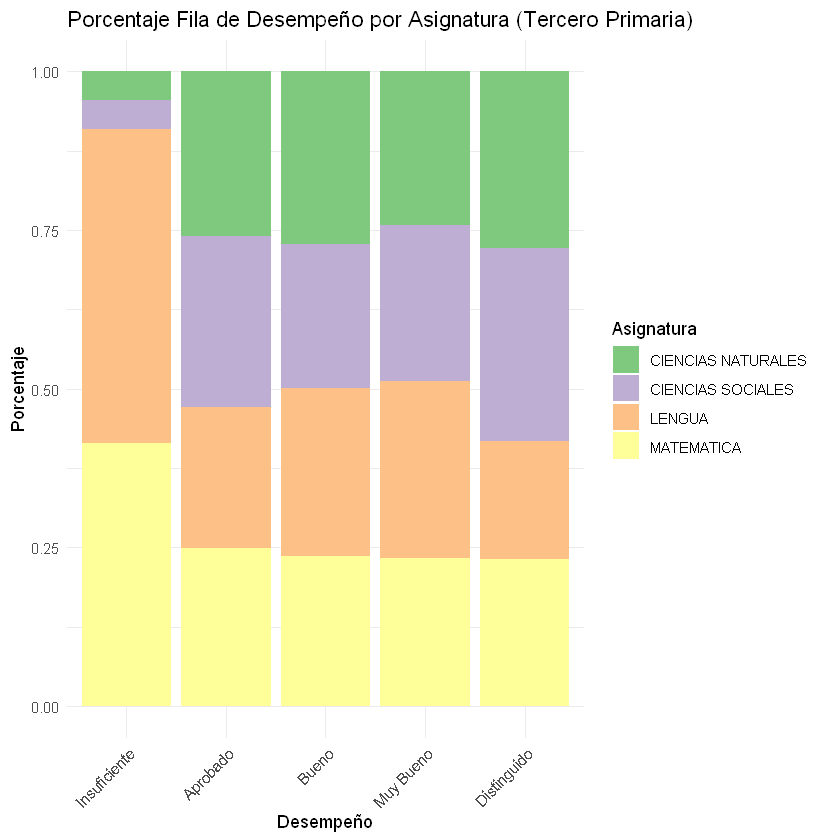

In [747]:
# Eliminar la columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_asignatura_tercero_sin_total <- tabla_porcentaje_fila_asignatura_tercero[, -ncol(tabla_porcentaje_fila_asignatura_tercero)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_asignatura_tercero_long <- as.data.frame(tabla_porcentaje_fila_asignatura_tercero_sin_total)
tabla_porcentaje_fila_asignatura_tercero_long$Desempeño <- rownames(tabla_porcentaje_fila_asignatura_tercero_sin_total)

# Asegurar que Desempeño esté ordenado correctamente
tabla_porcentaje_fila_asignatura_tercero_long$Desempeño <- factor(tabla_porcentaje_fila_asignatura_tercero_long$Desempeño,
                                                                 levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar los porcentajes fila
ggplot(tabla_porcentaje_fila_asignatura_tercero_long, aes(x = Desempeño, y = Freq, fill = Asignatura)) +
  geom_bar(stat = "identity", position = "fill") +  # Apilar las barras para cada desempeño
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Asignatura (Tercero Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


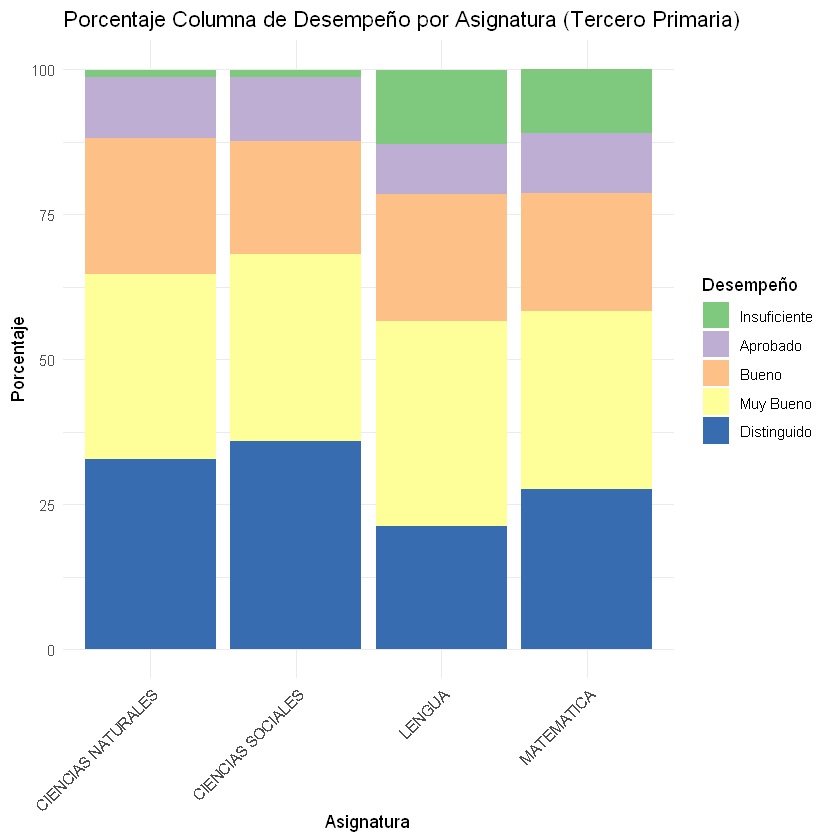

In [748]:
# Eliminar la fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_asignatura_tercero_sin_total <- tabla_porcentaje_columna_asignatura_tercero[-nrow(tabla_porcentaje_columna_asignatura_tercero), ]

# Convertir tabla de porcentajes columna sin "Total" a formato largo para ggplot
tabla_porcentaje_columna_asignatura_tercero_long <- as.data.frame(tabla_porcentaje_columna_asignatura_tercero_sin_total)
tabla_porcentaje_columna_asignatura_tercero_long$Desempeño <- rownames(tabla_porcentaje_columna_asignatura_tercero_sin_total)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_asignatura_tercero_long$Desempeño <- factor(tabla_porcentaje_columna_asignatura_tercero_long$Desempeño,
                                                                 levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar
ggplot(tabla_porcentaje_columna_asignatura_tercero_long, aes(x = Asignatura, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +  # Usamos la paleta accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Asignatura (Tercero Primaria)",
       x = "Asignatura", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


In [749]:
# Filtrar para tercer grado
terceroPrimaria_turno <- terceroPrimaria %>%
  filter(Turno %in% c('MAÑANA', 'TARDE'))

# Asegurarnos de que el orden de los niveles de 'Desempeño' sea el correcto
tabla_desemp_turno_tercero <- terceroPrimaria_turno %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Turno') %>%
  table()

# Mostrar la tabla de contingencia
tabla_desemp_turno_tercero


              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     34    91
  Aprobado         91   101
  Bueno           143   280
  Muy Bueno       169   481
  Distinguido      75   510

In [750]:
# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_turno_tercero <- prop.table(tabla_desemp_turno_tercero, margin = 1) * 100
tabla_porcentaje_fila_turno_tercero <- round(tabla_porcentaje_fila_turno_tercero, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_turno_tercero <- addmargins(tabla_porcentaje_fila_turno_tercero, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_turno_tercero)[ncol(tabla_porcentaje_fila_turno_tercero)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Turno):")
print(tabla_porcentaje_fila_turno_tercero)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_turno_tercero <- prop.table(tabla_desemp_turno_tercero, margin = 2) * 100
tabla_porcentaje_columna_turno_tercero <- round(tabla_porcentaje_columna_turno_tercero, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_turno_tercero <- addmargins(tabla_porcentaje_columna_turno_tercero, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_turno_tercero)[nrow(tabla_porcentaje_columna_turno_tercero)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Turno):")
print(tabla_porcentaje_columna_turno_tercero)


[1] "Tabla de Porcentajes por Fila (Desempeño y Turno):"
              Turno
Desempeño      MAÑANA TARDE Total
  Insuficiente   27.2  72.8 100.0
  Aprobado       47.4  52.6 100.0
  Bueno          33.8  66.2 100.0
  Muy Bueno      26.0  74.0 100.0
  Distinguido    12.8  87.2 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Turno):"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    6.6   6.2
  Aprobado       17.8   6.9
  Bueno          27.9  19.1
  Muy Bueno      33.0  32.9
  Distinguido    14.6  34.9
  Total          99.9 100.0


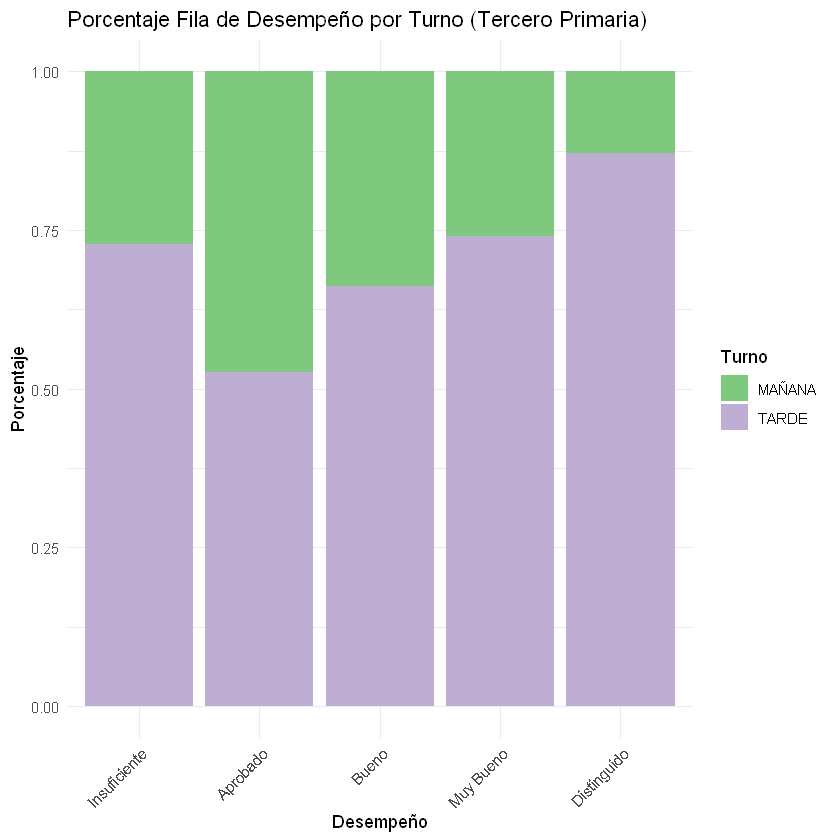

In [751]:
# Eliminar columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_turno_sin_total_tercero <- tabla_porcentaje_fila_turno_tercero[, -ncol(tabla_porcentaje_fila_turno_tercero)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_turno_long_tercero <- as.data.frame(tabla_porcentaje_fila_turno_sin_total_tercero)
tabla_porcentaje_fila_turno_long_tercero$Desempeño <- rownames(tabla_porcentaje_fila_turno_sin_total_tercero)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_turno_long_tercero$Desempeño <- factor(tabla_porcentaje_fila_turno_long_tercero$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar las barras apiladas para porcentaje fila
ggplot(tabla_porcentaje_fila_turno_long_tercero, aes(x = Desempeño, y = Freq, fill = Turno)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Turno (Tercero Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X

In [752]:
chi_desemp_turno_tercero<- chisq.test(tabla_desemp_turno_tercero)
chi_desemp_turno_tercero


	Pearson's Chi-squared test

data:  tabla_desemp_turno_tercero
X-squared = 112.19, df = 4, p-value < 2.2e-16


In [753]:
CramerV(tabla_desemp_turno_tercero)

[1] 0.2383428

In [754]:
# Frecuencias observadas
chi_desemp_turno_tercero$observed

              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     34    91
  Aprobado         91   101
  Bueno           143   280
  Muy Bueno       169   481
  Distinguido      75   510

In [755]:
# Frecuencias esperadas (redondeadas)
round(chi_desemp_turno_tercero$expected, 0)

,MAÑANA,TARDE
Insuficiente,32,93
Aprobado,50,142
Bueno,110,313
Muy Bueno,169,481
Distinguido,152,433


In [756]:

# Residuales crudos
round(chi_desemp_turno_tercero$residuals, 1)

              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    0.3  -0.2
  Aprobado        5.8  -3.5
  Bueno           3.2  -1.9
  Muy Bueno       0.0   0.0
  Distinguido    -6.2   3.7

In [757]:
# Residuales estandarizados
round(chi_desemp_turno_tercero$stdres, 1)

              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    0.3  -0.3
  Aprobado        7.1  -7.1
  Bueno           4.2  -4.2
  Muy Bueno       0.1  -0.1
  Distinguido    -8.6   8.6

In [758]:
# Cambiar el nombre de la columna 'EsPrivada' a 'Sector' y recodificar los valores 'N' y 'S' por 'Publica' y 'Privada'
tabla_desemp_sector_tercero_primaria <- terceroPrimaria %>%
  filter(!is.na(Desempeño) & !is.na(EsPrivada)) %>%  # Eliminar NA
  rename(Sector = EsPrivada) %>%  # Renombrar EsPrivada a Sector
  mutate(
    Sector = recode(Sector, 'N' = 'Publica', 'S' = 'Privada'),  # Reemplazar valores 'N' y 'S'
    Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))  # Asegurar el orden de Desempeño
  ) %>%
  select('Desempeño', 'Sector') %>%
  table()  # Generar la tabla de contingencia

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Sector para Segundo Grado:")
print(tabla_desemp_sector_tercero_primaria)


[1] "Tabla de Contingencia Desempeño y Sector para Segundo Grado:"
              Sector
Desempeño      Privada Publica
  Insuficiente       8     125
  Aprobado          38     166
  Bueno            174     253
  Muy Bueno        301     356
  Distinguido      279     311


In [759]:
# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_sector_tercero <- prop.table(tabla_desemp_sector_tercero_primaria, margin = 1) * 100
tabla_porcentaje_fila_sector_tercero <- round(tabla_porcentaje_fila_sector_tercero, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_sector_tercero <- addmargins(tabla_porcentaje_fila_sector_tercero, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_sector_tercero)[ncol(tabla_porcentaje_fila_sector_tercero)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Sector):")
print(tabla_porcentaje_fila_sector_tercero)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_sector_tercero <- prop.table(tabla_desemp_sector_tercero_primaria, margin = 2) * 100
tabla_porcentaje_columna_sector_tercero <- round(tabla_porcentaje_columna_sector_tercero, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_sector_tercero <- addmargins(tabla_porcentaje_columna_sector_tercero, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_sector_tercero)[nrow(tabla_porcentaje_columna_sector_tercero)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Sector):")
print(tabla_porcentaje_columna_sector_tercero)


[1] "Tabla de Porcentajes por Fila (Desempeño y Sector):"
              Sector
Desempeño      Privada Publica Total
  Insuficiente     6.0    94.0 100.0
  Aprobado        18.6    81.4 100.0
  Bueno           40.7    59.3 100.0
  Muy Bueno       45.8    54.2 100.0
  Distinguido     47.3    52.7 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Sector):"
              Sector
Desempeño      Privada Publica
  Insuficiente     1.0    10.3
  Aprobado         4.8    13.7
  Bueno           21.8    20.9
  Muy Bueno       37.6    29.4
  Distinguido     34.9    25.7
  Total          100.1   100.0


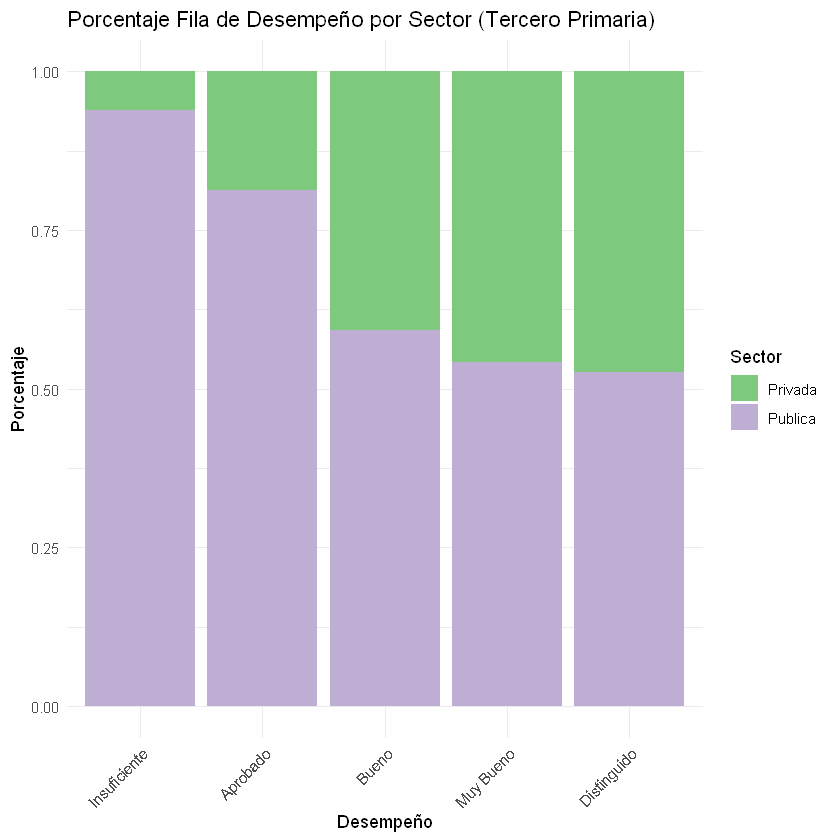

In [760]:
# Eliminar columna Total en la tabla de porcentaje fila
tabla_porcentaje_fila_sector_sin_total_tercero <- tabla_porcentaje_fila_sector_tercero[, -ncol(tabla_porcentaje_fila_sector_tercero)]  # Eliminar columna "Total"

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_sector_long_tercero <- as.data.frame(tabla_porcentaje_fila_sector_sin_total_tercero)
tabla_porcentaje_fila_sector_long_tercero$Desempeño <- rownames(tabla_porcentaje_fila_sector_sin_total_tercero)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_sector_long_tercero$Desempeño <- factor(tabla_porcentaje_fila_sector_long_tercero$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar el porcentaje fila con barras apiladas
ggplot(tabla_porcentaje_fila_sector_long_tercero, aes(x = Desempeño, y = Freq, fill = Sector)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Sector (Tercero Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X

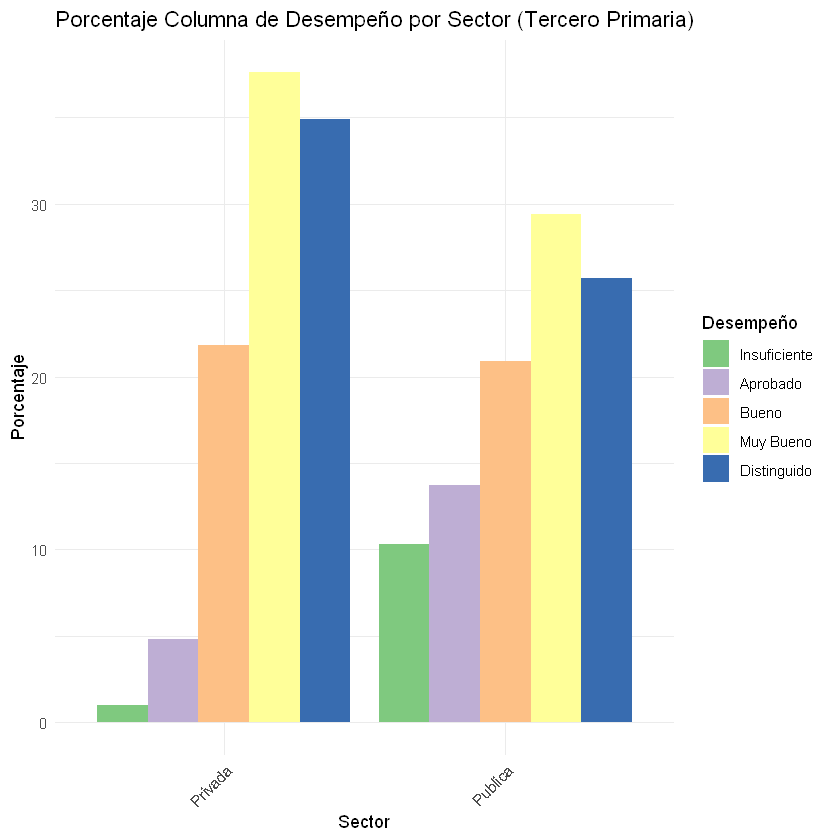

In [761]:
# Eliminar fila "Total" en la tabla de porcentaje columna
tabla_porcentaje_columna_sector_sin_total_tercero <- tabla_porcentaje_columna_sector_tercero[-nrow(tabla_porcentaje_columna_sector_tercero), ]  # Eliminar fila "Total"

# Convertir la tabla de porcentajes columna a formato largo
tabla_porcentaje_columna_sector_long_tercero <- as.data.frame(tabla_porcentaje_columna_sector_sin_total_tercero)
tabla_porcentaje_columna_sector_long_tercero$Desempeño <- rownames(tabla_porcentaje_columna_sector_sin_total_tercero)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_sector_long_tercero$Desempeño <- factor(tabla_porcentaje_columna_sector_long_tercero$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar el porcentaje columna con barras adosadas, donde el eje X es "Sector"
ggplot(tabla_porcentaje_columna_sector_long_tercero, aes(x = Sector, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Sector (Tercero Primaria)",
       x = "Sector", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X

In [762]:
# Realizar la prueba de Chi-cuadrado
chi_desemp_sector_tercero_primaria<- chisq.test(tabla_desemp_sector_tercero_primaria)
chi_desemp_sector_tercero_primaria


	Pearson's Chi-squared test

data:  tabla_desemp_sector_tercero_primaria
X-squared = 125.44, df = 4, p-value < 2.2e-16


In [763]:
CramerV(tabla_desemp_sector_tercero_primaria)

[1] 0.2497489

In [764]:
chi_desemp_sector_tercero_primaria$observed

              Sector
Desempeño      Privada Publica
  Insuficiente       8     125
  Aprobado          38     166
  Bueno            174     253
  Muy Bueno        301     356
  Distinguido      279     311

In [765]:
round(chi_desemp_sector_tercero_primaria$expected, 0)


,Privada,Publica
Insuficiente,53,80
Aprobado,81,123
Bueno,170,257
Muy Bueno,261,396
Distinguido,235,355


In [766]:
round(chi_desemp_sector_tercero_primaria$residuals, 1)


              Sector
Desempeño      Privada Publica
  Insuficiente    -6.2     5.0
  Aprobado        -4.8     3.9
  Bueno            0.3    -0.3
  Muy Bueno        2.5    -2.0
  Distinguido      2.9    -2.3

In [767]:
round(chi_desemp_sector_tercero_primaria$stdres, 1)


              Sector
Desempeño      Privada Publica
  Insuficiente    -8.2     8.2
  Aprobado        -6.5     6.5
  Bueno            0.5    -0.5
  Muy Bueno        3.9    -3.9
  Distinguido      4.4    -4.4

In [768]:
prop.test(c(sum(terceroPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
            sum(terceroPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)),
          c(nrow(terceroPrimaria), nrow(terceroPrimaria)))



	2-sample test for equality of proportions with continuity correction

data:  c(sum(terceroPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE), sum(terceroPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)) out of c(nrow(terceroPrimaria), nrow(terceroPrimaria))
X-squared = 19.943, df = 1, p-value = 7.981e-06
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.04532153 -0.01733387
sample estimates:
    prop 1     prop 2 
0.03480855 0.06613625 


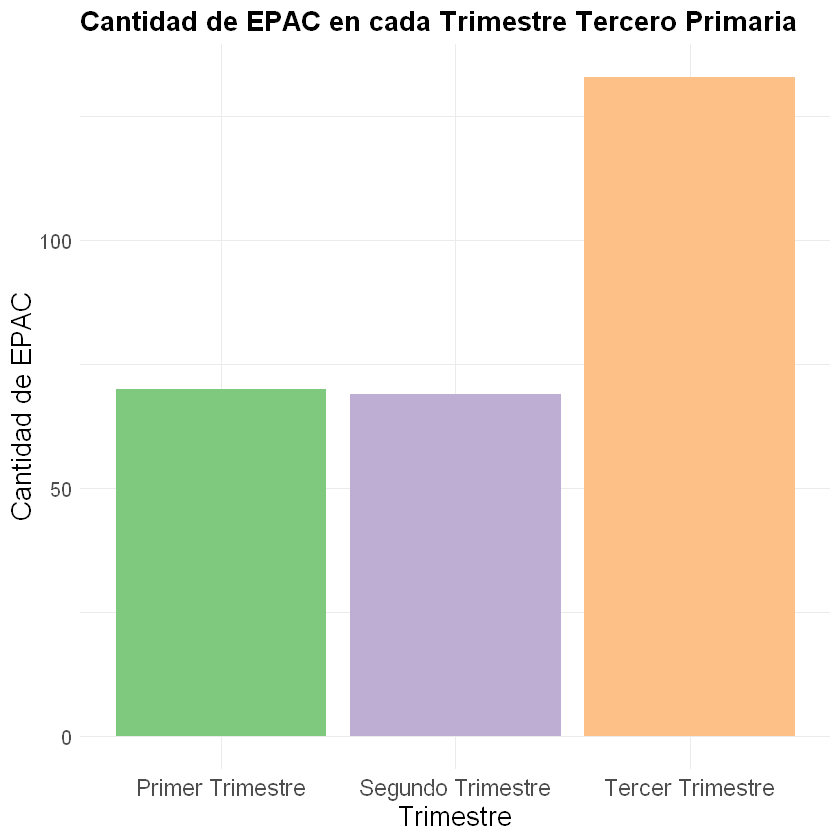

In [769]:
# Contar la cantidad de "EPAC" en cada trimestre para Tercero de Primaria
epac_counts_3 <- data.frame(
  Trimestre = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"),
  Cantidad = c(
    sum(terceroPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
    sum(terceroPrimaria$NotasSegundoTrimestre == "EPAC", na.rm = TRUE),
    sum(terceroPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)
  )
)

ggplot(epac_counts_3, aes(x = Trimestre, y = Cantidad, fill = Trimestre)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +
  labs(title = "Cantidad de EPAC en cada Trimestre Tercero Primaria",
       x = "Trimestre",
       y = "Cantidad de EPAC") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        plot.title = element_text(size = 16, face = "bold"),
        legend.position = "none")


#### Cuarto año Primaria ####

In [770]:
cuartoPrimaria <- nogoya_PRIMARIO %>%
  filter(NivelEnsenanza == "PRIMARIO",
         Curso == "CUARTO",
         Asignatura %in% c("LENGUA", "MATEMATICA", "CIENCIAS SOCIALES", "CIENCIAS NATURALES")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura


In [771]:
table(cuartoPrimaria$Condicion)


   APROBADO DESAPROBADO 
       1756         133 

In [772]:
# Crear tabla de frecuencias por materia y condición
tabla_condiciones4 <- cuartoPrimaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condiciones4

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
CIENCIAS NATURALES,459,11,97.65957,2.340426
CIENCIAS SOCIALES,456,14,97.02128,2.978723
LENGUA,429,52,89.18919,10.810811
MATEMATICA,412,56,88.03419,11.965812


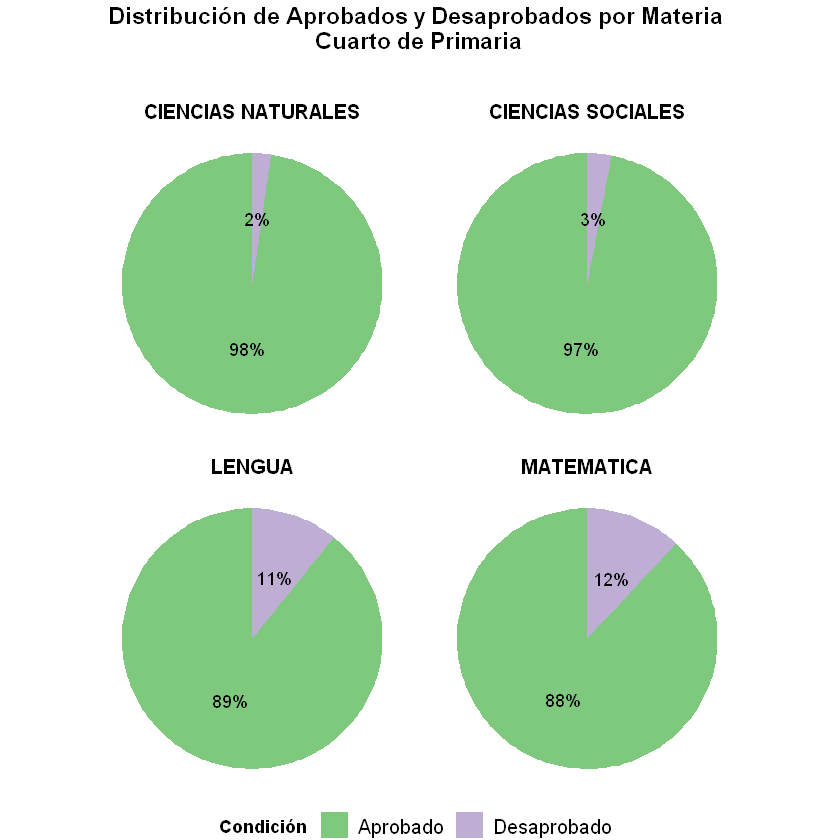

In [773]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_long4 <- tabla_condiciones4 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_long4, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Materia \n Cuarto de Primaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 12),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )


In [774]:
cuartoPrimariaAprobado  <- cuartoPrimaria %>% filter(Promedio != "Desaprobado")

# Convertir a numérico
cuartoPrimariaAprobado$Promedio <- as.numeric(cuartoPrimariaAprobado$Promedio)

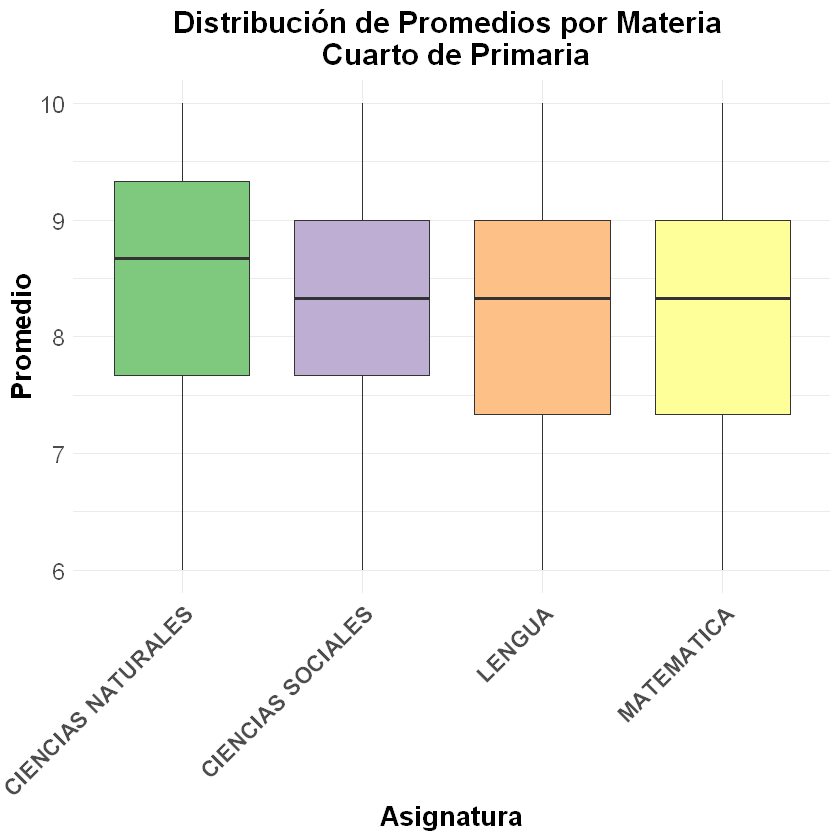

In [775]:

ggplot(cuartoPrimariaAprobado, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Cuarto de Primaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )

In [776]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignatura4 <- cuartoPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )

# Mostrar las estadísticas calculadas
print(estadisticas_por_asignatura4)

# A tibble: 4 x 4
  Asignatura         Media Mediana  Moda
  <chr>              <dbl>   <dbl> <dbl>
1 CIENCIAS NATURALES  8.30    8.67  9   
2 CIENCIAS SOCIALES   8.29    8.33  9   
3 LENGUA              8.06    8.33  9   
4 MATEMATICA          8.17    8.33  8.33


In [777]:
summary_por_asignatura4 <- cuartoPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignatura4)

# A tibble: 4 x 7
  Asignatura           Min    Q1 Mediana Media    Q3   Max
  <chr>              <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 CIENCIAS NATURALES     6  7.67    8.67  8.30  9.33    10
2 CIENCIAS SOCIALES      6  7.67    8.33  8.29  9       10
3 LENGUA                 6  7.33    8.33  8.06  9       10
4 MATEMATICA             6  7.33    8.33  8.17  9       10


In [778]:
# Función para aplicar KS test por materia
realizar_ks_test <- function(data) {
  resultado <- data %>%
    group_by(Asignatura) %>%
    summarise(
      KS_p_value = ks.test(Promedio, "pnorm", mean(Promedio), sd(Promedio))$p.value
    )
  
  print(" **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**")
  print("H₀: Las notas siguen una distribución normal")
  print("H₁: Las notas NO siguen una distribución normal")
  
  return(resultado)
}

# Aplicar la función a los aprobados
ks_resultados <- realizar_ks_test(cuartoPrimariaAprobado)

# Mostrar los resultados
print(ks_resultados)


[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 4 x 2
  Asignatura          KS_p_value
  <chr>                    <dbl>
1 CIENCIAS NATURALES 0.000000352
2 CIENCIAS SOCIALES  0.000000205
3 LENGUA             0.0000191  
4 MATEMATICA         0.000314   


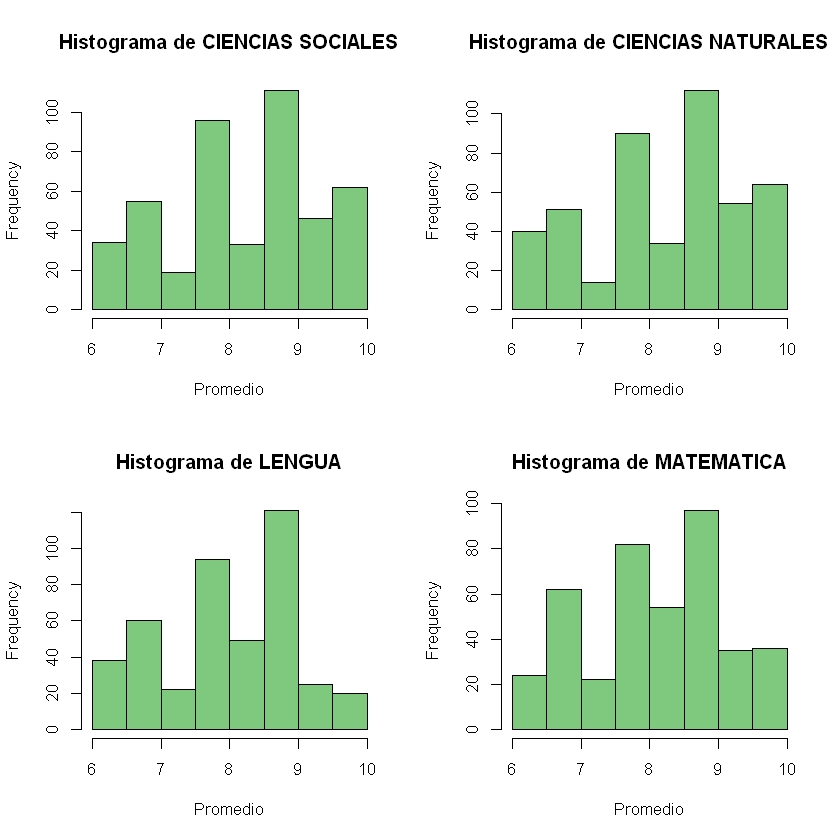

In [779]:
asignaturas <- unique(cuartoPrimariaAprobado$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(cuartoPrimariaAprobado, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma de", materia),
       xlab = "Promedio", col = "#7fc97f", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos

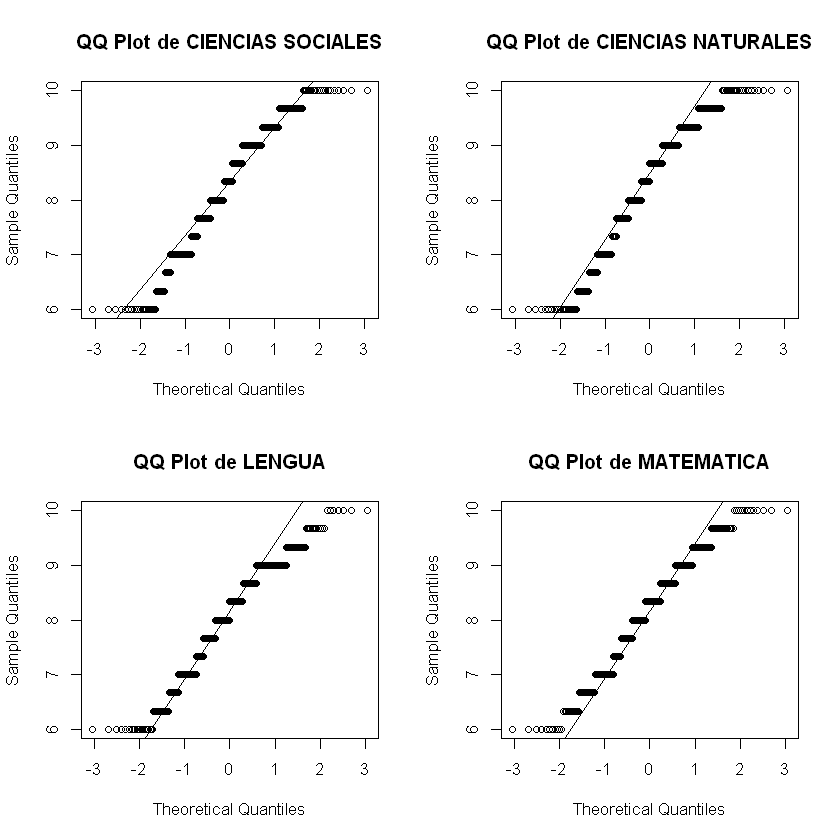

In [780]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(cuartoPrimariaAprobado, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original

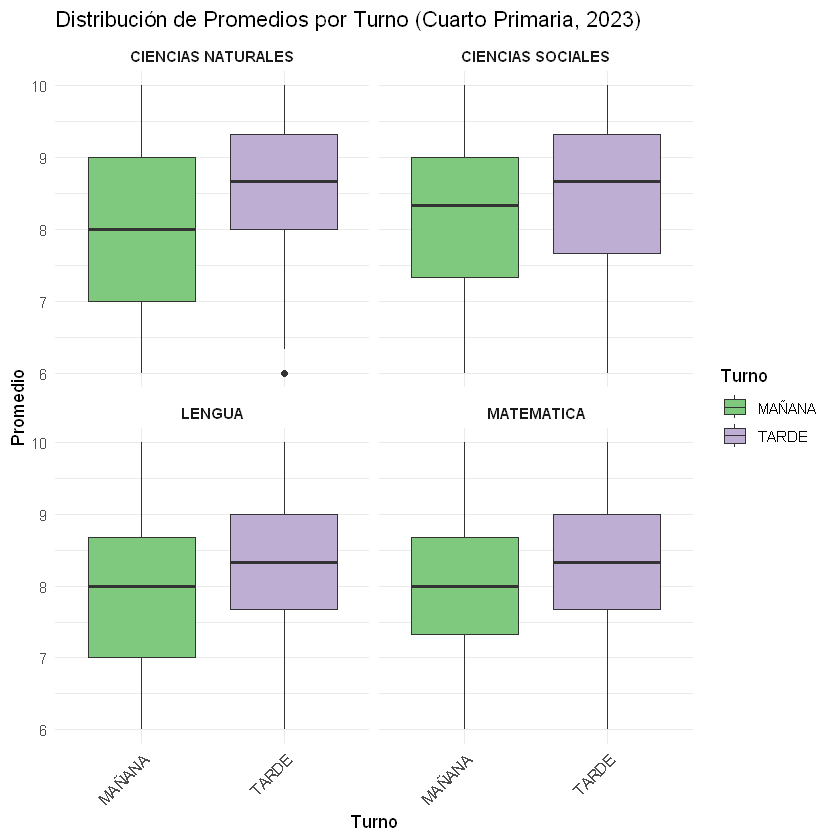

In [781]:
# Filtrar solo los turnos "Mañana" y "Tarde" de tu dataframe
cuartoPrimariaAprobado_filtrado <- cuartoPrimariaAprobado %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

# Crear el boxplot comparando promedios por turno para cada asignatura con la paleta Accent
ggplot(cuartoPrimariaAprobado_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Dividir los boxplots por asignatura
  labs(
    title = "Distribución de Promedios por Turno (Cuarto Primaria, 2023)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  # Cambiar el estilo del gráfico
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Mejorar la lectura del eje x
    strip.text = element_text(face = "bold")  # Resaltar los títulos por materia
  )


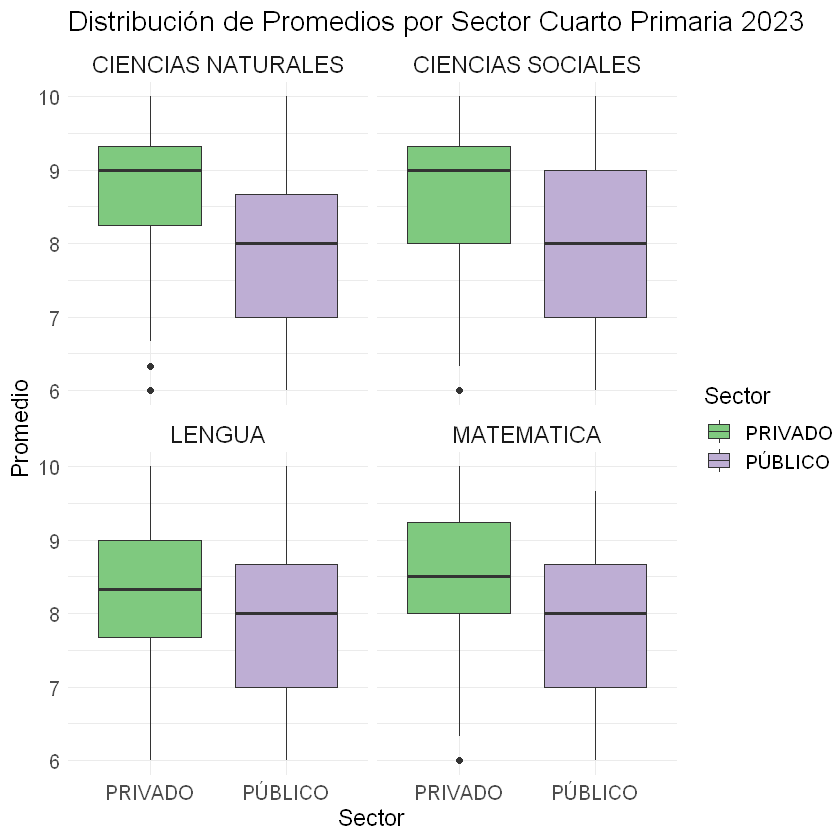

In [782]:
ggplot(cuartoPrimariaAprobado, aes(x = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"), y = Promedio, fill = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"))) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Agrupar por asignatura
  scale_fill_brewer(palette = "Accent") +  # Usar paleta de colores "Accent"
  labs(title = "Distribución de Promedios por Sector Cuarto Primaria 2023",
       x = "Sector",
       y = "Promedio",
       fill = "Sector") +  # Ajuste de la leyenda
  theme_minimal() +
  theme(
    legend.position = "right",  # Leyenda a la derecha
    text = element_text(size = 14),  # Aumentar el tamaño de la fuente en todo el gráfico
    strip.text = element_text(size = 14),  # Aumentar el tamaño de las etiquetas de las asignaturas
    axis.title = element_text(size = 14),  # Aumentar el tamaño de los títulos de los ejes
    axis.text = element_text(size = 12)  # Aumentar el tamaño del texto de los ejes
  )

In [783]:
# Tabla de contingencia Desempeño y Asignatura
tabla_desemp_asignatura_cuarto_primaria <- cuartoPrimaria %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Asignatura') %>%
  table()

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Asignatura (Cuarto Primaria):")
print(tabla_desemp_asignatura_cuarto_primaria)


[1] "Tabla de Contingencia Desempeño y Asignatura (Cuarto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                 11                14     52         56
  Aprobado                     56                42     55         46
  Bueno                        89               109    106         99
  Muy Bueno                   135               128    149        150
  Distinguido                 179               177    119        117


In [784]:
print("Prueba de Chi-cuadrado:")

chi_desemp_asignatura_cuarto_primaria<- chisq.test(tabla_desemp_asignatura_cuarto_primaria)
chi_desemp_asignatura_cuarto_primaria
                  

print("Prueba de Cramer: ")
CramerV(tabla_desemp_asignatura_cuarto_primaria)

[1] "Prueba de Chi-cuadrado:"



	Pearson's Chi-squared test

data:  tabla_desemp_asignatura_cuarto_primaria
X-squared = 84.065, df = 12, p-value = 6.882e-13


[1] "Prueba de Cramer: "


[1] 0.1217958

In [785]:
# Mostrar tabla de contingencia observada
print("Tabla Observada:")
print(chi_desemp_asignatura_cuarto_primaria$observed)

# Mostrar tabla de valores esperados (redondeados)
print("Tabla Esperada (redondeada):")
print(round(chi_desemp_asignatura_cuarto_primaria$expected, 0))

# Mostrar residuos
print("Residuos:")
print(round(chi_desemp_asignatura_cuarto_primaria$residuals, 1))

# Mostrar residuos estandarizados
print("Residuos Estandarizados:")
print(round(chi_desemp_asignatura_cuarto_primaria$stdres, 1))


[1] "Tabla Observada:"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                 11                14     52         56
  Aprobado                     56                42     55         46
  Bueno                        89               109    106         99
  Muy Bueno                   135               128    149        150
  Distinguido                 179               177    119        117
[1] "Tabla Esperada (redondeada):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                 33                33     34         33
  Aprobado                     50                50     51         49
  Bueno                       100               100    103        100
  Muy Bueno                   140               140    143        139
  Distinguido                 147               147    151        147
[1] "Residuos:"
              Asignatura
Desempeño  

In [786]:
# Tabla de porcentaje total (porcentaje dentro de la tabla completa)
tabla_porcentaje_total_asignatura_cuarto <- prop.table(tabla_desemp_asignatura_cuarto_primaria) * 100
tabla_porcentaje_total_asignatura_cuarto <- round(tabla_porcentaje_total_asignatura_cuarto, 1)  # Redondear a 1 decimal

# Agregar fila y columna de totales
tabla_porcentaje_total_asignatura_cuarto <- addmargins(tabla_porcentaje_total_asignatura_cuarto, margin = c(1, 2), FUN = sum)

# Renombrar la última fila y columna como "Total"
colnames(tabla_porcentaje_total_asignatura_cuarto)[ncol(tabla_porcentaje_total_asignatura_cuarto)] <- "Total"
rownames(tabla_porcentaje_total_asignatura_cuarto)[nrow(tabla_porcentaje_total_asignatura_cuarto)] <- "Total"

print("Tabla de Porcentajes Total (Desempeño y Asignatura) (Cuarto Primaria):")
print(tabla_porcentaje_total_asignatura_cuarto)


Margins computed over dimensions
in the following order:
1: Desempeño
2: Asignatura
[1] "Tabla de Porcentajes Total (Desempeño y Asignatura) (Cuarto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA Total
  Insuficiente                0.6               0.7    2.8        3.0   7.1
  Aprobado                    3.0               2.2    2.9        2.4  10.5
  Bueno                       4.7               5.8    5.6        5.2  21.3
  Muy Bueno                   7.1               6.8    7.9        7.9  29.7
  Distinguido                 9.5               9.4    6.3        6.2  31.4
  Total                      24.9              24.9   25.5       24.7 100.0


In [787]:
# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_asignatura_cuarto <- prop.table(tabla_desemp_asignatura_cuarto_primaria, margin = 1) * 100
tabla_porcentaje_fila_asignatura_cuarto <- round(tabla_porcentaje_fila_asignatura_cuarto, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_asignatura_cuarto <- addmargins(tabla_porcentaje_fila_asignatura_cuarto, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_asignatura_cuarto)[ncol(tabla_porcentaje_fila_asignatura_cuarto)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Asignatura) (Cuarto Primaria):")
print(tabla_porcentaje_fila_asignatura_cuarto)


[1] "Tabla de Porcentajes por Fila (Desempeño y Asignatura) (Cuarto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA Total
  Insuficiente                8.3              10.5   39.1       42.1 100.0
  Aprobado                   28.1              21.1   27.6       23.1  99.9
  Bueno                      22.1              27.0   26.3       24.6 100.0
  Muy Bueno                  24.0              22.8   26.5       26.7 100.0
  Distinguido                30.2              29.9   20.1       19.8 100.0


In [788]:
# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_asignatura_cuarto <- prop.table(tabla_desemp_asignatura_cuarto_primaria, margin = 2) * 100
tabla_porcentaje_columna_asignatura_cuarto <- round(tabla_porcentaje_columna_asignatura_cuarto, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_asignatura_cuarto <- addmargins(tabla_porcentaje_columna_asignatura_cuarto, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_asignatura_cuarto)[nrow(tabla_porcentaje_columna_asignatura_cuarto)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Asignatura) (Cuarto Primaria):")
print(tabla_porcentaje_columna_asignatura_cuarto)


[1] "Tabla de Porcentajes por Columna (Desempeño y Asignatura) (Cuarto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                2.3               3.0   10.8       12.0
  Aprobado                   11.9               8.9   11.4        9.8
  Bueno                      18.9              23.2   22.0       21.2
  Muy Bueno                  28.7              27.2   31.0       32.1
  Distinguido                38.1              37.7   24.7       25.0
  Total                      99.9             100.0   99.9      100.1


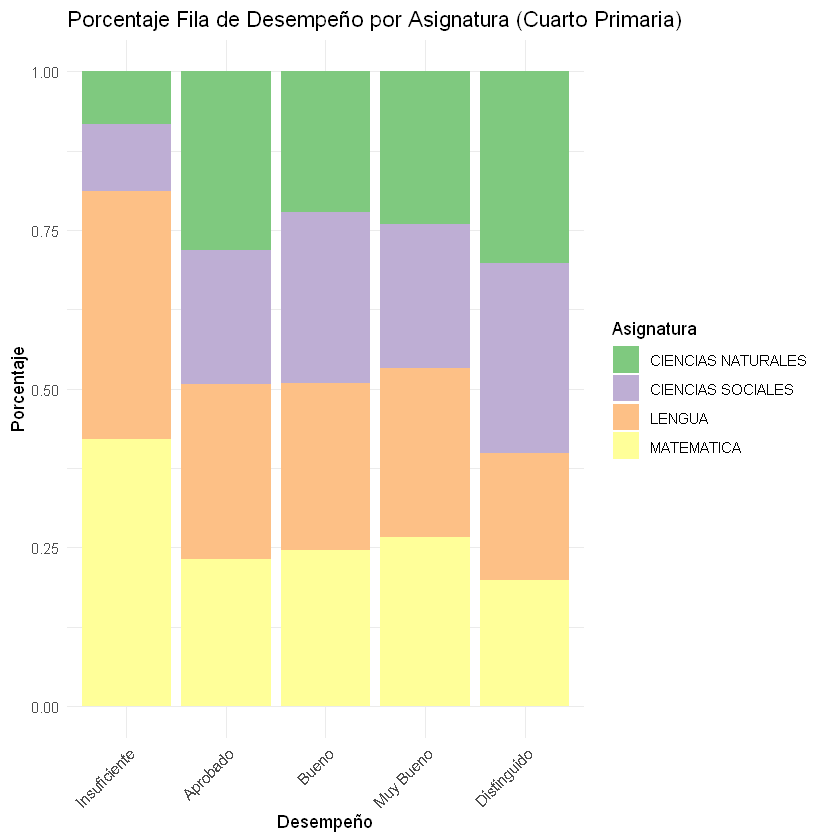

In [789]:
# Eliminar la columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_asignatura_cuarto_sin_total <- tabla_porcentaje_fila_asignatura_cuarto[, -ncol(tabla_porcentaje_fila_asignatura_cuarto)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_asignatura_cuarto_long <- as.data.frame(tabla_porcentaje_fila_asignatura_cuarto_sin_total)
tabla_porcentaje_fila_asignatura_cuarto_long$Desempeño <- rownames(tabla_porcentaje_fila_asignatura_cuarto_sin_total)

# Asegurar que Desempeño esté ordenado correctamente
tabla_porcentaje_fila_asignatura_cuarto_long$Desempeño <- factor(tabla_porcentaje_fila_asignatura_cuarto_long$Desempeño,
                                                                 levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar los porcentajes fila
ggplot(tabla_porcentaje_fila_asignatura_cuarto_long, aes(x = Desempeño, y = Freq, fill = Asignatura)) +
  geom_bar(stat = "identity", position = "fill") +  # Apilar las barras para cada desempeño
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Asignatura (Cuarto Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


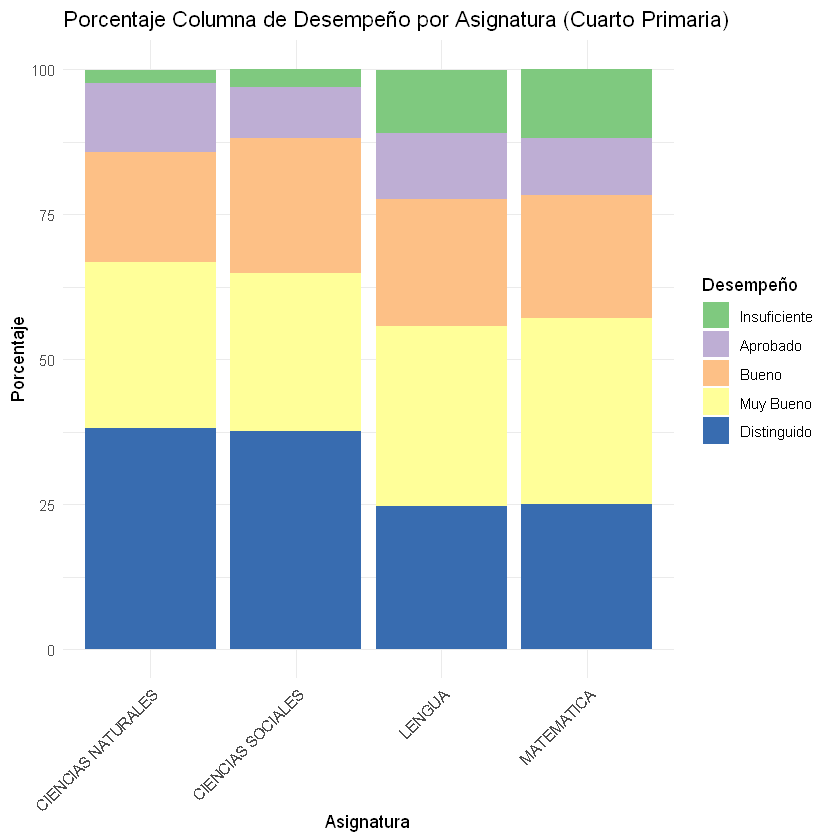

In [790]:
# Eliminar la fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_asignatura_cuarto_sin_total <- tabla_porcentaje_columna_asignatura_cuarto[-nrow(tabla_porcentaje_columna_asignatura_cuarto), ]

# Convertir tabla de porcentajes columna sin "Total" a formato largo para ggplot
tabla_porcentaje_columna_asignatura_cuarto_long <- as.data.frame(tabla_porcentaje_columna_asignatura_cuarto_sin_total)
tabla_porcentaje_columna_asignatura_cuarto_long$Desempeño <- rownames(tabla_porcentaje_columna_asignatura_cuarto_sin_total)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_asignatura_cuarto_long$Desempeño <- factor(tabla_porcentaje_columna_asignatura_cuarto_long$Desempeño,
                                                                 levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar
ggplot(tabla_porcentaje_columna_asignatura_cuarto_long, aes(x = Asignatura, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +  # Usamos la paleta accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Asignatura (Cuarto Primaria)",
       x = "Asignatura", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


In [791]:
# Filtrar para tercer grado
cuartoPrimaria_turno <- cuartoPrimaria %>%
  filter(Turno %in% c('MAÑANA', 'TARDE'))

# Asegurarnos de que el orden de los niveles de 'Desempeño' sea el correcto
tabla_desemp_turno_cuarto <- cuartoPrimaria_turno %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Turno') %>%
  table()

# Mostrar la tabla de contingencia
tabla_desemp_turno_cuarto

              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     91    42
  Aprobado        116    75
  Bueno           227   170
  Muy Bueno       262   284
  Distinguido     209   377

In [792]:
# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_turno_cuarto <- prop.table(tabla_desemp_turno_cuarto, margin = 1) * 100
tabla_porcentaje_fila_turno_cuarto <- round(tabla_porcentaje_fila_turno_cuarto, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_turno_cuarto <- addmargins(tabla_porcentaje_fila_turno_cuarto, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_turno_cuarto)[ncol(tabla_porcentaje_fila_turno_cuarto)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Turno):")
print(tabla_porcentaje_fila_turno_cuarto)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_turno_cuarto <- prop.table(tabla_desemp_turno_cuarto, margin = 2) * 100
tabla_porcentaje_columna_turno_cuarto <- round(tabla_porcentaje_columna_turno_cuarto, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_turno_cuarto <- addmargins(tabla_porcentaje_columna_turno_cuarto, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_turno_cuarto)[nrow(tabla_porcentaje_columna_turno_cuarto)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Turno):")
print(tabla_porcentaje_columna_turno_cuarto)

[1] "Tabla de Porcentajes por Fila (Desempeño y Turno):"
              Turno
Desempeño      MAÑANA TARDE Total
  Insuficiente   68.4  31.6 100.0
  Aprobado       60.7  39.3 100.0
  Bueno          57.2  42.8 100.0
  Muy Bueno      48.0  52.0 100.0
  Distinguido    35.7  64.3 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Turno):"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente   10.1   4.4
  Aprobado       12.8   7.9
  Bueno          25.1  17.9
  Muy Bueno      29.0  30.0
  Distinguido    23.1  39.8
  Total         100.1 100.0


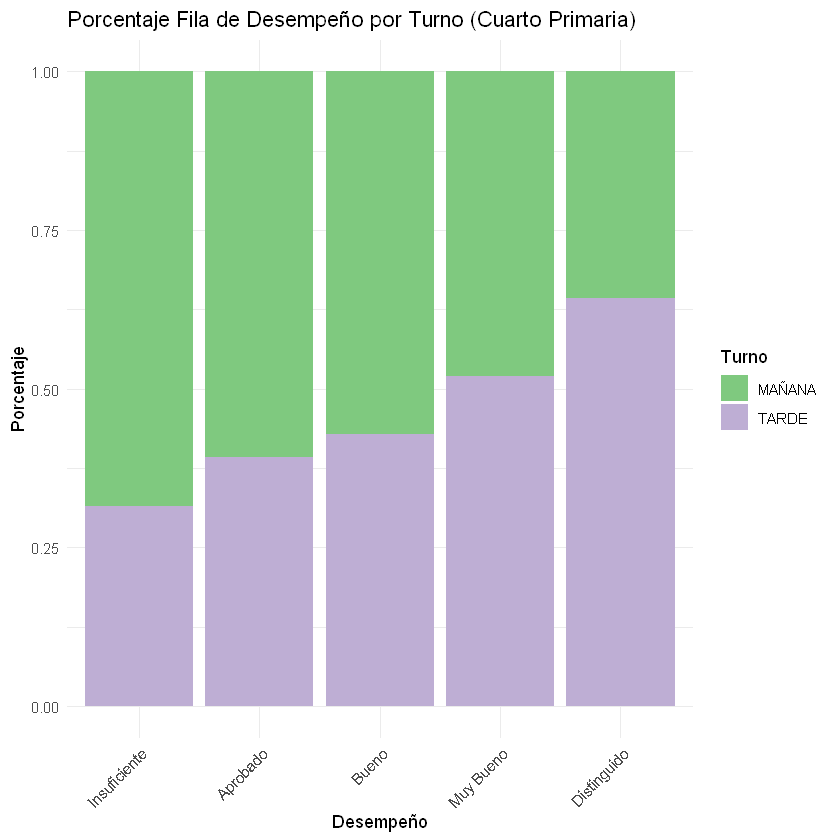

In [793]:
# Eliminar columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_turno_sin_total_cuarto <- tabla_porcentaje_fila_turno_cuarto[, -ncol(tabla_porcentaje_fila_turno_cuarto)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_turno_long_cuarto <- as.data.frame(tabla_porcentaje_fila_turno_sin_total_cuarto)
tabla_porcentaje_fila_turno_long_cuarto$Desempeño <- rownames(tabla_porcentaje_fila_turno_sin_total_cuarto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_turno_long_cuarto$Desempeño <- factor(tabla_porcentaje_fila_turno_long_cuarto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar las barras apiladas para porcentaje fila
ggplot(tabla_porcentaje_fila_turno_long_cuarto, aes(x = Desempeño, y = Freq, fill = Turno)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Turno (Cuarto Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X

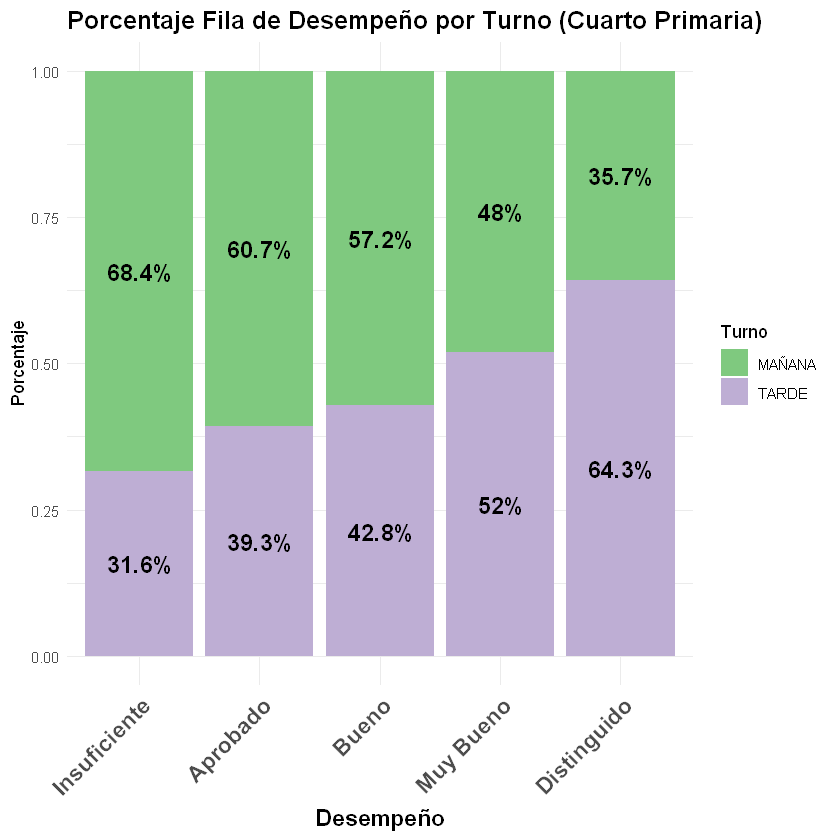

In [794]:
ggplot(tabla_porcentaje_fila_turno_long_cuarto, aes(x = Desempeño, y = Freq, fill = Turno)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  geom_text(aes(label = paste0(Freq, "%")),  # Agregar los valores como texto
            position = position_fill(vjust = 0.5), size = 5, fontface = "bold") +  # Centrados en cada barra
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Turno (Cuarto Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(
    plot.title = element_text(size = 15, face = "bold"),  # Título más grande y en negrita
    axis.text.x = element_text(size = 14, face = "bold", angle = 45, hjust = 1),  # Eje X más grande y en negrita
    axis.title.x = element_text(size = 14, face = "bold")  # Etiqueta del eje X en negrita
  )


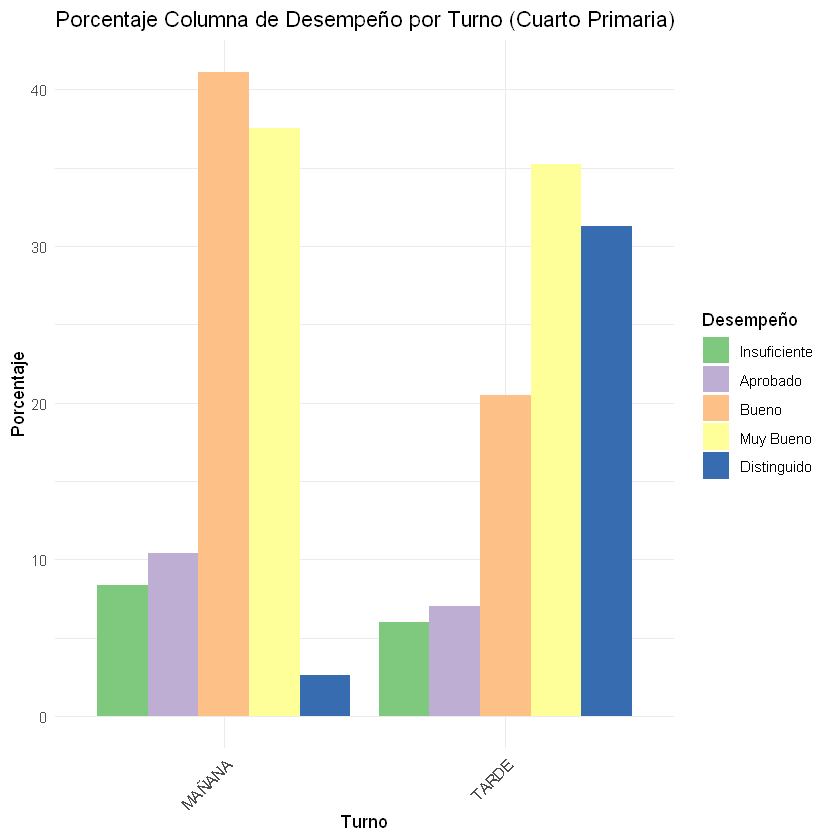

In [795]:
# Eliminar fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_turno_sin_total_cuarto <- tabla_porcentaje_columna_turno[-nrow(tabla_porcentaje_columna_turno_cuarto), ]

# Convertir la tabla de porcentajes columna a formato largo
tabla_porcentaje_columna_turno_long_cuarto <- as.data.frame(tabla_porcentaje_columna_turno_sin_total_cuarto)
tabla_porcentaje_columna_turno_long_cuarto$Desempeño <- rownames(tabla_porcentaje_columna_turno_sin_total_cuarto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_turno_long_cuarto$Desempeño <- factor(tabla_porcentaje_columna_turno_long_cuarto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar las barras adosadas para porcentaje columna
ggplot(tabla_porcentaje_columna_turno_long_cuarto, aes(x = Turno, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Turno (Cuarto Primaria)",
       x = "Turno", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X

In [796]:
print("Prueba de Chi-cuadrado:")

chi_desemp_turno_cuarto_primaria<- chisq.test(tabla_desemp_turno_cuarto)
chi_desemp_turno_cuarto_primaria
                  

print("Prueba de Cramer: ")
CramerV(tabla_desemp_turno_cuarto)

[1] "Prueba de Chi-cuadrado:"



	Pearson's Chi-squared test

data:  tabla_desemp_turno_cuarto
X-squared = 83.135, df = 4, p-value < 2.2e-16


[1] "Prueba de Cramer: "


[1] 0.2118135

In [797]:
# Mostrar tabla de contingencia observada
print("Tabla Observada:")
print(chi_desemp_turno_cuarto_primaria$observed)

# Mostrar tabla de valores esperados (redondeados)
print("Tabla Esperada (redondeada):")
print(round(chi_desemp_turno_cuarto_primaria$expected, 0))

# Mostrar residuos
print("Residuos:")
print(round(chi_desemp_turno_cuarto_primaria$residuals, 1))

# Mostrar residuos estandarizados
print("Residuos Estandarizados:")
print(round(chi_desemp_turno_cuarto_primaria$stdres, 1))


[1] "Tabla Observada:"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     91    42
  Aprobado        116    75
  Bueno           227   170
  Muy Bueno       262   284
  Distinguido     209   377
[1] "Tabla Esperada (redondeada):"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     65    68
  Aprobado         93    98
  Bueno           194   203
  Muy Bueno       267   279
  Distinguido     286   300
[1] "Residuos:"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    3.2  -3.2
  Aprobado        2.4  -2.3
  Bueno           2.4  -2.3
  Muy Bueno      -0.3   0.3
  Distinguido    -4.6   4.5
[1] "Residuos Estandarizados:"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    4.7  -4.7
  Aprobado        3.5  -3.5
  Bueno           3.7  -3.7
  Muy Bueno      -0.5   0.5
  Distinguido    -7.7   7.7


In [798]:
# Cambiar el nombre de la columna 'EsPrivada' a 'Sector' y recodificar los valores 'N' y 'S' por 'Publica' y 'Privada'
tabla_desemp_sector_cuarto_primaria <- cuartoPrimaria %>%
  filter(!is.na(Desempeño) & !is.na(EsPrivada)) %>%  # Eliminar NA
  rename(Sector = EsPrivada) %>%  # Renombrar EsPrivada a Sector
  mutate(
    Sector = recode(Sector, 'N' = 'Publica', 'S' = 'Privada'),  # Reemplazar valores 'N' y 'S'
    Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))  # Asegurar el orden de Desempeño
  ) %>%
  select('Desempeño', 'Sector') %>%
  table()  # Generar la tabla de contingencia

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Sector para Cuarto Grado:")
print(tabla_desemp_sector_cuarto_primaria)

[1] "Tabla de Contingencia Desempeño y Sector para Cuarto Grado:"
              Sector
Desempeño      Privada Publica
  Insuficiente      13     120
  Aprobado          46     153
  Bueno            135     268
  Muy Bueno        286     276
  Distinguido      402     190


In [799]:
# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_sector_cuarto <- prop.table(tabla_desemp_sector_cuarto_primaria, margin = 1) * 100
tabla_porcentaje_fila_sector_cuarto <- round(tabla_porcentaje_fila_sector_cuarto, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_sector_cuarto <- addmargins(tabla_porcentaje_fila_sector_cuarto, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_sector_cuarto)[ncol(tabla_porcentaje_fila_sector_cuarto)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Sector):")
print(tabla_porcentaje_fila_sector_cuarto)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_sector_cuarto <- prop.table(tabla_desemp_sector_cuarto_primaria, margin = 2) * 100
tabla_porcentaje_columna_sector_cuarto <- round(tabla_porcentaje_columna_sector_cuarto, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_sector_cuarto <- addmargins(tabla_porcentaje_columna_sector_cuarto, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_sector_cuarto)[nrow(tabla_porcentaje_columna_sector_cuarto)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Sector):")
print(tabla_porcentaje_columna_sector_cuarto)


[1] "Tabla de Porcentajes por Fila (Desempeño y Sector):"
              Sector
Desempeño      Privada Publica Total
  Insuficiente     9.8    90.2 100.0
  Aprobado        23.1    76.9 100.0
  Bueno           33.5    66.5 100.0
  Muy Bueno       50.9    49.1 100.0
  Distinguido     67.9    32.1 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Sector):"
              Sector
Desempeño      Privada Publica
  Insuficiente     1.5    11.9
  Aprobado         5.2    15.2
  Bueno           15.3    26.6
  Muy Bueno       32.4    27.4
  Distinguido     45.6    18.9
  Total          100.0   100.0


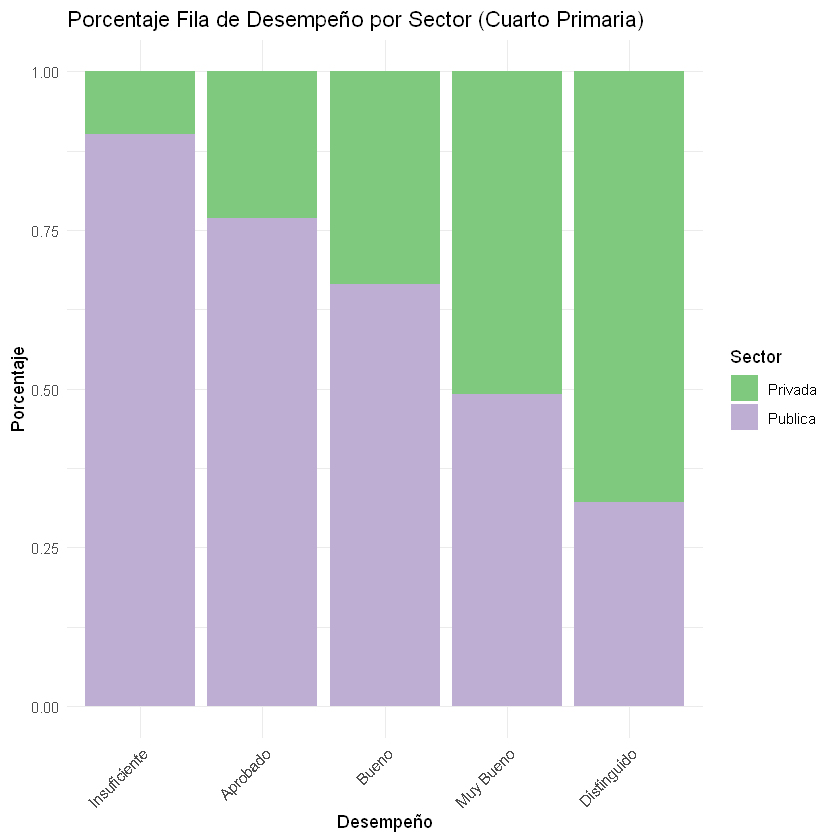

In [800]:
# Eliminar columna Total en la tabla de porcentaje fila
tabla_porcentaje_fila_sector_sin_total_cuarto <- tabla_porcentaje_fila_sector_cuarto[, -ncol(tabla_porcentaje_fila_sector_cuarto)]  # Eliminar columna "Total"

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_sector_long_cuarto <- as.data.frame(tabla_porcentaje_fila_sector_sin_total_cuarto)
tabla_porcentaje_fila_sector_long_cuarto$Desempeño <- rownames(tabla_porcentaje_fila_sector_sin_total_cuarto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_sector_long_cuarto$Desempeño <- factor(tabla_porcentaje_fila_sector_long_cuarto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar el porcentaje fila con barras apiladas
ggplot(tabla_porcentaje_fila_sector_long_cuarto, aes(x = Desempeño, y = Freq, fill = Sector)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Sector (Cuarto Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X


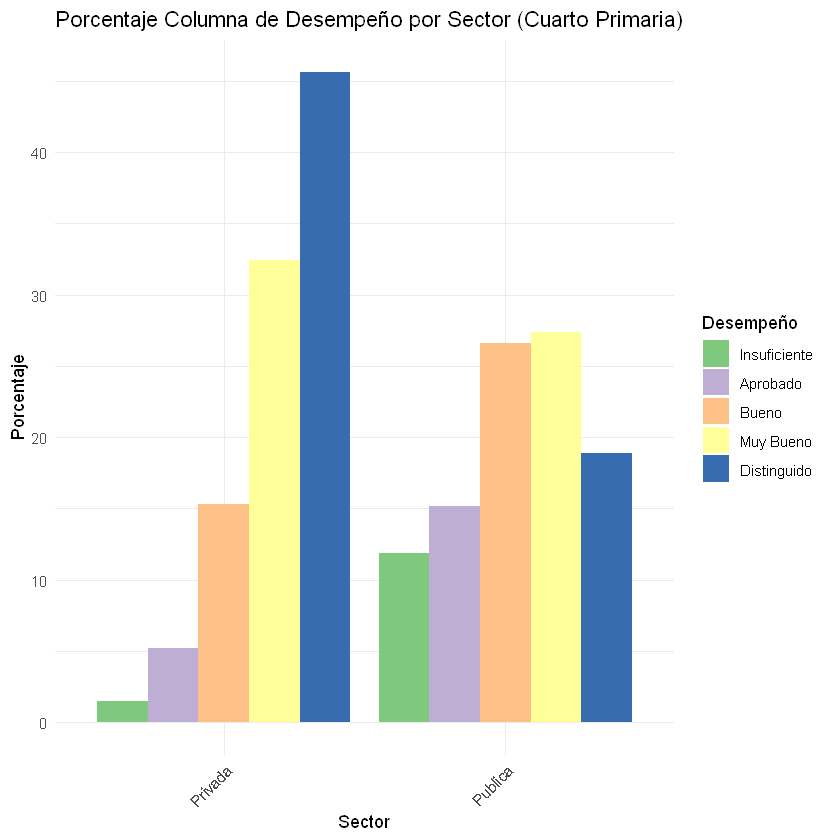

In [801]:
# Eliminar fila "Total" en la tabla de porcentaje columna
tabla_porcentaje_columna_sector_sin_total_cuarto <- tabla_porcentaje_columna_sector_cuarto[-nrow(tabla_porcentaje_columna_sector_cuarto), ]  # Eliminar fila "Total"

# Convertir la tabla de porcentajes columna a formato largo
tabla_porcentaje_columna_sector_long_cuarto <- as.data.frame(tabla_porcentaje_columna_sector_sin_total_cuarto)
tabla_porcentaje_columna_sector_long_cuarto$Desempeño <- rownames(tabla_porcentaje_columna_sector_sin_total_cuarto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_sector_long_cuarto$Desempeño <- factor(tabla_porcentaje_columna_sector_long_cuarto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar el porcentaje columna con barras adosadas, donde el eje X es "Sector"
ggplot(tabla_porcentaje_columna_sector_long_cuarto, aes(x = Sector, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Sector (Cuarto Primaria)",
       x = "Sector", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X

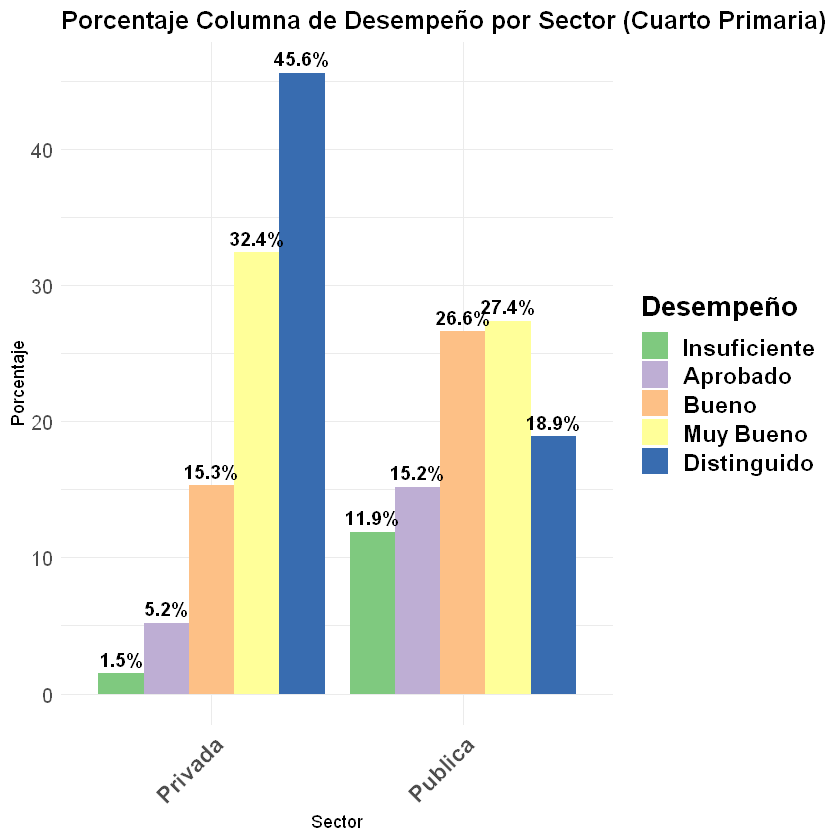

In [802]:
# Graficar el porcentaje columna con barras adosadas, donde el eje X es "Sector"
ggplot(tabla_porcentaje_columna_sector_long_cuarto, aes(x = Sector, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  geom_text(aes(label = sprintf("%.1f%%", Freq )),  # Multiplicamos por 100 para mostrar bien el porcentaje
            position = position_dodge(width = 0.9), vjust = -0.5, size = 4, fontface = "bold") +  # Ajustamos tamaño y negrita
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Sector (Cuarto Primaria)",
       x = "Sector", y = "Porcentaje", fill = "Desempeño") +  # Asegurar título de la leyenda
  theme(
    plot.title = element_text(size = 15, face = "bold"),  # Aumentar tamaño y poner en negrita el título
    axis.text.x = element_text(size = 14, face = "bold", angle = 45, hjust = 1),  # Aumentar tamaño de las etiquetas del eje X
    axis.text.y = element_text(size = 12),  # Aumentar tamaño de las etiquetas del eje Y
    legend.text = element_text(size = 14, face = "bold"),  # Aumentar tamaño y negrita en la leyenda
    legend.title = element_text(size = 16, face = "bold")  # Aumentar tamaño y negrita en el título de la leyenda
  )



In [803]:
print("Prueba de Chi-cuadrado:")

chi_desemp_sector_cuarto_primaria<- chisq.test(tabla_desemp_sector_cuarto_primaria)
chi_desemp_sector_cuarto_primaria
                  

print("Prueba de Cramer: ")
CramerV(tabla_desemp_sector_cuarto_primaria)

[1] "Prueba de Chi-cuadrado:"



	Pearson's Chi-squared test

data:  tabla_desemp_sector_cuarto_primaria
X-squared = 256.46, df = 4, p-value < 2.2e-16


[1] "Prueba de Cramer: "


[1] 0.3684608

In [804]:
# Mostrar tabla de contingencia observada
print("Tabla Observada:")
print(chi_desemp_sector_cuarto_primaria$observed)

# Mostrar tabla de valores esperados (redondeados)
print("Tabla Esperada (redondeada):")
print(round(chi_desemp_sector_cuarto_primaria$expected, 0))

# Mostrar residuos
print("Residuos:")
print(round(chi_desemp_sector_cuarto_primaria$residuals, 1))

# Mostrar residuos estandarizados
print("Residuos Estandarizados:")
print(round(chi_desemp_sector_cuarto_primaria$stdres, 1))


[1] "Tabla Observada:"
              Sector
Desempeño      Privada Publica
  Insuficiente      13     120
  Aprobado          46     153
  Bueno            135     268
  Muy Bueno        286     276
  Distinguido      402     190
[1] "Tabla Esperada (redondeada):"
              Sector
Desempeño      Privada Publica
  Insuficiente      62      71
  Aprobado          93     106
  Bueno            188     215
  Muy Bueno        262     300
  Distinguido      276     316
[1] "Residuos:"
              Sector
Desempeño      Privada Publica
  Insuficiente    -6.2     5.8
  Aprobado        -4.9     4.6
  Bueno           -3.9     3.6
  Muy Bueno        1.5    -1.4
  Distinguido      7.6    -7.1
[1] "Residuos Estandarizados:"
              Sector
Desempeño      Privada Publica
  Insuficiente    -8.9     8.9
  Aprobado        -7.0     7.0
  Bueno           -6.0     6.0
  Muy Bueno        2.4    -2.4
  Distinguido     12.5   -12.5


In [805]:
prop.test(c(sum(cuartoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
            sum(cuartoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)),
          c(nrow(cuartoPrimaria), nrow(cuartoPrimaria)))



	2-sample test for equality of proportions with continuity correction

data:  c(sum(cuartoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE), sum(cuartoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)) out of c(nrow(cuartoPrimaria), nrow(cuartoPrimaria))
X-squared = 17.193, df = 1, p-value = 3.376e-05
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.04624189 -0.01622502
sample estimates:
    prop 1     prop 2 
0.03917417 0.07040762 


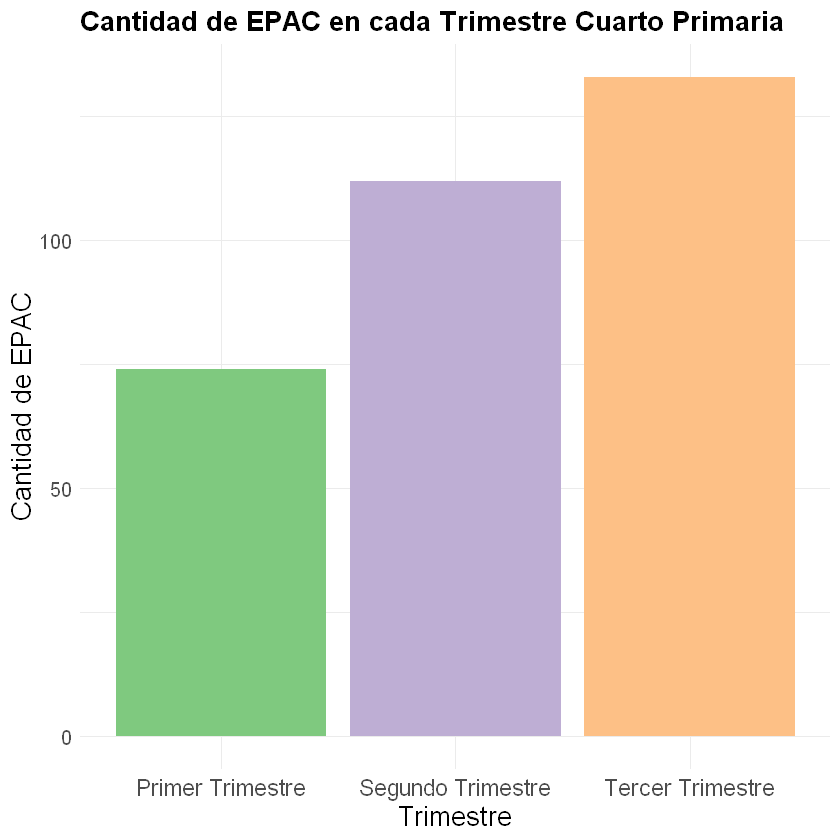

In [806]:
# Contar la cantidad de "EPAC" en cada trimestre para Cuarto de Primaria
epac_counts_4 <- data.frame(
  Trimestre = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"),
  Cantidad = c(
    sum(cuartoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
    sum(cuartoPrimaria$NotasSegundoTrimestre == "EPAC", na.rm = TRUE),
    sum(cuartoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)
  )
)

ggplot(epac_counts_4, aes(x = Trimestre, y = Cantidad, fill = Trimestre)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +
  labs(title = "Cantidad de EPAC en cada Trimestre Cuarto Primaria",
       x = "Trimestre",
       y = "Cantidad de EPAC") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        plot.title = element_text(size = 16, face = "bold"),
        legend.position = "none")


#### Quinto año Primaria ####

In [807]:
quintoPrimaria <- nogoya_PRIMARIO %>%
  filter(NivelEnsenanza == "PRIMARIO",
         Curso == "QUINTO",
         Asignatura %in% c("LENGUA", "MATEMATICA", "CIENCIAS SOCIALES", "CIENCIAS NATURALES")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura
table(quintoPrimaria$Condicion)


   APROBADO DESAPROBADO 
       1858         190 

In [808]:
# Crear tabla de frecuencias por materia y condición
tabla_condiciones5 <- quintoPrimaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condiciones5

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
CIENCIAS NATURALES,493,20,96.10136,3.898635
CIENCIAS SOCIALES,488,24,95.31250,4.687500
LENGUA,438,73,85.71429,14.285714
MATEMATICA,439,73,85.74219,14.257812


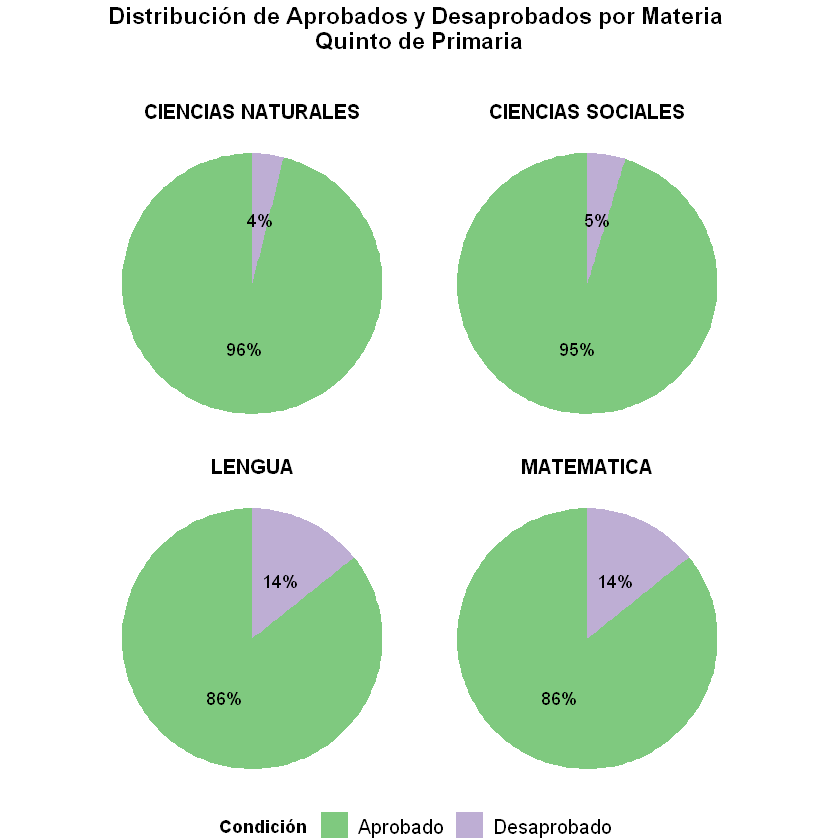

In [809]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_long5 <- tabla_condiciones5 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_long5, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Materia \n Quinto de Primaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 12),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )


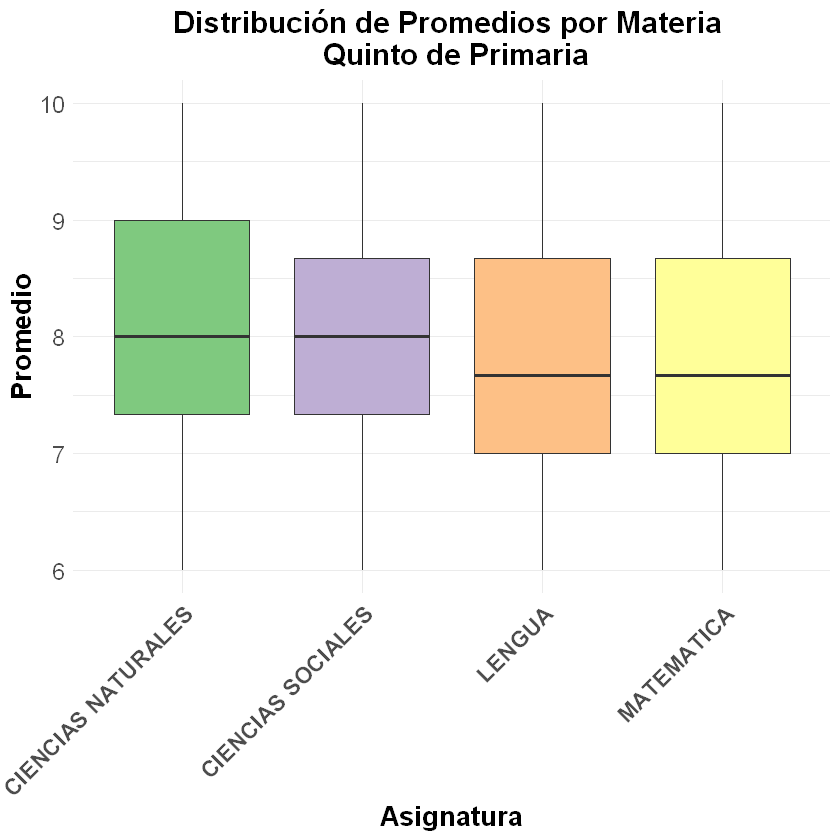

In [810]:
quintoPrimariaAprobado  <- quintoPrimaria %>% filter(Promedio != "Desaprobado")
# Convertir a numérico
quintoPrimariaAprobado$Promedio <- as.numeric(quintoPrimariaAprobado$Promedio)

ggplot(quintoPrimariaAprobado, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Quinto de Primaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )

In [811]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignatura5 <- quintoPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )

# Mostrar las estadísticas calculadas
print(estadisticas_por_asignatura5)

# A tibble: 4 x 4
  Asignatura         Media Mediana  Moda
  <chr>              <dbl>   <dbl> <dbl>
1 CIENCIAS NATURALES  8.07    8        9
2 CIENCIAS SOCIALES   7.98    8        8
3 LENGUA              7.81    7.67     8
4 MATEMATICA          7.78    7.67     7


In [812]:
summary_por_asignatura5 <- quintoPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignatura5)

# A tibble: 4 x 7
  Asignatura           Min    Q1 Mediana Media    Q3   Max
  <chr>              <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 CIENCIAS NATURALES     6  7.33    8     8.07  9       10
2 CIENCIAS SOCIALES      6  7.33    8     7.98  8.67    10
3 LENGUA                 6  7       7.67  7.81  8.67    10
4 MATEMATICA             6  7       7.67  7.78  8.67    10


In [813]:
# Función para aplicar KS test por materia
realizar_ks_test <- function(data) {
  resultado <- data %>%
    group_by(Asignatura) %>%
    summarise(
      KS_p_value = ks.test(Promedio, "pnorm", mean(Promedio), sd(Promedio))$p.value
    )
  
  print(" **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**")
  print("H₀: Las notas siguen una distribución normal")
  print("H₁: Las notas NO siguen una distribución normal")
  
  return(resultado)
}

# Aplicar la función a los aprobados
ks_resultados <- realizar_ks_test(quintoPrimariaAprobado)

# Mostrar los resultados
print(ks_resultados)


[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 4 x 2
  Asignatura         KS_p_value
  <chr>                   <dbl>
1 CIENCIAS NATURALES  0.000190 
2 CIENCIAS SOCIALES   0.00288  
3 LENGUA              0.00887  
4 MATEMATICA          0.0000308


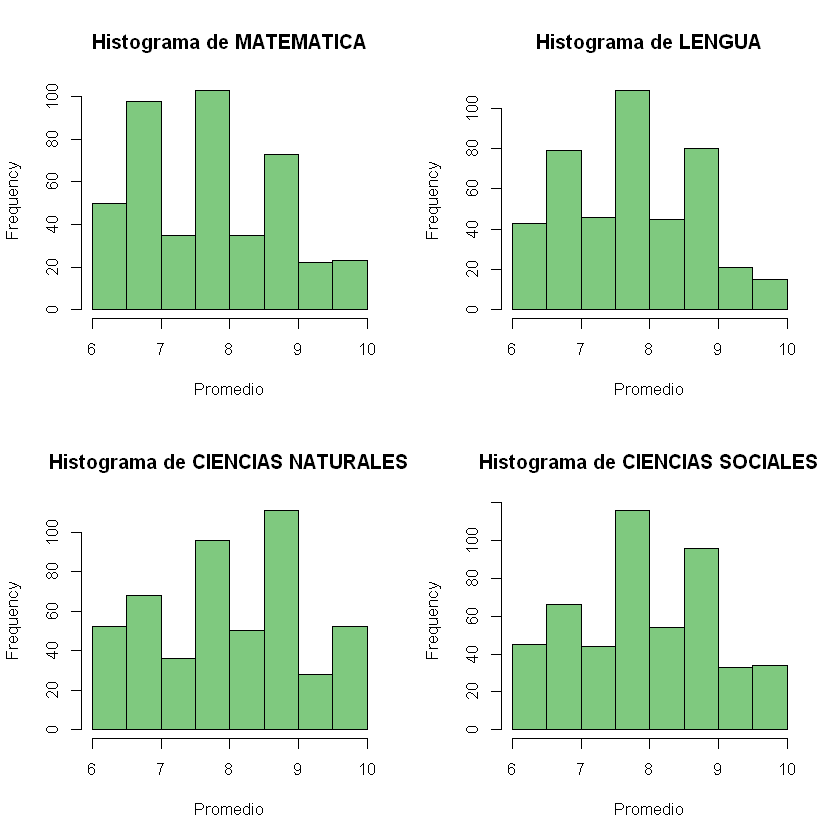

In [814]:
asignaturas <- unique(quintoPrimariaAprobado$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(quintoPrimariaAprobado, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma de", materia),
       xlab = "Promedio", col = "#7fc97f", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos


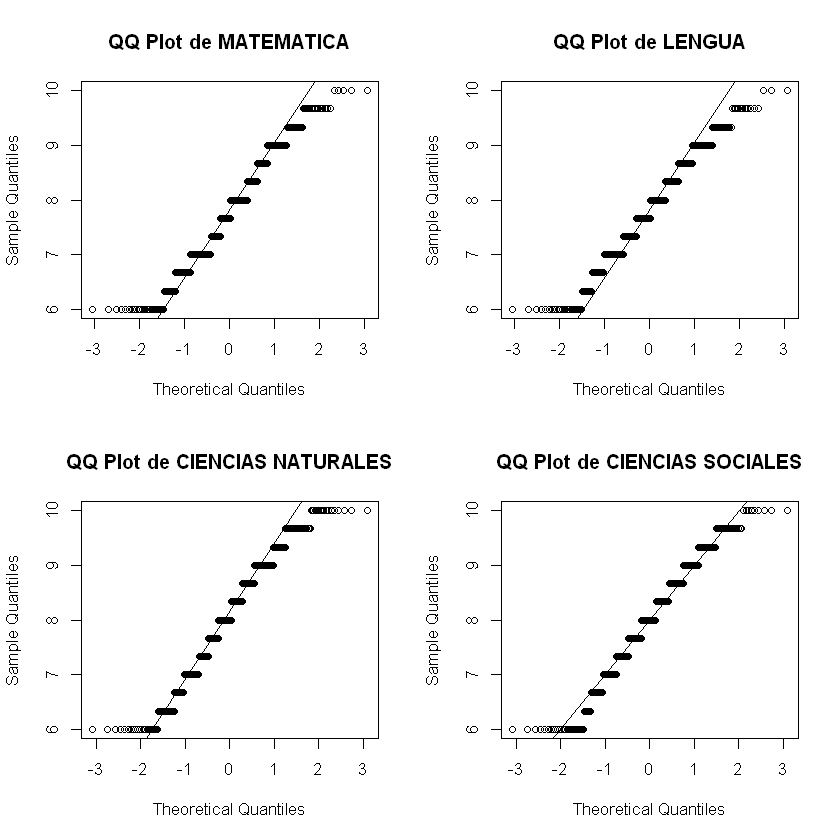

In [815]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(quintoPrimariaAprobado, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original

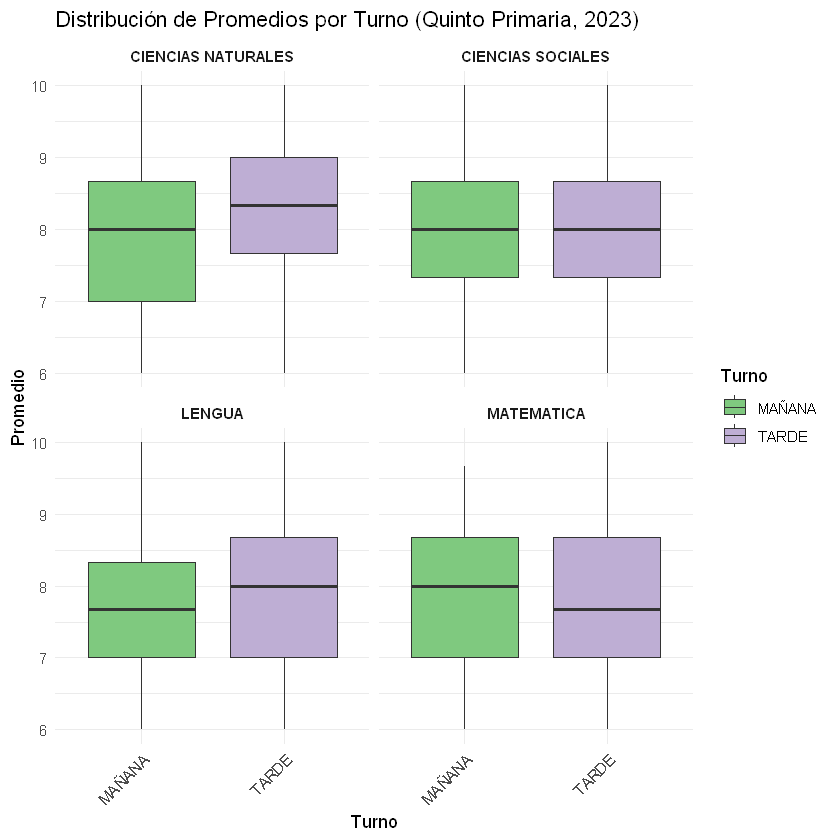

In [816]:
# Filtrar solo los turnos "Mañana" y "Tarde" de tu dataframe
quintoPrimariaAprobado_filtrado <- quintoPrimariaAprobado %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

# Crear el boxplot comparando promedios por turno para cada asignatura con la paleta Accent
ggplot(quintoPrimariaAprobado_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Dividir los boxplots por asignatura
  labs(
    title = "Distribución de Promedios por Turno (Quinto Primaria, 2023)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  # Cambiar el estilo del gráfico
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Mejorar la lectura del eje x
    strip.text = element_text(face = "bold")  # Resaltar los títulos por materia
  )


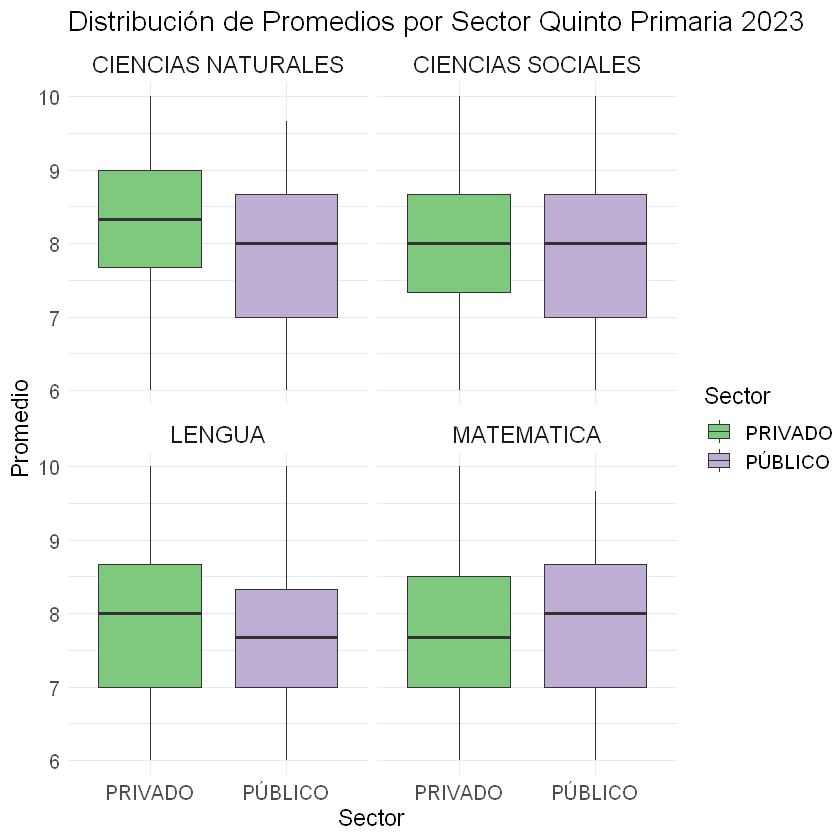

In [817]:
ggplot(quintoPrimariaAprobado, aes(x = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"), y = Promedio, fill = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"))) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Agrupar por asignatura
  scale_fill_brewer(palette = "Accent") +  # Usar paleta de colores "Accent"
  labs(title = "Distribución de Promedios por Sector Quinto Primaria 2023",
       x = "Sector",
       y = "Promedio",
       fill = "Sector") +  # Ajuste de la leyenda
  theme_minimal() +
  theme(
    legend.position = "right",  # Leyenda a la derecha
    text = element_text(size = 14),  # Aumentar el tamaño de la fuente en todo el gráfico
    strip.text = element_text(size = 14),  # Aumentar el tamaño de las etiquetas de las asignaturas
    axis.title = element_text(size = 14),  # Aumentar el tamaño de los títulos de los ejes
    axis.text = element_text(size = 12)  # Aumentar el tamaño del texto de los ejes
  )

In [818]:
# Tabla de contingencia Desempeño y Asignatura
tabla_desemp_asignatura_quinto_primaria <- quintoPrimaria %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Asignatura') %>%
  table()

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Asignatura (Quinto Primaria):")
print(tabla_desemp_asignatura_quinto_primaria)



[1] "Tabla de Contingencia Desempeño y Asignatura (Quinto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                 20                24     73         73
  Aprobado                     74                71     67         84
  Bueno                       121               136    154        138
  Muy Bueno                   155               171    142        128
  Distinguido                 143               110     75         89


In [819]:
print("Prueba de Chi-cuadrado:")

chi_desemp_asignatura_quinto_primaria<- chisq.test(tabla_desemp_asignatura_quinto_primaria)
chi_desemp_asignatura_quinto_primaria
                  

print("Prueba de Cramer: ")
CramerV(tabla_desemp_asignatura_quinto_primaria)

[1] "Prueba de Chi-cuadrado:"



	Pearson's Chi-squared test

data:  tabla_desemp_asignatura_quinto_primaria
X-squared = 92.963, df = 12, p-value = 1.314e-14


[1] "Prueba de Cramer: "


[1] 0.1230072

In [820]:
# Mostrar tabla de contingencia observada
print("Tabla Observada:")
print(chi_desemp_asignatura_quinto_primaria$observed)

# Mostrar tabla de valores esperados (redondeados)
print("Tabla Esperada (redondeada):")
print(round(chi_desemp_asignatura_quinto_primaria$expected, 0))

# Mostrar residuos
print("Residuos:")
print(round(chi_desemp_asignatura_quinto_primaria$residuals, 1))

# Mostrar residuos estandarizados
print("Residuos Estandarizados:")
print(round(chi_desemp_asignatura_quinto_primaria$stdres, 1))

[1] "Tabla Observada:"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                 20                24     73         73
  Aprobado                     74                71     67         84
  Bueno                       121               136    154        138
  Muy Bueno                   155               171    142        128
  Distinguido                 143               110     75         89
[1] "Tabla Esperada (redondeada):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                 48                48     47         48
  Aprobado                     74                74     74         74
  Bueno                       138               137    137        137
  Muy Bueno                   149               149    149        149
  Distinguido                 104               104    104        104
[1] "Residuos:"
              Asignatura
Desempeño  

In [821]:
# Tabla de porcentaje total (porcentaje dentro de la tabla completa)
tabla_porcentaje_total_asignatura_quinto <- prop.table(tabla_desemp_asignatura_quinto_primaria) * 100
tabla_porcentaje_total_asignatura_quinto <- round(tabla_porcentaje_total_asignatura_quinto, 1)  # Redondear a 1 decimal

# Agregar fila y columna de totales
tabla_porcentaje_total_asignatura_quinto <- addmargins(tabla_porcentaje_total_asignatura_quinto, margin = c(1, 2), FUN = sum)

# Renombrar la última fila y columna como "Total"
colnames(tabla_porcentaje_total_asignatura_quinto)[ncol(tabla_porcentaje_total_asignatura_quinto)] <- "Total"
rownames(tabla_porcentaje_total_asignatura_quinto)[nrow(tabla_porcentaje_total_asignatura_quinto)] <- "Total"

print("Tabla de Porcentajes Total (Desempeño y Asignatura) (Quinto Primaria):")
print(tabla_porcentaje_total_asignatura_quinto)


Margins computed over dimensions
in the following order:
1: Desempeño
2: Asignatura
[1] "Tabla de Porcentajes Total (Desempeño y Asignatura) (Quinto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA Total
  Insuficiente                1.0               1.2    3.6        3.6   9.4
  Aprobado                    3.6               3.5    3.3        4.1  14.5
  Bueno                       5.9               6.6    7.5        6.7  26.7
  Muy Bueno                   7.6               8.3    6.9        6.2  29.0
  Distinguido                 7.0               5.4    3.7        4.3  20.4
  Total                      25.1              25.0   25.0       24.9 100.0


In [822]:
# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_asignatura_quinto <- prop.table(tabla_desemp_asignatura_quinto_primaria, margin = 1) * 100
tabla_porcentaje_fila_asignatura_quinto <- round(tabla_porcentaje_fila_asignatura_quinto, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_asignatura_quinto <- addmargins(tabla_porcentaje_fila_asignatura_quinto, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_asignatura_quinto)[ncol(tabla_porcentaje_fila_asignatura_quinto)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Asignatura) (Quinto Primaria):")
print(tabla_porcentaje_fila_asignatura_quinto)


[1] "Tabla de Porcentajes por Fila (Desempeño y Asignatura) (Quinto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA Total
  Insuficiente               10.5              12.6   38.4       38.4  99.9
  Aprobado                   25.0              24.0   22.6       28.4 100.0
  Bueno                      22.0              24.8   28.1       25.1 100.0
  Muy Bueno                  26.0              28.7   23.8       21.5 100.0
  Distinguido                34.3              26.4   18.0       21.3 100.0


In [823]:
# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_asignatura_quinto <- prop.table(tabla_desemp_asignatura_quinto_primaria, margin = 2) * 100
tabla_porcentaje_columna_asignatura_quinto <- round(tabla_porcentaje_columna_asignatura_quinto, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_asignatura_quinto <- addmargins(tabla_porcentaje_columna_asignatura_quinto, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_asignatura_quinto)[nrow(tabla_porcentaje_columna_asignatura_quinto)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Asignatura) (Quinto Primaria):")
print(tabla_porcentaje_columna_asignatura_quinto)


[1] "Tabla de Porcentajes por Columna (Desempeño y Asignatura) (Quinto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                3.9               4.7   14.3       14.3
  Aprobado                   14.4              13.9   13.1       16.4
  Bueno                      23.6              26.6   30.1       27.0
  Muy Bueno                  30.2              33.4   27.8       25.0
  Distinguido                27.9              21.5   14.7       17.4
  Total                     100.0             100.1  100.0      100.1


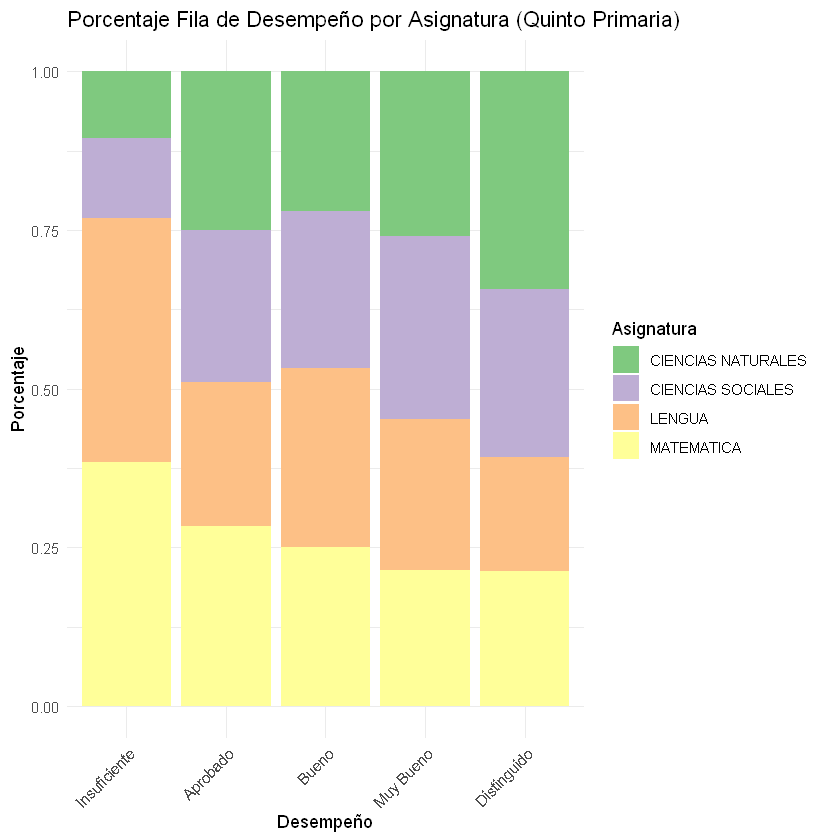

In [824]:
# Eliminar la columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_asignatura_quinto_sin_total <- tabla_porcentaje_fila_asignatura_quinto[, -ncol(tabla_porcentaje_fila_asignatura_quinto)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_asignatura_quinto_long <- as.data.frame(tabla_porcentaje_fila_asignatura_quinto_sin_total)
tabla_porcentaje_fila_asignatura_quinto_long$Desempeño <- rownames(tabla_porcentaje_fila_asignatura_quinto_sin_total)

# Asegurar que Desempeño esté ordenado correctamente
tabla_porcentaje_fila_asignatura_quinto_long$Desempeño <- factor(tabla_porcentaje_fila_asignatura_quinto_long$Desempeño,
                                                                 levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar los porcentajes fila
ggplot(tabla_porcentaje_fila_asignatura_quinto_long, aes(x = Desempeño, y = Freq, fill = Asignatura)) +
  geom_bar(stat = "identity", position = "fill") +  # Apilar las barras para cada desempeño
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Asignatura (Quinto Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


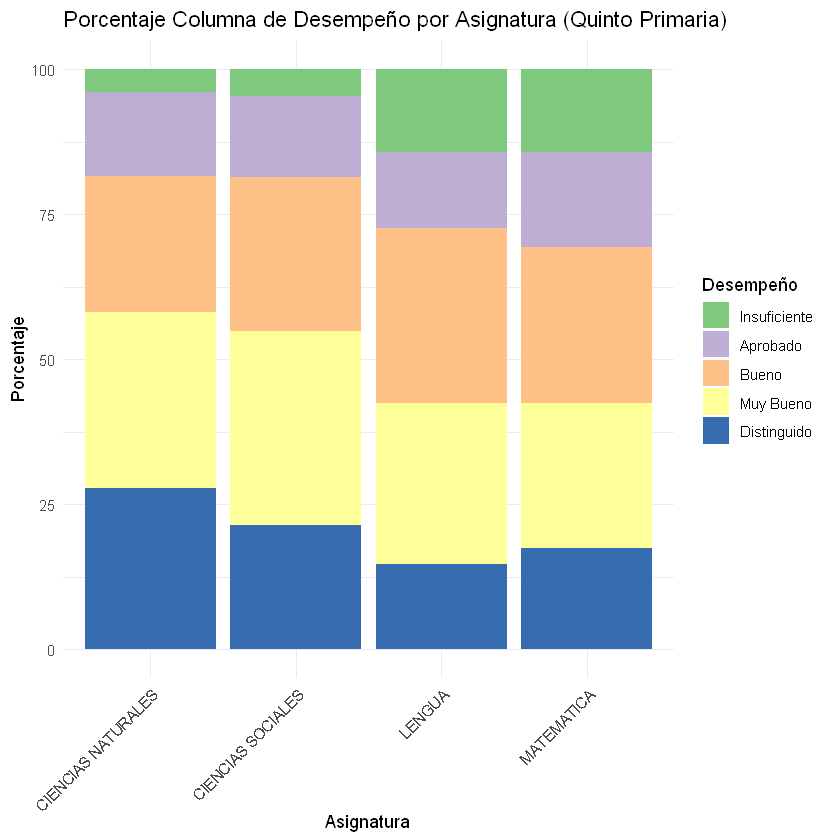

In [825]:
# Eliminar la fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_asignatura_quinto_sin_total <- tabla_porcentaje_columna_asignatura_quinto[-nrow(tabla_porcentaje_columna_asignatura_quinto), ]

# Convertir tabla de porcentajes columna sin "Total" a formato largo para ggplot
tabla_porcentaje_columna_asignatura_quinto_long <- as.data.frame(tabla_porcentaje_columna_asignatura_quinto_sin_total)
tabla_porcentaje_columna_asignatura_quinto_long$Desempeño <- rownames(tabla_porcentaje_columna_asignatura_quinto_sin_total)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_asignatura_quinto_long$Desempeño <- factor(tabla_porcentaje_columna_asignatura_quinto_long$Desempeño,
                                                                 levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar
ggplot(tabla_porcentaje_columna_asignatura_quinto_long, aes(x = Asignatura, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +  # Usamos la paleta accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Asignatura (Quinto Primaria)",
       x = "Asignatura", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


In [826]:
# Filtrar para tercer grado
quintoPrimaria_turno <- quintoPrimaria %>%
  filter(Turno %in% c('MAÑANA', 'TARDE'))

# Asegurarnos de que el orden de los niveles de 'Desempeño' sea el correcto
tabla_desemp_turno_quinto <- quintoPrimaria_turno %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Turno') %>%
  table()

# Mostrar la tabla de contingencia
tabla_desemp_turno_quinto

              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    123    63
  Aprobado        166   119
  Bueno           311   217
  Muy Bueno       349   239
  Distinguido     218   199

In [827]:
# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_turno_quinto <- prop.table(tabla_desemp_turno_quinto, margin = 1) * 100
tabla_porcentaje_fila_turno_quinto <- round(tabla_porcentaje_fila_turno_quinto, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_turno_quinto <- addmargins(tabla_porcentaje_fila_turno_quinto, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_turno_quinto)[ncol(tabla_porcentaje_fila_turno_quinto)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Turno):")
print(tabla_porcentaje_fila_turno_quinto)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_turno_quinto <- prop.table(tabla_desemp_turno_quinto, margin = 2) * 100
tabla_porcentaje_columna_turno_quinto <- round(tabla_porcentaje_columna_turno_quinto, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_turno_quinto <- addmargins(tabla_porcentaje_columna_turno_quinto, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_turno_quinto)[nrow(tabla_porcentaje_columna_turno_quinto)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Turno):")
print(tabla_porcentaje_columna_turno_quinto)


[1] "Tabla de Porcentajes por Fila (Desempeño y Turno):"
              Turno
Desempeño      MAÑANA TARDE Total
  Insuficiente   66.1  33.9 100.0
  Aprobado       58.2  41.8 100.0
  Bueno          58.9  41.1 100.0
  Muy Bueno      59.4  40.6 100.0
  Distinguido    52.3  47.7 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Turno):"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente   10.5   7.5
  Aprobado       14.2  14.2
  Bueno          26.6  25.9
  Muy Bueno      29.9  28.6
  Distinguido    18.7  23.8
  Total          99.9 100.0


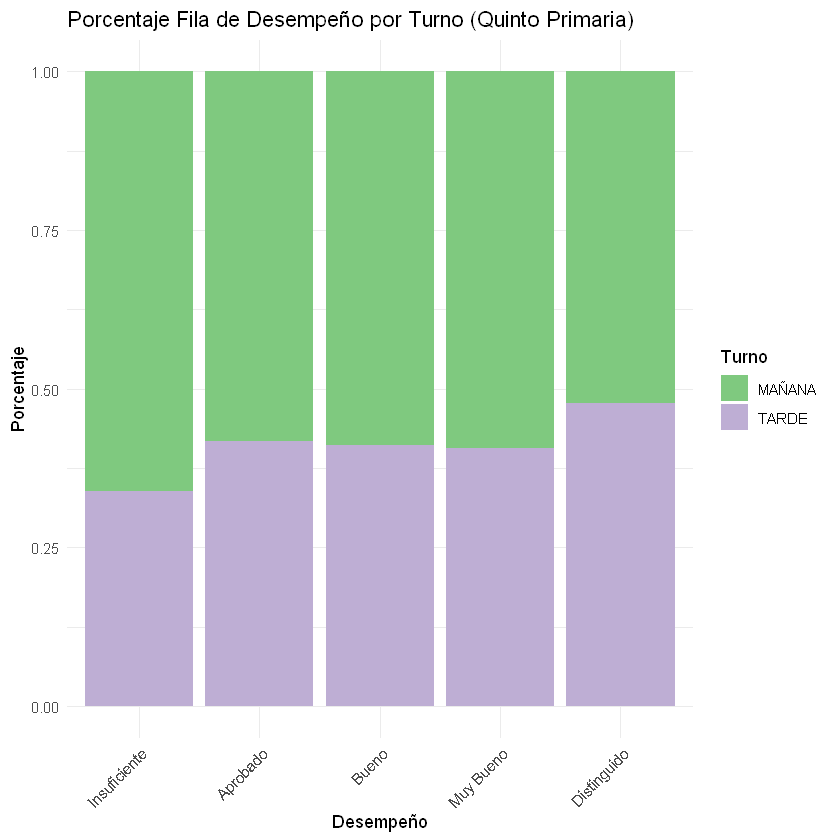

In [828]:
# Eliminar columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_turno_sin_total_quinto <- tabla_porcentaje_fila_turno_quinto[, -ncol(tabla_porcentaje_fila_turno_quinto)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_turno_long_quinto <- as.data.frame(tabla_porcentaje_fila_turno_sin_total_quinto)
tabla_porcentaje_fila_turno_long_quinto$Desempeño <- rownames(tabla_porcentaje_fila_turno_sin_total_quinto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_turno_long_quinto$Desempeño <- factor(tabla_porcentaje_fila_turno_long_quinto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar las barras apiladas para porcentaje fila
ggplot(tabla_porcentaje_fila_turno_long_quinto, aes(x = Desempeño, y = Freq, fill = Turno)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Turno (Quinto Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


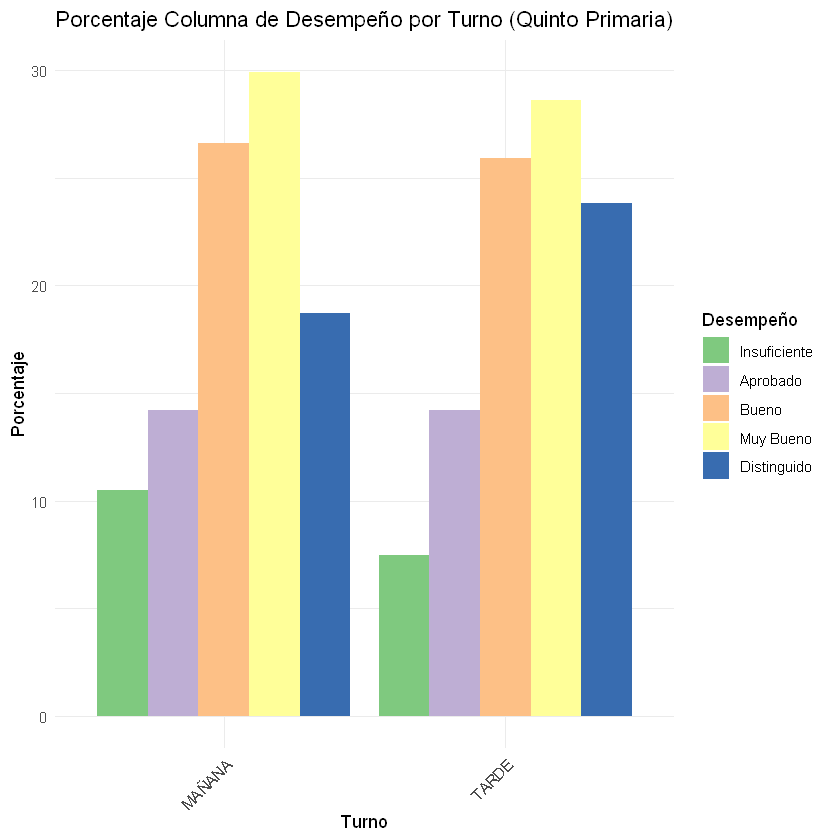

In [829]:
# Eliminar fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_turno_sin_total_quinto <- tabla_porcentaje_columna_turno_quinto[-nrow(tabla_porcentaje_columna_turno_quinto), ]

# Convertir la tabla de porcentajes columna a formato largo
tabla_porcentaje_columna_turno_long_quinto <- as.data.frame(tabla_porcentaje_columna_turno_sin_total_quinto)
tabla_porcentaje_columna_turno_long_quinto$Desempeño <- rownames(tabla_porcentaje_columna_turno_sin_total_quinto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_turno_long_quinto$Desempeño <- factor(tabla_porcentaje_columna_turno_long_quinto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar las barras adosadas para porcentaje columna
ggplot(tabla_porcentaje_columna_turno_long_quinto, aes(x = Turno, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Turno (Quinto Primaria)",
       x = "Turno", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X

In [830]:
print("Prueba de Chi-cuadrado:")

chi_desemp_turno_quinto<- chisq.test(tabla_desemp_turno_quinto)
chi_desemp_turno_quinto
                  

print("Prueba de Cramer: ")
CramerV(tabla_desemp_turno_quinto)

[1] "Prueba de Chi-cuadrado:"



	Pearson's Chi-squared test

data:  tabla_desemp_turno_quinto
X-squared = 11.248, df = 4, p-value = 0.02391


[1] "Prueba de Cramer: "


[1] 0.07491911

In [831]:
# Mostrar tabla de contingencia observada
print("Tabla Observada:")
print(chi_desemp_turno_quinto$observed)

# Mostrar tabla de valores esperados (redondeados)
print("Tabla Esperada (redondeada):")
print(round(chi_desemp_turno_quinto$expected, 0))

# Mostrar residuos
print("Residuos:")
print(round(chi_desemp_turno_quinto$residuals, 1))

# Mostrar residuos estandarizados
print("Residuos Estandarizados:")
print(round(chi_desemp_turno_quinto$stdres, 1))

[1] "Tabla Observada:"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    123    63
  Aprobado        166   119
  Bueno           311   217
  Muy Bueno       349   239
  Distinguido     218   199
[1] "Tabla Esperada (redondeada):"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    108    78
  Aprobado        166   119
  Bueno           307   221
  Muy Bueno       342   246
  Distinguido     243   174
[1] "Residuos:"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    1.4  -1.7
  Aprobado        0.0   0.0
  Bueno           0.2  -0.2
  Muy Bueno       0.4  -0.4
  Distinguido    -1.6   1.9
[1] "Residuos Estandarizados:"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    2.3  -2.3
  Aprobado        0.0   0.0
  Bueno           0.4  -0.4
  Muy Bueno       0.7  -0.7
  Distinguido    -2.8   2.8


In [832]:
# Cambiar el nombre de la columna 'EsPrivada' a 'Sector' y recodificar los valores 'N' y 'S' por 'Publica' y 'Privada'
tabla_desemp_sector_quinto_primaria <- quintoPrimaria %>%
  filter(!is.na(Desempeño) & !is.na(EsPrivada)) %>%  # Eliminar NA
  rename(Sector = EsPrivada) %>%  # Renombrar EsPrivada a Sector
  mutate(
    Sector = recode(Sector, 'N' = 'Publica', 'S' = 'Privada'),  # Reemplazar valores 'N' y 'S'
    Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))  # Asegurar el orden de Desempeño
  ) %>%
  select('Desempeño', 'Sector') %>%
  table()  # Generar la tabla de contingencia

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Sector para Quinto Grado:")
print(tabla_desemp_sector_quinto_primaria)

[1] "Tabla de Contingencia Desempeño y Sector para Quinto Grado:"
              Sector
Desempeño      Privada Publica
  Insuficiente      28     162
  Aprobado         105     191
  Bueno            234     315
  Muy Bueno        250     346
  Distinguido      196     221


In [833]:
# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_sector_quinto <- prop.table(tabla_desemp_sector_quinto_primaria, margin = 1) * 100
tabla_porcentaje_fila_sector_quinto <- round(tabla_porcentaje_fila_sector_quinto, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_sector_quinto <- addmargins(tabla_porcentaje_fila_sector_quinto, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_sector_quinto)[ncol(tabla_porcentaje_fila_sector_quinto)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Sector):")
print(tabla_porcentaje_fila_sector_quinto)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_sector_quinto <- prop.table(tabla_desemp_sector_quinto_primaria, margin = 2) * 100
tabla_porcentaje_columna_sector_quinto <- round(tabla_porcentaje_columna_sector_quinto, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_sector_quinto <- addmargins(tabla_porcentaje_columna_sector_quinto, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_sector_quinto)[nrow(tabla_porcentaje_columna_sector_quinto)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Sector):")
print(tabla_porcentaje_columna_sector_quinto)


[1] "Tabla de Porcentajes por Fila (Desempeño y Sector):"
              Sector
Desempeño      Privada Publica Total
  Insuficiente    14.7    85.3 100.0
  Aprobado        35.5    64.5 100.0
  Bueno           42.6    57.4 100.0
  Muy Bueno       41.9    58.1 100.0
  Distinguido     47.0    53.0 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Sector):"
              Sector
Desempeño      Privada Publica
  Insuficiente     3.4    13.1
  Aprobado        12.9    15.5
  Bueno           28.8    25.5
  Muy Bueno       30.8    28.0
  Distinguido     24.1    17.9
  Total          100.0   100.0


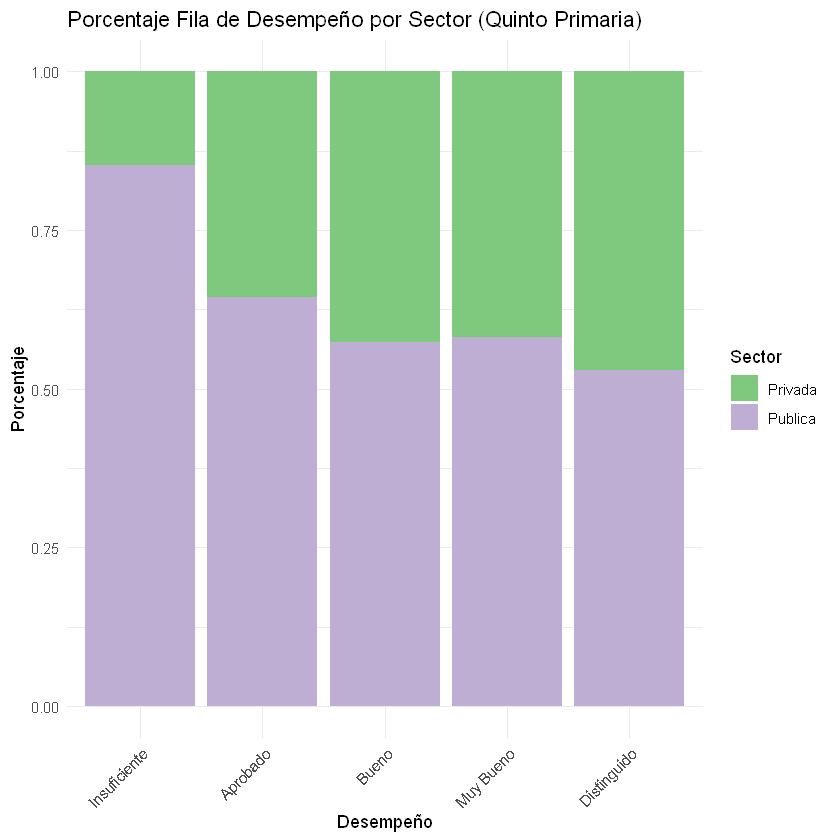

In [834]:
# Eliminar columna Total en la tabla de porcentaje fila
tabla_porcentaje_fila_sector_sin_total_quinto <- tabla_porcentaje_fila_sector_quinto[, -ncol(tabla_porcentaje_fila_sector_quinto)]  # Eliminar columna "Total"

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_sector_long_quinto <- as.data.frame(tabla_porcentaje_fila_sector_sin_total_quinto)
tabla_porcentaje_fila_sector_long_quinto$Desempeño <- rownames(tabla_porcentaje_fila_sector_sin_total_quinto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_sector_long_quinto$Desempeño <- factor(tabla_porcentaje_fila_sector_long_quinto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar el porcentaje fila con barras apiladas
ggplot(tabla_porcentaje_fila_sector_long_quinto, aes(x = Desempeño, y = Freq, fill = Sector)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Sector (Quinto Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X


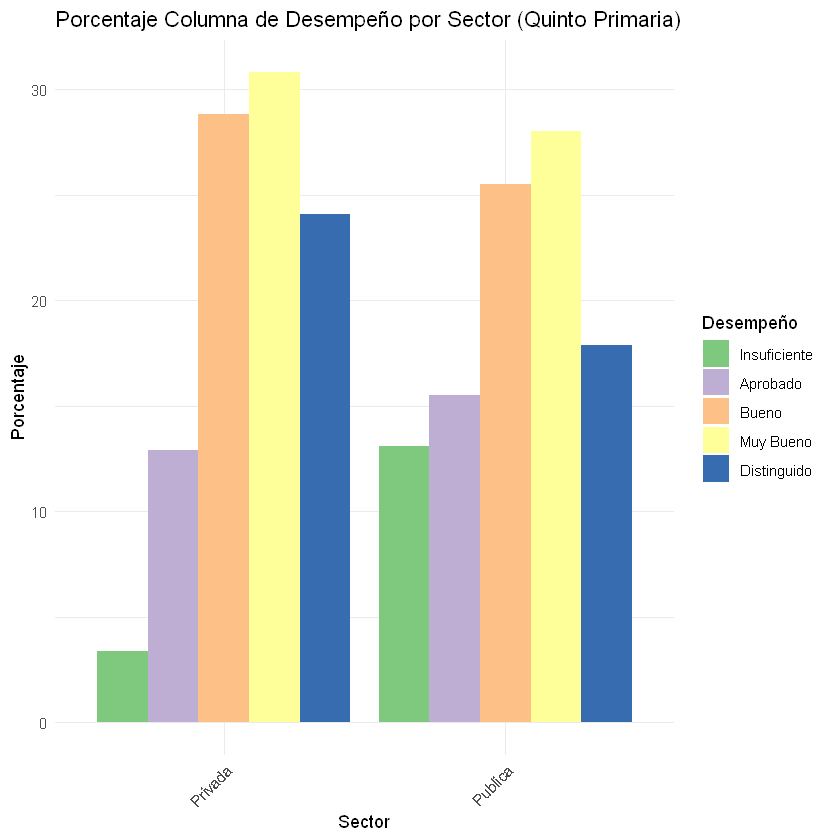

In [835]:
# Eliminar fila "Total" en la tabla de porcentaje columna
tabla_porcentaje_columna_sector_sin_total_quinto <- tabla_porcentaje_columna_sector_quinto[-nrow(tabla_porcentaje_columna_sector_quinto), ]  # Eliminar fila "Total"

# Convertir la tabla de porcentajes columna a formato largo
tabla_porcentaje_columna_sector_long_quinto <- as.data.frame(tabla_porcentaje_columna_sector_sin_total_quinto)
tabla_porcentaje_columna_sector_long_quinto$Desempeño <- rownames(tabla_porcentaje_columna_sector_sin_total_quinto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_sector_long_quinto$Desempeño <- factor(tabla_porcentaje_columna_sector_long_quinto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar el porcentaje columna con barras adosadas, donde el eje X es "Sector"
ggplot(tabla_porcentaje_columna_sector_long_quinto, aes(x = Sector, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Sector (Quinto Primaria)",
       x = "Sector", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X


In [836]:
print("Prueba de Chi-cuadrado:")

chi_desemp_sector_quinto_primaria<- chisq.test(tabla_desemp_sector_quinto_primaria)
chi_desemp_sector_quinto_primaria
                  

print("Prueba de Cramer: ")
CramerV(tabla_desemp_sector_quinto_primaria)

[1] "Prueba de Chi-cuadrado:"



	Pearson's Chi-squared test

data:  tabla_desemp_sector_quinto_primaria
X-squared = 64.174, df = 4, p-value = 3.841e-13


[1] "Prueba de Cramer: "


[1] 0.177017

In [837]:
# Mostrar tabla de contingencia observada
print("Tabla Observada:")
print(chi_desemp_sector_quinto_primaria$observed)

# Mostrar tabla de valores esperados (redondeados)
print("Tabla Esperada:")
print(round(chi_desemp_sector_quinto_primaria$expected, 0))

# Mostrar residuos
print("Residuos:")
print(round(chi_desemp_sector_quinto_primaria$residuals, 1))

# Mostrar residuos estandarizados
print("Residuos Estandarizados:")
print(round(chi_desemp_sector_quinto_primaria$stdres, 1))

[1] "Tabla Observada:"
              Sector
Desempeño      Privada Publica
  Insuficiente      28     162
  Aprobado         105     191
  Bueno            234     315
  Muy Bueno        250     346
  Distinguido      196     221
[1] "Tabla Esperada:"
              Sector
Desempeño      Privada Publica
  Insuficiente      75     115
  Aprobado         118     178
  Bueno            218     331
  Muy Bueno        237     359
  Distinguido      166     251
[1] "Residuos:"
              Sector
Desempeño      Privada Publica
  Insuficiente    -5.5     4.4
  Aprobado        -1.2     0.9
  Bueno            1.1    -0.9
  Muy Bueno        0.9    -0.7
  Distinguido      2.4    -1.9
[1] "Residuos Estandarizados:"
              Sector
Desempeño      Privada Publica
  Insuficiente    -7.4     7.4
  Aprobado        -1.6     1.6
  Bueno            1.6    -1.6
  Muy Bueno        1.3    -1.3
  Distinguido      3.4    -3.4


In [838]:
prop.test(c(sum(quintoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
            sum(quintoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)),
          c(nrow(quintoPrimaria), nrow(quintoPrimaria)))



	2-sample test for equality of proportions with continuity correction

data:  c(sum(quintoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE), sum(quintoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)) out of c(nrow(quintoPrimaria), nrow(quintoPrimaria))
X-squared = 36.695, df = 1, p-value = 1.381e-09
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.06423960 -0.03244009
sample estimates:
    prop 1     prop 2 
0.04443359 0.09277344 


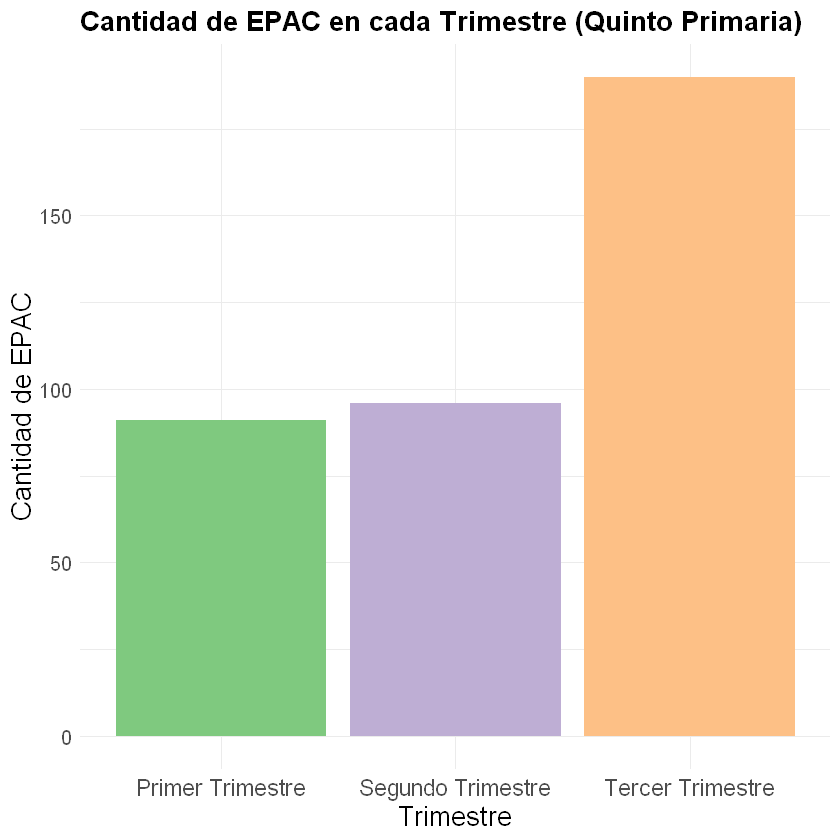

In [839]:
# Contar la cantidad de "EPAC" en cada trimestre para Quinto de Primaria
epac_counts_5 <- data.frame(
  Trimestre = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"),
  Cantidad = c(
    sum(quintoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
    sum(quintoPrimaria$NotasSegundoTrimestre == "EPAC", na.rm = TRUE),
    sum(quintoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)
  )
)

ggplot(epac_counts_5, aes(x = Trimestre, y = Cantidad, fill = Trimestre)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +
  labs(title = "Cantidad de EPAC en cada Trimestre (Quinto Primaria)",
       x = "Trimestre",
       y = "Cantidad de EPAC") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        plot.title = element_text(size = 16, face = "bold"),
        legend.position = "none")


#### Sexto año Primaria ####

In [840]:
sextoPrimaria <- nogoya_PRIMARIO %>%
  filter(NivelEnsenanza == "PRIMARIO",
         Curso == "SEXTO",
         Asignatura %in% c("LENGUA", "MATEMATICA", "CIENCIAS SOCIALES", "CIENCIAS NATURALES")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura
table(sextoPrimaria$Condicion)


   APROBADO DESAPROBADO 
       1608          61 

In [841]:
# Crear tabla de frecuencias por materia y condición
tabla_condiciones6 <- sextoPrimaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condiciones6

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
CIENCIAS NATURALES,409,4,99.03148,0.968523
CIENCIAS SOCIALES,400,12,97.08738,2.912621
LENGUA,395,18,95.64165,4.358354
MATEMATICA,404,27,93.73550,6.264501


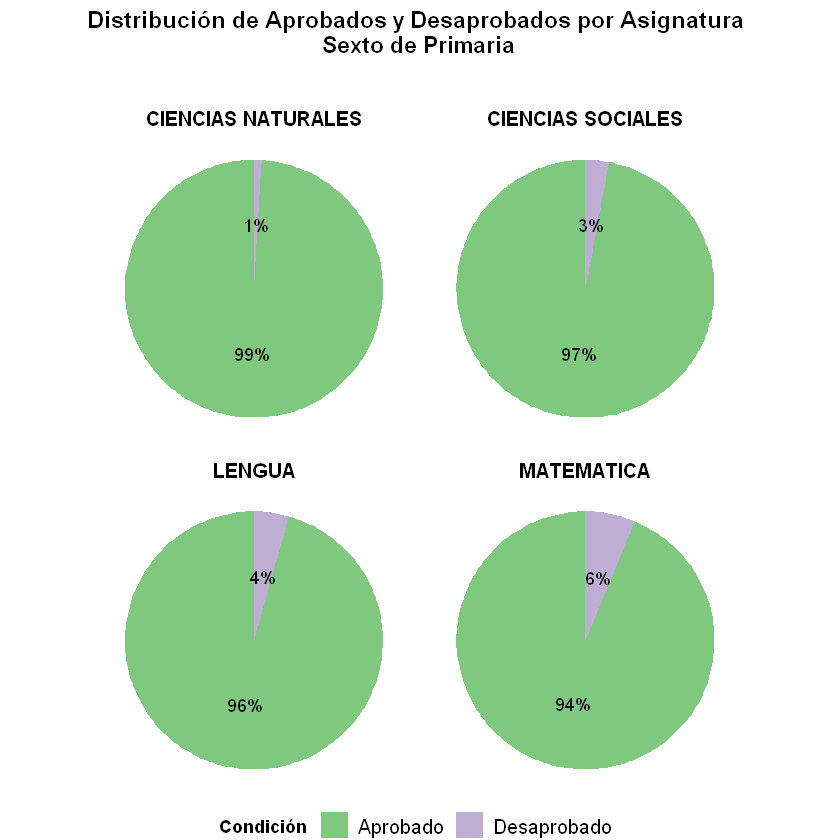

In [842]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_long6 <- tabla_condiciones6 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_long6, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Asignatura \n Sexto de Primaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 12),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )
ggsave("grafico_aprobados_sext.png", width = 8, height = 6, dpi = 300)


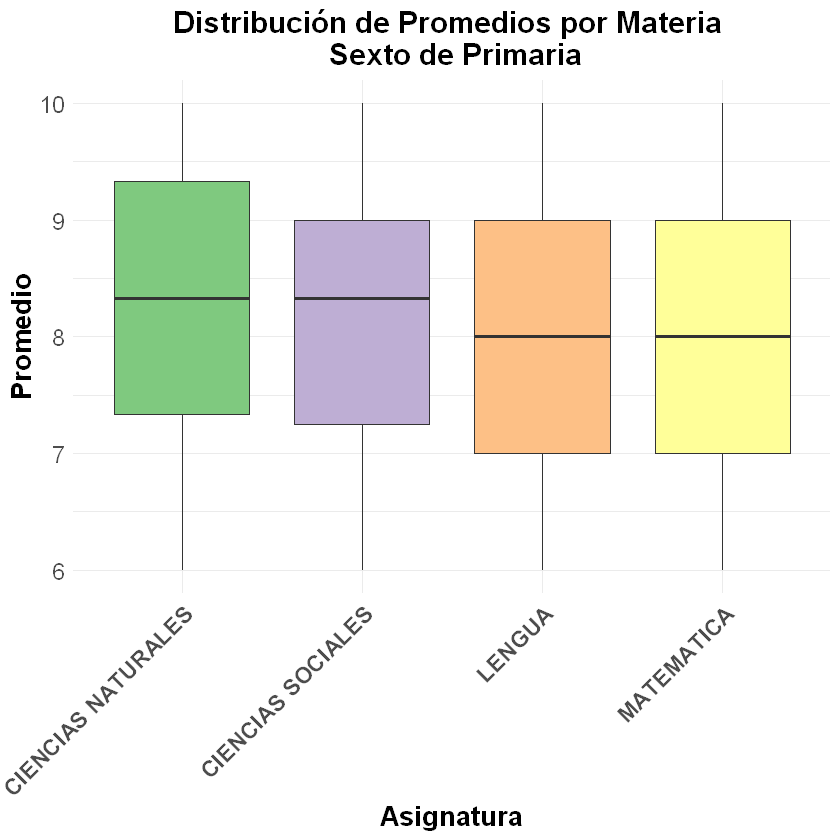

In [843]:
sextoPrimariaAprobado  <- sextoPrimaria %>% filter(Promedio != "Desaprobado")
# Convertir a numérico
sextoPrimariaAprobado$Promedio <- as.numeric(sextoPrimariaAprobado$Promedio)

ggplot(sextoPrimariaAprobado, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Sexto de Primaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
      )

In [844]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignatura6 <- sextoPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )

# Mostrar las estadísticas calculadas
print(estadisticas_por_asignatura6)

# A tibble: 4 x 4
  Asignatura         Media Mediana  Moda
  <chr>              <dbl>   <dbl> <dbl>
1 CIENCIAS NATURALES  8.26    8.33     8
2 CIENCIAS SOCIALES   8.15    8.33     8
3 LENGUA              8.05    8        8
4 MATEMATICA          7.94    8        9


In [845]:
summary_por_asignatura6 <- sextoPrimariaAprobado %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignatura6)

# A tibble: 4 x 7
  Asignatura           Min    Q1 Mediana Media    Q3   Max
  <chr>              <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 CIENCIAS NATURALES     6  7.33    8.33  8.26  9.33    10
2 CIENCIAS SOCIALES      6  7.25    8.33  8.15  9       10
3 LENGUA                 6  7       8     8.05  9       10
4 MATEMATICA             6  7       8     7.94  9       10


In [846]:
# Función para aplicar KS test por materia
realizar_ks_test <- function(data) {
  resultado <- data %>%
    group_by(Asignatura) %>%
    summarise(
      KS_p_value = ks.test(Promedio, "pnorm", mean(Promedio), sd(Promedio))$p.value
    )
  
  print(" **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**")
  print("H₀: Las notas siguen una distribución normal")
  print("H₁: Las notas NO siguen una distribución normal")
  
  return(resultado)
}

# Aplicar la función a los aprobados
ks_resultados <- realizar_ks_test(sextoPrimariaAprobado)

# Mostrar los resultados
print(ks_resultados)


[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 4 x 2
  Asignatura         KS_p_value
  <chr>                   <dbl>
1 CIENCIAS NATURALES  0.000137 
2 CIENCIAS SOCIALES   0.0000648
3 LENGUA              0.0000838
4 MATEMATICA          0.0000447


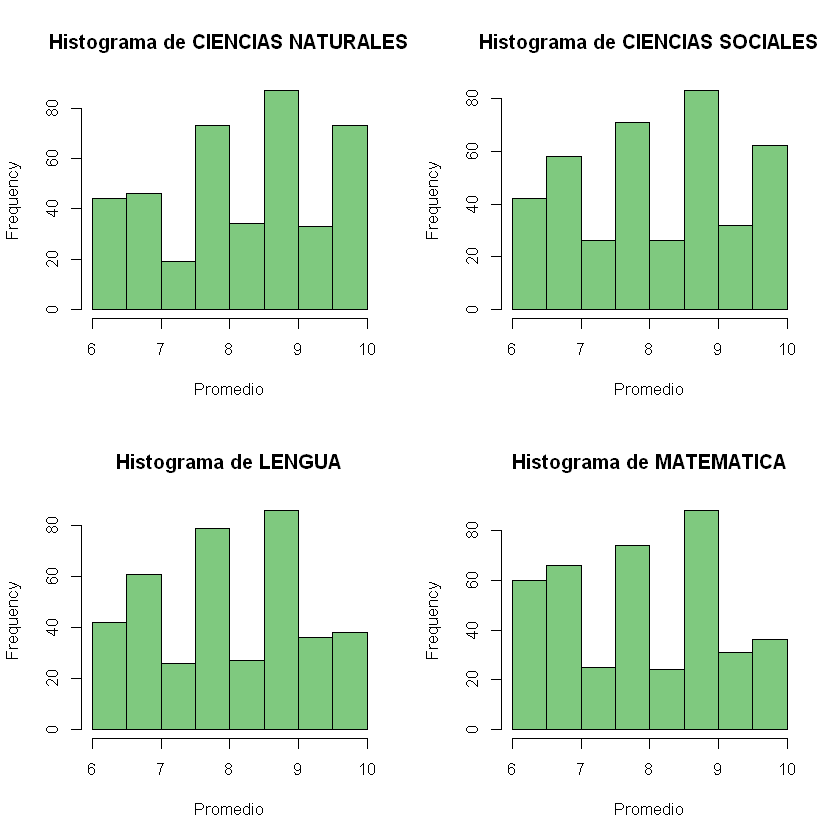

In [847]:
asignaturas <- unique(sextoPrimariaAprobado$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(sextoPrimariaAprobado, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma de", materia),
       xlab = "Promedio", col = "#7fc97f", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos


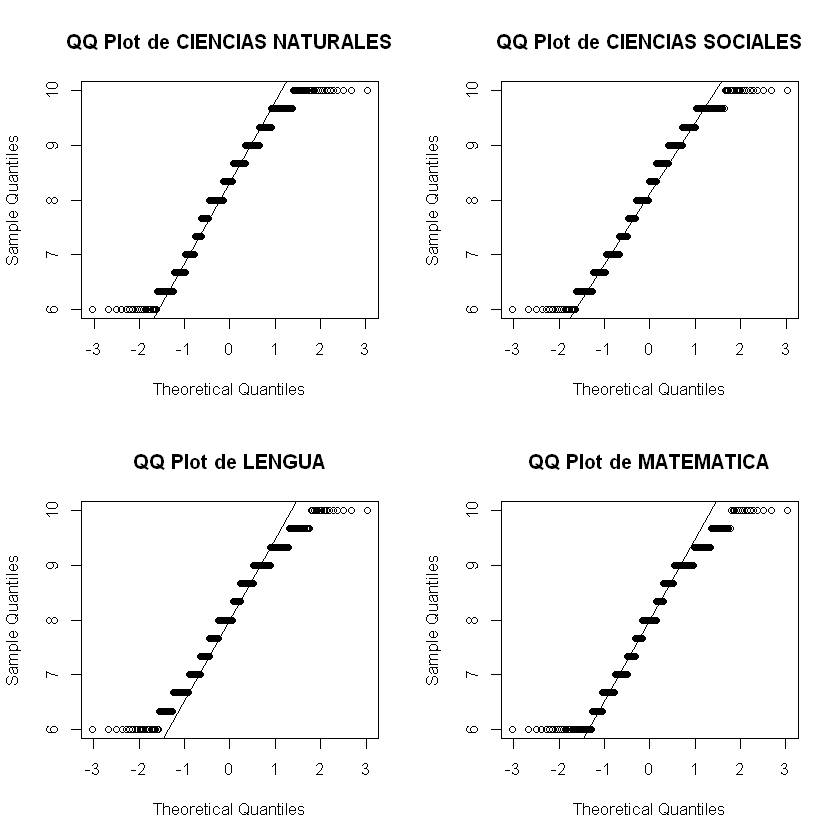

In [848]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(sextoPrimariaAprobado, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original

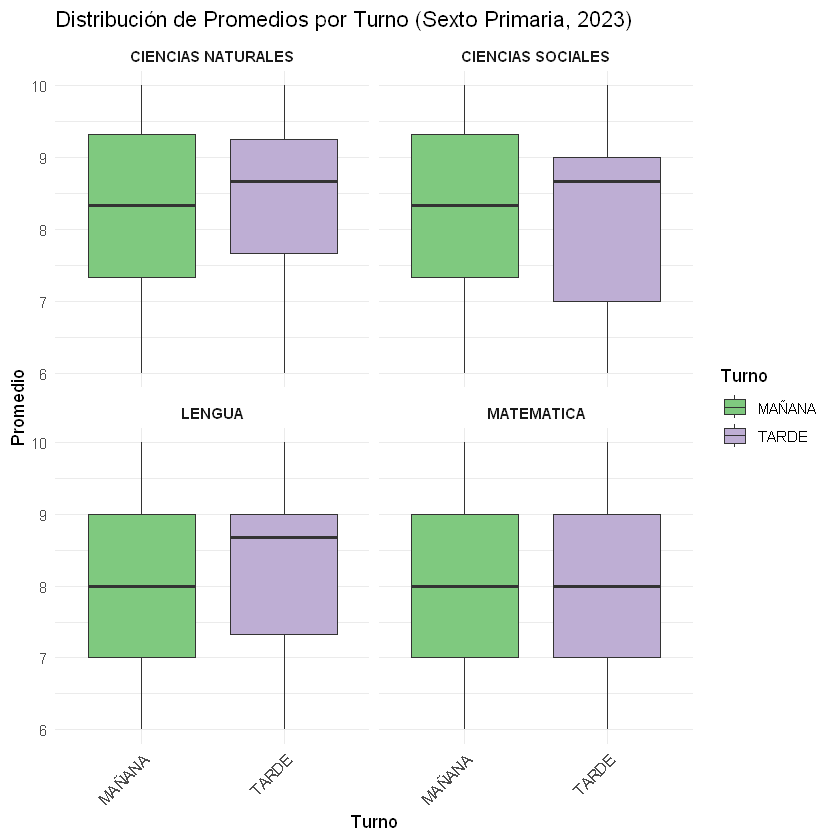

In [849]:
# Filtrar solo los turnos "Mañana" y "Tarde" de tu dataframe
sextoPrimariaAprobado_filtrado <- sextoPrimariaAprobado %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

# Crear el boxplot comparando promedios por turno para cada asignatura con la paleta Accent
ggplot(sextoPrimariaAprobado_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Dividir los boxplots por asignatura
  labs(
    title = "Distribución de Promedios por Turno (Sexto Primaria, 2023)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  # Cambiar el estilo del gráfico
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Mejorar la lectura del eje x
    strip.text = element_text(face = "bold")  # Resaltar los títulos por materia
  )


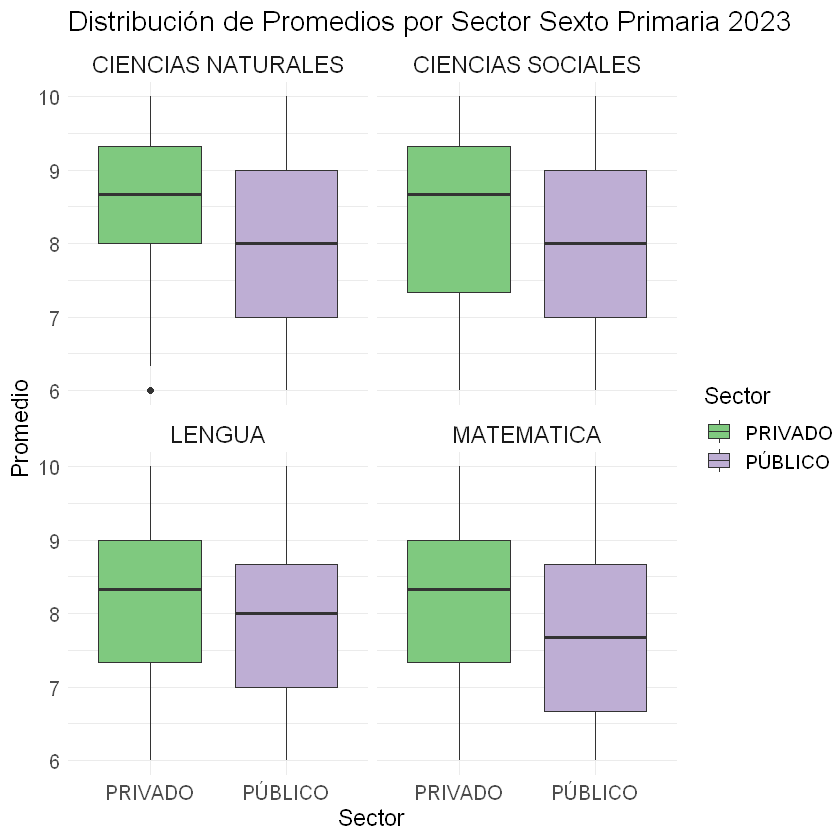

In [850]:
ggplot(sextoPrimariaAprobado, aes(x = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"), y = Promedio, fill = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"))) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Agrupar por asignatura
  scale_fill_brewer(palette = "Accent") +  # Usar paleta de colores "Accent"
  labs(title = "Distribución de Promedios por Sector Sexto Primaria 2023",
       x = "Sector",
       y = "Promedio",
       fill = "Sector") +  # Ajuste de la leyenda
  theme_minimal() +
  theme(
    legend.position = "right",  # Leyenda a la derecha
    text = element_text(size = 14),  # Aumentar el tamaño de la fuente en todo el gráfico
    strip.text = element_text(size = 14),  # Aumentar el tamaño de las etiquetas de las asignaturas
    axis.title = element_text(size = 14),  # Aumentar el tamaño de los títulos de los ejes
    axis.text = element_text(size = 12)  # Aumentar el tamaño del texto de los ejes
  )

In [851]:
# Tabla de contingencia Desempeño y Asignatura
tabla_desemp_asignatura_sexto_primaria <- sextoPrimaria %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Asignatura') %>%
  table()

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Asignatura (Sexto Primaria):")
print(tabla_desemp_asignatura_sexto_primaria)


[1] "Tabla de Contingencia Desempeño y Asignatura (Sexto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                  4                12     18         27
  Aprobado                     67                67     73         89
  Bueno                        65                85     85         88
  Muy Bueno                   127               112    118        107
  Distinguido                 150               136    119        120


In [852]:
# Tabla de porcentaje total (porcentaje dentro de la tabla completa)
tabla_porcentaje_total_asignatura_sexto <- prop.table(tabla_desemp_asignatura_sexto_primaria) * 100
tabla_porcentaje_total_asignatura_sexto <- round(tabla_porcentaje_total_asignatura_sexto, 1)  # Redondear a 1 decimal

# Agregar fila y columna de totales
tabla_porcentaje_total_asignatura_sexto <- addmargins(tabla_porcentaje_total_asignatura_sexto, margin = c(1, 2), FUN = sum)

# Renombrar la última fila y columna como "Total"
colnames(tabla_porcentaje_total_asignatura_sexto)[ncol(tabla_porcentaje_total_asignatura_sexto)] <- "Total"
rownames(tabla_porcentaje_total_asignatura_sexto)[nrow(tabla_porcentaje_total_asignatura_sexto)] <- "Total"

print("Tabla de Porcentajes Total (Desempeño y Asignatura) (Sexto Primaria):")
print(tabla_porcentaje_total_asignatura_sexto)


Margins computed over dimensions
in the following order:
1: Desempeño
2: Asignatura
[1] "Tabla de Porcentajes Total (Desempeño y Asignatura) (Sexto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA Total
  Insuficiente                0.2               0.7    1.1        1.6   3.6
  Aprobado                    4.0               4.0    4.4        5.3  17.7
  Bueno                       3.9               5.1    5.1        5.3  19.4
  Muy Bueno                   7.6               6.7    7.1        6.4  27.8
  Distinguido                 9.0               8.1    7.1        7.2  31.4
  Total                      24.7              24.6   24.8       25.8  99.9


In [853]:
# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_asignatura_sexto <- prop.table(tabla_desemp_asignatura_sexto_primaria, margin = 1) * 100
tabla_porcentaje_fila_asignatura_sexto <- round(tabla_porcentaje_fila_asignatura_sexto, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_asignatura_sexto <- addmargins(tabla_porcentaje_fila_asignatura_sexto, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_asignatura_sexto)[ncol(tabla_porcentaje_fila_asignatura_sexto)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Asignatura) (Sexto Primaria):")
print(tabla_porcentaje_fila_asignatura_sexto)


[1] "Tabla de Porcentajes por Fila (Desempeño y Asignatura) (Sexto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA Total
  Insuficiente                6.6              19.7   29.5       44.3 100.1
  Aprobado                   22.6              22.6   24.7       30.1 100.0
  Bueno                      20.1              26.3   26.3       27.2  99.9
  Muy Bueno                  27.4              24.1   25.4       23.1 100.0
  Distinguido                28.6              25.9   22.7       22.9 100.1


In [854]:
# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_asignatura_sexto <- prop.table(tabla_desemp_asignatura_sexto_primaria, margin = 2) * 100
tabla_porcentaje_columna_asignatura_sexto <- round(tabla_porcentaje_columna_asignatura_sexto, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_asignatura_sexto <- addmargins(tabla_porcentaje_columna_asignatura_sexto, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_asignatura_sexto)[nrow(tabla_porcentaje_columna_asignatura_sexto)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Asignatura) (Sexto Primaria):")
print(tabla_porcentaje_columna_asignatura_sexto)


[1] "Tabla de Porcentajes por Columna (Desempeño y Asignatura) (Sexto Primaria):"
              Asignatura
Desempeño      CIENCIAS NATURALES CIENCIAS SOCIALES LENGUA MATEMATICA
  Insuficiente                1.0               2.9    4.4        6.3
  Aprobado                   16.2              16.3   17.7       20.6
  Bueno                      15.7              20.6   20.6       20.4
  Muy Bueno                  30.8              27.2   28.6       24.8
  Distinguido                36.3              33.0   28.8       27.8
  Total                     100.0             100.0  100.1       99.9


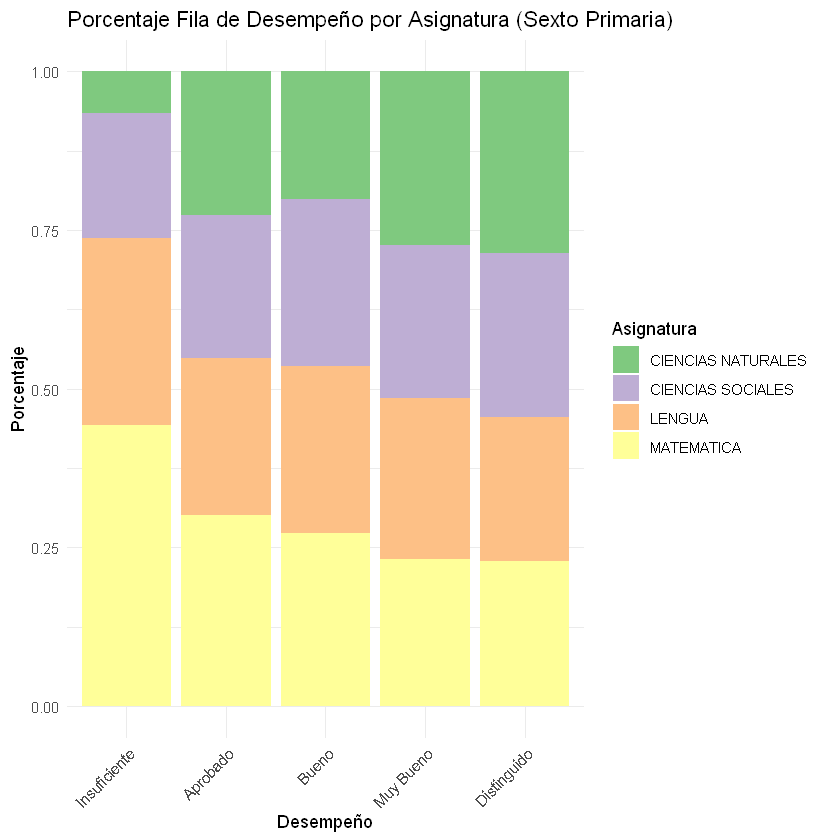

In [855]:
# Eliminar la columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_asignatura_sexto_sin_total <- tabla_porcentaje_fila_asignatura_sexto[, -ncol(tabla_porcentaje_fila_asignatura_sexto)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_asignatura_sexto_long <- as.data.frame(tabla_porcentaje_fila_asignatura_sexto_sin_total)
tabla_porcentaje_fila_asignatura_sexto_long$Desempeño <- rownames(tabla_porcentaje_fila_asignatura_sexto_sin_total)

# Asegurar que Desempeño esté ordenado correctamente
tabla_porcentaje_fila_asignatura_sexto_long$Desempeño <- factor(tabla_porcentaje_fila_asignatura_sexto_long$Desempeño,
                                                                 levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar los porcentajes fila
ggplot(tabla_porcentaje_fila_asignatura_sexto_long, aes(x = Desempeño, y = Freq, fill = Asignatura)) +
  geom_bar(stat = "identity", position = "fill") +  # Apilar las barras para cada desempeño
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Asignatura (Sexto Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


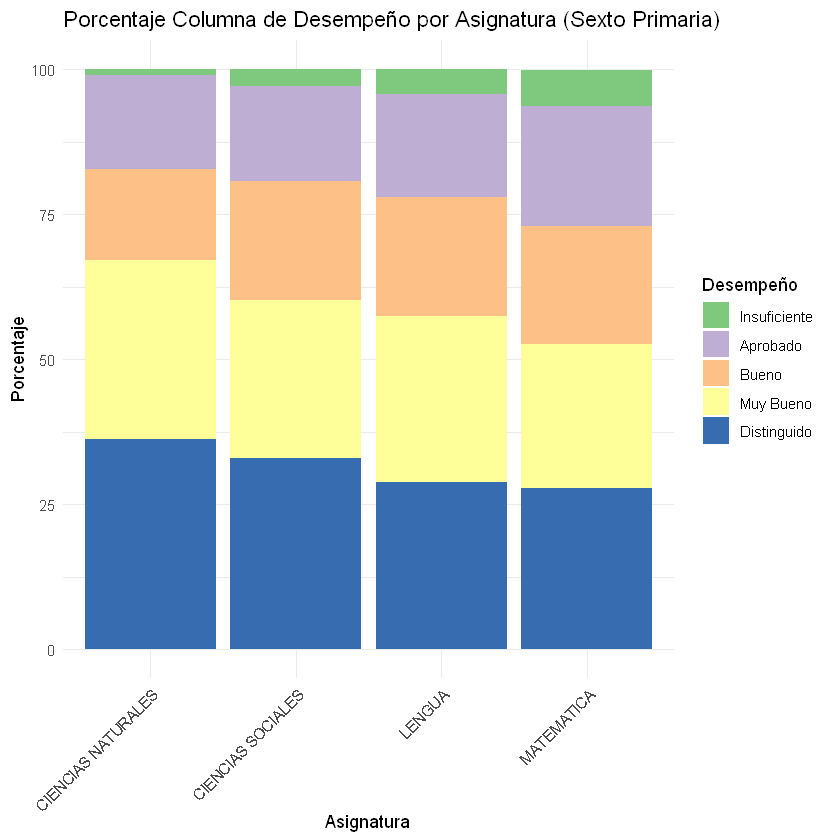

In [856]:
# Eliminar la fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_asignatura_sexto_sin_total <- tabla_porcentaje_columna_asignatura_sexto[-nrow(tabla_porcentaje_columna_asignatura_sexto), ]

# Convertir tabla de porcentajes columna sin "Total" a formato largo para ggplot
tabla_porcentaje_columna_asignatura_sexto_long <- as.data.frame(tabla_porcentaje_columna_asignatura_sexto_sin_total)
tabla_porcentaje_columna_asignatura_sexto_long$Desempeño <- rownames(tabla_porcentaje_columna_asignatura_sexto_sin_total)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_asignatura_sexto_long$Desempeño <- factor(tabla_porcentaje_columna_asignatura_sexto_long$Desempeño,
                                                                 levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar
ggplot(tabla_porcentaje_columna_asignatura_sexto_long, aes(x = Asignatura, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +  # Usamos la paleta accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Asignatura (Sexto Primaria)",
       x = "Asignatura", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X


In [857]:
# Cambiar el nombre de la columna 'EsPrivada' a 'Sector' y recodificar los valores 'N' y 'S' por 'Publica' y 'Privada'
tabla_desemp_sector_sexto_primaria <- sextoPrimaria %>%
  filter(!is.na(Desempeño) & !is.na(EsPrivada)) %>%  # Eliminar NA
  rename(Sector = EsPrivada) %>%  # Renombrar EsPrivada a Sector
  mutate(
    Sector = recode(Sector, 'N' = 'Publica', 'S' = 'Privada'),  # Reemplazar valores 'N' y 'S'
    Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))  # Asegurar el orden de Desempeño
  ) %>%
  select('Desempeño', 'Sector') %>% 
  table()  # Generar la tabla de contingencia

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Sector (Sexto):")
print(tabla_desemp_sector_sexto_primaria)

# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_sector_sexto <- prop.table(tabla_desemp_sector_sexto_primaria, margin = 1) * 100
tabla_porcentaje_fila_sector_sexto <- round(tabla_porcentaje_fila_sector_sexto, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_sector_sexto <- addmargins(tabla_porcentaje_fila_sector_sexto, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_sector_sexto)[ncol(tabla_porcentaje_fila_sector_sexto)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Sector - Sexto):")
print(tabla_porcentaje_fila_sector_sexto)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_sector_sexto <- prop.table(tabla_desemp_sector_sexto_primaria, margin = 2) * 100
tabla_porcentaje_columna_sector_sexto <- round(tabla_porcentaje_columna_sector_sexto, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_sector_sexto <- addmargins(tabla_porcentaje_columna_sector_sexto, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_sector_sexto)[nrow(tabla_porcentaje_columna_sector_sexto)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Sector - Sexto):")
print(tabla_porcentaje_columna_sector_sexto)


[1] "Tabla de Contingencia Desempeño y Sector (Sexto):"
              Sector
Desempeño      Privada Publica
  Insuficiente      10      51
  Aprobado          99     197
  Bueno            134     189
  Muy Bueno        238     226
  Distinguido      286     239
[1] "Tabla de Porcentajes por Fila (Desempeño y Sector - Sexto):"
              Sector
Desempeño      Privada Publica Total
  Insuficiente    16.4    83.6 100.0
  Aprobado        33.4    66.6 100.0
  Bueno           41.5    58.5 100.0
  Muy Bueno       51.3    48.7 100.0
  Distinguido     54.5    45.5 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Sector - Sexto):"
              Sector
Desempeño      Privada Publica
  Insuficiente     1.3     5.7
  Aprobado        12.9    21.8
  Bueno           17.5    21.0
  Muy Bueno       31.0    25.1
  Distinguido     37.3    26.5
  Total          100.0   100.1


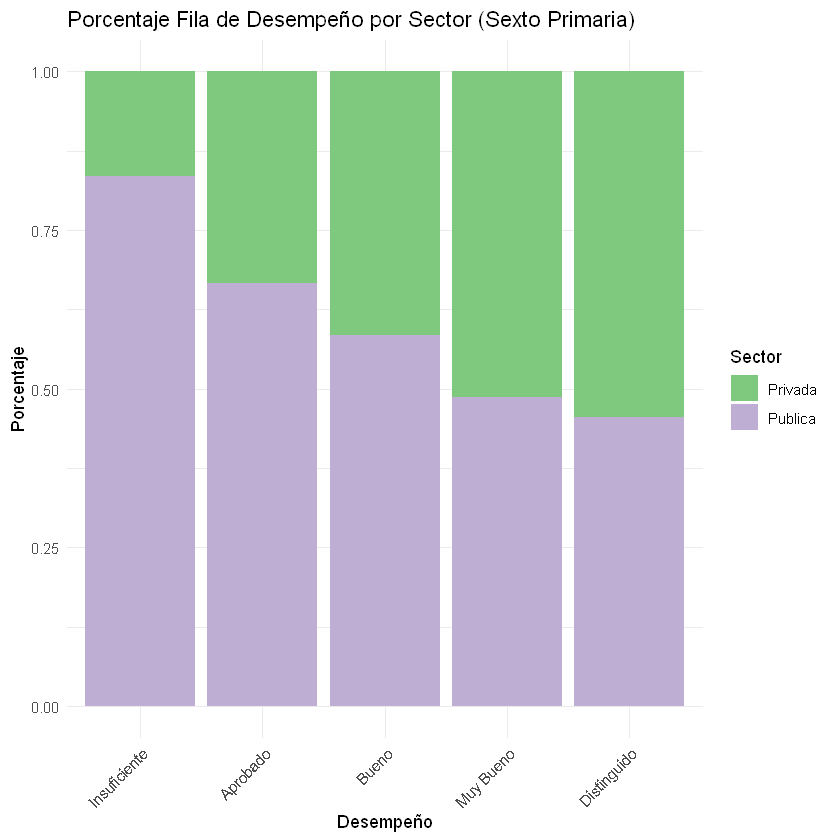

In [858]:
# Eliminar columna "Total" en la tabla de porcentaje fila
tabla_porcentaje_fila_sector_sin_total_sexto <- tabla_porcentaje_fila_sector_sexto[, -ncol(tabla_porcentaje_fila_sector_sexto)]  # Eliminar columna "Total"

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_sector_long_sexto <- as.data.frame(tabla_porcentaje_fila_sector_sin_total_sexto)
tabla_porcentaje_fila_sector_long_sexto$Desempeño <- rownames(tabla_porcentaje_fila_sector_sin_total_sexto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_sector_long_sexto$Desempeño <- factor(tabla_porcentaje_fila_sector_long_sexto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar el porcentaje fila con barras apiladas para sexto
ggplot(tabla_porcentaje_fila_sector_long_sexto, aes(x = Desempeño, y = Freq, fill = Sector)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Sector (Sexto Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X



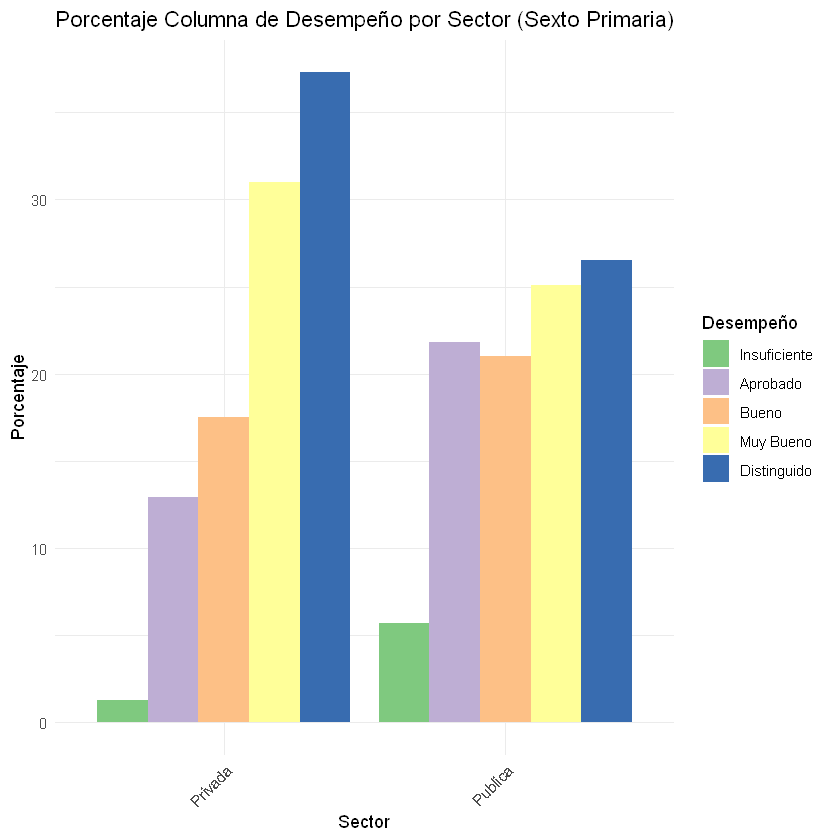

In [859]:
# Eliminar fila "Total" en la tabla de porcentaje columna
tabla_porcentaje_columna_sector_sin_total_sexto <- tabla_porcentaje_columna_sector_sexto[-nrow(tabla_porcentaje_columna_sector_sexto), ]  # Eliminar fila "Total"

# Convertir la tabla de porcentajes columna a formato largo
tabla_porcentaje_columna_sector_long_sexto <- as.data.frame(tabla_porcentaje_columna_sector_sin_total_sexto)
tabla_porcentaje_columna_sector_long_sexto$Desempeño <- rownames(tabla_porcentaje_columna_sector_sin_total_sexto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_sector_long_sexto$Desempeño <- factor(tabla_porcentaje_columna_sector_long_sexto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Graficar el porcentaje columna con barras adosadas, donde el eje X es "Sector" para sexto
ggplot(tabla_porcentaje_columna_sector_long_sexto, aes(x = Sector, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Sector (Sexto Primaria)",
       x = "Sector", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar visualización eje X


In [860]:
# Realizar la prueba de Chi-cuadrado para sexto
chi_desemp_sector_sexto_primaria <- chisq.test(tabla_desemp_sector_sexto_primaria)
chi_desemp_sector_sexto_primaria



	Pearson's Chi-squared test

data:  tabla_desemp_sector_sexto_primaria
X-squared = 63.382, df = 4, p-value = 5.64e-13


In [861]:
CramerV(tabla_desemp_sector_sexto_primaria)

[1] 0.1948738

In [862]:
# Mostrar los valores observados
chi_desemp_sector_sexto_primaria$observed


              Sector
Desempeño      Privada Publica
  Insuficiente      10      51
  Aprobado          99     197
  Bueno            134     189
  Muy Bueno        238     226
  Distinguido      286     239

In [863]:
# Mostrar los valores esperados redondeados
round(chi_desemp_sector_sexto_primaria$expected, 0)


,Privada,Publica
Insuficiente,28,33
Aprobado,136,160
Bueno,148,175
Muy Bueno,213,251
Distinguido,241,284


In [864]:
# Mostrar los residuos redondeados
round(chi_desemp_sector_sexto_primaria$residuals, 1)


              Sector
Desempeño      Privada Publica
  Insuficiente    -3.4     3.1
  Aprobado        -3.2     2.9
  Bueno           -1.2     1.1
  Muy Bueno        1.7    -1.6
  Distinguido      2.9    -2.7

In [865]:
# Mostrar los residuos estándar redondeados
round(chi_desemp_sector_sexto_primaria$stdres, 1)


              Sector
Desempeño      Privada Publica
  Insuficiente    -4.7     4.7
  Aprobado        -4.8     4.8
  Bueno           -1.8     1.8
  Muy Bueno        2.7    -2.7
  Distinguido      4.7    -4.7

In [866]:
# Filtrar datos de sexto de primaria
sextoPrimaria_turno <- sextoPrimaria %>%
  filter(Turno %in% c('MAÑANA', 'TARDE'))

# Tabla de contingencia Desempeño y Turno
tabla_desemp_turno_sexto_primaria <- sextoPrimaria_turno %>%
  mutate(Desempeño = factor(Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))) %>%
  select('Desempeño', 'Turno') %>%
  table()

# Mostrar tabla de contingencia
print("Tabla de Contingencia Desempeño y Turno (Sexto Primaria):")
print(tabla_desemp_turno_sexto_primaria)

# Tabla de porcentajes fila (porcentaje dentro de cada fila)
tabla_porcentaje_fila_turno_sexto <- prop.table(tabla_desemp_turno_sexto_primaria, margin = 1) * 100
tabla_porcentaje_fila_turno_sexto <- round(tabla_porcentaje_fila_turno_sexto, 1)  # Redondear a 1 decimal
tabla_porcentaje_fila_turno_sexto <- addmargins(tabla_porcentaje_fila_turno_sexto, 2, FUN = sum)  # Agregar columna "Total"
colnames(tabla_porcentaje_fila_turno_sexto)[ncol(tabla_porcentaje_fila_turno_sexto)] <- "Total"  # Renombrar columna "Total"
print("Tabla de Porcentajes por Fila (Desempeño y Turno - Sexto Primaria):")
print(tabla_porcentaje_fila_turno_sexto)

# Tabla de porcentajes columna (porcentaje dentro de cada columna)
tabla_porcentaje_columna_turno_sexto <- prop.table(tabla_desemp_turno_sexto_primaria, margin = 2) * 100
tabla_porcentaje_columna_turno_sexto <- round(tabla_porcentaje_columna_turno_sexto, 1)  # Redondear a 1 decimal
tabla_porcentaje_columna_turno_sexto <- addmargins(tabla_porcentaje_columna_turno_sexto, 1, FUN = sum)  # Agregar fila "Total"
rownames(tabla_porcentaje_columna_turno_sexto)[nrow(tabla_porcentaje_columna_turno_sexto)] <- "Total"  # Renombrar fila "Total"
print("Tabla de Porcentajes por Columna (Desempeño y Turno - Sexto Primaria):")
print(tabla_porcentaje_columna_turno_sexto)


[1] "Tabla de Contingencia Desempeño y Turno (Sexto Primaria):"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     45    14
  Aprobado        188    79
  Bueno           204   104
  Muy Bueno       299   153
  Distinguido     325   186
[1] "Tabla de Porcentajes por Fila (Desempeño y Turno - Sexto Primaria):"
              Turno
Desempeño      MAÑANA TARDE Total
  Insuficiente   76.3  23.7 100.0
  Aprobado       70.4  29.6 100.0
  Bueno          66.2  33.8 100.0
  Muy Bueno      66.2  33.8 100.0
  Distinguido    63.6  36.4 100.0
[1] "Tabla de Porcentajes por Columna (Desempeño y Turno - Sexto Primaria):"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    4.2   2.6
  Aprobado       17.7  14.7
  Bueno          19.2  19.4
  Muy Bueno      28.2  28.5
  Distinguido    30.6  34.7
  Total          99.9  99.9


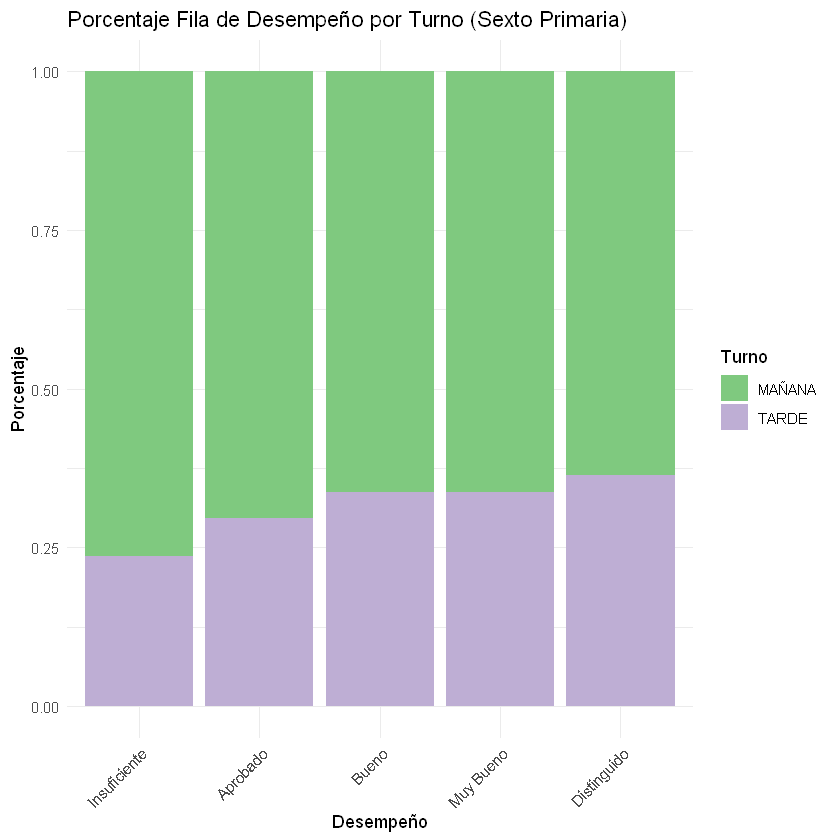

In [867]:
# Eliminar columna "Total" de la tabla de porcentajes fila
tabla_porcentaje_fila_turno_sin_total_sexto <- tabla_porcentaje_fila_turno_sexto[, -ncol(tabla_porcentaje_fila_turno_sexto)]

# Convertir la tabla de porcentajes fila a formato largo
tabla_porcentaje_fila_turno_long_sexto <- as.data.frame(tabla_porcentaje_fila_turno_sin_total_sexto)
tabla_porcentaje_fila_turno_long_sexto$Desempeño <- rownames(tabla_porcentaje_fila_turno_sin_total_sexto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_fila_turno_long_sexto$Desempeño <- factor(tabla_porcentaje_fila_turno_long_sexto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar las barras apiladas para porcentaje fila
ggplot(tabla_porcentaje_fila_turno_long_sexto, aes(x = Desempeño, y = Freq, fill = Turno)) +
  geom_bar(stat = "identity", position = "fill") +  # Barras apiladas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Fila de Desempeño por Turno (Sexto Primaria)",
       x = "Desempeño", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X

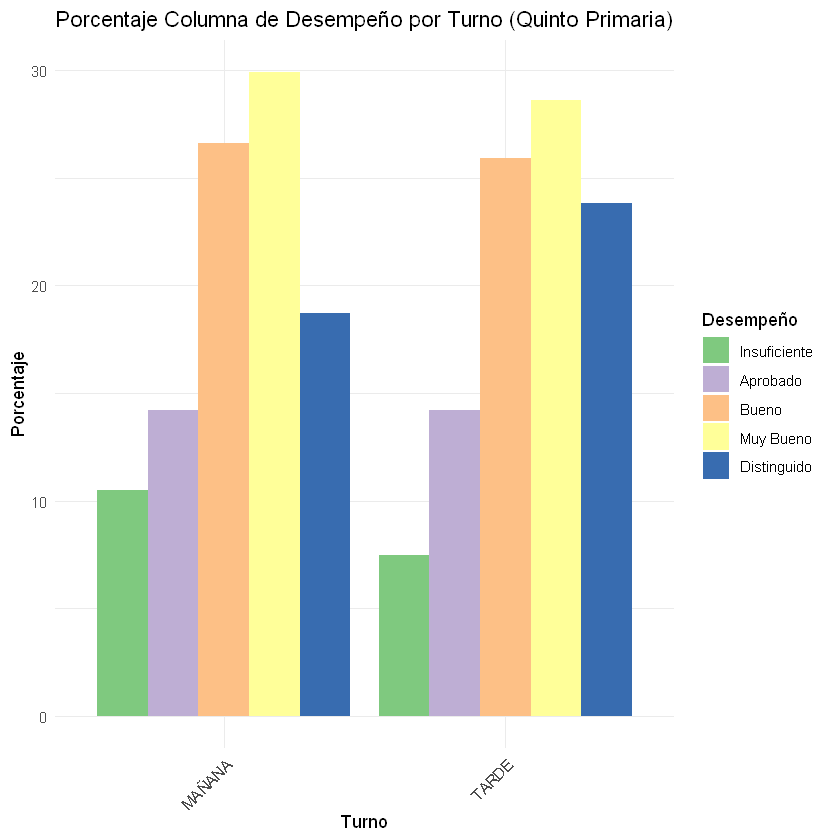

In [868]:
# Eliminar fila "Total" de la tabla de porcentajes columna
tabla_porcentaje_columna_turno_sin_total_quinto <- tabla_porcentaje_columna_turno_quinto[-nrow(tabla_porcentaje_columna_turno_quinto), ]

# Convertir la tabla de porcentajes columna a formato largo
tabla_porcentaje_columna_turno_long_quinto <- as.data.frame(tabla_porcentaje_columna_turno_sin_total_quinto)
tabla_porcentaje_columna_turno_long_quinto$Desempeño <- rownames(tabla_porcentaje_columna_turno_sin_total_quinto)

# Asegurar que Desempeño tenga el orden correcto como factor
tabla_porcentaje_columna_turno_long_quinto$Desempeño <- factor(tabla_porcentaje_columna_turno_long_quinto$Desempeño,
                                                           levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
# Graficar las barras adosadas para porcentaje columna
ggplot(tabla_porcentaje_columna_turno_long_quinto, aes(x = Turno, y = Freq, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "dodge") +  # Barras adosadas
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +
  labs(title = "Porcentaje Columna de Desempeño por Turno (Quinto Primaria)",
       x = "Turno", y = "Porcentaje") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Mejorar la visualización de los nombres del eje X

In [869]:
# Realizar la prueba de Chi-cuadrado
chi_desemp_turno_sexto_primaria <- chisq.test(tabla_desemp_turno_sexto_primaria)
chi_desemp_turno_sexto_primaria



	Pearson's Chi-squared test

data:  tabla_desemp_turno_sexto_primaria
X-squared = 6.3167, df = 4, p-value = 0.1767


In [870]:
CramerV(tabla_desemp_turno_sexto_primaria)

[1] 0.06289152

In [871]:
# Mostrar tabla de contingencia observada
print("Tabla Observada:")
print(chi_desemp_turno_sexto_primaria$observed)

# Mostrar tabla de valores esperados (redondeados)
print("Tabla Esperada (redondeada):")
print(round(chi_desemp_turno_sexto_primaria$expected, 0))

# Mostrar residuos
print("Residuos:")
print(round(chi_desemp_turno_sexto_primaria$residuals, 1))

# Mostrar residuos estandarizados
print("Residuos Estandarizados:")
print(round(chi_desemp_turno_sexto_primaria$stdres, 1))

[1] "Tabla Observada:"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     45    14
  Aprobado        188    79
  Bueno           204   104
  Muy Bueno       299   153
  Distinguido     325   186
[1] "Tabla Esperada (redondeada):"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente     39    20
  Aprobado        177    90
  Bueno           205   103
  Muy Bueno       300   152
  Distinguido     339   172
[1] "Residuos:"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    0.9  -1.3
  Aprobado        0.8  -1.1
  Bueno           0.0   0.1
  Muy Bueno      -0.1   0.1
  Distinguido    -0.8   1.1
[1] "Residuos Estandarizados:"
              Turno
Desempeño      MAÑANA TARDE
  Insuficiente    1.6  -1.6
  Aprobado        1.5  -1.5
  Bueno          -0.1   0.1
  Muy Bueno      -0.2   0.2
  Distinguido    -1.6   1.6


In [872]:
prop.test(c(sum(sextoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
            sum(sextoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)),
          c(nrow(sextoPrimaria), nrow(sextoPrimaria)))



	2-sample test for equality of proportions with continuity correction

data:  c(sum(sextoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE), sum(sextoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)) out of c(nrow(sextoPrimaria), nrow(sextoPrimaria))
X-squared = 0.44502, df = 1, p-value = 0.5047
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.01771387  0.00812729
sample estimates:
    prop 1     prop 2 
0.03175554 0.03654883 


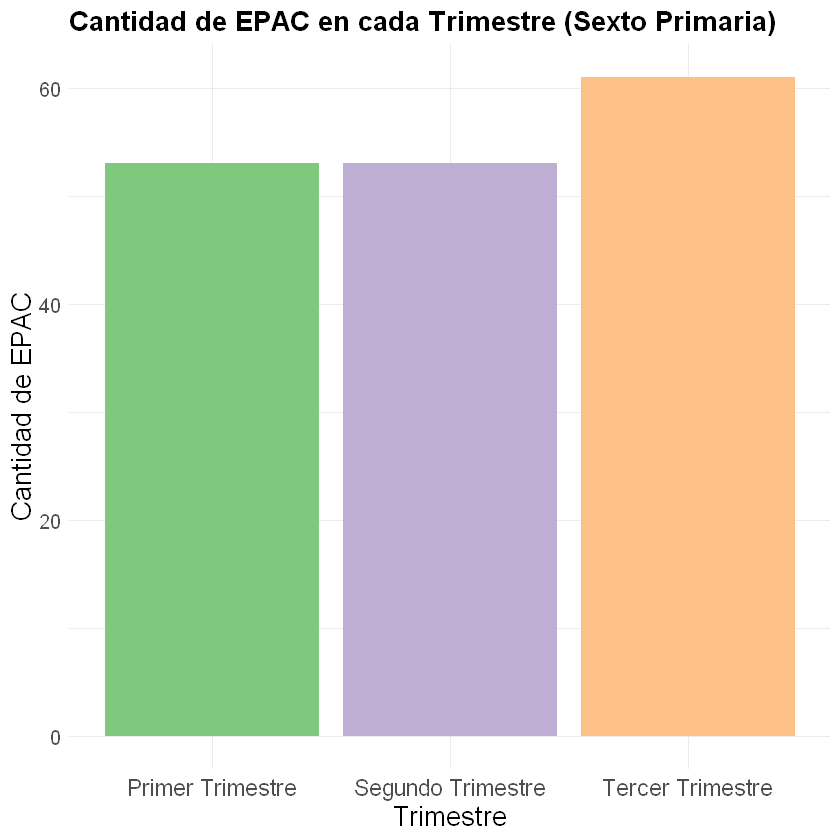

In [873]:
# Contar la cantidad de "EPAC" en cada trimestre para Sexto de Primaria
epac_counts_6 <- data.frame(
  Trimestre = c("Primer Trimestre", "Segundo Trimestre", "Tercer Trimestre"),
  Cantidad = c(
    sum(sextoPrimaria$NotasPrimerTrimestre == "EPAC", na.rm = TRUE),
    sum(sextoPrimaria$NotasSegundoTrimestre == "EPAC", na.rm = TRUE),
    sum(sextoPrimaria$NotasTercerTrimestre == "EPAC", na.rm = TRUE)
  )
)

ggplot(epac_counts_6, aes(x = Trimestre, y = Cantidad, fill = Trimestre)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Accent") +
  labs(title = "Cantidad de EPAC en cada Trimestre (Sexto Primaria)",
       x = "Trimestre",
       y = "Cantidad de EPAC") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        plot.title = element_text(size = 16, face = "bold"),
        legend.position = "none")


#### Generalidades Primaria

`summarise()` has grouped output by 'Curso'. You can override using the `.groups` argument.


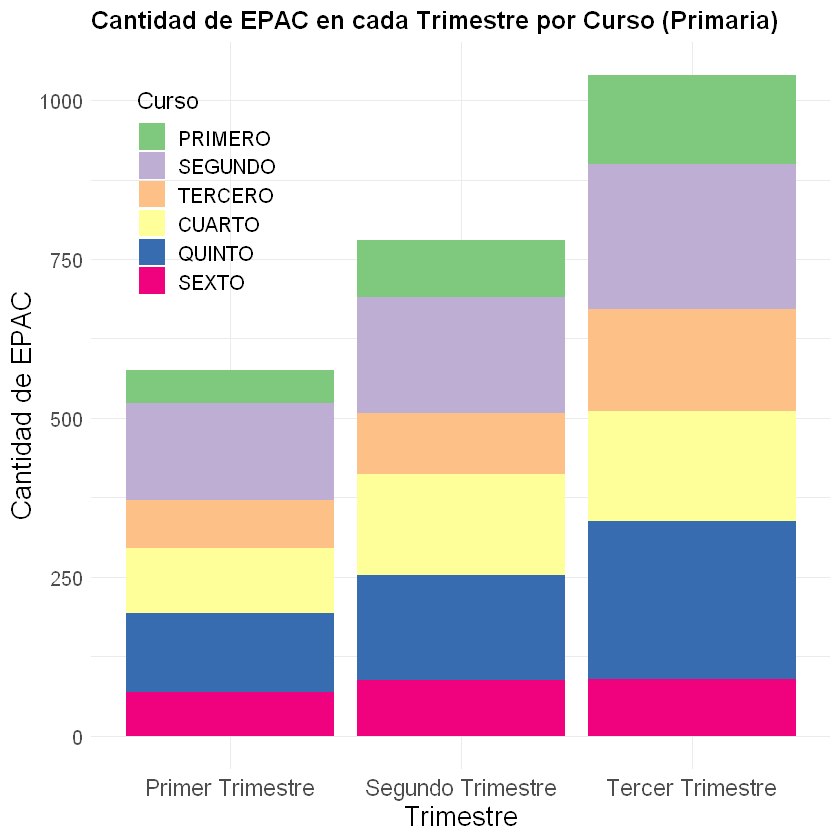

In [874]:
library(ggplot2)
library(dplyr)
library(tidyr)

# Reorganizar los datos para que los trimestres sean una sola columna
epac_counts_general <- nogoya_PRIMARIO %>%
  pivot_longer(cols = c(NotasPrimerTrimestre, NotasSegundoTrimestre, NotasTercerTrimestre), 
               names_to = "Trimestre", 
               values_to = "Notas") %>%
  mutate(Trimestre = recode(Trimestre, 
                            "NotasPrimerTrimestre" = "Primer Trimestre",
                            "NotasSegundoTrimestre" = "Segundo Trimestre",
                            "NotasTercerTrimestre" = "Tercer Trimestre")) %>%
  group_by(Curso, Trimestre) %>%
  summarise(Cantidad = sum(Notas == "EPAC", na.rm = TRUE)) %>%
  ungroup() 

# Ordenar los cursos en el factor para que aparezcan en orden
epac_counts_general$Curso <- factor(epac_counts_general$Curso, 
                                    levels = c("PRIMERO", "SEGUNDO", "TERCERO", 
                                               "CUARTO", "QUINTO", "SEXTO"))

# Crear el gráfico de barras apiladas con la paleta "Accent"
ggplot(epac_counts_general, aes(x = Trimestre, y = Cantidad, fill = Curso)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_brewer(palette = "Accent") +  # Usa la paleta Accent
  labs(title = "Cantidad de EPAC en cada Trimestre por Curso (Primaria)",
       x = "Trimestre",
       y = "Cantidad de EPAC",
       fill = "Curso") +  # Etiqueta de la leyenda
  theme_minimal() +
  theme(axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        plot.title = element_text(size = 15, face = "bold"),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12),
        legend.position = c(0.05, 0.95),  # Mueve la leyenda arriba a la izquierda
        legend.justification = c(0, 1))  # Alinea la leyenda en la esquina superior izquierda



### Secundaria ###

#### Primero Secundaria ####

In [875]:
# Filtrar para secundaria y las materias troncales seleccionadas
primeroSecundaria <- nogoya_SECUNDARIO %>%
  filter(NivelEnsenanza == "SECUNDARIO",  # Filtrar para Secundaria
         Curso == "PRIMERO",  # Aseguramos que sea Segundo (ajustar si es otro curso)
         Asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "HISTORIA", "BIOLOGIA", "GEOGRAFIA", "FISICO QUIMICA", "EDUCACION FISICA", "LENGUAS EXTRANJERAS")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura
table(primeroSecundaria$Condicion)



   APROBADO DESAPROBADO 
       2484        1033 

In [876]:
head(primeroSecundaria)

CUE,Localidad,EsPrivada,Turno,Curso,Documento,Asignatura,NivelEnsenanza,ModEnsenanza,AnioLectivo,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre,Promedio,Condicion,Desempeño
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,BIOLOGIA,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO,Aprobado
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,EDUCACION FISICA,SECUNDARIO,Comun,2023,7,7,8,7.33,APROBADO,Bueno
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,HISTORIA,SECUNDARIO,Comun,2023,6,6,7,6.33,APROBADO,Aprobado
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,LENGUA Y LITERATURA,SECUNDARIO,Comun,2023,7,7,8,7.33,APROBADO,Bueno
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,LENGUAS EXTRANJERAS,SECUNDARIO,Comun,2023,6,7,7,6.67,APROBADO,Aprobado
9005505,NOGOYÁ,N,MAÑANA,PRIMERO,41753180,MATEMATICA,SECUNDARIO,Comun,2023,6,6,6,6.00,APROBADO,Aprobado


In [877]:
# Crear tabla de frecuencias por materia y condición
tabla_condicionesS1 <- primeroSecundaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condicionesS1

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
BIOLOGIA,334,140,70.46414,29.53586
EDUCACION FISICA,398,83,82.74428,17.25572
FISICO QUIMICA,218,95,69.64856,30.35144
GEOGRAFIA,295,130,69.41176,30.58824
HISTORIA,315,124,71.75399,28.24601
LENGUA Y LITERATURA,309,164,65.32770,34.67230
LENGUAS EXTRANJERAS,317,133,70.44444,29.55556
MATEMATICA,298,164,64.50216,35.49784


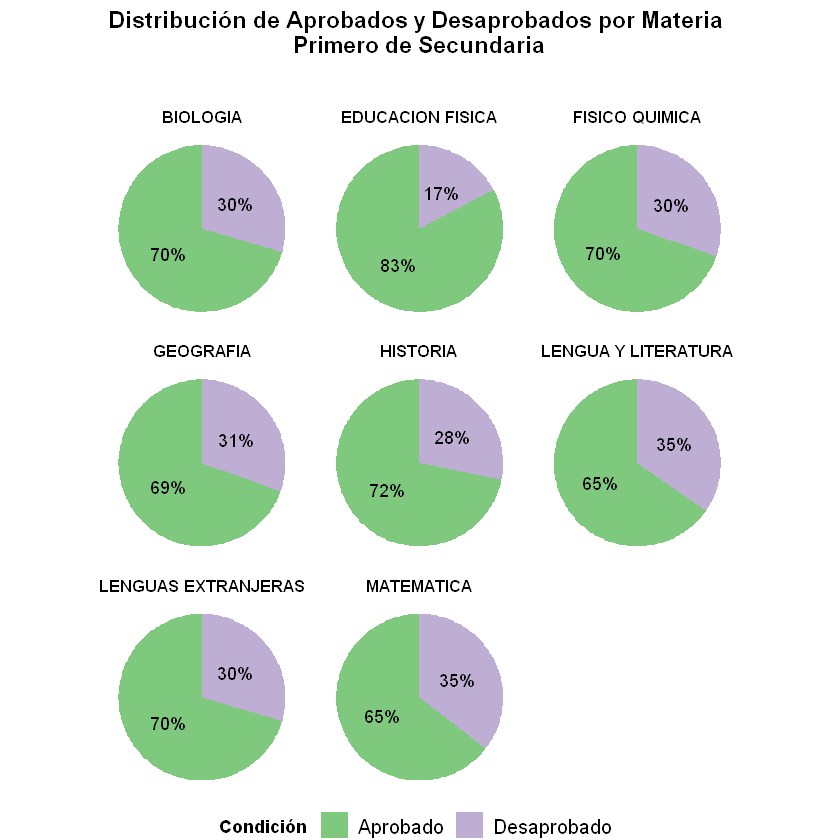

In [878]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_longS1 <- tabla_condicionesS1 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_longS1, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Materia \n Primero de Secundaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 10),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )

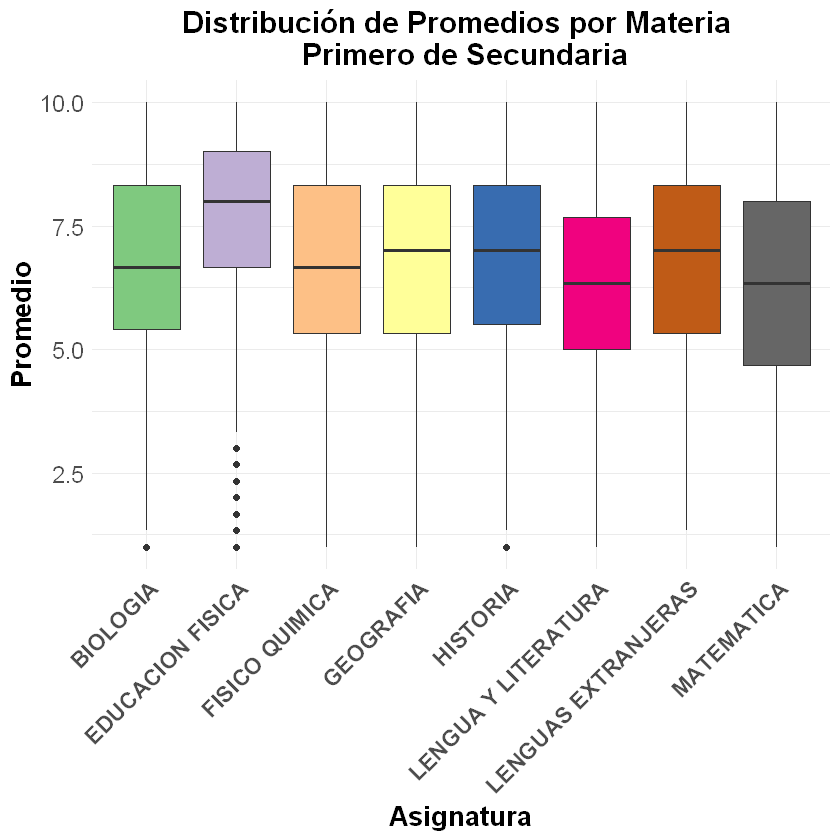

In [879]:
primeroSecundaria$Promedio <- as.numeric(primeroSecundaria$Promedio)

ggplot(primeroSecundaria, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Primero de Secundaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )


In [880]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignaturaS1 <- primeroSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )
# Mostrar las estadísticas calculadas
print(estadisticas_por_asignaturaS1)

# A tibble: 8 x 4
  Asignatura          Media Mediana  Moda
  <chr>               <dbl>   <dbl> <dbl>
1 BIOLOGIA             6.64    6.67     6
2 EDUCACION FISICA     7.45    8        8
3 FISICO QUIMICA       6.60    6.67     6
4 GEOGRAFIA            6.65    7        6
5 HISTORIA             6.70    7        6
6 LENGUA Y LITERATURA  6.32    6.33     6
7 LENGUAS EXTRANJERAS  6.76    7        6
8 MATEMATICA           6.21    6.33     6


In [881]:
summary_por_asignaturaS1 <- primeroSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignaturaS1)

# A tibble: 8 x 7
  Asignatura            Min    Q1 Mediana Media    Q3   Max
  <chr>               <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 BIOLOGIA             1     5.42    6.67  6.64  8.33    10
2 EDUCACION FISICA     1     6.67    8     7.45  9       10
3 FISICO QUIMICA       1     5.33    6.67  6.60  8.33    10
4 GEOGRAFIA            1     5.33    7     6.65  8.33    10
5 HISTORIA             1     5.5     7     6.70  8.33    10
6 LENGUA Y LITERATURA  1     5       6.33  6.32  7.67    10
7 LENGUAS EXTRANJERAS  1.33  5.33    7     6.76  8.33    10
8 MATEMATICA           1     4.67    6.33  6.21  8       10


In [882]:
# Aplicar la función a los aprobados
ks_resultadosS1 <- realizar_ks_test(primeroSecundaria)

# Mostrar los resultados
print(ks_resultadosS1)

[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 8 x 2
  Asignatura          KS_p_value
  <chr>                    <dbl>
1 BIOLOGIA              2.41e- 2
2 EDUCACION FISICA      1.76e-11
3 FISICO QUIMICA        9.84e- 3
4 GEOGRAFIA             3.87e- 3
5 HISTORIA              1.05e- 3
6 LENGUA Y LITERATURA   8.45e- 3
7 LENGUAS EXTRANJERAS   1.49e- 4
8 MATEMATICA            3.04e- 3


Dado que todos los p-values son menores a 0.05, se rechaza la hipótesis nula (H₀) en todas las materias. Esto significa que las notas no siguen una distribución normal en ninguno de los casos. 


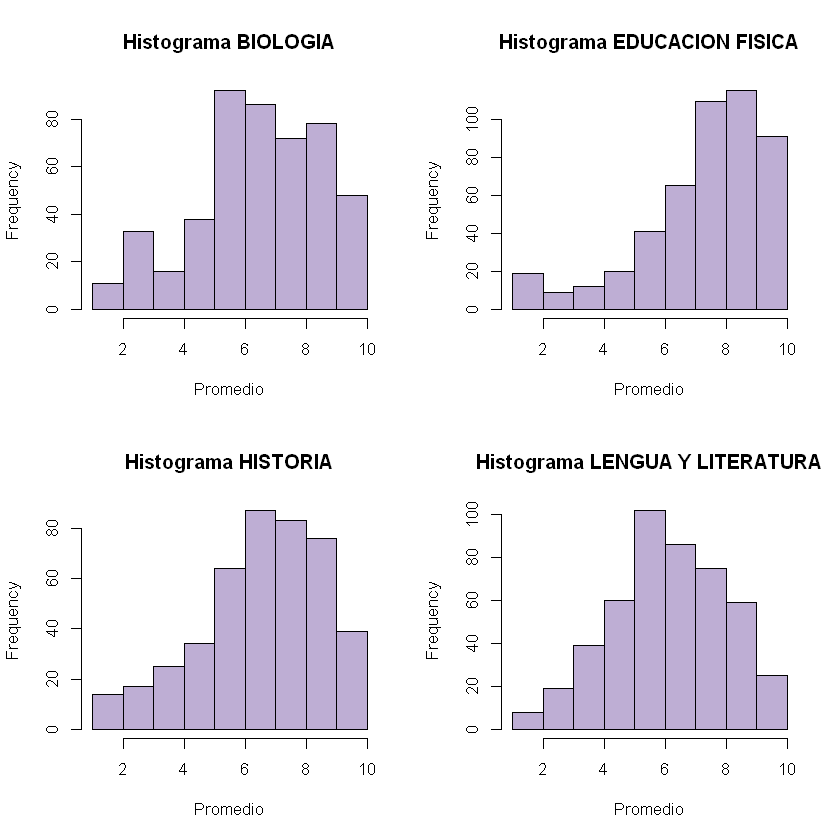

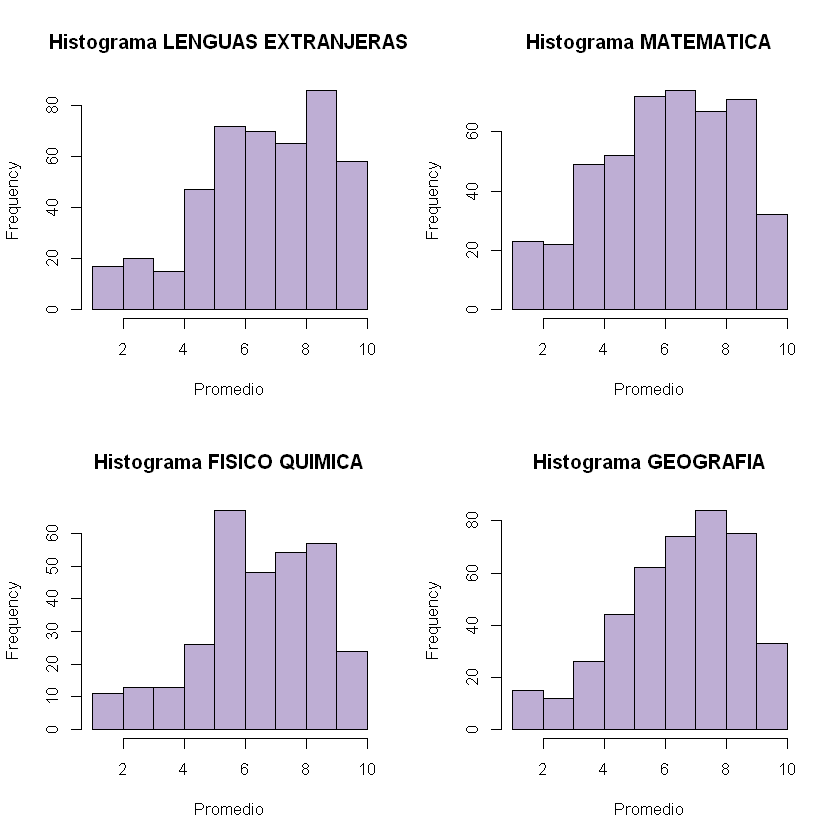

In [883]:
asignaturas <- unique(primeroSecundaria$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(primeroSecundaria, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma", materia),
       xlab = "Promedio", col = "#BEAED4", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos

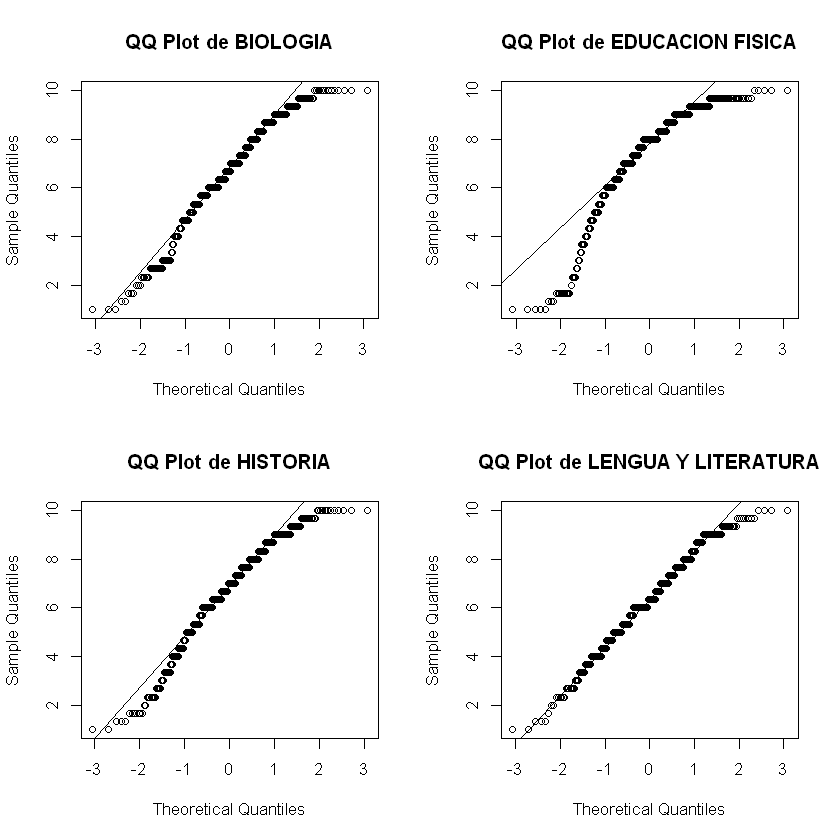

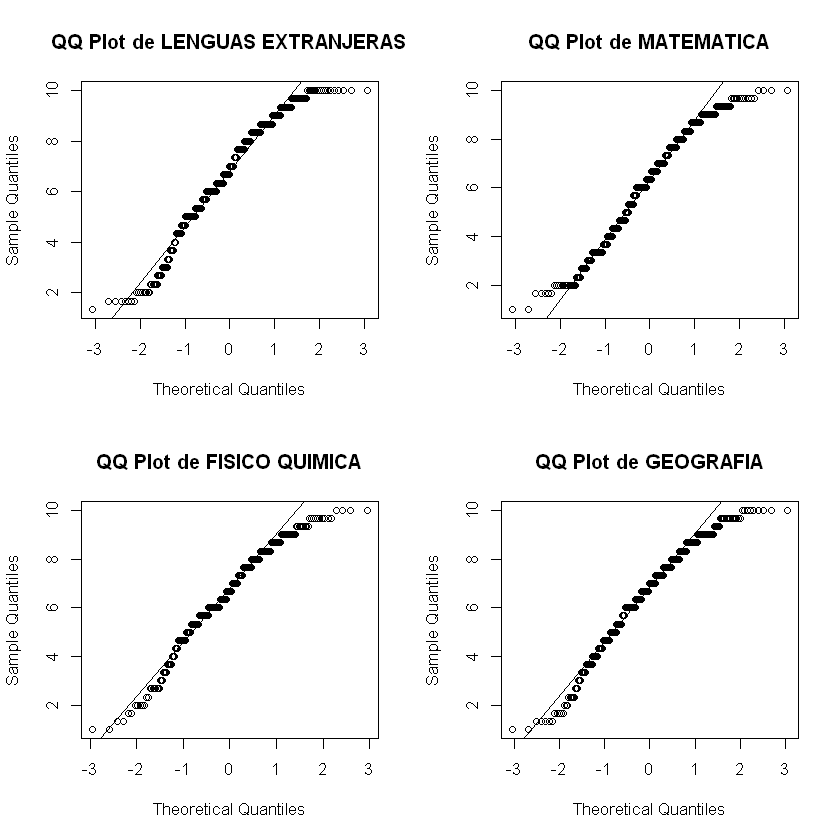

In [884]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(primeroSecundaria, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original

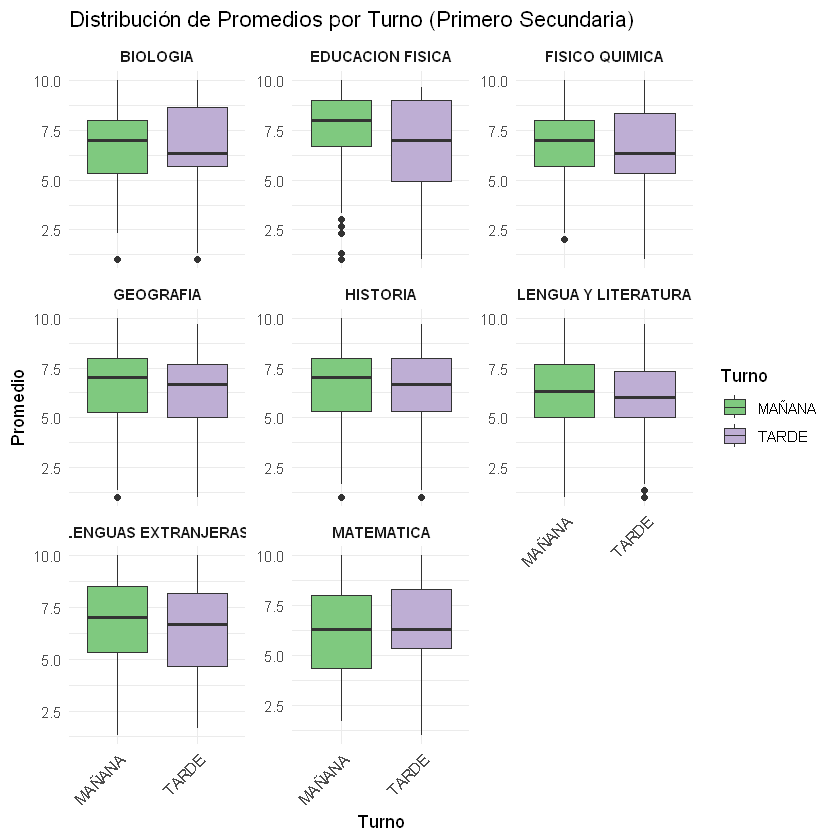

In [885]:
# Filtrar solo los turnos "Mañana" y "Tarde" de tu dataframe
primeroSecundaria_filtrado <- primeroSecundaria %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

# Crear el boxplot comparando promedios por turno para cada asignatura
ggplot(primeroSecundaria_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 2 filas
  labs(
    title = "Distribución de Promedios por Turno (Primero Secundaria)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() + 
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Mejorar la lectura del eje x
    strip.text = element_text(face = "bold", size = 9)  # Reducir el tamaño de la letra de las materias
  )




In [886]:
# Suponiendo que tu dataset es 'primeroSecundaria_filtrado'
# y que tiene las variables 'Asignatura', 'Turno' y 'Promedio'

# Función que realiza Kruskal-Wallis por asignatura y turno
kruskal_por_materia_y_turno <- function(data) {
  # Lista de asignaturas
  asignaturas <- unique(data$Asignatura)
  
  # Inicializar lista para guardar resultados
  resultados <- data.frame(Asignatura = character(), 
                           P_value = numeric(), 
                           stringsAsFactors = FALSE)
  
  # Iterar sobre cada asignatura
  for (asignatura in asignaturas) {
    # Filtrar datos para la asignatura en cuestión
    datos_asignatura <- subset(data, Asignatura == asignatura)
    
    # Realizar Kruskal-Wallis para comparar los promedios por Turno
    test_kruskal <- kruskal.test(Promedio ~ Turno, data = datos_asignatura)
    
    # Guardar el resultado (p-value) en el dataframe
    resultados <- rbind(resultados, 
                        data.frame(Asignatura = asignatura, 
                                   P_value = test_kruskal$p.value))
  }
  
  # Devolver el dataframe con los resultados
  return(resultados)
}

# Aplicar la función a tu dataset
resultados_kruskal <- kruskal_por_materia_y_turno(primeroSecundaria_filtrado)

# Ver los resultados
print(resultados_kruskal)


           Asignatura      P_value
1            BIOLOGIA 0.8751395211
2    EDUCACION FISICA 0.0004161973
3            HISTORIA 0.3567482751
4 LENGUA Y LITERATURA 0.2938107663
5 LENGUAS EXTRANJERAS 0.0304360032
6          MATEMATICA 0.5498141134
7      FISICO QUIMICA 0.4322203619
8           GEOGRAFIA 0.2365068944


In [887]:
# Comparar el desempeño en Educación Física entre Mañana y Tarde
turno_mañana <- primeroSecundaria_filtrado$Promedio[primeroSecundaria_filtrado$Turno == "MAÑANA" & primeroSecundaria_filtrado$Asignatura == "EDUCACION FISICA"]
turno_tarde <- primeroSecundaria_filtrado$Promedio[primeroSecundaria_filtrado$Turno == "TARDE" & primeroSecundaria_filtrado$Asignatura == "EDUCACION FISICA"]

# Realizar el test de Mann-Whitney (Wilcoxon) con hipótesis de que Mañana tiene mejor desempeño
resultado <- wilcox.test(turno_mañana, turno_tarde, alternative = "greater", paired = FALSE)

# Mostrar el resultado
resultado



	Wilcoxon rank sum test with continuity correction

data:  turno_mañana and turno_tarde
W = 19405, p-value = 0.0002085
alternative hypothesis: true location shift is greater than 0


In [888]:
# Filtrar los datos para la materia "LENGUAS EXTRANJERAS"
turno_mañana <- primeroSecundaria_filtrado$Promedio[primeroSecundaria_filtrado$Turno == "MAÑANA" & primeroSecundaria_filtrado$Asignatura == "LENGUAS EXTRANJERAS"]
turno_tarde <- primeroSecundaria_filtrado$Promedio[primeroSecundaria_filtrado$Turno == "TARDE" & primeroSecundaria_filtrado$Asignatura == "LENGUAS EXTRANJERAS"]

# Realizar el test de Wilcoxon con alternative = "greater" (ver si Mañana tiene mejor desempeño)
resultado_greater <- wilcox.test(turno_mañana, turno_tarde, alternative = "greater")
print(resultado_greater)


	Wilcoxon rank sum test with continuity correction

data:  turno_mañana and turno_tarde
W = 15666, p-value = 0.01524
alternative hypothesis: true location shift is greater than 0



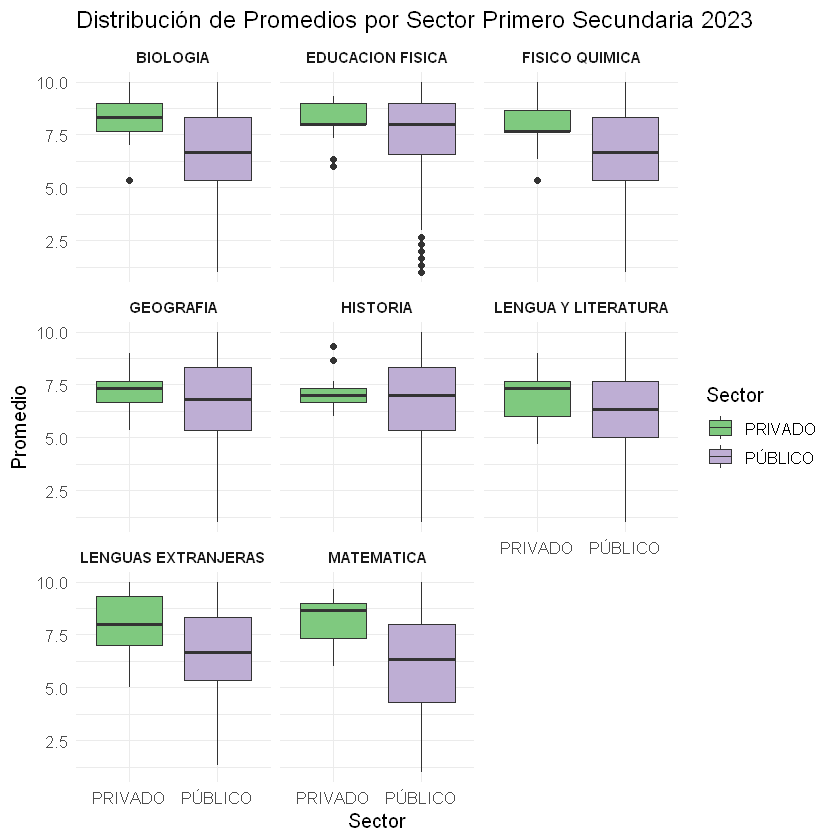

In [889]:
ggplot(primeroSecundaria, aes(x = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"), y = Promedio, fill = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"))) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Agrupar por asignatura
  scale_fill_brewer(palette = "Accent") +  # Usar paleta de colores "Accent"
  labs(title = "Distribución de Promedios por Sector Primero Secundaria 2023",
       x = "Sector",
       y = "Promedio",
       fill = "Sector") +  # Ajuste de la leyenda
  theme_minimal() +
  theme(
    legend.position = "right",  # Leyenda a la derecha
    text = element_text(size = 12),  # Aumentar el tamaño de la fuente en todo el gráfico
    strip.text = element_text(face = "bold", size = 9),  # Aumentar el tamaño de las etiquetas de las asignaturas
    axis.title = element_text(size = 12),  # Aumentar el tamaño de los títulos de los ejes
    axis.text = element_text(size = 10)  # Aumentar el tamaño del texto de los ejes
  )

In [890]:
# Función que realiza Kruskal-Wallis por asignatura y EsPrivada
kruskal_por_materia_y_privada <- function(data) {
  # Lista de asignaturas
  asignaturas <- unique(data$Asignatura)
  
  # Inicializar lista para guardar resultados
  resultados <- data.frame(Asignatura = character(), 
                           P_value = numeric(), 
                           stringsAsFactors = FALSE)
  
  # Iterar sobre cada asignatura
  for (asignatura in asignaturas) {
    # Filtrar datos para la asignatura en cuestión
    datos_asignatura <- subset(data, Asignatura == asignatura)
    
    # Realizar Kruskal-Wallis para comparar los promedios por EsPrivada
    test_kruskal <- kruskal.test(Promedio ~ EsPrivada, data = datos_asignatura)
    
    # Guardar el resultado (p-value) en el dataframe
    resultados <- rbind(resultados, 
                        data.frame(Asignatura = asignatura, 
                                   P_value = test_kruskal$p.value))
  }
  
  # Devolver el dataframe con los resultados
  return(resultados)
}

# Aplicar la función a tu dataset
resultados_kruskal_privada <- kruskal_por_materia_y_privada(primeroSecundaria)

# Ver los resultados
print(resultados_kruskal_privada)


           Asignatura      P_value
1            BIOLOGIA 0.0005985786
2    EDUCACION FISICA 0.3615809035
3            HISTORIA 0.5173982805
4 LENGUA Y LITERATURA 0.2464634893
5 LENGUAS EXTRANJERAS 0.0412384780
6          MATEMATICA 0.0001296700
7      FISICO QUIMICA 0.0044869641
8           GEOGRAFIA 0.2353127298


In [891]:
# Comparar desempeño en las 4 asignaturas entre Escuelas Privadas (S) y No Privadas (N)

# Asignaturas a comparar
asignaturas <- c("BIOLOGIA", "LENGUAS EXTRANJERAS", "MATEMATICA", "FISICO QUIMICA")

# Iterar sobre cada asignatura y realizar la prueba de Mann-Whitney
for (asignatura in asignaturas) {
  
  # Filtrar datos por asignatura y tipo de escuela
  esprivada_S <- primeroSecundaria$Promedio[primeroSecundaria$EsPrivada == "S" & primeroSecundaria$Asignatura == asignatura]
  esprivada_N <- primeroSecundaria$Promedio[primeroSecundaria$EsPrivada == "N" & primeroSecundaria$Asignatura == asignatura]
  
  # Realizar el test de Mann-Whitney con hipótesis de que las privadas tienen mejor desempeño
  resultado <- wilcox.test(esprivada_S, esprivada_N, alternative = "greater", paired = FALSE)
  
  # Imprimir el resultado para cada asignatura
  cat("Comparación de desempeño en", asignatura, "\n")
  print(resultado)
  cat("\n")  # Espacio entre resultados
}


Comparación de desempeño en BIOLOGIA 

	Wilcoxon rank sum test with continuity correction

data:  esprivada_S and esprivada_N
W = 5785, p-value = 0.0003003
alternative hypothesis: true location shift is greater than 0


Comparación de desempeño en LENGUAS EXTRANJERAS 

	Wilcoxon rank sum test with continuity correction

data:  esprivada_S and esprivada_N
W = 4752.5, p-value = 0.02067
alternative hypothesis: true location shift is greater than 0


Comparación de desempeño en MATEMATICA 

	Wilcoxon rank sum test with continuity correction

data:  esprivada_S and esprivada_N
W = 5847.5, p-value = 6.508e-05
alternative hypothesis: true location shift is greater than 0


Comparación de desempeño en FISICO QUIMICA 

	Wilcoxon rank sum test with continuity correction

data:  esprivada_S and esprivada_N
W = 3545.5, p-value = 0.002253
alternative hypothesis: true location shift is greater than 0




In [892]:

# Cargar la librería necesaria para la potencia
library(pwr)

# Filtrar por cada asignatura y aplicar el test de Friedman
asignaturas1 <- unique(primeroSecundaria$Asignatura)  # Lista de asignaturas únicas

for (asignatura in asignaturas1) {
  # Filtrar datos para la asignatura específica
  datos_asignatura1 <- subset(primeroSecundaria, Asignatura == asignatura)
  
  # Realizar el Test de Friedman
  resultado_friedman <- friedman.test(y = as.matrix(datos_asignatura1[, c("NotasPrimerTrimestre", 
                                                                         "NotasSegundoTrimestre", 
                                                                         "NotasTercerTrimestre")]))
  
  # Calcular la potencia del test
  n <- nrow(datos_asignatura1)  # Número de estudiantes en la asignatura
  k <- 3  # Número de trimestres
  f <- sqrt(resultado_friedman$statistic / (n * (k - 1)))  # Estimación del tamaño del efecto
  potencia <- pwr.anova.test(k = k, n = n, f = f, sig.level = 0.05)$power
  
  # Mostrar resultados
  cat("Resultados para", asignatura, ":\n")
  print(resultado_friedman)
  cat("Potencia del test:", round(potencia, 4), "\n\n")
}




Resultados para BIOLOGIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura1[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 26.594, df = 2, p-value = 1.679e-06

Potencia del test: 1 

Resultados para EDUCACION FISICA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura1[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 27.122, df = 2, p-value = 1.29e-06

Potencia del test: 1 

Resultados para HISTORIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura1[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 1.322, df = 2, p-value = 0.5163

Potencia del test: 0.2235 

Resultados para LENGUA Y LITERATURA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura1[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 5.2267, df = 2, p-value = 0.07329

Potenc

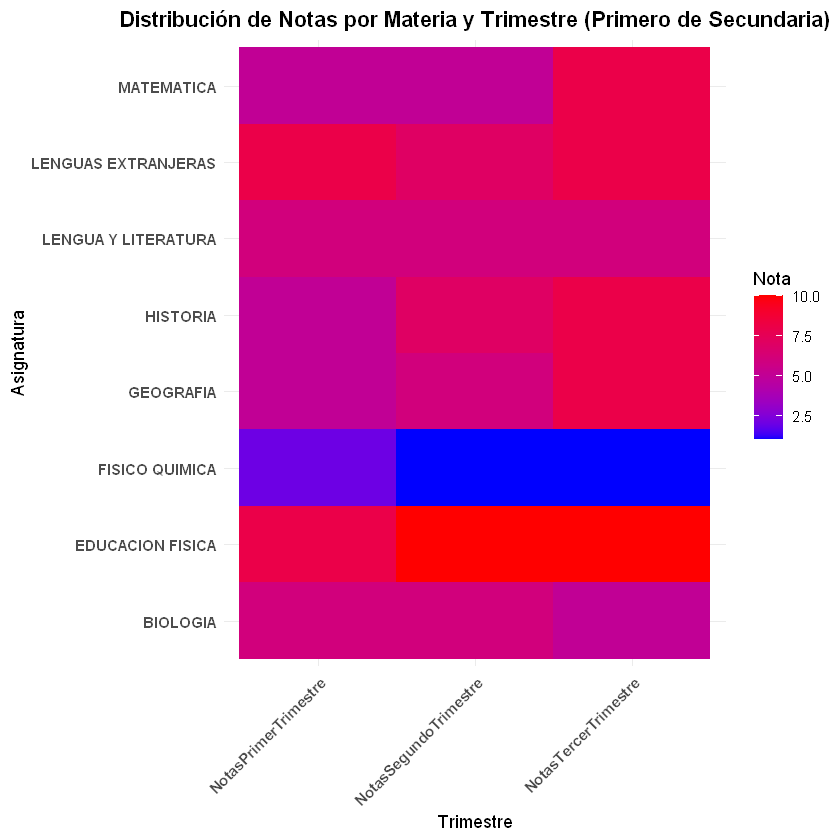

In [893]:
# Instalar e cargar las librerías necesarias
install.packages("ggplot2")
install.packages("reshape2")
library(ggplot2)
library(reshape2)

# Supongamos que tienes el dataframe 'primeroSecundaria'
# Convertir los datos a formato largo usando melt()
primeroSecundaria_long <- melt(primeroSecundaria, 
                               id.vars = c("Asignatura"), 
                               measure.vars = c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre"))

# Crear el heatmap
ggplot(primeroSecundaria_long, aes(x = variable, y = Asignatura, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red") +  # Colores de menor a mayor
  labs(title = "Distribución de Notas por Materia y Trimestre (Primero de Secundaria)",
       x = "Trimestre",
       y = "Asignatura",
       fill = "Nota") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold"),  # Ejes X en negrita
    axis.text.y = element_text(face = "bold"),  # Ejes Y en negrita
    plot.title = element_text(hjust = 0.5, face = "bold")  # Título centrado y en negrita
  )

ggsave("mapacalor.png", width = 8, height = 6, dpi = 300)


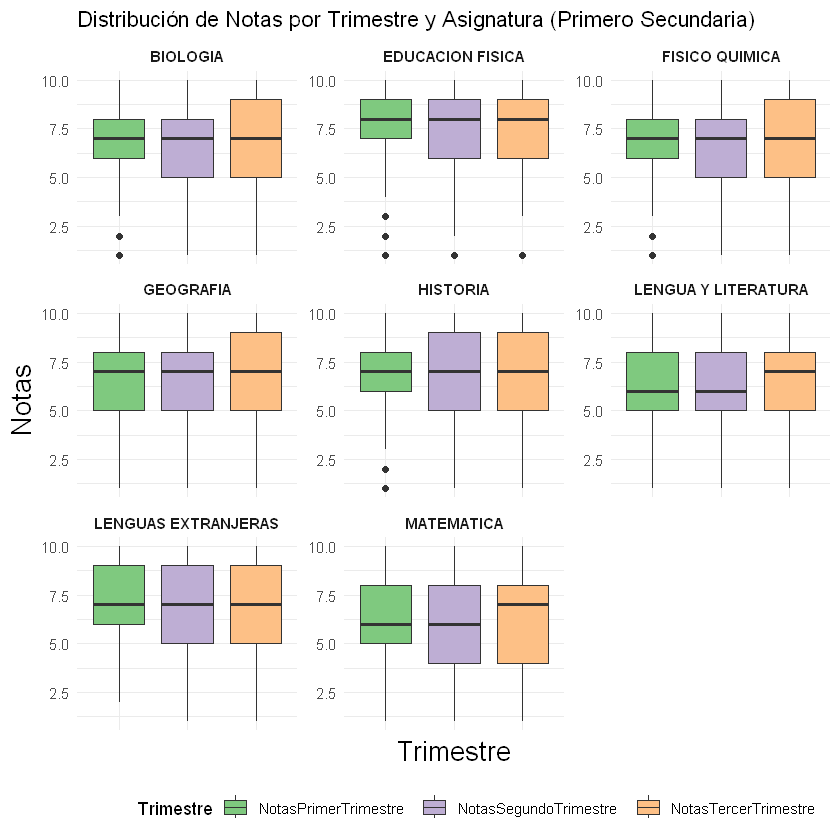

In [894]:
# Transformar los datos para poner los trimestres en una columna
primeroSecundaria_long <- primeroSecundaria %>%
  pivot_longer(cols = c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre"),
               names_to = "Trimestre", 
               values_to = "Notas")

# Crear el boxplot comparando las notas por trimestre y asignatura
ggplot(primeroSecundaria_long, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 3 columnas
  labs(
    title = "Distribución de Notas por Trimestre y Asignatura (Primero Secundaria)",
    x = "Trimestre",
    y = "Notas"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() + 
  theme(
    axis.text.x = element_blank(),  # Eliminar los valores del eje X
    axis.title.x = element_text(size = 16),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16),  # Tamaño del título del eje Y
    strip.text = element_text(face = "bold", size = 9),  # Reducir el tamaño de la letra de las materias
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.direction = "horizontal",  # Alinear la leyenda horizontalmente
    legend.justification = "right"  # Colocar la leyenda a la derecha
  )



In [895]:
primeroSecundaria_tabla <- primeroSecundaria %>%
  select(Asignatura, NotasPrimerTrimestre, NotasSegundoTrimestre, NotasTercerTrimestre)

# Ver el dataset filtrado
head(primeroSecundaria_tabla)

Asignatura,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,6,7,7
EDUCACION FISICA,7,7,8
HISTORIA,6,6,7
LENGUA Y LITERATURA,7,7,8
LENGUAS EXTRANJERAS,6,7,7
MATEMATICA,6,6,6


In [896]:
# Calcular los promedios por asignatura
promedios_por_asignatura_primero <- primeroSecundaria_tabla %>%
  group_by(Asignatura) %>%
  summarise(
    PrimerTrimestre = mean(NotasPrimerTrimestre, na.rm = TRUE),
    SegundoTrimestre = mean(NotasSegundoTrimestre, na.rm = TRUE),
    TercerTrimestre = mean(NotasTercerTrimestre, na.rm = TRUE)
  )

# Verificamos cómo quedó el dataset
head(promedios_por_asignatura_primero)


Asignatura,PrimerTrimestre,SegundoTrimestre,TercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,6.909283,6.466245,6.537975
EDUCACION FISICA,7.407484,7.490644,7.444906
FISICO QUIMICA,6.782748,6.485623,6.533546
GEOGRAFIA,6.635294,6.736471,6.576471
HISTORIA,6.676538,6.699317,6.731207
LENGUA Y LITERATURA,6.473573,6.312896,6.160677


In [897]:
promedios_por_asignatura_primero

Asignatura,PrimerTrimestre,SegundoTrimestre,TercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,6.909283,6.466245,6.537975
EDUCACION FISICA,7.407484,7.490644,7.444906
FISICO QUIMICA,6.782748,6.485623,6.533546
GEOGRAFIA,6.635294,6.736471,6.576471
HISTORIA,6.676538,6.699317,6.731207
LENGUA Y LITERATURA,6.473573,6.312896,6.160677
LENGUAS EXTRANJERAS,7.062222,6.684444,6.546667
MATEMATICA,6.363636,6.119048,6.151515


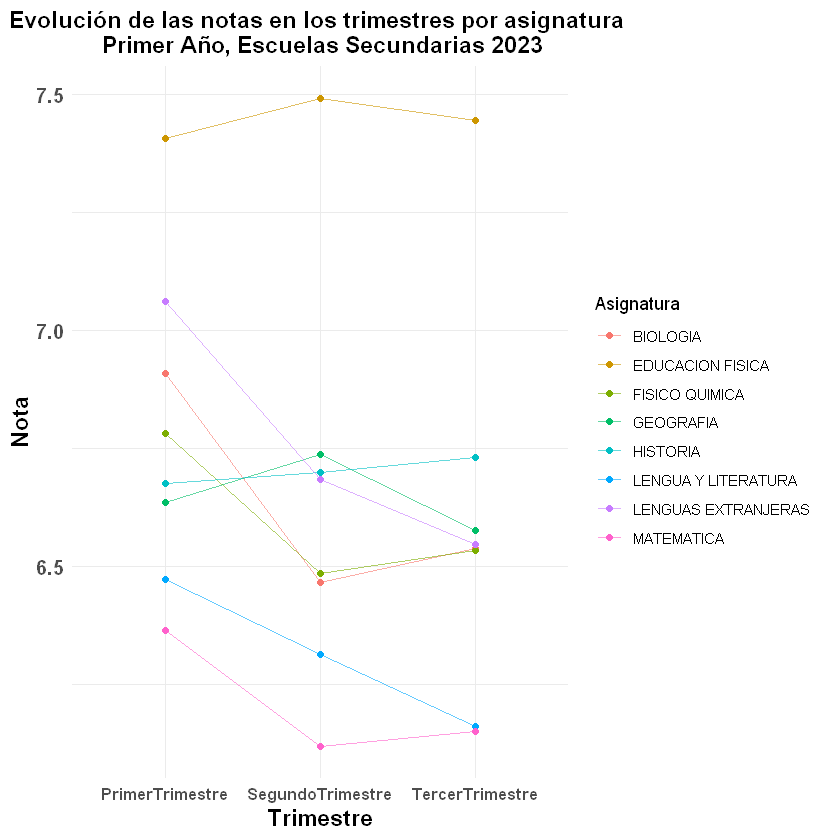

In [898]:
library(GGally)

ggparcoord(promedios_por_asignatura_primero, 
           columns = 2:4, 
           groupColumn = "Asignatura", 
           scale = "globalminmax", 
           alpha = 0.6, 
           showPoints = TRUE) +
  labs(title = "Evolución de las notas en los trimestres por asignatura \n Primer Año, Escuelas Secundarias 2023",  # Título dividido en dos líneas
       x = "Trimestre", 
       y = "Nota") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 14, face = "bold"),  # Eje X en negrita y más grande
    axis.title.y = element_text(size = 14, face = "bold"),  # Eje Y en negrita y más grande
    axis.text.x = element_text(size = 10, face = "bold"),   # Valores del eje X en negrita y más grandes
    axis.text.y = element_text(size = 12, face = "bold"),   # Valores del eje Y en negrita y más grandes
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5)  # Título en negrita, más grande y centrado
  )


#### Segundo Secundaria ####

In [899]:
# Filtrar para secundaria y las materias troncales seleccionadas
segundoSecundaria <- nogoya_SECUNDARIO %>%
  filter(NivelEnsenanza == "SECUNDARIO",  # Filtrar para Secundaria
         Curso == "SEGUNDO",  # Aseguramos que sea Segundo (ajustar si es otro curso)
         Asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "HISTORIA", "BIOLOGIA", "GEOGRAFIA", "FISICO QUIMICA", "EDUCACION FISICA", "LENGUAS EXTRANJERAS")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura
table(segundoSecundaria$Condicion)



   APROBADO DESAPROBADO 
       2289        1115 

In [900]:
# Crear tabla de frecuencias por materia y condición
tabla_condicionesS2 <- segundoSecundaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condicionesS2

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
BIOLOGIA,300,136,68.80734,31.19266
EDUCACION FISICA,385,54,87.69932,12.30068
FISICO QUIMICA,234,99,70.27027,29.72973
GEOGRAFIA,284,173,62.14442,37.85558
HISTORIA,268,168,61.46789,38.53211
LENGUA Y LITERATURA,270,131,67.33167,32.66833
LENGUAS EXTRANJERAS,291,142,67.20554,32.79446
MATEMATICA,257,212,54.79744,45.20256


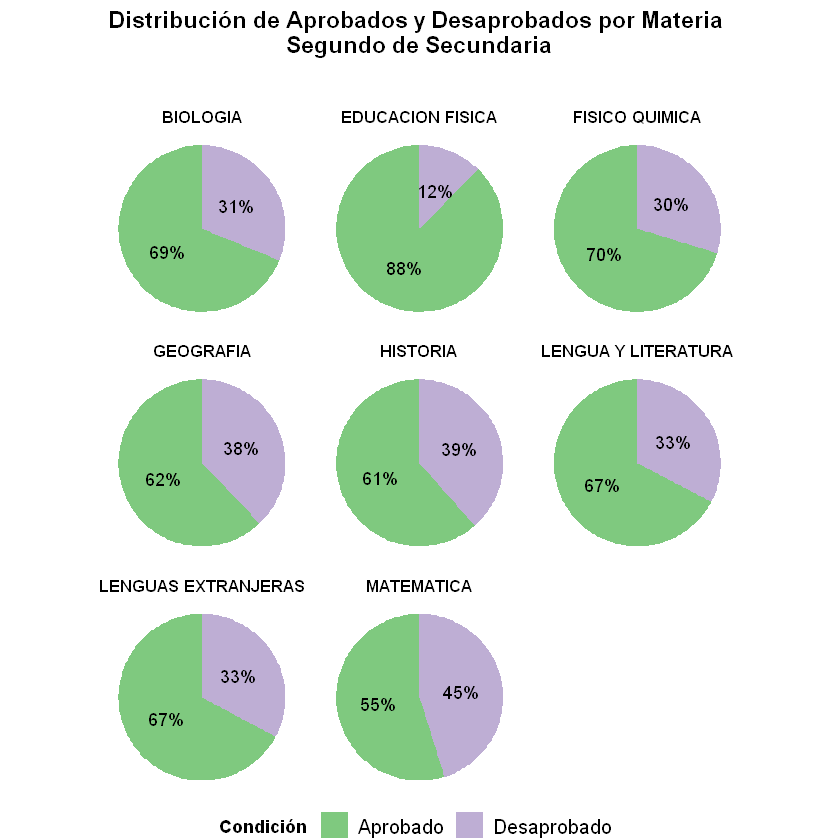

In [901]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_longS2 <- tabla_condicionesS2 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_longS2, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Materia \n Segundo de Secundaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 10),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )


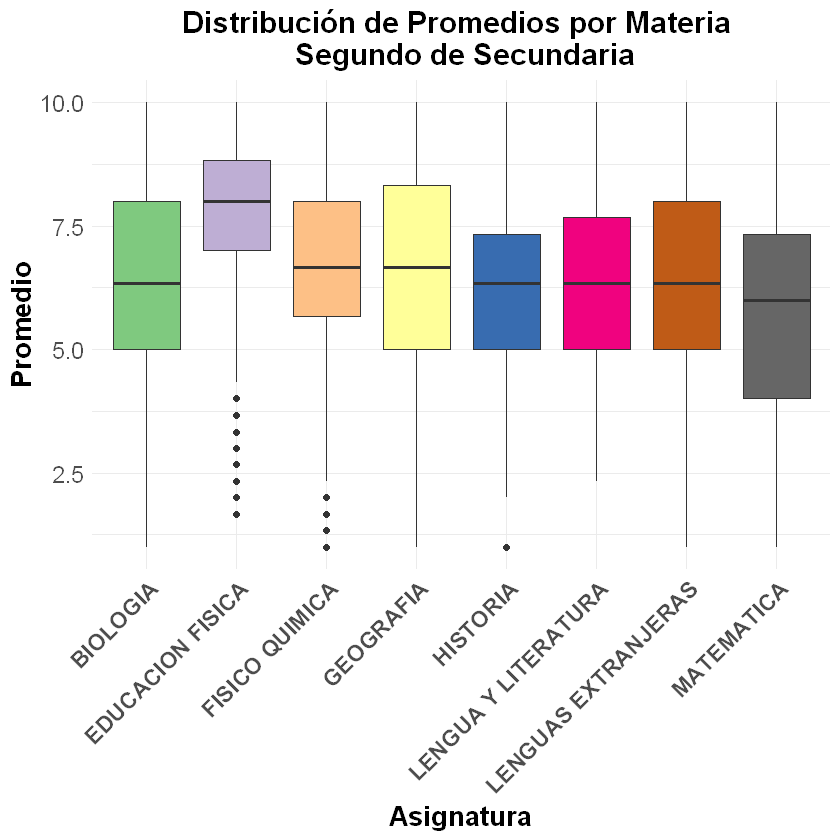

In [902]:
segundoSecundaria$Promedio <- as.numeric(segundoSecundaria$Promedio)

ggplot(segundoSecundaria, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Segundo de Secundaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )


In [903]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignaturaS2 <- segundoSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )
# Mostrar las estadísticas calculadas
print(estadisticas_por_asignaturaS2)


# A tibble: 8 x 4
  Asignatura          Media Mediana  Moda
  <chr>               <dbl>   <dbl> <dbl>
1 BIOLOGIA             6.37    6.33     6
2 EDUCACION FISICA     7.56    8        8
3 FISICO QUIMICA       6.56    6.67     6
4 GEOGRAFIA            6.43    6.67     6
5 HISTORIA             6.27    6.33     6
6 LENGUA Y LITERATURA  6.21    6.33     6
7 LENGUAS EXTRANJERAS  6.34    6.33     6
8 MATEMATICA           5.71    6        6


In [904]:
summary_por_asignaturaS2 <- segundoSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignaturaS2)

# A tibble: 8 x 7
  Asignatura            Min    Q1 Mediana Media    Q3   Max
  <chr>               <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 BIOLOGIA             1     5       6.33  6.37  8       10
2 EDUCACION FISICA     1.67  7       8     7.56  8.84    10
3 FISICO QUIMICA       1     5.67    6.67  6.56  8       10
4 GEOGRAFIA            1     5       6.67  6.43  8.33    10
5 HISTORIA             1     5       6.33  6.27  7.33    10
6 LENGUA Y LITERATURA  2.33  5       6.33  6.21  7.67    10
7 LENGUAS EXTRANJERAS  1     5       6.33  6.34  8       10
8 MATEMATICA           1     4       6     5.71  7.33    10


In [905]:
# Aplicar la función a los aprobados
ks_resultadosS2 <- realizar_ks_test(segundoSecundaria)

# Mostrar los resultados
print(ks_resultadosS2)

[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 8 x 2
  Asignatura          KS_p_value
  <chr>                    <dbl>
1 BIOLOGIA              1.68e- 4
2 EDUCACION FISICA      6.57e-12
3 FISICO QUIMICA        2.87e- 3
4 GEOGRAFIA             2.88e- 2
5 HISTORIA              9.47e- 4
6 LENGUA Y LITERATURA   2.21e- 4
7 LENGUAS EXTRANJERAS   6.81e- 4
8 MATEMATICA            1.19e- 2


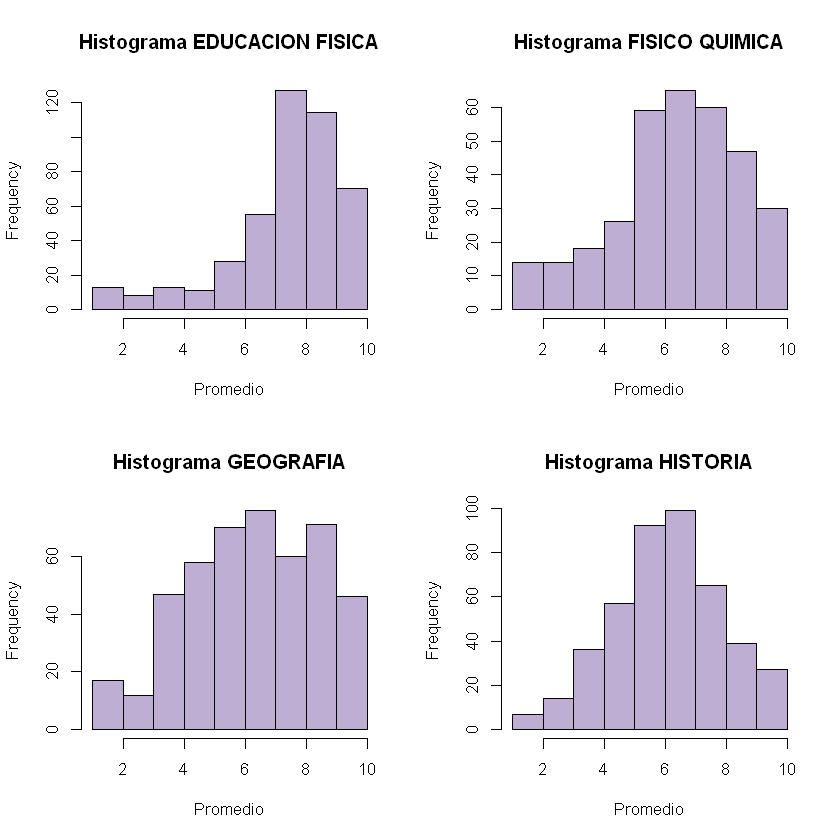

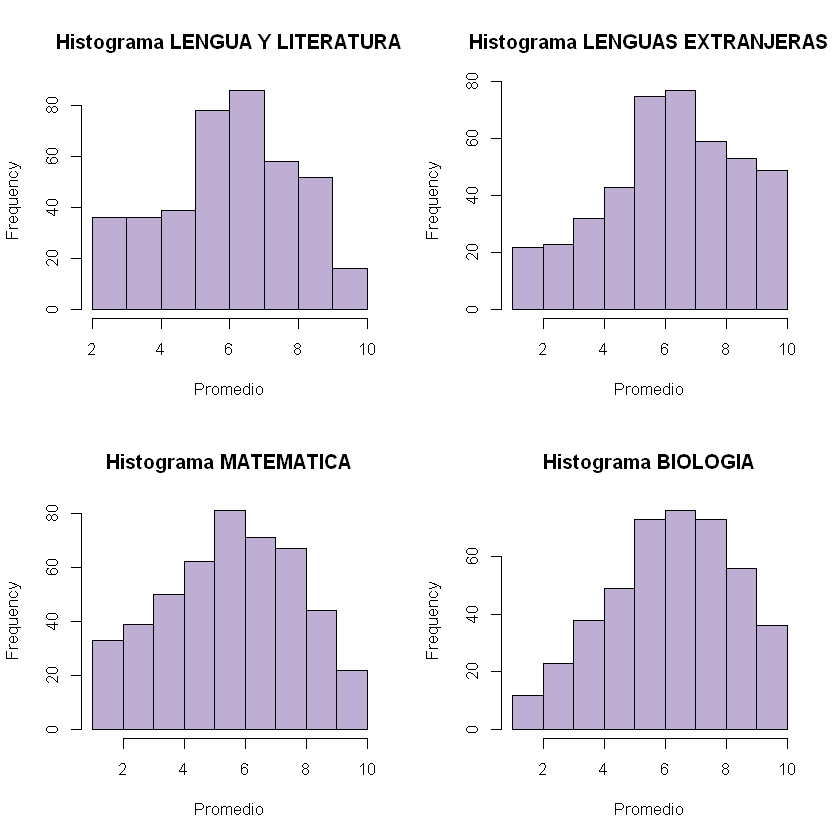

In [906]:
asignaturas <- unique(segundoSecundaria$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(segundoSecundaria, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma", materia),
       xlab = "Promedio", col = "#BEAED4", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos


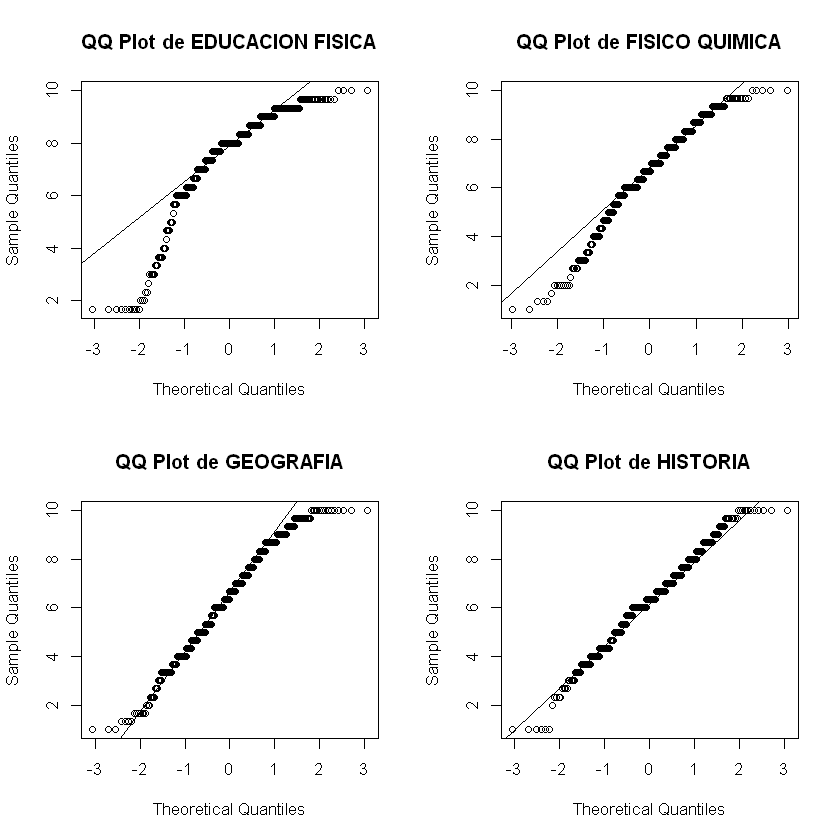

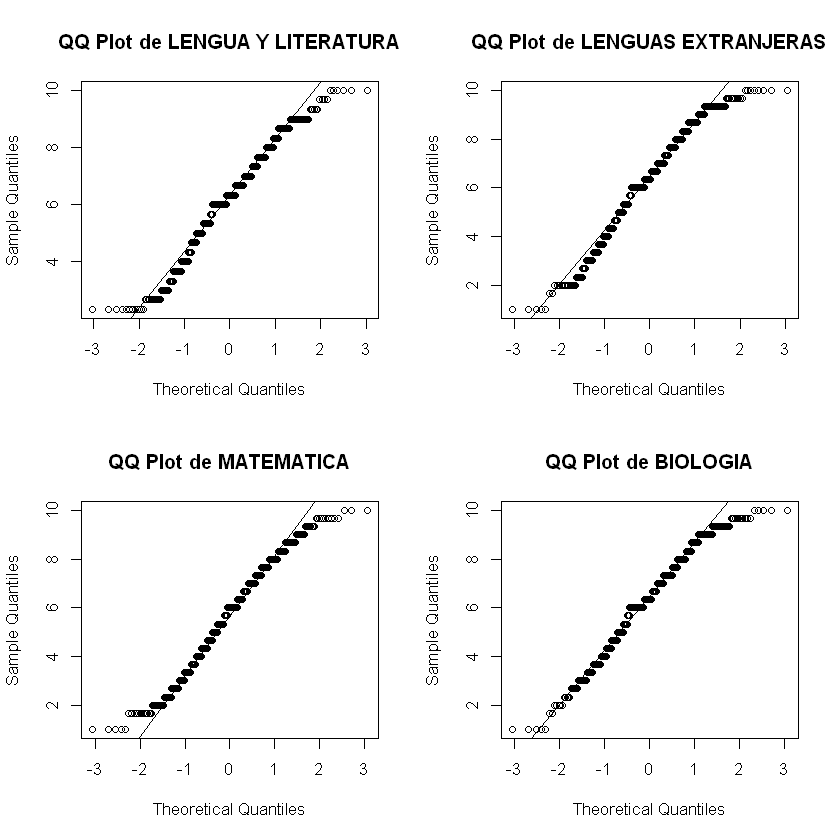

In [907]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(segundoSecundaria, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original


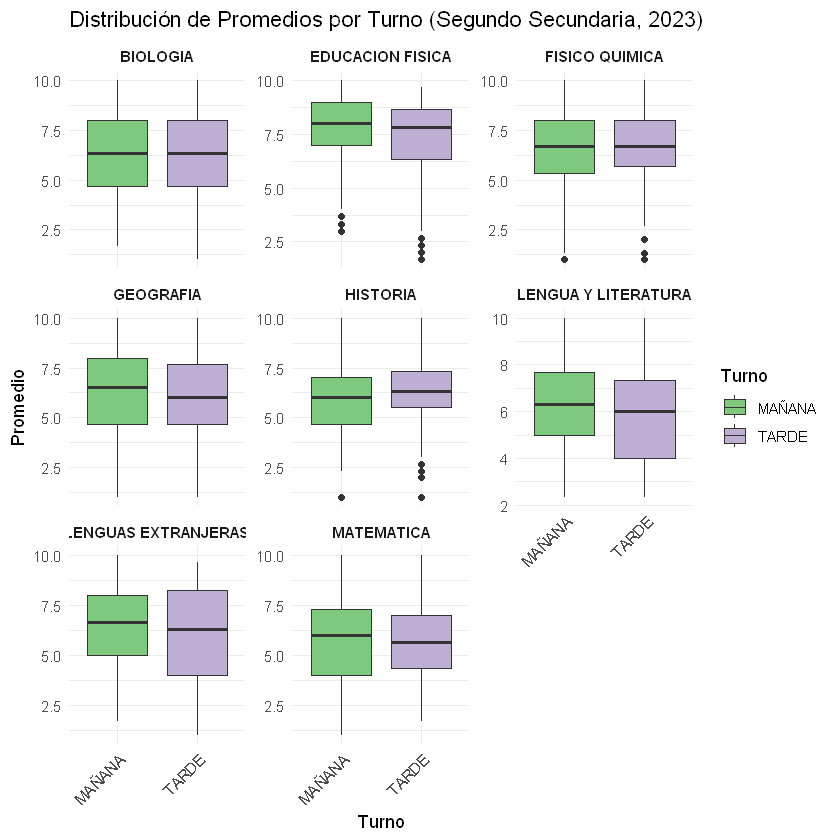

In [908]:
# Filtrar solo los turnos "Mañana" y "Tarde" de tu dataframe
segundoSecundaria_filtrado <- segundoSecundaria %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

# Crear el boxplot comparando promedios por turno para cada asignatura
ggplot(segundoSecundaria_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 2 filas
  labs(
    title = "Distribución de Promedios por Turno (Segundo Secundaria, 2023)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() + 
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),  # Mejorar la lectura del eje x
    strip.text = element_text(face = "bold", size = 9)  # Reducir el tamaño de la letra de las materias
  )



In [909]:
table(segundoSecundaria$EsPrivada)


   N 
3404 

In [910]:
# Aplicar la función a tu dataset
resultados_kruskal <- kruskal_por_materia_y_turno(segundoSecundaria_filtrado)

# Ver los resultados
print(resultados_kruskal)

           Asignatura    P_value
1    EDUCACION FISICA 0.12449561
2      FISICO QUIMICA 0.98101393
3           GEOGRAFIA 0.15173264
4            HISTORIA 0.08059443
5 LENGUA Y LITERATURA 0.02405625
6 LENGUAS EXTRANJERAS 0.07919828
7          MATEMATICA 0.51854767
8            BIOLOGIA 0.58057586


In [911]:
# Comparar el desempeño en Lengua y Literatura entre Mañana y Tarde en segundo año
turno_mañana <- segundoSecundaria_filtrado$Promedio[segundoSecundaria_filtrado$Turno == "MAÑANA" & segundoSecundaria_filtrado$Asignatura == "LENGUA Y LITERATURA"]
turno_tarde <- segundoSecundaria_filtrado$Promedio[segundoSecundaria_filtrado$Turno == "TARDE" & segundoSecundaria_filtrado$Asignatura == "LENGUA Y LITERATURA"]

# Realizar el test de Mann-Whitney (Wilcoxon) con hipótesis de que Mañana tiene mejor desempeño
resultado <- wilcox.test(turno_mañana, turno_tarde, alternative = "greater", paired = FALSE)

# Mostrar el resultado
print("Comparación de desempeño en LENGUA Y LITERATURA")
print(resultado)


[1] "Comparación de desempeño en LENGUA Y LITERATURA"

	Wilcoxon rank sum test with continuity correction

data:  turno_mañana and turno_tarde
W = 13196, p-value = 0.01205
alternative hypothesis: true location shift is greater than 0



In [912]:

# Filtrar por cada asignatura y aplicar el test de Friedman
asignaturas2 <- unique(segundoSecundaria$Asignatura)  # Lista de asignaturas únicas

for (asignatura in asignaturas2) {
  # Filtrar datos para la asignatura específica
  datos_asignatura2 <- subset(segundoSecundaria, Asignatura == asignatura)
  
  # Realizar el Test de Friedman
  resultado_friedman <- friedman.test(y = as.matrix(datos_asignatura2[, c("NotasPrimerTrimestre", 
                                                                         "NotasSegundoTrimestre", 
                                                                         "NotasTercerTrimestre")]))
  
  # Calcular la potencia del test
  n <- nrow(datos_asignatura2)  # Número de estudiantes en la asignatura
  k <- 3  # Número de trimestres
  f <- sqrt(resultado_friedman$statistic / (n * (k - 1)))  # Estimación del tamaño del efecto
  potencia <- pwr.anova.test(k = k, n = n, f = f, sig.level = 0.05)$power
  
  # Mostrar resultados
  cat("Resultados para", asignatura, ":\n")
  print(resultado_friedman)
  cat("Potencia del test:", round(potencia, 4), "\n\n")
}



Resultados para EDUCACION FISICA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura2[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 41.738, df = 2, p-value = 8.646e-10

Potencia del test: 1 

Resultados para FISICO QUIMICA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura2[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 2.0204, df = 2, p-value = 0.3641

Potencia del test: 0.3236 

Resultados para GEOGRAFIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura2[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 27.154, df = 2, p-value = 1.269e-06

Potencia del test: 1 

Resultados para HISTORIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura2[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 14.322, df = 2, p-value = 0.0007764

Potenc

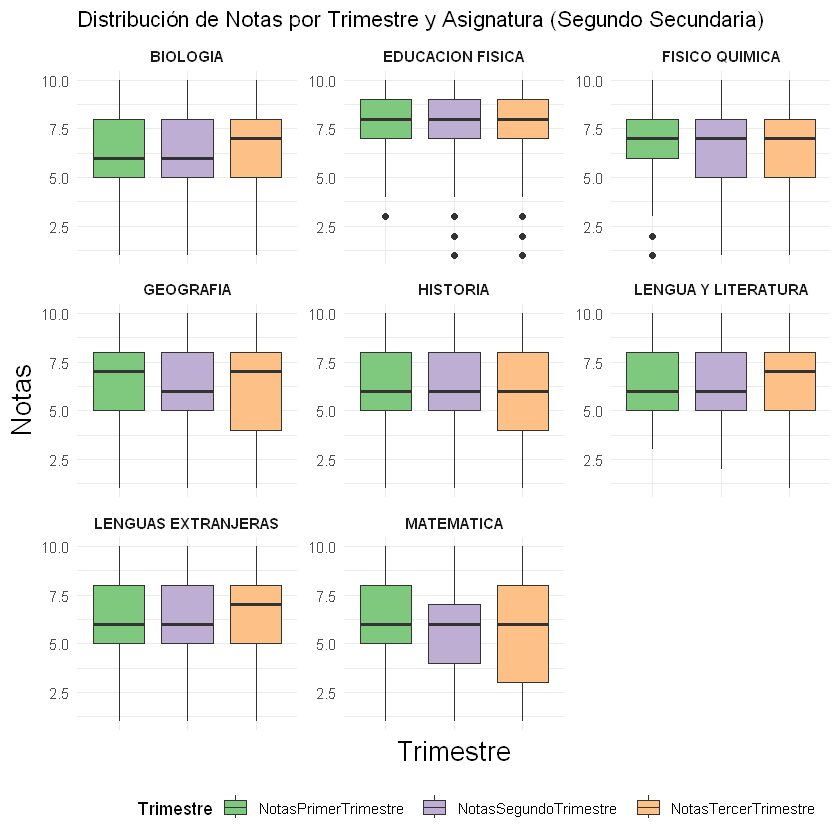

In [913]:
# Transformar los datos para poner los trimestres en una columna
segundoSecundaria_long <- segundoSecundaria %>%
  pivot_longer(cols = c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre"),
               names_to = "Trimestre", 
               values_to = "Notas")

# Crear el boxplot comparando las notas por trimestre y asignatura
ggplot(segundoSecundaria_long, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 3 columnas
  labs(
    title = "Distribución de Notas por Trimestre y Asignatura (Segundo Secundaria)",
    x = "Trimestre",
    y = "Notas"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() + 
  theme(
    axis.text.x = element_blank(),  # Eliminar los valores del eje X
    axis.title.x = element_text(size = 16),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16),  # Tamaño del título del eje Y
    strip.text = element_text(face = "bold", size = 9),  # Reducir el tamaño de la letra de las materias
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.direction = "horizontal",  # Alinear la leyenda horizontalmente
    legend.justification = "right"  # Colocar la leyenda a la derecha
  )

In [914]:
segundoSecundaria_tabla <- segundoSecundaria %>%
  select(Asignatura, NotasPrimerTrimestre, NotasSegundoTrimestre, NotasTercerTrimestre)

# Ver el dataset filtrado
head(segundoSecundaria_tabla)

Asignatura,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
EDUCACION FISICA,7,6,1
FISICO QUIMICA,4,4,4
GEOGRAFIA,5,5,4
HISTORIA,5,6,1
LENGUA Y LITERATURA,6,3,1
LENGUAS EXTRANJERAS,4,3,1


In [915]:
# Calcular los promedios por asignatura
promedios_por_asignatura_segundo <- segundoSecundaria_tabla %>%
  group_by(Asignatura) %>%
  summarise(
    PrimerTrimestre = mean(NotasPrimerTrimestre, na.rm = TRUE),
    SegundoTrimestre = mean(NotasSegundoTrimestre, na.rm = TRUE),
    TercerTrimestre = mean(NotasTercerTrimestre, na.rm = TRUE)
  )

# Verificamos cómo quedó el dataset
head(promedios_por_asignatura_segundo)


Asignatura,PrimerTrimestre,SegundoTrimestre,TercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,6.543578,6.169725,6.383028
EDUCACION FISICA,7.485194,7.539863,7.662870
FISICO QUIMICA,6.603604,6.573574,6.516517
GEOGRAFIA,6.656455,6.391685,6.236324
HISTORIA,6.454128,6.355505,5.988532
LENGUA Y LITERATURA,6.311721,6.044888,6.281796


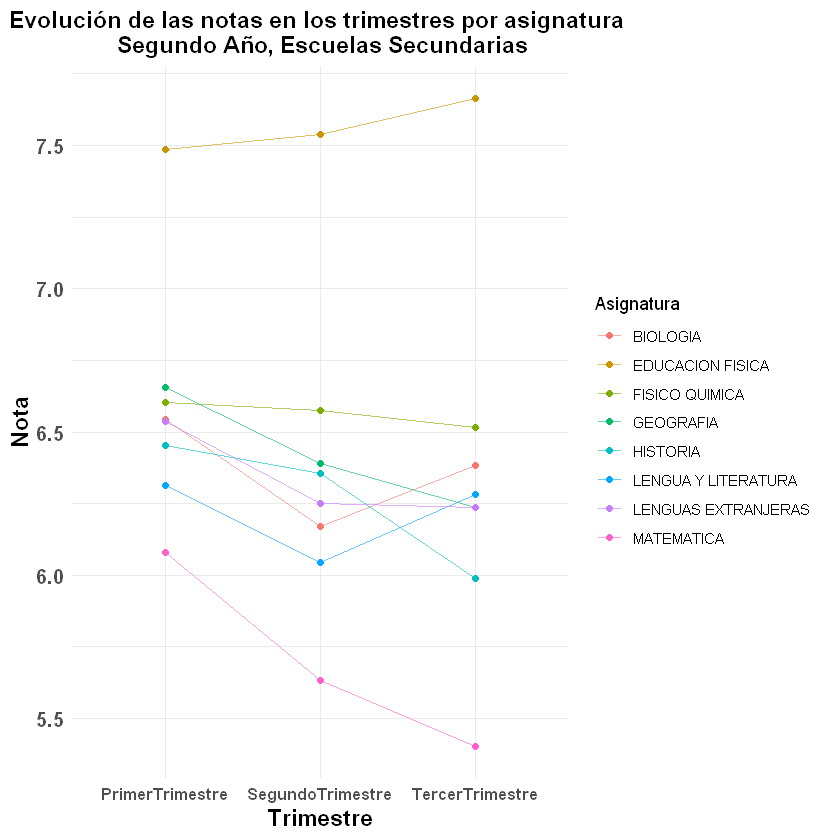

In [916]:
ggparcoord(promedios_por_asignatura_segundo, 
           columns = 2:4, 
           groupColumn = "Asignatura", 
           scale = "globalminmax", 
           alpha = 0.6, 
           showPoints = TRUE) +
  labs(title = "Evolución de las notas en los trimestres por asignatura \n Segundo Año, Escuelas Secundarias",  # Título dividido en dos líneas
       x = "Trimestre", 
       y = "Nota") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 14, face = "bold"),  # Eje X en negrita y más grande
    axis.title.y = element_text(size = 14, face = "bold"),  # Eje Y en negrita y más grande
    axis.text.x = element_text(size = 10, face = "bold"),   # Valores del eje X en negrita y más grandes
    axis.text.y = element_text(size = 12, face = "bold"),   # Valores del eje Y en negrita y más grandes
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5)  # Título en negrita, más grande y centrado
  )

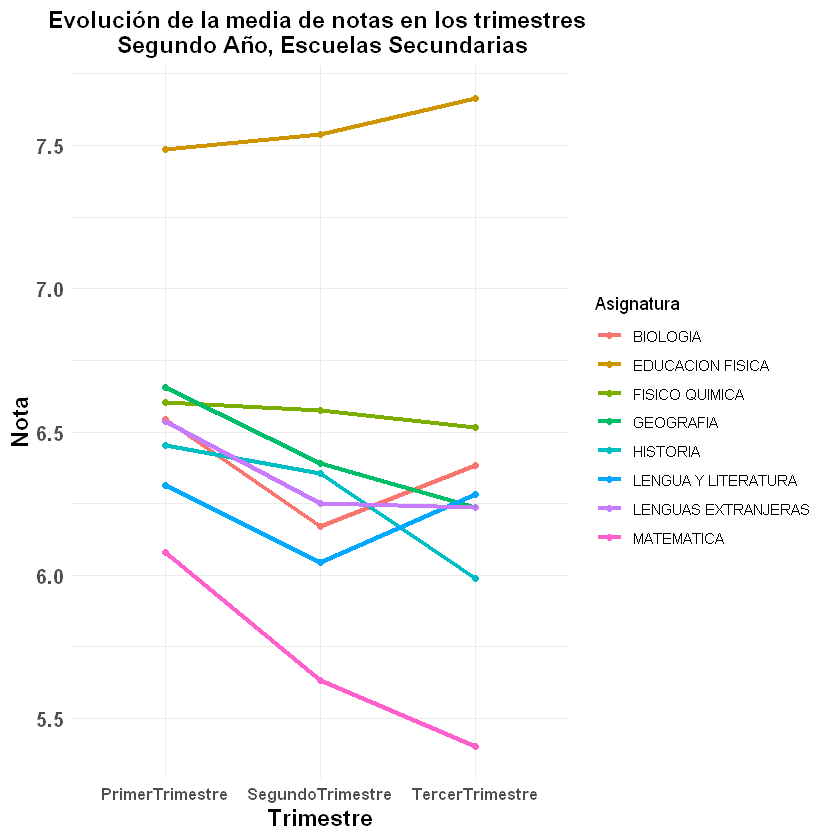

In [917]:
ggparcoord(promedios_por_asignatura_segundo, 
           columns = 2:4, 
           groupColumn = "Asignatura", 
           scale = "globalminmax", 
           alpha = 0.6, 
           showPoints = TRUE) +
  geom_line(size = 1.2) +  # Aumenta el grosor de las líneas
  labs(title = "Evolución de la media de notas en los trimestres \n Segundo Año, Escuelas Secundarias",  
       x = "Trimestre", 
       y = "Nota") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 14, face = "bold"),  
    axis.title.y = element_text(size = 14, face = "bold"),  
    axis.text.x = element_text(size = 10, face = "bold"),   
    axis.text.y = element_text(size = 12, face = "bold"),   
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5)  
  )
ggsave("grafico_trimestres.png", width = 8, height = 6, dpi = 300)


#### Tercero Secundaria ####

In [918]:
# Filtrar para secundaria y las materias troncales seleccionadas
terceroSecundaria <- nogoya_SECUNDARIO %>%
  filter(NivelEnsenanza == "SECUNDARIO",  # Filtrar para Secundaria
         Curso == "TERCERO",  # Aseguramos que sea Segundo (ajustar si es otro curso)
         Asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "HISTORIA", "BIOLOGIA", "GEOGRAFIA", "FISICO QUIMICA", "EDUCACION FISICA", "LENGUAS EXTRANJERAS")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura
table(terceroSecundaria$Condicion)


   APROBADO DESAPROBADO 
       2039         826 

In [919]:
# Crear tabla de frecuencias por materia y condición
tabla_condicionesS3 <- terceroSecundaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condicionesS3

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
BIOLOGIA,247,113,68.61111,31.38889
EDUCACION FISICA,329,48,87.26790,12.73210
FISICO QUIMICA,187,71,72.48062,27.51938
GEOGRAFIA,264,107,71.15903,28.84097
HISTORIA,271,113,70.57292,29.42708
LENGUA Y LITERATURA,275,104,72.55937,27.44063
LENGUAS EXTRANJERAS,239,98,70.91988,29.08012
MATEMATICA,227,172,56.89223,43.10777


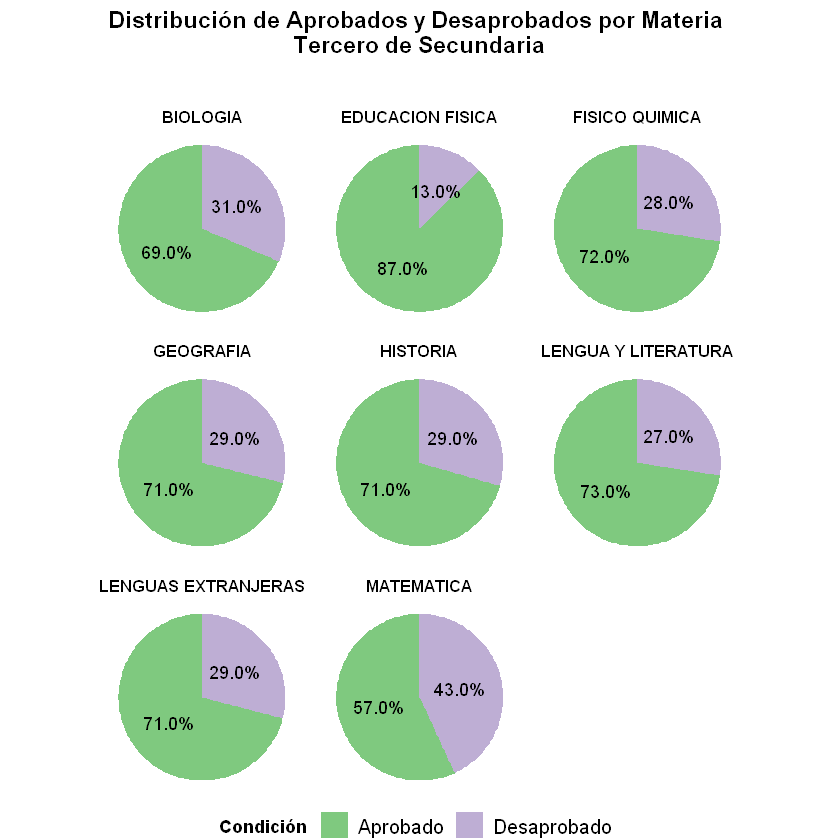

In [920]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_longS3 <- tabla_condicionesS3 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_longS3, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Materia \n Tercero de Secundaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 10),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )

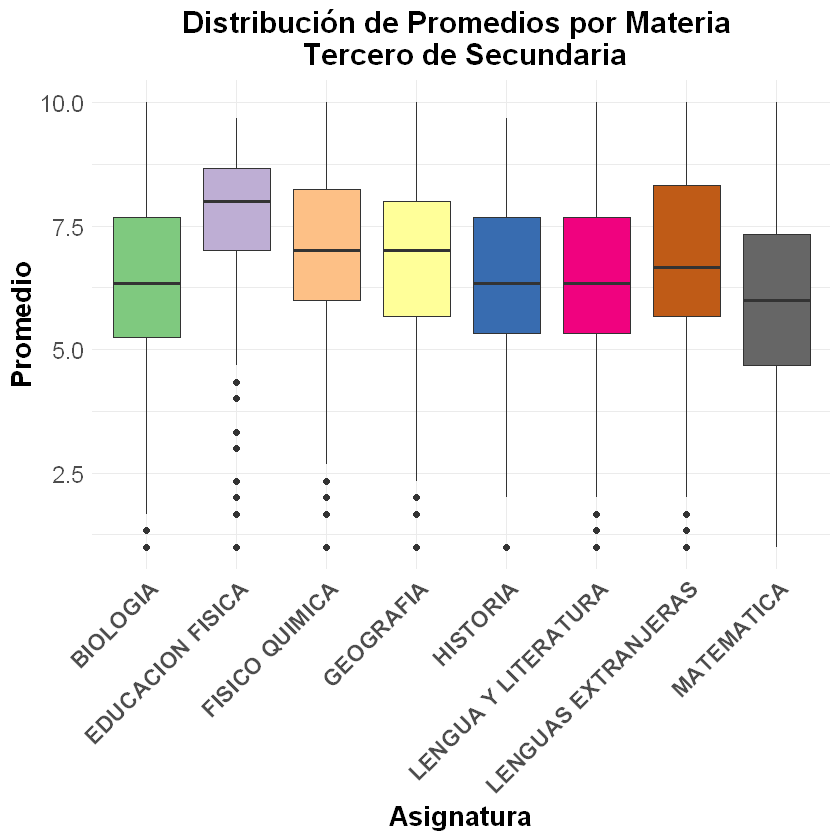

In [921]:
terceroSecundaria$Promedio <- as.numeric(terceroSecundaria$Promedio)
ggplot(terceroSecundaria, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Tercero de Secundaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )

In [922]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignaturaS3 <- terceroSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )
# Mostrar las estadísticas calculadas
print(estadisticas_por_asignaturaS3)


# A tibble: 8 x 4
  Asignatura          Media Mediana  Moda
  <chr>               <dbl>   <dbl> <dbl>
1 BIOLOGIA             6.44    6.33  6   
2 EDUCACION FISICA     7.43    8     8   
3 FISICO QUIMICA       6.78    7     8   
4 GEOGRAFIA            6.70    7     7.33
5 HISTORIA             6.31    6.33  6   
6 LENGUA Y LITERATURA  6.31    6.33  6   
7 LENGUAS EXTRANJERAS  6.61    6.67  6   
8 MATEMATICA           5.97    6     6   


In [923]:
summary_por_asignaturaS3 <- terceroSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignaturaS3)


# A tibble: 8 x 7
  Asignatura            Min    Q1 Mediana Media    Q3   Max
  <chr>               <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 BIOLOGIA                1  5.25    6.33  6.44  7.67 10   
2 EDUCACION FISICA        1  7       8     7.43  8.67  9.67
3 FISICO QUIMICA          1  6       7     6.78  8.25 10   
4 GEOGRAFIA               1  5.67    7     6.70  8    10   
5 HISTORIA                1  5.33    6.33  6.31  7.67  9.67
6 LENGUA Y LITERATURA     1  5.33    6.33  6.31  7.67 10   
7 LENGUAS EXTRANJERAS     1  5.67    6.67  6.61  8.33 10   
8 MATEMATICA              1  4.67    6     5.97  7.33 10   


In [924]:
# Aplicar la función a los aprobados
ks_resultadosS3 <- realizar_ks_test(terceroSecundaria)

# Mostrar los resultados
print(ks_resultadosS3)

[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 8 x 2
  Asignatura          KS_p_value
  <chr>                    <dbl>
1 BIOLOGIA              5.79e- 3
2 EDUCACION FISICA      7.77e-12
3 FISICO QUIMICA        5.45e- 3
4 GEOGRAFIA             5.69e- 4
5 HISTORIA              1.81e- 5
6 LENGUA Y LITERATURA   2.03e- 5
7 LENGUAS EXTRANJERAS   9.12e- 4
8 MATEMATICA            1.77e- 2


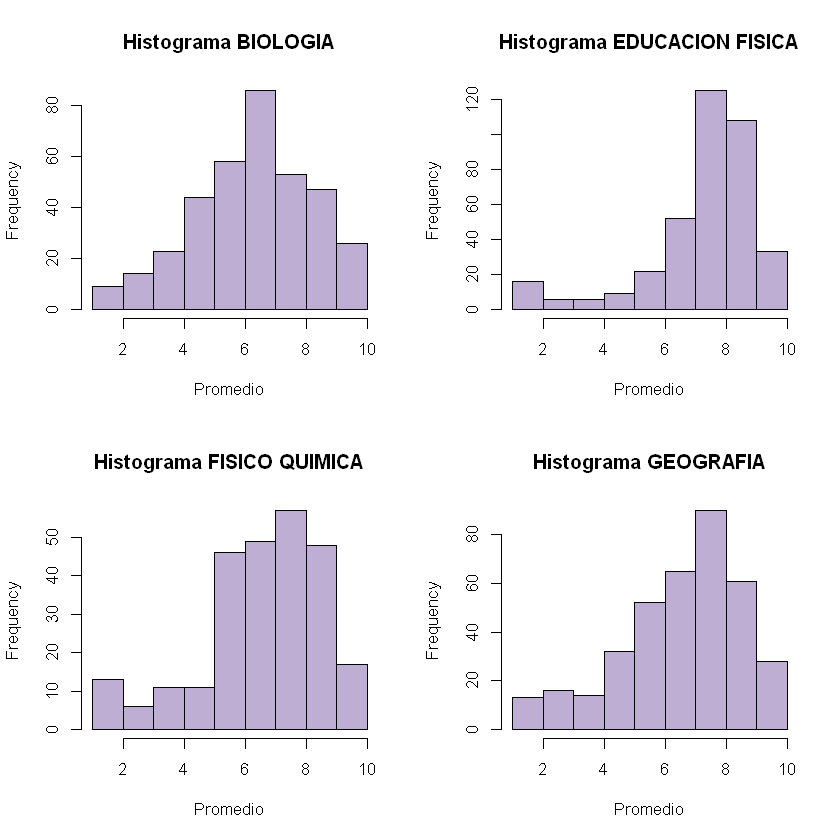

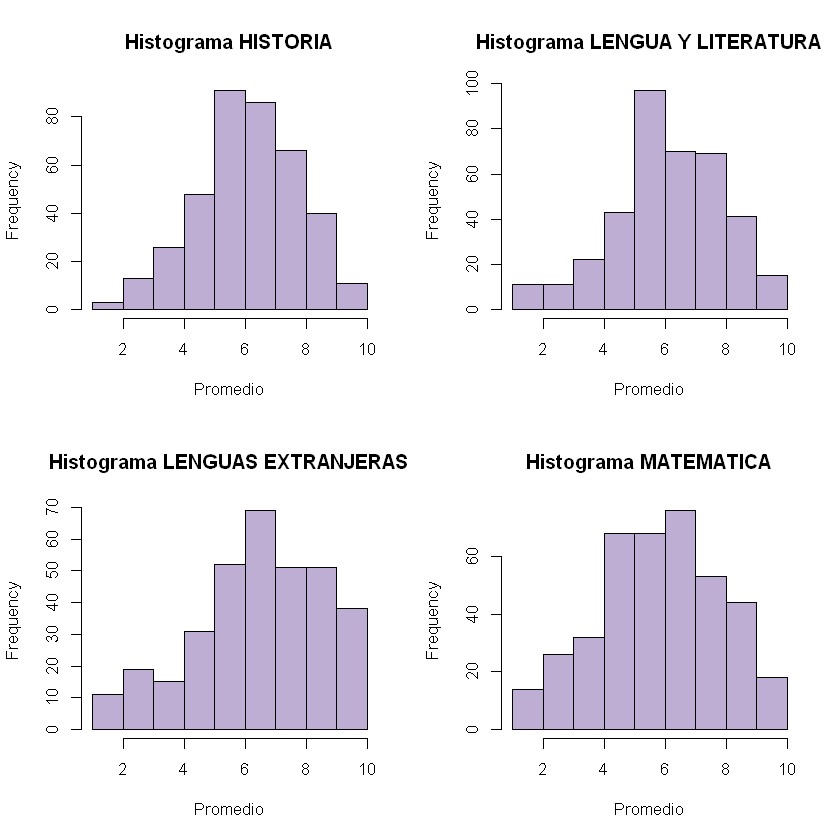

In [925]:
asignaturas <- unique(terceroSecundaria$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(terceroSecundaria, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma", materia),
       xlab = "Promedio", col = "#BEAED4", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos


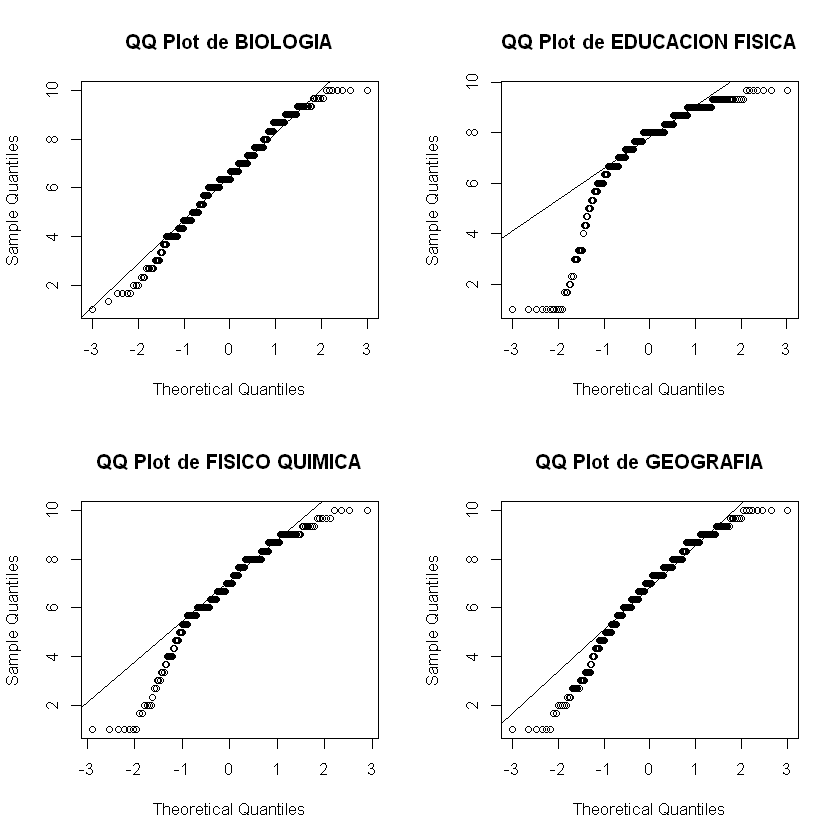

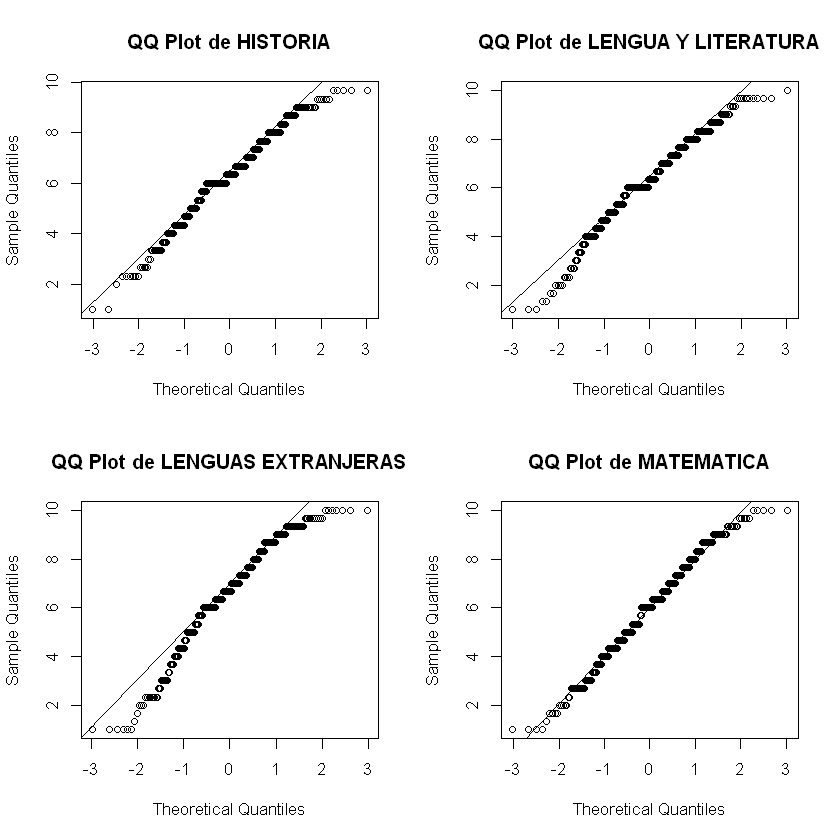

In [926]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(terceroSecundaria, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original


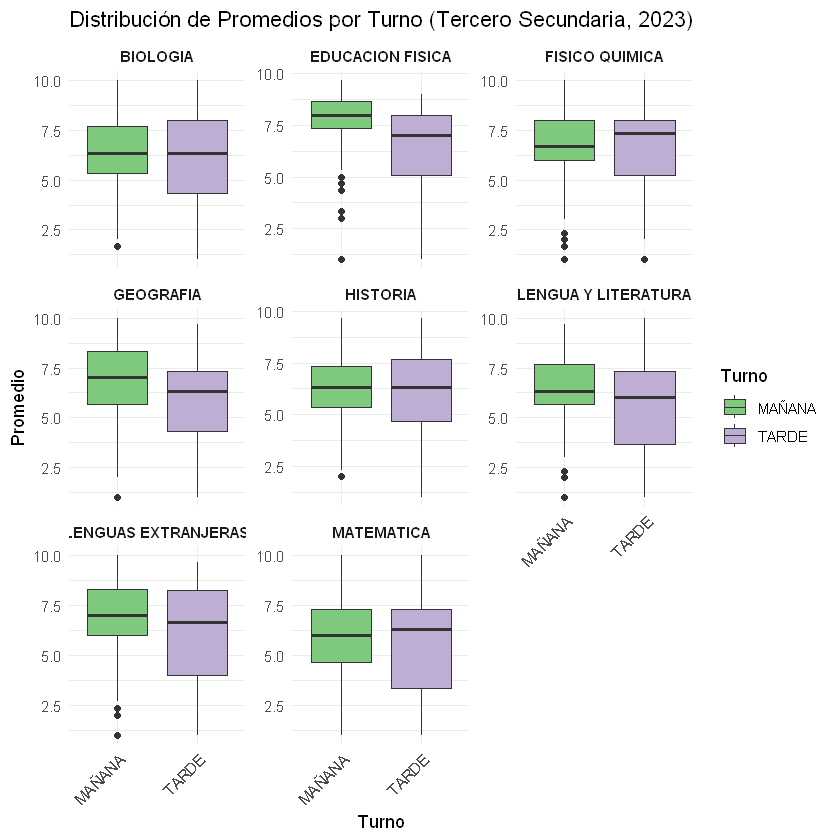

In [927]:
# Para Tercer Secundaria
terceroSecundaria_filtrado <- terceroSecundaria %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

ggplot(terceroSecundaria_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 2 filas
  labs(
    title = "Distribución de Promedios por Turno (Tercero Secundaria, 2023)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +
  theme_minimal() + 
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1), 
    strip.text = element_text(face = "bold", size = 9)
  )

In [928]:
# Aplicar la función a tu dataset
resultados_kruskal <- kruskal_por_materia_y_turno(terceroSecundaria_filtrado)

# Ver los resultados
print(resultados_kruskal)

           Asignatura      P_value
1            BIOLOGIA 3.076581e-01
2    EDUCACION FISICA 3.041359e-08
3      FISICO QUIMICA 9.833845e-01
4           GEOGRAFIA 5.017020e-04
5            HISTORIA 9.081548e-01
6 LENGUA Y LITERATURA 5.915386e-03
7 LENGUAS EXTRANJERAS 7.649470e-02
8          MATEMATICA 3.565743e-01


In [929]:
# Comparar el desempeño en EDUCACION FISICA entre MAÑANA y TARDE
turno_mañana <- terceroSecundaria_filtrado$Promedio[terceroSecundaria_filtrado$Turno == "MAÑANA" & terceroSecundaria_filtrado$Asignatura == "EDUCACION FISICA"]
turno_tarde <- terceroSecundaria_filtrado$Promedio[terceroSecundaria_filtrado$Turno == "TARDE" & terceroSecundaria_filtrado$Asignatura == "EDUCACION FISICA"]

# Test Mann-Whitney
resultado_educacion_fisica <- wilcox.test(turno_mañana, turno_tarde, alternative = "greater", paired = FALSE)
print("Comparación de desempeño en EDUCACION FISICA")
print(resultado_educacion_fisica)

# Comparar el desempeño en GEOGRAFIA entre MAÑANA y TARDE
turno_mañana <- terceroSecundaria_filtrado$Promedio[terceroSecundaria_filtrado$Turno == "MAÑANA" & terceroSecundaria_filtrado$Asignatura == "GEOGRAFIA"]
turno_tarde <- terceroSecundaria_filtrado$Promedio[terceroSecundaria_filtrado$Turno == "TARDE" & terceroSecundaria_filtrado$Asignatura == "GEOGRAFIA"]

# Test Mann-Whitney
resultado_geografia <- wilcox.test(turno_mañana, turno_tarde, alternative = "greater", paired = FALSE)
print("Comparación de desempeño en GEOGRAFIA")
print(resultado_geografia)

# Comparar el desempeño en LENGUA Y LITERATURA entre MAÑANA y TARDE
turno_mañana <- terceroSecundaria_filtrado$Promedio[terceroSecundaria_filtrado$Turno == "MAÑANA" & terceroSecundaria_filtrado$Asignatura == "LENGUA Y LITERATURA"]
turno_tarde <- terceroSecundaria_filtrado$Promedio[terceroSecundaria_filtrado$Turno == "TARDE" & terceroSecundaria_filtrado$Asignatura == "LENGUA Y LITERATURA"]

# Test Mann-Whitney
resultado_lengua_literatura <- wilcox.test(turno_mañana, turno_tarde, alternative = "greater", paired = FALSE)
print("Comparación de desempeño en LENGUA Y LITERATURA")
print(resultado_lengua_literatura)



[1] "Comparación de desempeño en EDUCACION FISICA"

	Wilcoxon rank sum test with continuity correction

data:  turno_mañana and turno_tarde
W = 14450, p-value = 1.527e-08
alternative hypothesis: true location shift is greater than 0

[1] "Comparación de desempeño en GEOGRAFIA"

	Wilcoxon rank sum test with continuity correction

data:  turno_mañana and turno_tarde
W = 12401, p-value = 0.0002515
alternative hypothesis: true location shift is greater than 0

[1] "Comparación de desempeño en LENGUA Y LITERATURA"

	Wilcoxon rank sum test with continuity correction

data:  turno_mañana and turno_tarde
W = 13146, p-value = 0.002963
alternative hypothesis: true location shift is greater than 0



In [930]:

# Filtrar por cada asignatura y aplicar el test de Friedman
asignaturas3 <- unique(terceroSecundaria$Asignatura)  # Lista de asignaturas únicas

for (asignatura in asignaturas3) {
  # Filtrar datos para la asignatura específica
  datos_asignatura3 <- subset(terceroSecundaria, Asignatura == asignatura)
  
  # Realizar el Test de Friedman
  resultado_friedman <- friedman.test(y = as.matrix(datos_asignatura3[, c("NotasPrimerTrimestre", 
                                                                         "NotasSegundoTrimestre", 
                                                                         "NotasTercerTrimestre")]))
  
  # Calcular la potencia del test
  n <- nrow(datos_asignatura3)  # Número de estudiantes en la asignatura
  k <- 3  # Número de trimestres
  f <- sqrt(resultado_friedman$statistic / (n * (k - 1)))  # Estimación del tamaño del efecto
  potencia <- pwr.anova.test(k = k, n = n, f = f, sig.level = 0.05)$power
  
  # Mostrar resultados
  cat("Resultados para", asignatura, ":\n")
  print(resultado_friedman)
  cat("Potencia del test:", round(potencia, 4), "\n\n")
}



Resultados para BIOLOGIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura3[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 4.6509, df = 2, p-value = 0.09774

Potencia del test: 0.6526 

Resultados para EDUCACION FISICA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura3[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 38.282, df = 2, p-value = 4.867e-09

Potencia del test: 1 

Resultados para FISICO QUIMICA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura3[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 2.0822, df = 2, p-value = 0.3531

Potencia del test: 0.3322 

Resultados para GEOGRAFIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura3[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 31.106, df = 2, p-value = 1.759e-07

Pot

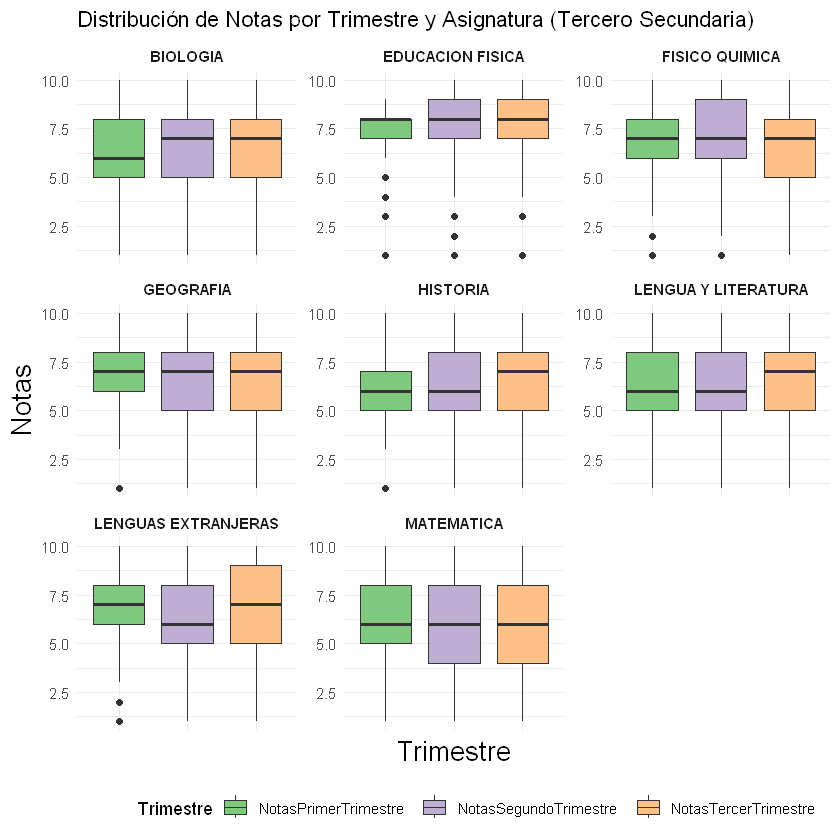

In [931]:
# Transformar los datos para poner los trimestres en una columna
terceroSecundaria_long <- terceroSecundaria %>%
  pivot_longer(cols = c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre"),
               names_to = "Trimestre", 
               values_to = "Notas")

# Crear el boxplot comparando las notas por trimestre y asignatura
ggplot(terceroSecundaria_long, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 3 columnas
  labs(
    title = "Distribución de Notas por Trimestre y Asignatura (Tercero Secundaria)",
    x = "Trimestre",
    y = "Notas"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() + 
  theme(
    axis.text.x = element_blank(),  # Eliminar los valores del eje X
    axis.title.x = element_text(size = 16),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16),  # Tamaño del título del eje Y
    strip.text = element_text(face = "bold", size = 9),  # Reducir el tamaño de la letra de las materias
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.direction = "horizontal",  # Alinear la leyenda horizontalmente
    legend.justification = "right"  # Colocar la leyenda a la derecha
  )

In [932]:
terceroSecundaria_tabla <- terceroSecundaria %>%
  select(Asignatura, NotasPrimerTrimestre, NotasSegundoTrimestre, NotasTercerTrimestre)

# Ver el dataset filtrado
head(terceroSecundaria_tabla)


Asignatura,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,6,1,1
EDUCACION FISICA,7,1,1
FISICO QUIMICA,4,1,1
GEOGRAFIA,5,1,1
HISTORIA,7,1,1
LENGUA Y LITERATURA,4,1,1


In [933]:
# Calcular los promedios por asignatura
promedios_por_asignatura_tercero <- terceroSecundaria_tabla %>%
  group_by(Asignatura) %>%
  summarise(
    PrimerTrimestre = mean(NotasPrimerTrimestre, na.rm = TRUE),
    SegundoTrimestre = mean(NotasSegundoTrimestre, na.rm = TRUE),
    TercerTrimestre = mean(NotasTercerTrimestre, na.rm = TRUE)
  )

# Verificamos cómo quedó el dataset
head(promedios_por_asignatura_tercero)

Asignatura,PrimerTrimestre,SegundoTrimestre,TercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,6.475000,6.458333,6.375000
EDUCACION FISICA,7.368700,7.419098,7.509284
FISICO QUIMICA,6.968992,6.868217,6.488372
GEOGRAFIA,6.919137,6.765499,6.417790
HISTORIA,6.427083,6.213542,6.286458
LENGUA Y LITERATURA,6.266491,6.192612,6.459103


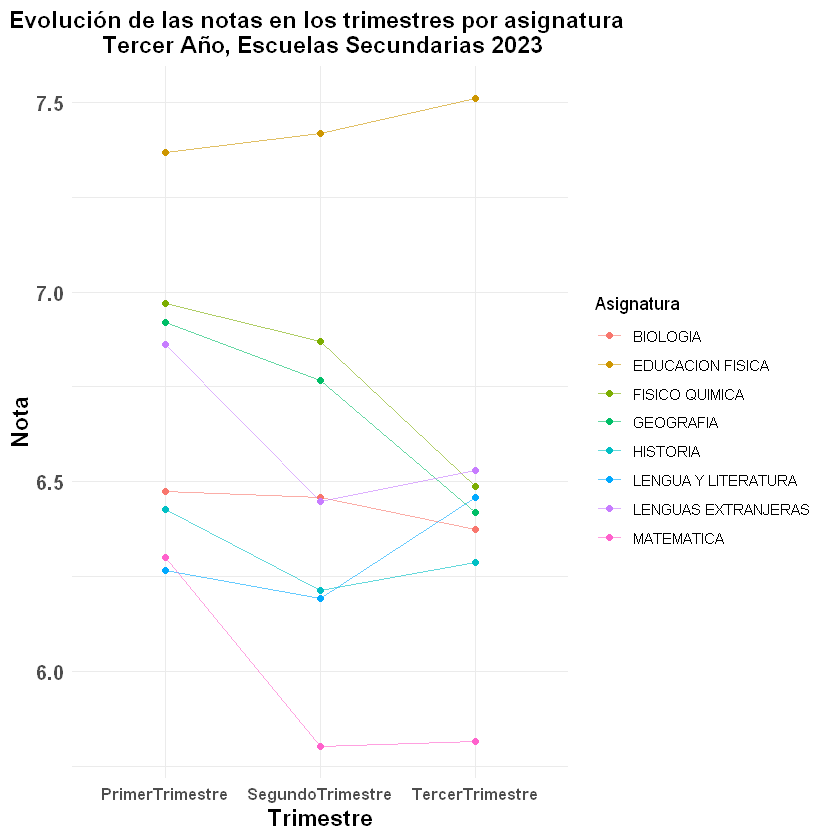

In [934]:
ggparcoord(promedios_por_asignatura_tercero, 
           columns = 2:4, 
           groupColumn = "Asignatura", 
           scale = "globalminmax", 
           alpha = 0.6, 
           showPoints = TRUE) +
  labs(title = "Evolución de las notas en los trimestres por asignatura \n Tercer Año, Escuelas Secundarias 2023",  # Título dividido en dos líneas
       x = "Trimestre", 
       y = "Nota") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 14, face = "bold"),  # Eje X en negrita y más grande
    axis.title.y = element_text(size = 14, face = "bold"),  # Eje Y en negrita y más grande
    axis.text.x = element_text(size = 10, face = "bold"),   # Valores del eje X en negrita y más grandes
    axis.text.y = element_text(size = 12, face = "bold"),   # Valores del eje Y en negrita y más grandes
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5)  # Título en negrita, más grande y centrado
  )


In [935]:
table(terceroSecundaria$EsPrivada)


   N 
2865 

#### Cuarto Secundaria ####

In [936]:
# Filtrar para secundaria y las materias troncales seleccionadas
cuartoSecundaria <- nogoya_SECUNDARIO %>%
  filter(NivelEnsenanza == "SECUNDARIO",  # Filtrar para Secundaria
         Curso == "CUARTO",  # Aseguramos que sea Segundo (ajustar si es otro curso)
         Asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "HISTORIA", "BIOLOGIA", "GEOGRAFIA", "FISICO QUIMICA", "EDUCACION FISICA", "LENGUAS EXTRANJERAS")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura
table(cuartoSecundaria$Condicion)


   APROBADO DESAPROBADO 
       2926         771 

In [937]:
# Crear tabla de frecuencias por materia y condición
tabla_condicionesS4 <- cuartoSecundaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condicionesS4

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
BIOLOGIA,358,104,77.48918,22.510823
EDUCACION FISICA,413,37,91.77778,8.222222
FISICO QUIMICA,379,117,76.41129,23.588710
GEOGRAFIA,355,97,78.53982,21.460177
HISTORIA,358,104,77.48918,22.510823
LENGUA Y LITERATURA,362,69,83.99072,16.009281
LENGUAS EXTRANJERAS,379,90,80.81023,19.189765
MATEMATICA,322,153,67.78947,32.210526


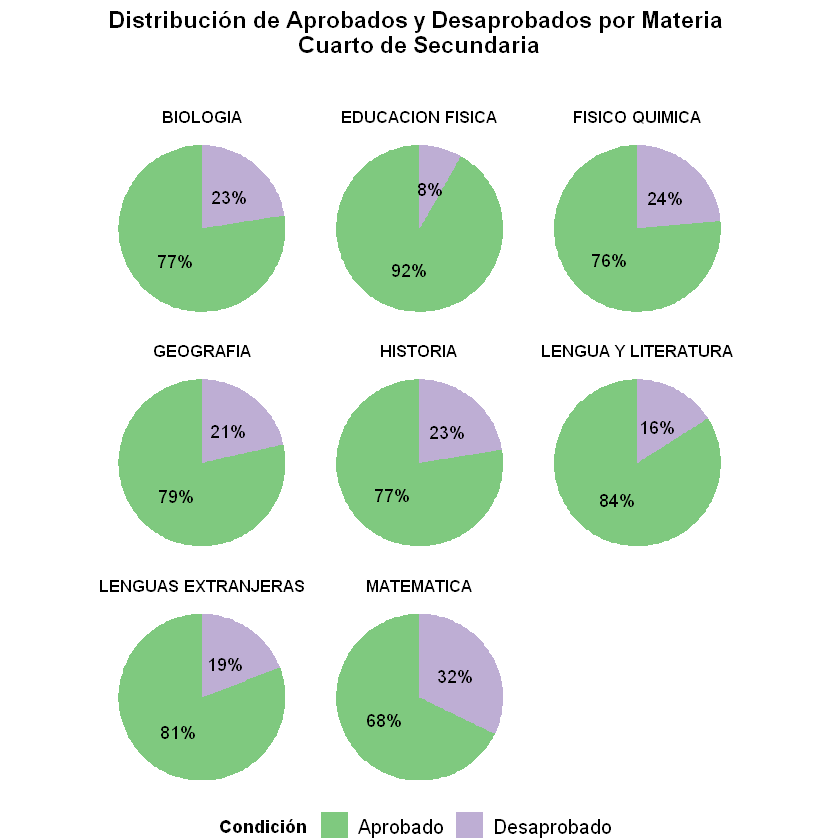

In [938]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_longS4 <- tabla_condicionesS4 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_longS4, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Materia \n Cuarto de Secundaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 10),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )


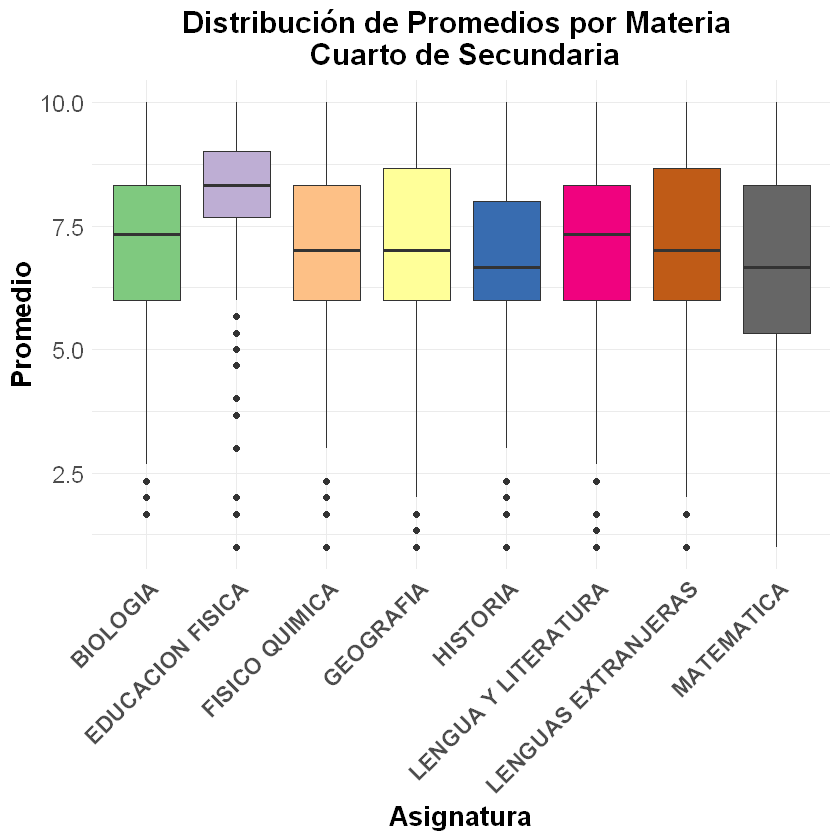

In [939]:
cuartoSecundaria$Promedio <- as.numeric(cuartoSecundaria$Promedio)
ggplot(cuartoSecundaria, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Cuarto de Secundaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )


In [940]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignaturaS4 <- cuartoSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )
# Mostrar las estadísticas calculadas
print(estadisticas_por_asignaturaS4)

# A tibble: 8 x 4
  Asignatura          Media Mediana  Moda
  <chr>               <dbl>   <dbl> <dbl>
1 BIOLOGIA             7.01    7.33  6   
2 EDUCACION FISICA     8.13    8.33  8   
3 FISICO QUIMICA       6.86    7     6   
4 GEOGRAFIA            6.96    7     6   
5 HISTORIA             6.75    6.67  6.67
6 LENGUA Y LITERATURA  7.07    7.33  6   
7 LENGUAS EXTRANJERAS  7.05    7     6   
8 MATEMATICA           6.56    6.67  6   


In [941]:
summary_por_asignaturaS4 <- cuartoSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignaturaS4)


# A tibble: 8 x 7
  Asignatura            Min    Q1 Mediana Media    Q3   Max
  <chr>               <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 BIOLOGIA             1.67  6       7.33  7.01  8.33    10
2 EDUCACION FISICA     1     7.67    8.33  8.13  9       10
3 FISICO QUIMICA       1     6       7     6.86  8.33    10
4 GEOGRAFIA            1     6       7     6.96  8.67    10
5 HISTORIA             1     6       6.67  6.75  8       10
6 LENGUA Y LITERATURA  1     6       7.33  7.07  8.33    10
7 LENGUAS EXTRANJERAS  1     6       7     7.05  8.67    10
8 MATEMATICA           1     5.33    6.67  6.56  8.33    10


In [942]:
# Aplicar la función a los aprobados
ks_resultadosS4 <- realizar_ks_test(cuartoSecundaria)

# Mostrar los resultados
print(ks_resultadosS4)

[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 8 x 2
  Asignatura          KS_p_value
  <chr>                    <dbl>
1 BIOLOGIA              8.55e- 3
2 EDUCACION FISICA      4.58e-12
3 FISICO QUIMICA        5.69e- 5
4 GEOGRAFIA             3.85e- 3
5 HISTORIA              2.74e- 3
6 LENGUA Y LITERATURA   1.83e- 4
7 LENGUAS EXTRANJERAS   4.48e- 5
8 MATEMATICA            2.62e- 3


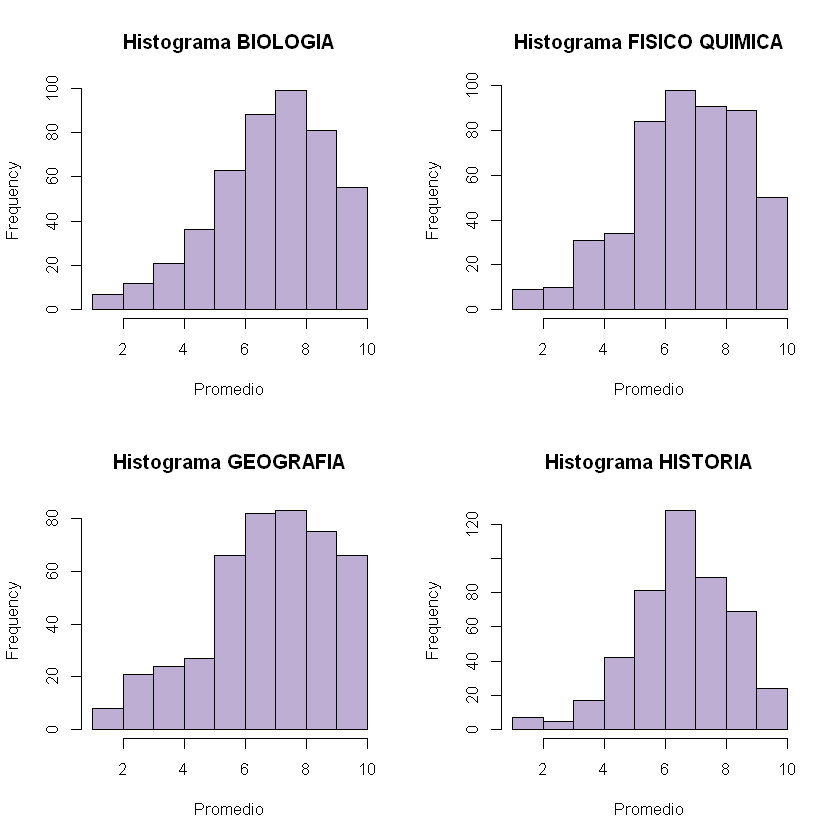

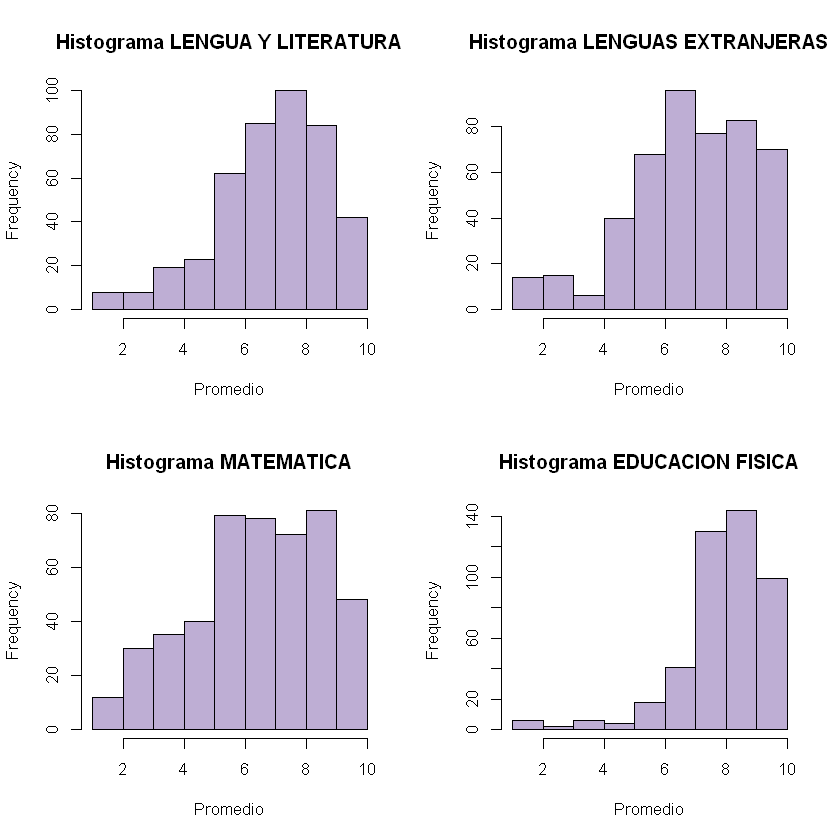

In [943]:
asignaturas <- unique(cuartoSecundaria$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(cuartoSecundaria, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma", materia),
       xlab = "Promedio", col = "#BEAED4", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos


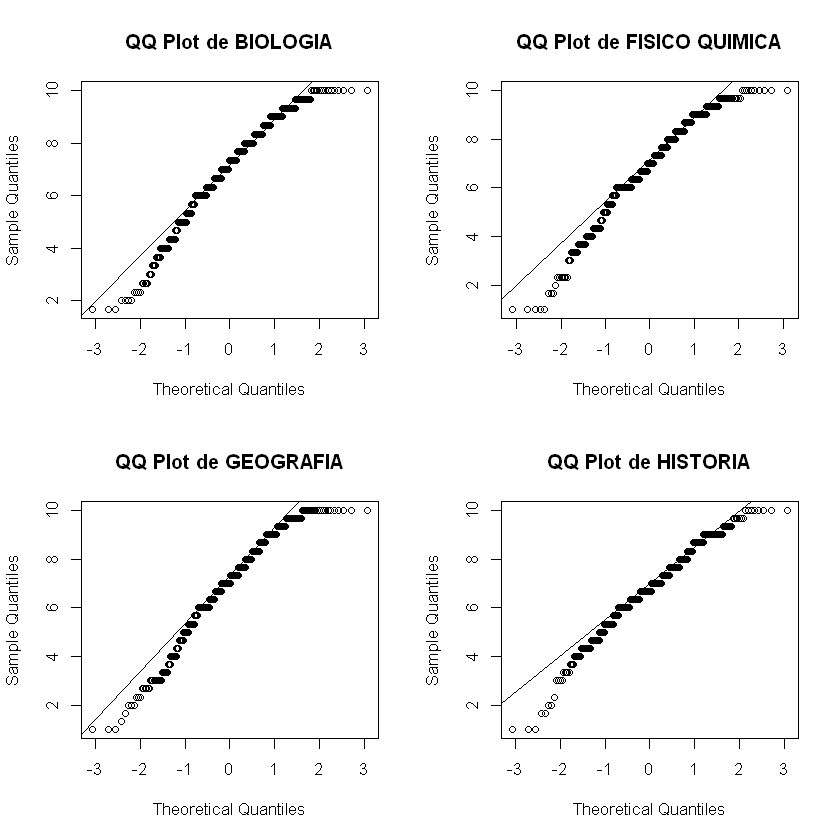

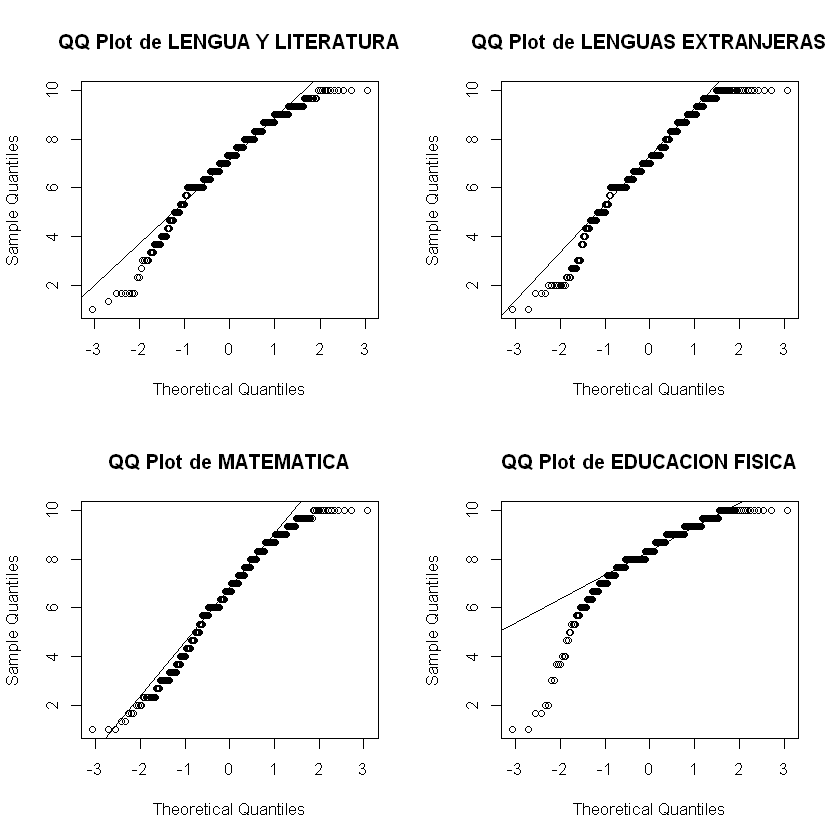

In [944]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(cuartoSecundaria, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original


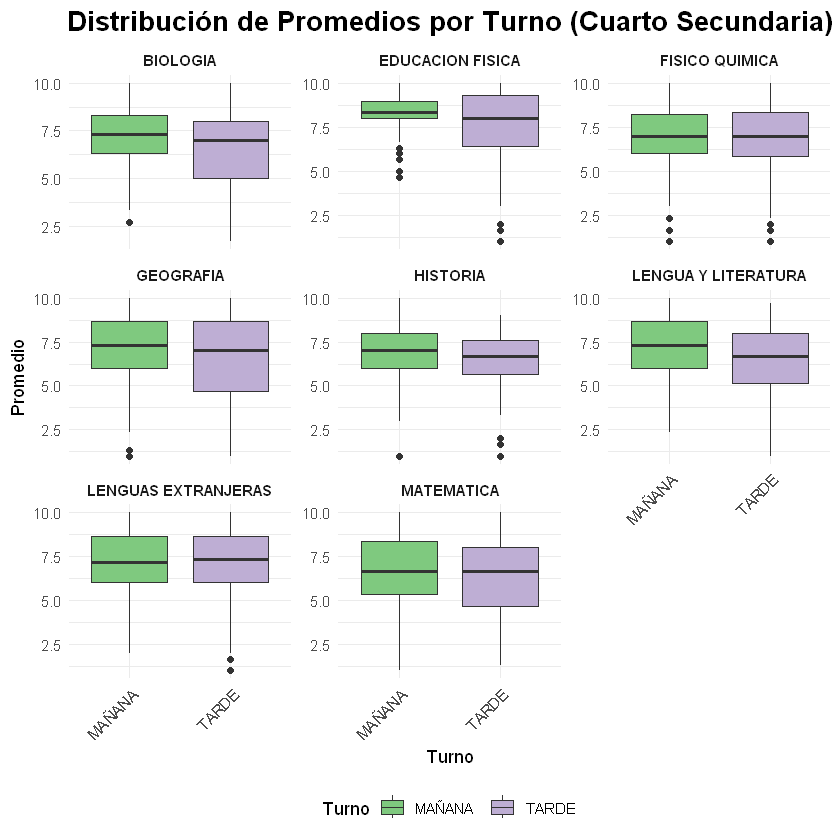

In [945]:
# Para Cuarto Secundaria
cuartoSecundaria_filtrado <- cuartoSecundaria %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

ggplot(cuartoSecundaria_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 2 filas
  labs(
    title = "Distribución de Promedios por Turno (Cuarto Secundaria)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +
  theme_minimal() + 
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1), 
    strip.text = element_text(face = "bold", size = 9),
    legend.position = "bottom",  # Mover la leyenda abajo
    plot.title = element_text(size = 16, hjust = 0.5, face = "bold")  # Agrandar y centrar el título
  )

ggsave("grafico_notas4.png", width = 8, height = 6, dpi = 300)



In [946]:
# Aplicar la función a tu dataset
resultados_kruskal <- kruskal_por_materia_y_turno(cuartoSecundaria_filtrado)

# Ver los resultados
print(resultados_kruskal)

           Asignatura     P_value
1            BIOLOGIA 0.001823223
2      FISICO QUIMICA 0.760366020
3           GEOGRAFIA 0.063314273
4            HISTORIA 0.014454056
5 LENGUA Y LITERATURA 0.007337382
6 LENGUAS EXTRANJERAS 0.647876320
7          MATEMATICA 0.119693542
8    EDUCACION FISICA 0.015029145


In [947]:
# Asumimos que el dataframe es cuartoSecundaria_filtrado

# Materias con diferencia significativa
materias_significativas <- c("BIOLOGIA", "HISTORIA", "LENGUA Y LITERATURA", "EDUCACION FISICA")

# Loop para realizar el test de Mann-Whitney para cada materia
for (materia in materias_significativas) {
  
  # Filtrar los datos por materia y turno
  turno_mañana <- cuartoSecundaria_filtrado$Promedio[cuartoSecundaria_filtrado$Turno == "MAÑANA" & cuartoSecundaria_filtrado$Asignatura == materia]
  turno_tarde <- cuartoSecundaria_filtrado$Promedio[cuartoSecundaria_filtrado$Turno == "TARDE" & cuartoSecundaria_filtrado$Asignatura == materia]
  
  # Realizar el test de Mann-Whitney (Wilcoxon) con hipótesis de que el turno Mañana tiene mejor desempeño
  resultado <- wilcox.test(turno_mañana, turno_tarde, alternative = "greater", paired = FALSE)
  
  # Mostrar el resultado
  print(paste("Comparación de desempeño en", materia))
  print(resultado)
  cat("\n")
}


[1] "Comparación de desempeño en BIOLOGIA"

	Wilcoxon rank sum test with continuity correction

data:  turno_mañana and turno_tarde
W = 19257, p-value = 0.0009131
alternative hypothesis: true location shift is greater than 0


[1] "Comparación de desempeño en HISTORIA"

	Wilcoxon rank sum test with continuity correction

data:  turno_mañana and turno_tarde
W = 18796, p-value = 0.007237
alternative hypothesis: true location shift is greater than 0


[1] "Comparación de desempeño en LENGUA Y LITERATURA"

	Wilcoxon rank sum test with continuity correction

data:  turno_mañana and turno_tarde
W = 15226, p-value = 0.003675
alternative hypothesis: true location shift is greater than 0


[1] "Comparación de desempeño en EDUCACION FISICA"

	Wilcoxon rank sum test with continuity correction

data:  turno_mañana and turno_tarde
W = 18470, p-value = 0.007525
alternative hypothesis: true location shift is greater than 0




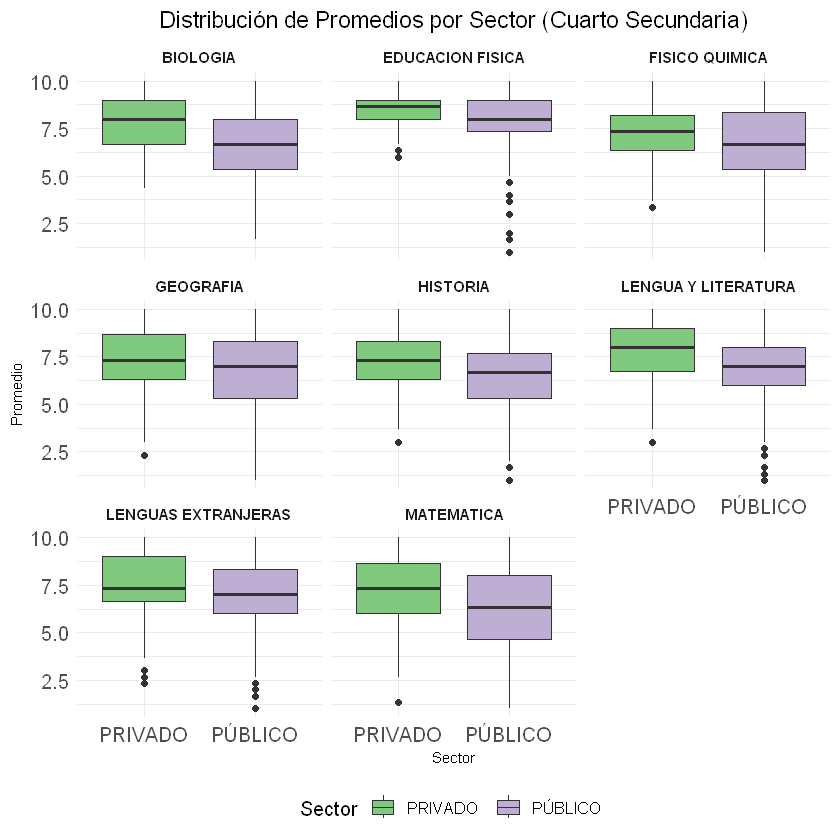

In [948]:
ggplot(cuartoSecundaria, aes(x = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"), y = Promedio, fill = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"))) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Agrupar por asignatura
  scale_fill_brewer(palette = "Accent") +  # Usar paleta de colores "Accent"
  labs(title = "Distribución de Promedios por Sector (Cuarto Secundaria)",
       x = "Sector",
       y = "Promedio",
       fill = "Sector") +  # Ajuste de la leyenda
  theme_minimal() +
  theme(
    legend.position = "bottom",  # Mover la leyenda abajo
    plot.title = element_text(size = 14, hjust = 0.5),  # Agrandar y centrar el título
    text = element_text(size = 12),  # Aumentar el tamaño de la fuente en todo el gráfico
    strip.text = element_text(face = "bold", size = 9),  # Aumentar el tamaño de las etiquetas de las asignaturas
    axis.title = element_text(size = 9),  # Aumentar el tamaño de los títulos de los ejes
    axis.text = element_text(size = 12)  # Aumentar el tamaño del texto de los ejes
  )

ggsave("grafico_sector4.png", width = 8, height = 6, dpi = 300)


In [949]:
# Aplicar la función a tu dataset
resultados_kruskal_privada <- kruskal_por_materia_y_privada(cuartoSecundaria)

# Ver los resultados
print(resultados_kruskal_privada)


           Asignatura      P_value
1            BIOLOGIA 2.404749e-10
2      FISICO QUIMICA 1.489421e-02
3           GEOGRAFIA 7.828820e-05
4            HISTORIA 1.866181e-07
5 LENGUA Y LITERATURA 2.502147e-10
6 LENGUAS EXTRANJERAS 6.030562e-06
7          MATEMATICA 1.399599e-06
8    EDUCACION FISICA 1.870817e-03


In [950]:
# Realizar el test de Mann-Whitney para todas las asignaturas directamente
for (asignatura in unique(cuartoSecundaria_filtrado$Asignatura)) {
  
  # Filtrar los datos por asignatura y por grupo (esprivada vs promedio)
  esprivada_S <- cuartoSecundaria_filtrado$Promedio[cuartoSecundaria_filtrado$EsPrivada == "S" & cuartoSecundaria_filtrado$Asignatura == asignatura]
  esprivada_N <- cuartoSecundaria_filtrado$Promedio[cuartoSecundaria_filtrado$EsPrivada == "N" & cuartoSecundaria_filtrado$Asignatura == asignatura]
  
  # Realizar el test de Mann-Whitney con hipótesis alternativa 'greater' (es decir, que S tiene mejor desempeño)
  resultado <- wilcox.test(esprivada_S, esprivada_N, alternative = "greater", paired = FALSE)
  
  # Mostrar el resultado con la asignatura
  print(paste("Comparación de desempeño en", asignatura))
  print(resultado)
}


[1] "Comparación de desempeño en BIOLOGIA"

	Wilcoxon rank sum test with continuity correction

data:  esprivada_S and esprivada_N
W = 26476, p-value = 1.797e-09
alternative hypothesis: true location shift is greater than 0

[1] "Comparación de desempeño en FISICO QUIMICA"

	Wilcoxon rank sum test with continuity correction

data:  esprivada_S and esprivada_N
W = 25940, p-value = 0.02071
alternative hypothesis: true location shift is greater than 0

[1] "Comparación de desempeño en GEOGRAFIA"

	Wilcoxon rank sum test with continuity correction

data:  esprivada_S and esprivada_N
W = 22954, p-value = 0.001334
alternative hypothesis: true location shift is greater than 0

[1] "Comparación de desempeño en HISTORIA"

	Wilcoxon rank sum test with continuity correction

data:  esprivada_S and esprivada_N
W = 26040, p-value = 1.04e-07
alternative hypothesis: true location shift is greater than 0

[1] "Comparación de desempeño en LENGUA Y LITERATURA"

	Wilcoxon rank sum test with continuity co

In [951]:

# Filtrar por cada asignatura y aplicar el test de Friedman
asignaturas4 <- unique(cuartoSecundaria$Asignatura)  # Lista de asignaturas únicas

for (asignatura in asignaturas4) {
  # Filtrar datos para la asignatura específica
  datos_asignatura4 <- subset(cuartoSecundaria, Asignatura == asignatura)
  
  # Realizar el Test de Friedman
  resultado_friedman <- friedman.test(y = as.matrix(datos_asignatura4[, c("NotasPrimerTrimestre", 
                                                                         "NotasSegundoTrimestre", 
                                                                         "NotasTercerTrimestre")]))
  
  # Calcular la potencia del test
  n <- nrow(datos_asignatura4)  # Número de estudiantes en la asignatura
  k <- 3  # Número de trimestres
  f <- sqrt(resultado_friedman$statistic / (n * (k - 1)))  # Estimación del tamaño del efecto
  potencia <- pwr.anova.test(k = k, n = n, f = f, sig.level = 0.05)$power
  
  # Mostrar resultados
  cat("Resultados para", asignatura, ":\n")
  print(resultado_friedman)
  cat("Potencia del test:", round(potencia, 4), "\n\n")
}



Resultados para BIOLOGIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura4[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 53.028, df = 2, p-value = 3.055e-12

Potencia del test: 1 

Resultados para FISICO QUIMICA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura4[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 7.3509, df = 2, p-value = 0.02534

Potencia del test: 0.8528 

Resultados para GEOGRAFIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura4[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 0.85354, df = 2, p-value = 0.6526

Potencia del test: 0.1578 

Resultados para HISTORIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura4[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 13.901, df = 2, p-value = 0.0009584

Potencia d

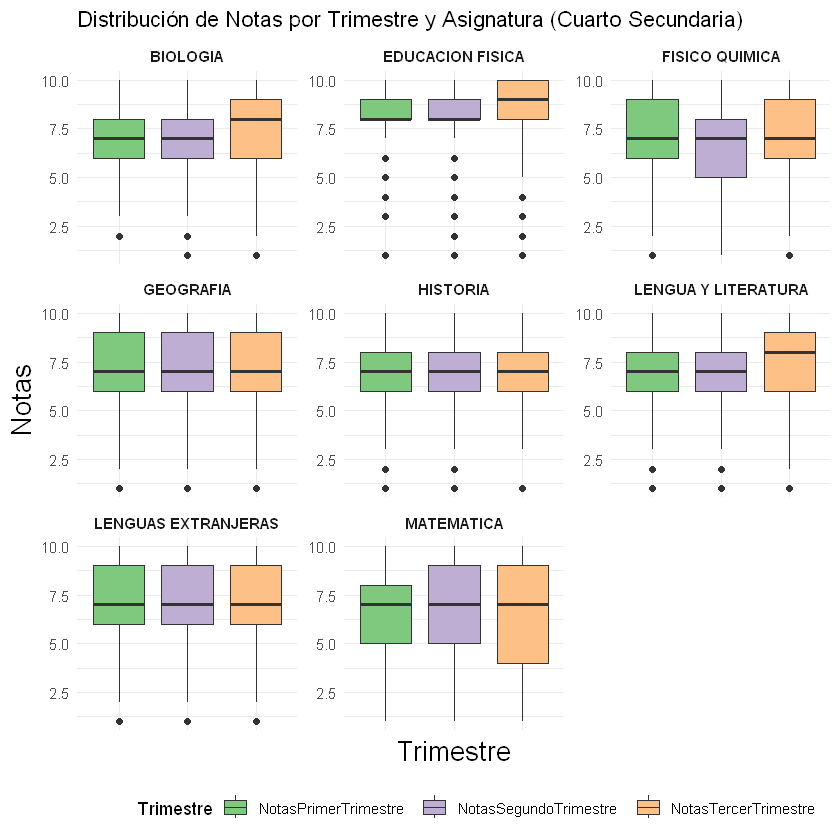

In [952]:
# Transformar los datos para poner los trimestres en una columna
cuartoSecundaria_long <- cuartoSecundaria %>%
  pivot_longer(cols = c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre"),
               names_to = "Trimestre", 
               values_to = "Notas")

# Crear el boxplot comparando las notas por trimestre y asignatura
ggplot(cuartoSecundaria_long, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 3 columnas
  labs(
    title = "Distribución de Notas por Trimestre y Asignatura (Cuarto Secundaria)",
    x = "Trimestre",
    y = "Notas"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() + 
  theme(
    axis.text.x = element_blank(),  # Eliminar los valores del eje X
    axis.title.x = element_text(size = 16),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16),  # Tamaño del título del eje Y
    strip.text = element_text(face = "bold", size = 9),  # Reducir el tamaño de la letra de las materias
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.direction = "horizontal",  # Alinear la leyenda horizontalmente
    legend.justification = "right"  # Colocar la leyenda a la derecha
  )

In [953]:
cuartoSecundaria_tabla <- cuartoSecundaria %>%
  select(Asignatura, NotasPrimerTrimestre, NotasSegundoTrimestre, NotasTercerTrimestre)

# Ver el dataset filtrado
head(cuartoSecundaria_tabla)

Asignatura,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,9,9,10
FISICO QUIMICA,10,10,9
GEOGRAFIA,10,7,9
HISTORIA,9,9,10
LENGUA Y LITERATURA,8,9,9
LENGUAS EXTRANJERAS,10,10,10


In [954]:
# Calcular los promedios por asignatura
promedios_por_asignatura_cuarto <- cuartoSecundaria_tabla %>%
  group_by(Asignatura) %>%
  summarise(
    PrimerTrimestre = mean(NotasPrimerTrimestre, na.rm = TRUE),
    SegundoTrimestre = mean(NotasSegundoTrimestre, na.rm = TRUE),
    TercerTrimestre = mean(NotasTercerTrimestre, na.rm = TRUE)
  )

# Verificamos cómo quedó el dataset
head(promedios_por_asignatura_cuarto)

Asignatura,PrimerTrimestre,SegundoTrimestre,TercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,6.811688,6.989177,7.229437
EDUCACION FISICA,8.108889,8.095556,8.195556
FISICO QUIMICA,7.054435,6.756048,6.760081
GEOGRAFIA,7.033186,6.922566,6.922566
HISTORIA,6.718615,6.718615,6.803030
LENGUA Y LITERATURA,7.004640,7.032483,7.162413


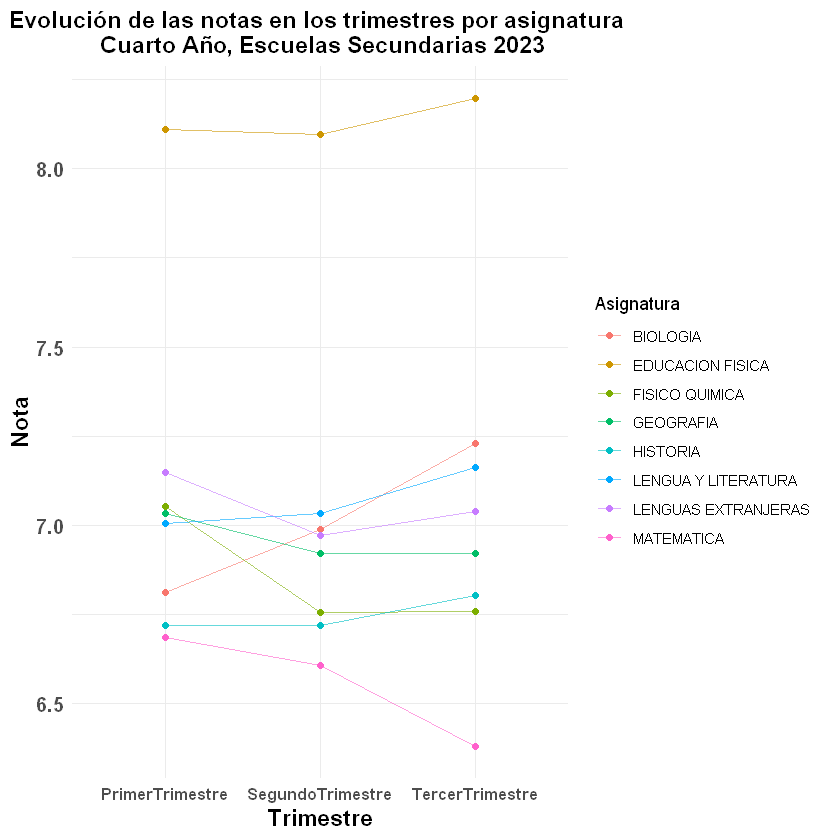

In [955]:
ggparcoord(promedios_por_asignatura_cuarto, 
           columns = 2:4, 
           groupColumn = "Asignatura", 
           scale = "globalminmax", 
           alpha = 0.6, 
           showPoints = TRUE) +
  labs(title = "Evolución de las notas en los trimestres por asignatura \n Cuarto Año, Escuelas Secundarias 2023",  # Título dividido en dos líneas
       x = "Trimestre", 
       y = "Nota") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 14, face = "bold"),  # Eje X en negrita y más grande
    axis.title.y = element_text(size = 14, face = "bold"),  # Eje Y en negrita y más grande
    axis.text.x = element_text(size = 10, face = "bold"),   # Valores del eje X en negrita y más grandes
    axis.text.y = element_text(size = 12, face = "bold"),   # Valores del eje Y en negrita y más grandes
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5)  # Título en negrita, más grande y centrado
  )

#### Quinto Secundaria ####

In [956]:
# Filtrar para secundaria y las materias troncales seleccionadas
quintoSecundaria <- nogoya_SECUNDARIO %>%
  filter(NivelEnsenanza == "SECUNDARIO",  # Filtrar para Secundaria
         Curso == "QUINTO",  # Aseguramos que sea Segundo (ajustar si es otro curso)
         Asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "HISTORIA", "BIOLOGIA", "GEOGRAFIA", "FISICO QUIMICA", "EDUCACION FISICA", "LENGUAS EXTRANJERAS")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura
table(quintoSecundaria$Condicion)


   APROBADO DESAPROBADO 
       2564         454 

In [957]:
# Crear tabla de frecuencias por materia y condición
tabla_condicionesS5 <- quintoSecundaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condicionesS5

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
BIOLOGIA,349,38,90.18088,9.819121
EDUCACION FISICA,360,21,94.48819,5.511811
FISICO QUIMICA,352,63,84.81928,15.180723
GEOGRAFIA,266,36,88.07947,11.920530
HISTORIA,298,51,85.38682,14.613181
LENGUA Y LITERATURA,303,61,83.24176,16.758242
LENGUAS EXTRANJERAS,348,65,84.26150,15.738499
MATEMATICA,288,119,70.76167,29.238329


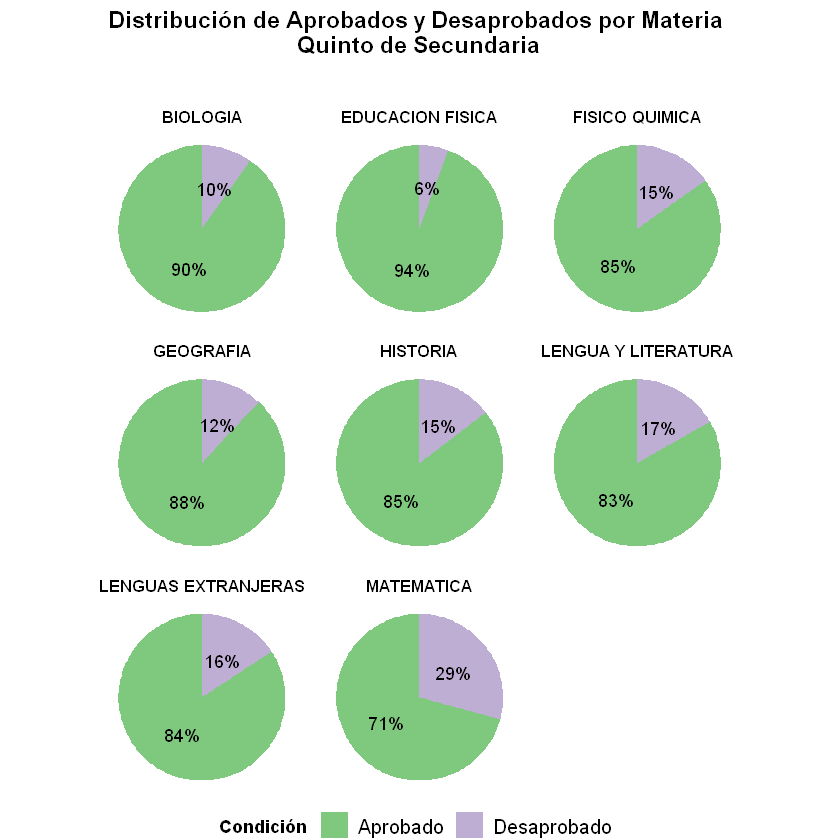

In [958]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_longS5 <- tabla_condicionesS5 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_longS5, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Materia \n Quinto de Secundaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 10),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )



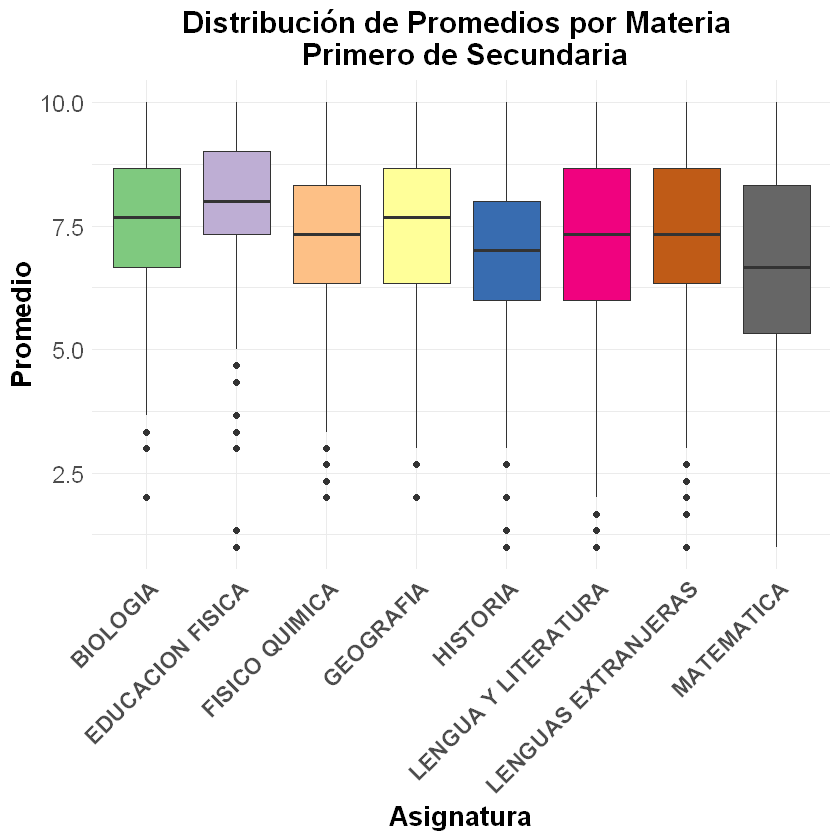

In [959]:
quintoSecundaria$Promedio <- as.numeric(quintoSecundaria$Promedio)
ggplot(quintoSecundaria, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Primero de Secundaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )


In [960]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignaturaS5 <- quintoSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )
# Mostrar las estadísticas calculadas
print(estadisticas_por_asignaturaS5)


# A tibble: 8 x 4
  Asignatura          Media Mediana  Moda
  <chr>               <dbl>   <dbl> <dbl>
1 BIOLOGIA             7.59    7.67  8   
2 EDUCACION FISICA     8.01    8     8   
3 FISICO QUIMICA       7.23    7.33  7   
4 GEOGRAFIA            7.49    7.67  8.67
5 HISTORIA             6.96    7     6   
6 LENGUA Y LITERATURA  7.22    7.33  6   
7 LENGUAS EXTRANJERAS  7.33    7.33  6   
8 MATEMATICA           6.69    6.67  6   


In [961]:
summary_por_asignaturaS5 <- quintoSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignaturaS5)


# A tibble: 8 x 7
  Asignatura            Min    Q1 Mediana Media    Q3   Max
  <chr>               <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 BIOLOGIA                2  6.67    7.67  7.59  8.67    10
2 EDUCACION FISICA        1  7.33    8     8.01  9       10
3 FISICO QUIMICA          2  6.33    7.33  7.23  8.33    10
4 GEOGRAFIA               2  6.33    7.67  7.49  8.67    10
5 HISTORIA                1  6       7     6.96  8       10
6 LENGUA Y LITERATURA     1  6       7.33  7.22  8.67    10
7 LENGUAS EXTRANJERAS     1  6.33    7.33  7.33  8.67    10
8 MATEMATICA              1  5.33    6.67  6.69  8.33    10


In [962]:
# Aplicar la función a los aprobados
ks_resultadosS5 <- realizar_ks_test(quintoSecundaria)

# Mostrar los resultados
print(ks_resultadosS5)


[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 8 x 2
  Asignatura          KS_p_value
  <chr>                    <dbl>
1 BIOLOGIA            0.00131   
2 EDUCACION FISICA    0.00000189
3 FISICO QUIMICA      0.00321   
4 GEOGRAFIA           0.00827   
5 HISTORIA            0.0000508 
6 LENGUA Y LITERATURA 0.0211    
7 LENGUAS EXTRANJERAS 0.00170   
8 MATEMATICA          0.0160    


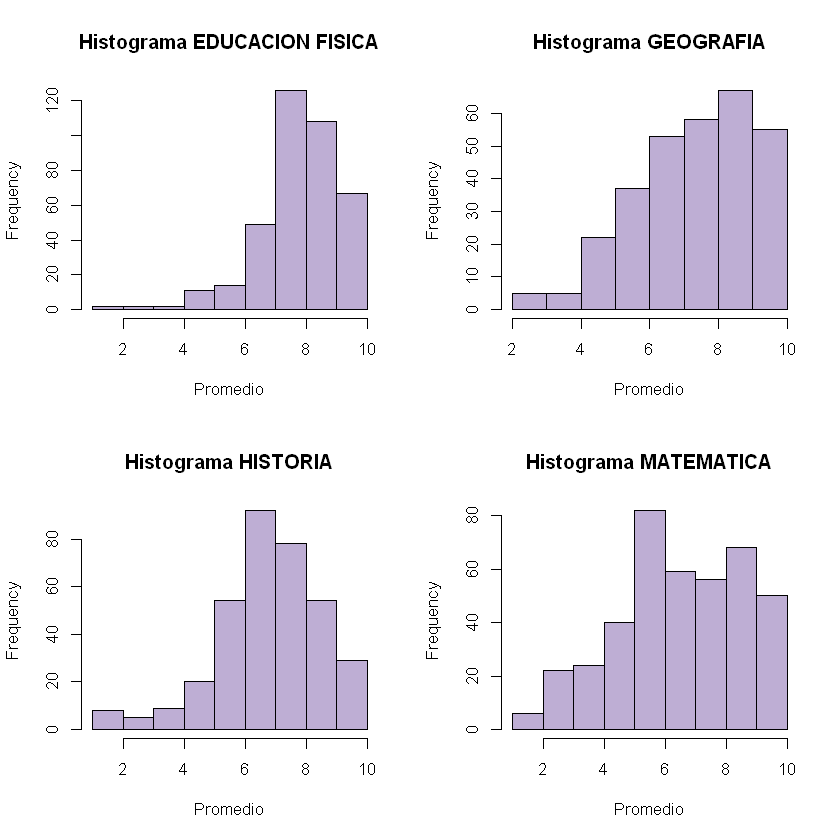

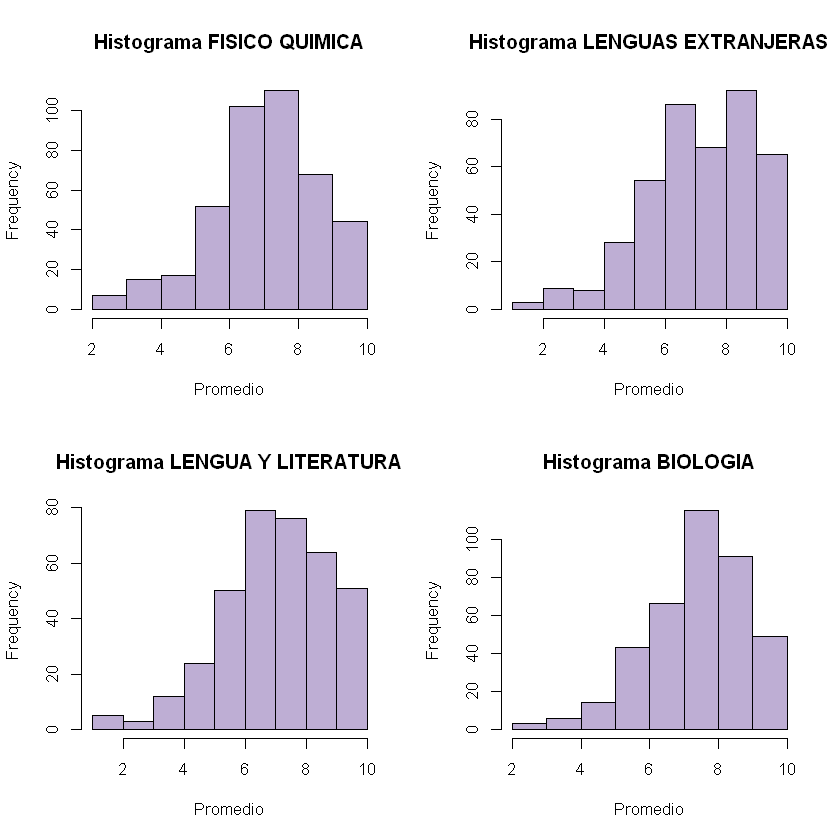

In [963]:
asignaturas <- unique(quintoSecundaria$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(quintoSecundaria, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma", materia),
       xlab = "Promedio", col = "#BEAED4", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos

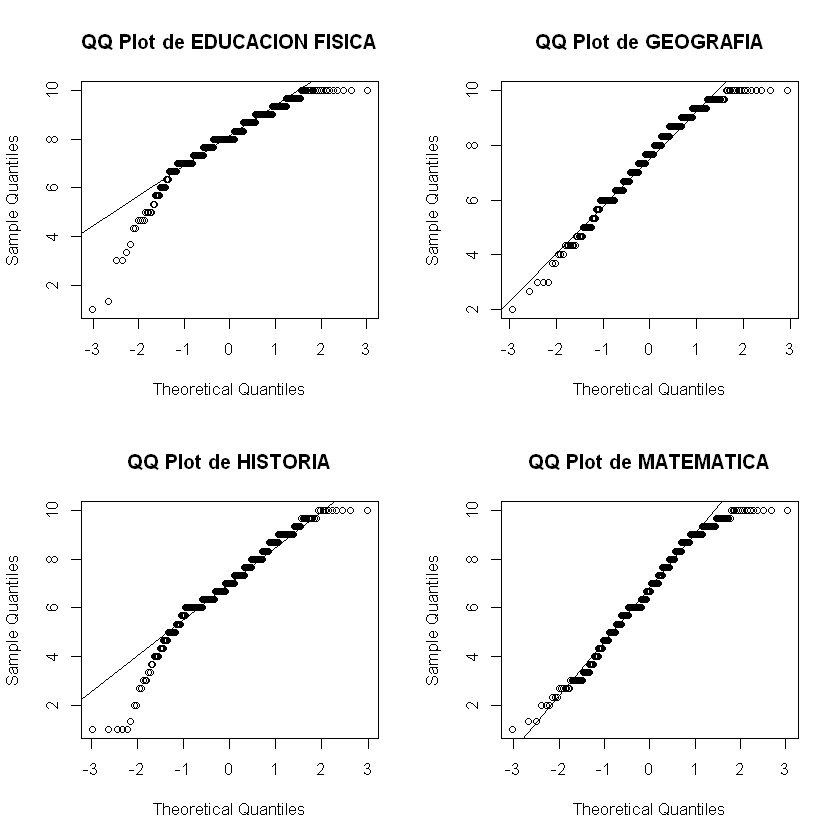

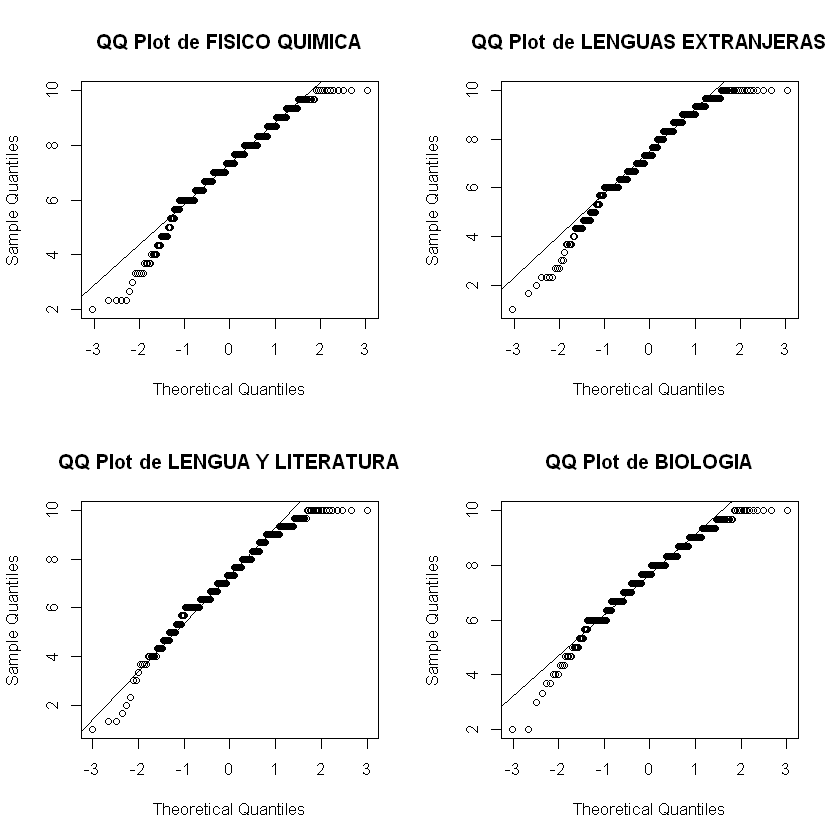

In [964]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(quintoSecundaria, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original

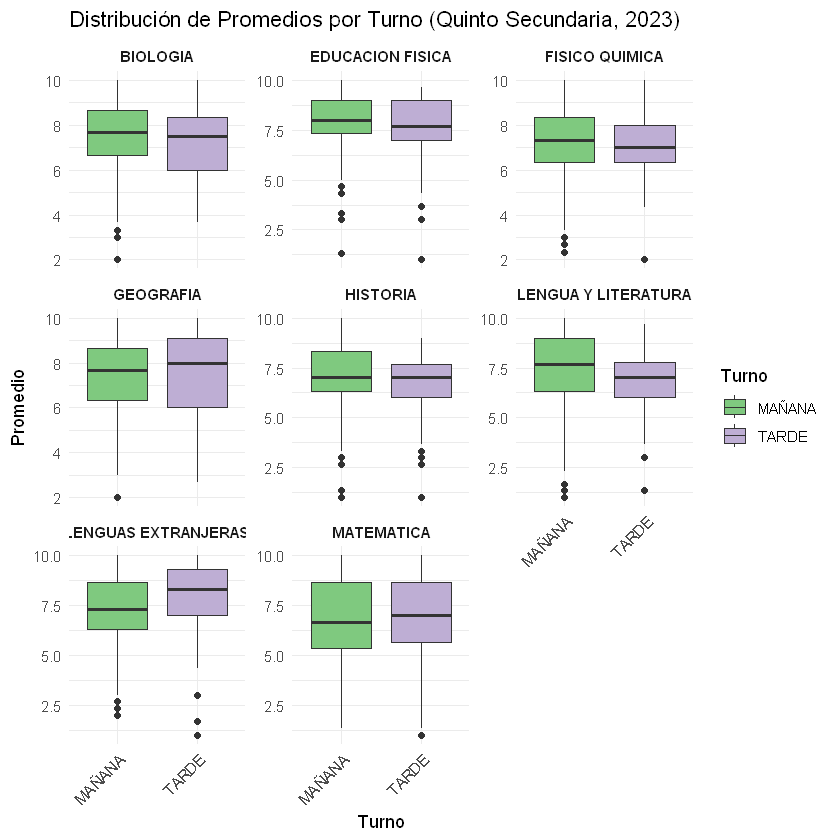

In [965]:
# Para Quinto Secundaria
quintoSecundaria_filtrado <- quintoSecundaria %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

ggplot(quintoSecundaria_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 2 filas
  labs(
    title = "Distribución de Promedios por Turno (Quinto Secundaria, 2023)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +
  theme_minimal() + 
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1), 
    strip.text = element_text(face = "bold", size = 9)
  )

In [966]:
resultados_kruskal <- kruskal_por_materia_y_turno(quintoSecundaria_filtrado)

# Ver los resultados
print(resultados_kruskal)

           Asignatura     P_value
1    EDUCACION FISICA 0.168260583
2           GEOGRAFIA 0.726097863
3            HISTORIA 0.091310999
4          MATEMATICA 0.499276429
5      FISICO QUIMICA 0.337905266
6 LENGUAS EXTRANJERAS 0.006372164
7 LENGUA Y LITERATURA 0.010139932
8            BIOLOGIA 0.007758772


In [967]:
# Comparar el desempeño en LENGUAS EXTRANJERAS
turno_mañana_LE <- quintoSecundaria_filtrado$Promedio[quintoSecundaria_filtrado$Turno == "MAÑANA" & quintoSecundaria_filtrado$Asignatura == "LENGUAS EXTRANJERAS"]
turno_tarde_LE <- quintoSecundaria_filtrado$Promedio[quintoSecundaria_filtrado$Turno == "TARDE" & quintoSecundaria_filtrado$Asignatura == "LENGUAS EXTRANJERAS"]

# Test de Mann-Whitney para LENGUAS EXTRANJERAS
resultado_LE <- wilcox.test(turno_mañana_LE, turno_tarde_LE, alternative = "less", paired = FALSE)
print("Comparación de desempeño en LENGUAS EXTRANJERAS")
print(resultado_LE)

# Comparar el desempeño en LENGUA Y LITERATURA
turno_mañana_LLI <- quintoSecundaria_filtrado$Promedio[quintoSecundaria_filtrado$Turno == "MAÑANA" & quintoSecundaria_filtrado$Asignatura == "LENGUA Y LITERATURA"]
turno_tarde_LLI <- quintoSecundaria_filtrado$Promedio[quintoSecundaria_filtrado$Turno == "TARDE" & quintoSecundaria_filtrado$Asignatura == "LENGUA Y LITERATURA"]

# Test de Mann-Whitney para LENGUA Y LITERATURA
resultado_LLI <- wilcox.test(turno_mañana_LLI, turno_tarde_LLI, alternative = "greater", paired = FALSE)
print("Comparación de desempeño en LENGUA Y LITERATURA")
print(resultado_LLI)

# Comparar el desempeño en BIOLOGIA
turno_mañana_BIO <- quintoSecundaria_filtrado$Promedio[quintoSecundaria_filtrado$Turno == "MAÑANA" & quintoSecundaria_filtrado$Asignatura == "BIOLOGIA"]
turno_tarde_BIO <- quintoSecundaria_filtrado$Promedio[quintoSecundaria_filtrado$Turno == "TARDE" & quintoSecundaria_filtrado$Asignatura == "BIOLOGIA"]

# Test de Mann-Whitney para BIOLOGIA
resultado_BIO <- wilcox.test(turno_mañana_BIO, turno_tarde_BIO, alternative = "greater", paired = FALSE)
print("Comparación de desempeño en BIOLOGIA")
print(resultado_BIO)


[1] "Comparación de desempeño en LENGUAS EXTRANJERAS"

	Wilcoxon rank sum test with continuity correction

data:  turno_mañana_LE and turno_tarde_LE
W = 7011.5, p-value = 0.003193
alternative hypothesis: true location shift is less than 0

[1] "Comparación de desempeño en LENGUA Y LITERATURA"

	Wilcoxon rank sum test with continuity correction

data:  turno_mañana_LLI and turno_tarde_LLI
W = 8722.5, p-value = 0.005082
alternative hypothesis: true location shift is greater than 0

[1] "Comparación de desempeño en BIOLOGIA"

	Wilcoxon rank sum test with continuity correction

data:  turno_mañana_BIO and turno_tarde_BIO
W = 9006, p-value = 0.003888
alternative hypothesis: true location shift is greater than 0



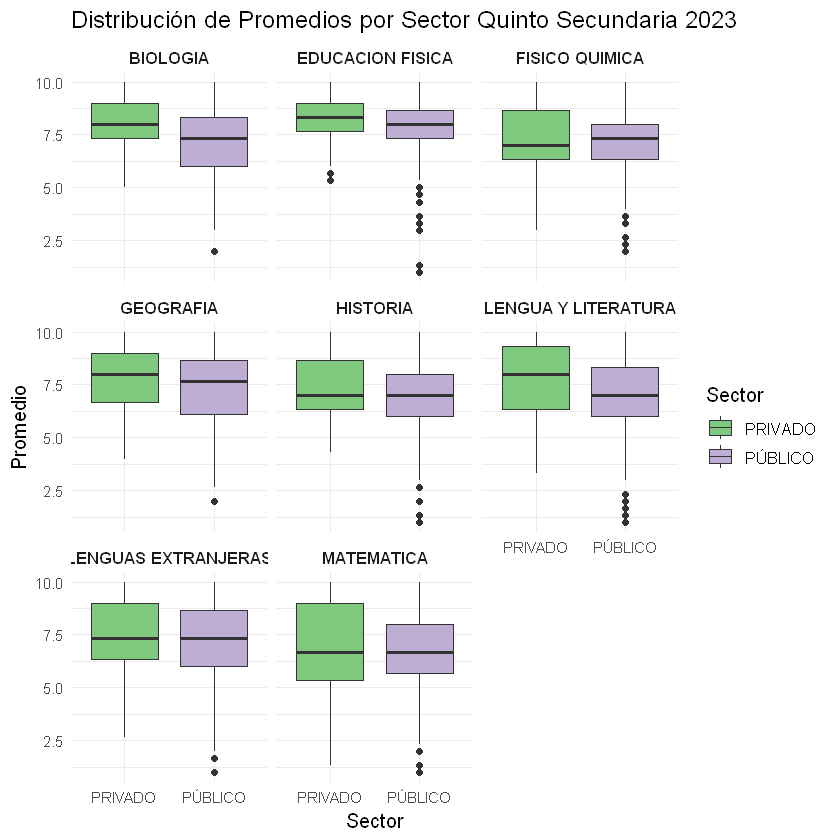

In [968]:
ggplot(quintoSecundaria, aes(x = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"), y = Promedio, fill = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"))) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Agrupar por asignatura
  scale_fill_brewer(palette = "Accent") +  # Usar paleta de colores "Accent"
  labs(title = "Distribución de Promedios por Sector Quinto Secundaria 2023",
       x = "Sector",
       y = "Promedio",
       fill = "Sector") +  # Ajuste de la leyenda
  theme_minimal() +
  theme(
    legend.position = "right",  # Leyenda a la derecha
    text = element_text(size = 12),  # Aumentar el tamaño de la fuente en todo el gráfico
    strip.text = element_text(face = "bold", size = 10),  # Aumentar el tamaño de las etiquetas de las asignaturas
    axis.title = element_text(size = 12),  # Aumentar el tamaño de los títulos de los ejes
    axis.text = element_text(size = 9)  # Aumentar el tamaño del texto de los ejes
  )

In [969]:
resultados_kruskal_privada <- kruskal_por_materia_y_privada(quintoSecundaria)

# Ver los resultados
print(resultados_kruskal_privada)

           Asignatura      P_value
1    EDUCACION FISICA 2.983749e-03
2           GEOGRAFIA 6.731013e-02
3            HISTORIA 5.112784e-02
4          MATEMATICA 2.744687e-01
5      FISICO QUIMICA 8.648306e-01
6 LENGUAS EXTRANJERAS 1.759582e-01
7 LENGUA Y LITERATURA 1.666244e-04
8            BIOLOGIA 5.424929e-09


In [970]:
# Comparación para Educación Física
EF_S <- subset(quintoSecundaria, Asignatura == "EDUCACION FISICA" & EsPrivada == "S")$Promedio
EF_N <- subset(quintoSecundaria, Asignatura == "EDUCACION FISICA" & EsPrivada == "N")$Promedio
resultado_EF <- wilcox.test(EF_S, EF_N, alternative = "greater", paired = FALSE)
print("Comparación de Educación Física:")
print(resultado_EF)

# Comparación para Lengua y Literatura
LLI_S <- subset(quintoSecundaria, Asignatura == "LENGUA Y LITERATURA" & EsPrivada == "S")$Promedio
LLI_N <- subset(quintoSecundaria, Asignatura == "LENGUA Y LITERATURA" & EsPrivada == "N")$Promedio
resultado_LLI <- wilcox.test(LLI_S, LLI_N, alternative = "greater", paired = FALSE)
print("Comparación de Lengua y Literatura:")
print(resultado_LLI)

# Comparación para Biología
BIO_S <- subset(quintoSecundaria, Asignatura == "BIOLOGIA" & EsPrivada == "S")$Promedio
BIO_N <- subset(quintoSecundaria, Asignatura == "BIOLOGIA" & EsPrivada == "N")$Promedio
resultado_BIO <- wilcox.test(BIO_S, BIO_N, alternative = "greater", paired = FALSE)
print("Comparación de Biología:")
print(resultado_BIO)


[1] "Comparación de Educación Física:"

	Wilcoxon rank sum test with continuity correction

data:  EF_S and EF_N
W = 20427, p-value = 0.001494
alternative hypothesis: true location shift is greater than 0

[1] "Comparación de Lengua y Literatura:"

	Wilcoxon rank sum test with continuity correction

data:  LLI_S and LLI_N
W = 18116, p-value = 8.349e-05
alternative hypothesis: true location shift is greater than 0

[1] "Comparación de Biología:"

	Wilcoxon rank sum test with continuity correction

data:  BIO_S and BIO_N
W = 24644, p-value = 2.72e-09
alternative hypothesis: true location shift is greater than 0



In [971]:

# Filtrar por cada asignatura y aplicar el test de Friedman
asignaturas5 <- unique(quintoSecundaria$Asignatura)  # Lista de asignaturas únicas

for (asignatura in asignaturas5) {
  # Filtrar datos para la asignatura específica
  datos_asignatura5 <- subset(quintoSecundaria, Asignatura == asignatura)
  
  # Realizar el Test de Friedman
  resultado_friedman <- friedman.test(y = as.matrix(datos_asignatura5[, c("NotasPrimerTrimestre", 
                                                                          "NotasSegundoTrimestre", 
                                                                          "NotasTercerTrimestre")]))
  
  # Calcular la potencia del test
  n <- nrow(datos_asignatura5)  # Número de estudiantes en la asignatura
  k <- 3  # Número de trimestres
  f <- sqrt(resultado_friedman$statistic / (n * (k - 1)))  # Estimación del tamaño del efecto
  potencia <- pwr.anova.test(k = k, n = n, f = f, sig.level = 0.05)$power
  
  # Mostrar resultados
  cat("Resultados para", asignatura, ":\n")
  print(resultado_friedman)
  cat("Potencia del test:", round(potencia, 4), "\n\n")
}


Resultados para EDUCACION FISICA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura5[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 21.981, df = 2, p-value = 1.686e-05

Potencia del test: 0.9997 

Resultados para GEOGRAFIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura5[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 10.472, df = 2, p-value = 0.005322

Potencia del test: 0.9527 

Resultados para HISTORIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura5[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 31.701, df = 2, p-value = 1.307e-07

Potencia del test: 1 

Resultados para MATEMATICA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura5[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 6.5, df = 2, p-value = 0.03877

Potencia

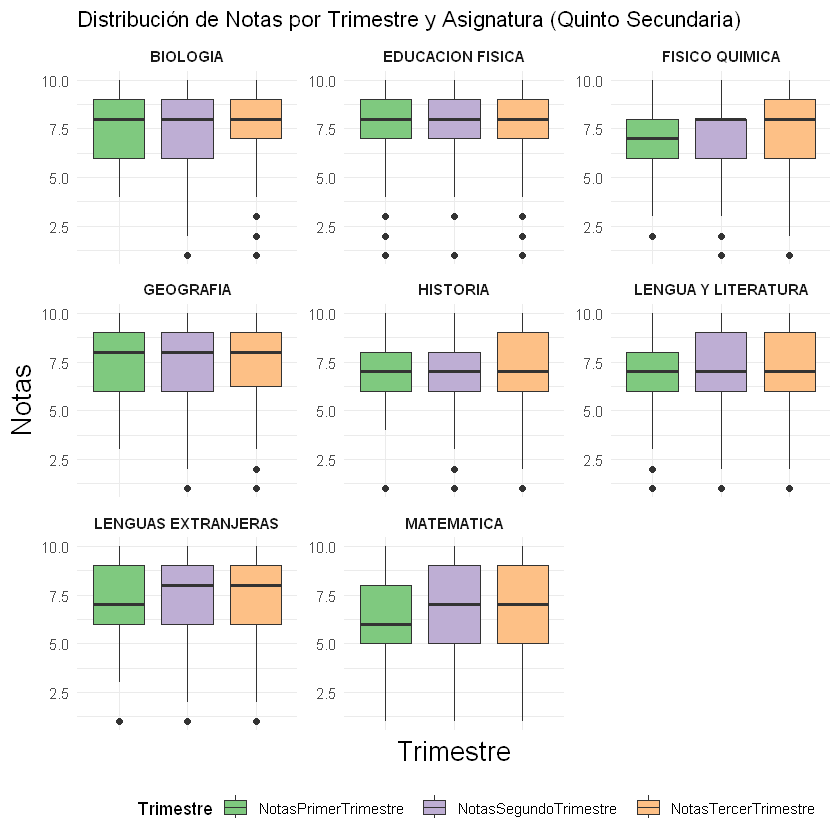

In [972]:
# Transformar los datos para poner los trimestres en una columna
quintoSecundaria_long <- quintoSecundaria %>%
  pivot_longer(cols = c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre"),
               names_to = "Trimestre", 
               values_to = "Notas")

# Crear el boxplot comparando las notas por trimestre y asignatura
ggplot(quintoSecundaria_long, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 3 columnas
  labs(
    title = "Distribución de Notas por Trimestre y Asignatura (Quinto Secundaria)",
    x = "Trimestre",
    y = "Notas"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() + 
  theme(
    axis.text.x = element_blank(),  # Eliminar los valores del eje X
    axis.title.x = element_text(size = 16),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16),  # Tamaño del título del eje Y
    strip.text = element_text(face = "bold", size = 9),  # Reducir el tamaño de la letra de las materias
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.direction = "horizontal",  # Alinear la leyenda horizontalmente
    legend.justification = "right"  # Colocar la leyenda a la derecha
  )

In [973]:
quintoSecundaria_tabla <- quintoSecundaria %>%
  select(Asignatura, NotasPrimerTrimestre, NotasSegundoTrimestre, NotasTercerTrimestre)

# Ver el dataset filtrado
head(quintoSecundaria_tabla)



Asignatura,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
EDUCACION FISICA,8,8,8
GEOGRAFIA,7,8,7
HISTORIA,7,6,6
MATEMATICA,5,6,5
FISICO QUIMICA,6,6,6
MATEMATICA,5,7,6


In [974]:
# Calcular los promedios por asignatura
promedios_por_asignatura_quinto <- quintoSecundaria_tabla %>%
  group_by(Asignatura) %>%
  summarise(
    PrimerTrimestre = mean(NotasPrimerTrimestre, na.rm = TRUE),
    SegundoTrimestre = mean(NotasSegundoTrimestre, na.rm = TRUE),
    TercerTrimestre = mean(NotasTercerTrimestre, na.rm = TRUE)
  )

# Verificamos cómo quedó el dataset
head(promedios_por_asignatura_quinto)

Asignatura,PrimerTrimestre,SegundoTrimestre,TercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,7.475452,7.325581,7.956072
EDUCACION FISICA,7.939633,8.007874,8.081365
FISICO QUIMICA,7.262651,7.240964,7.183133
GEOGRAFIA,7.443709,7.447020,7.589404
HISTORIA,6.982808,6.790831,7.120344
LENGUA Y LITERATURA,7.211538,7.239011,7.200549


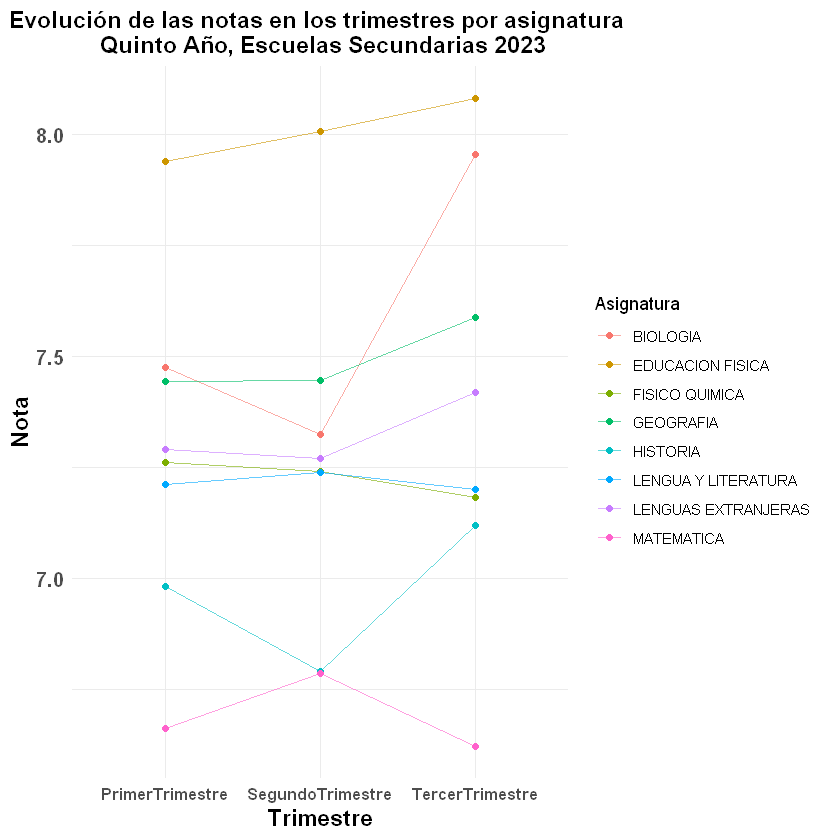

In [975]:
ggparcoord(promedios_por_asignatura_quinto, 
           columns = 2:4, 
           groupColumn = "Asignatura", 
           scale = "globalminmax", 
           alpha = 0.6, 
           showPoints = TRUE) +
  labs(title = "Evolución de las notas en los trimestres por asignatura \n Quinto Año, Escuelas Secundarias 2023",  # Título dividido en dos líneas
       x = "Trimestre", 
       y = "Nota") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 14, face = "bold"),  # Eje X en negrita y más grande
    axis.title.y = element_text(size = 14, face = "bold"),  # Eje Y en negrita y más grande
    axis.text.x = element_text(size = 10, face = "bold"),   # Valores del eje X en negrita y más grandes
    axis.text.y = element_text(size = 12, face = "bold"),   # Valores del eje Y en negrita y más grandes
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5)  # Título en negrita, más grande y centrado
  )


#### Sexto Secundaria ####

In [976]:
# Filtrar para secundaria y las materias troncales seleccionadas
sextoSecundaria <- nogoya_SECUNDARIO %>%
  filter(NivelEnsenanza == "SECUNDARIO",  # Filtrar para Secundaria
         Curso == "SEXTO",  # Aseguramos que sea Segundo (ajustar si es otro curso)
         Asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "HISTORIA", "BIOLOGIA", "GEOGRAFIA", "FISICO QUIMICA", "EDUCACION FISICA", "LENGUAS EXTRANJERAS")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura
table(sextoSecundaria$Condicion)


   APROBADO DESAPROBADO 
       1591         196 

In [977]:
# Crear tabla de frecuencias por materia y condición
tabla_condicionesS6 <- sextoSecundaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condicionesS6

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
BIOLOGIA,111,13,89.51613,10.483871
EDUCACION FISICA,246,10,96.09375,3.906250
FISICO QUIMICA,87,19,82.07547,17.924528
GEOGRAFIA,220,22,90.90909,9.090909
HISTORIA,203,33,86.01695,13.983051
LENGUA Y LITERATURA,198,24,89.18919,10.810811
LENGUAS EXTRANJERAS,294,20,93.63057,6.369427
MATEMATICA,232,55,80.83624,19.163763


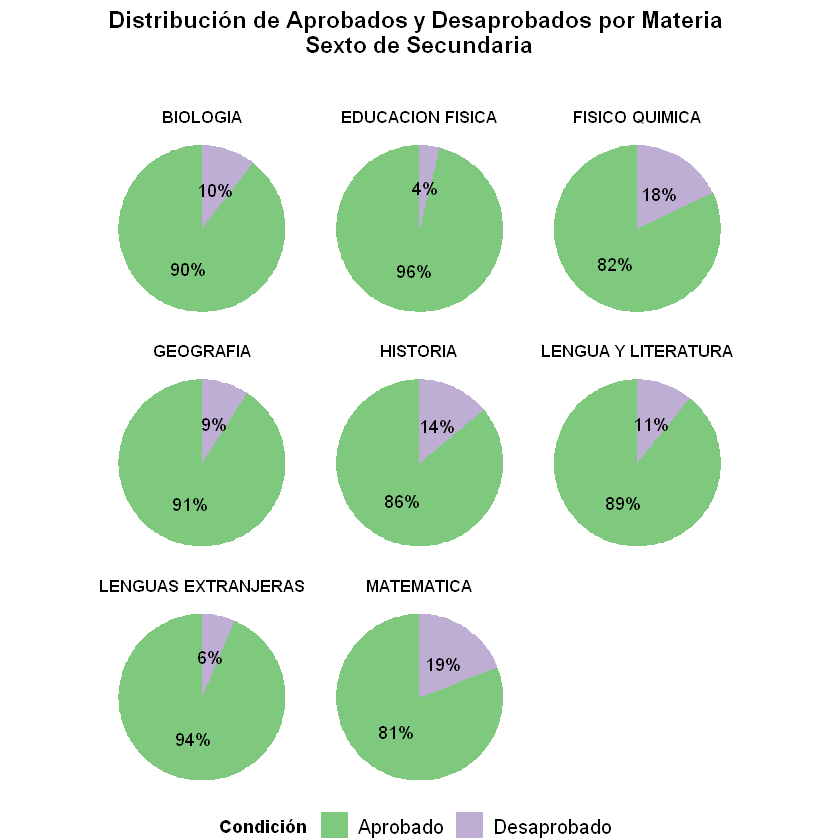

In [978]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_longS6 <- tabla_condicionesS6 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_longS6, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Materia \n Sexto de Secundaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 10),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )


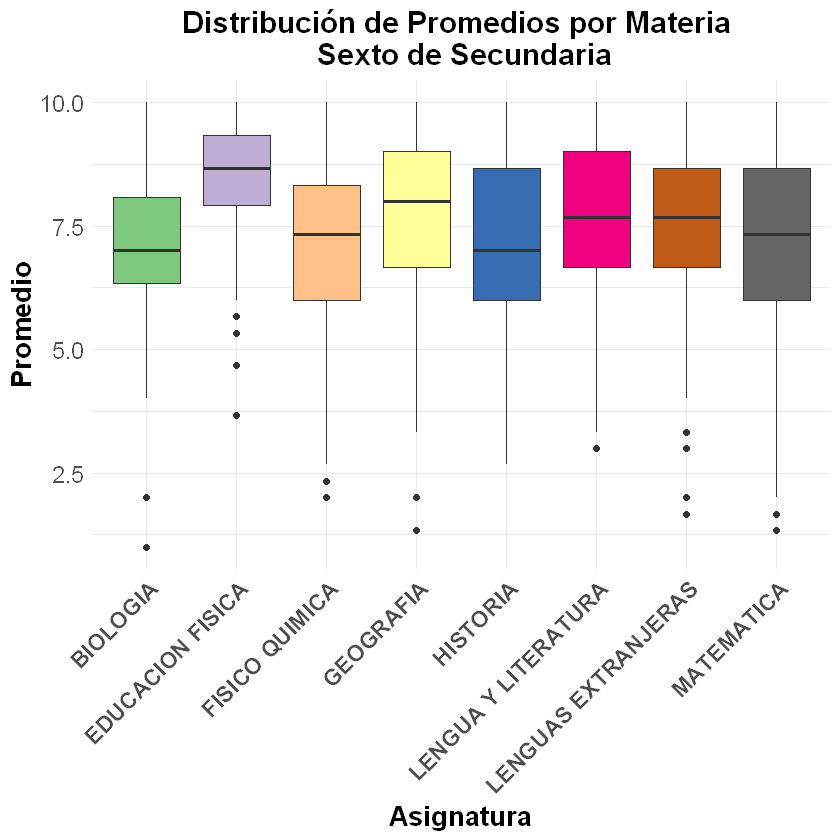

In [979]:
sextoSecundaria$Promedio <- as.numeric(sextoSecundaria$Promedio)
ggplot(sextoSecundaria, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Sexto de Secundaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )


In [980]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignaturaS6 <- sextoSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )
# Mostrar las estadísticas calculadas
print(estadisticas_por_asignaturaS6)

# A tibble: 8 x 4
  Asignatura          Media Mediana  Moda
  <chr>               <dbl>   <dbl> <dbl>
1 BIOLOGIA             7.19    7     7   
2 EDUCACION FISICA     8.44    8.67  9.33
3 FISICO QUIMICA       7.05    7.33  6   
4 GEOGRAFIA            7.77    8     9.67
5 HISTORIA             7.15    7     6   
6 LENGUA Y LITERATURA  7.55    7.67  6   
7 LENGUAS EXTRANJERAS  7.72    7.67  8.67
8 MATEMATICA           7.16    7.33  7   


In [981]:
summary_por_asignaturaS6 <- sextoSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignaturaS6)

# A tibble: 8 x 7
  Asignatura            Min    Q1 Mediana Media    Q3   Max
  <chr>               <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 BIOLOGIA             1     6.33    7     7.19  8.08    10
2 EDUCACION FISICA     3.67  7.92    8.67  8.44  9.33    10
3 FISICO QUIMICA       2     6       7.33  7.05  8.33    10
4 GEOGRAFIA            1.33  6.67    8     7.77  9       10
5 HISTORIA             2.67  6       7     7.15  8.67    10
6 LENGUA Y LITERATURA  3     6.67    7.67  7.55  9       10
7 LENGUAS EXTRANJERAS  1.67  6.67    7.67  7.72  8.67    10
8 MATEMATICA           1.33  6       7.33  7.16  8.67    10


In [982]:
# Aplicar la función a los aprobados
ks_resultadosS6 <- realizar_ks_test(sextoSecundaria)

# Mostrar los resultados
print(ks_resultadosS6)

 

[1] " **Hipótesis del test de Kolmogorov-Smirnov (KS) por materia**"
[1] "H0: Las notas siguen una distribución normal"
[1] "H1: Las notas NO siguen una distribución normal"
# A tibble: 8 x 2
  Asignatura          KS_p_value
  <chr>                    <dbl>
1 BIOLOGIA             0.0318   
2 EDUCACION FISICA     0.0000695
3 FISICO QUIMICA       0.157    
4 GEOGRAFIA            0.0176   
5 HISTORIA             0.0278   
6 LENGUA Y LITERATURA  0.0985   
7 LENGUAS EXTRANJERAS  0.0128   
8 MATEMATICA           0.0364   


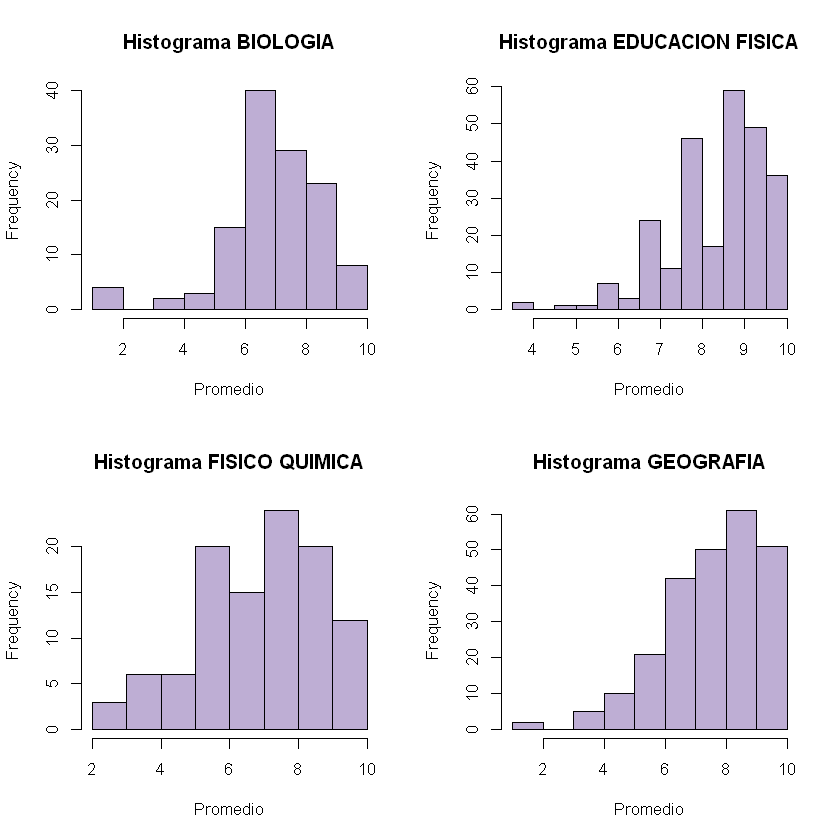

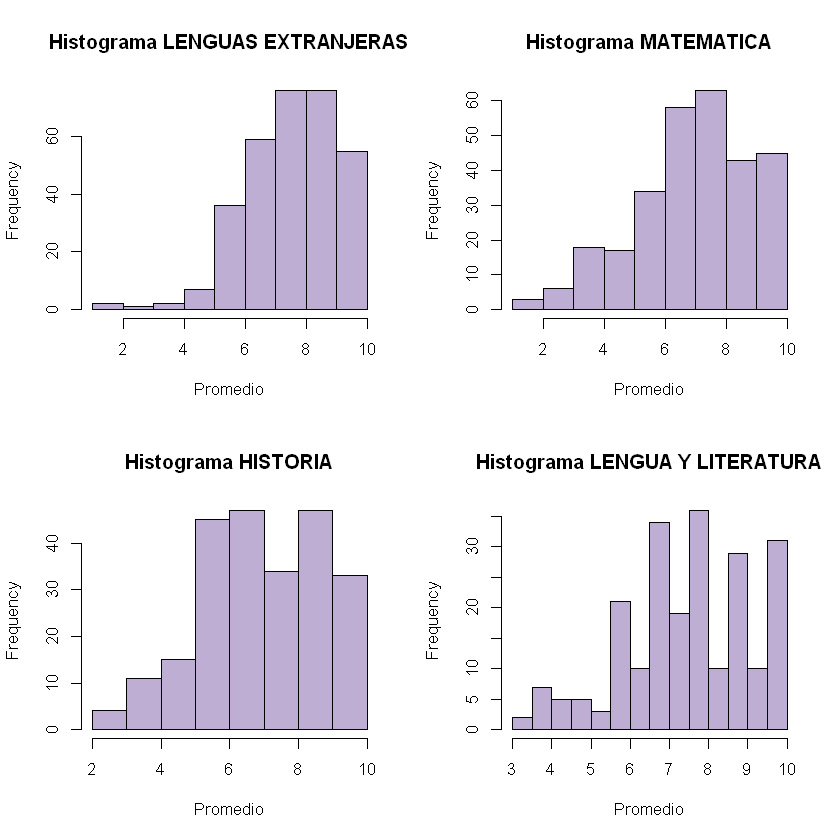

In [983]:
asignaturas <- unique(sextoSecundaria$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(sextoSecundaria, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma", materia),
       xlab = "Promedio", col = "#BEAED4", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos

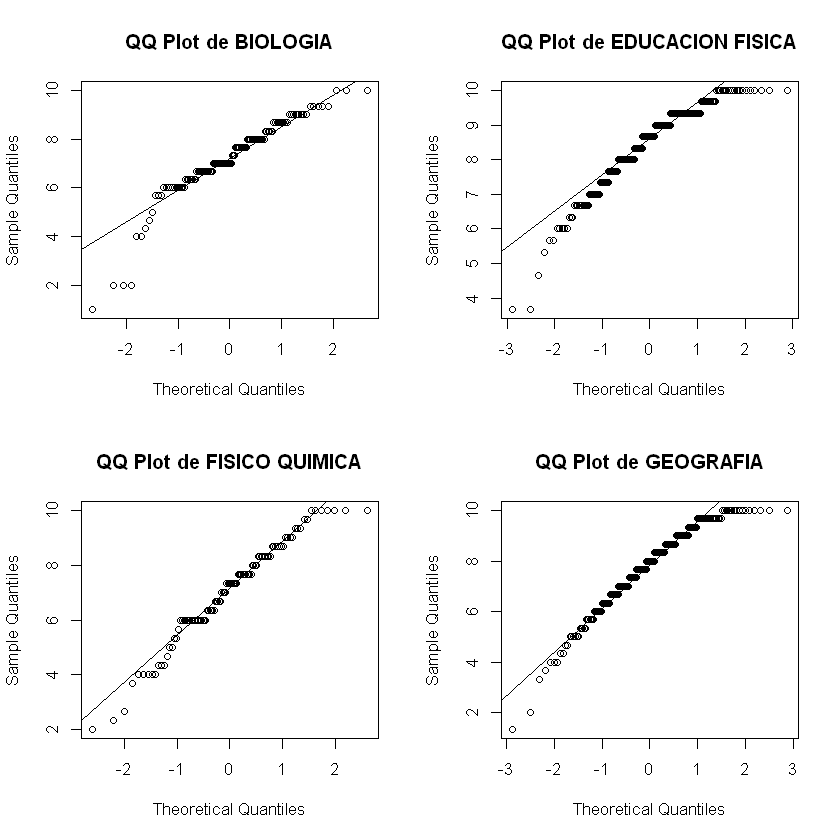

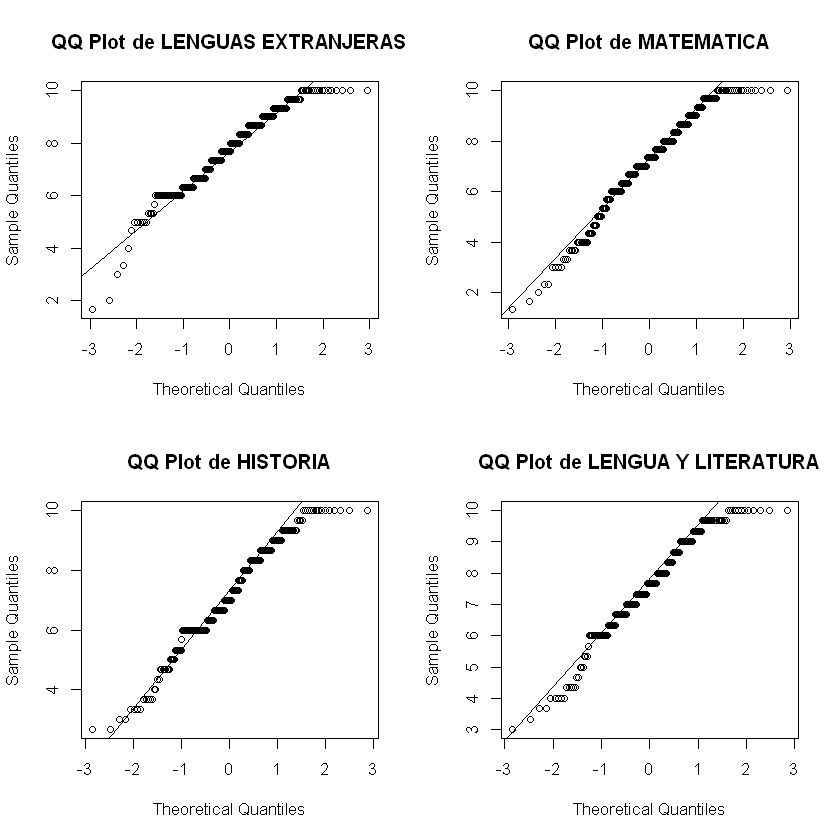

In [984]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(sextoSecundaria, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original

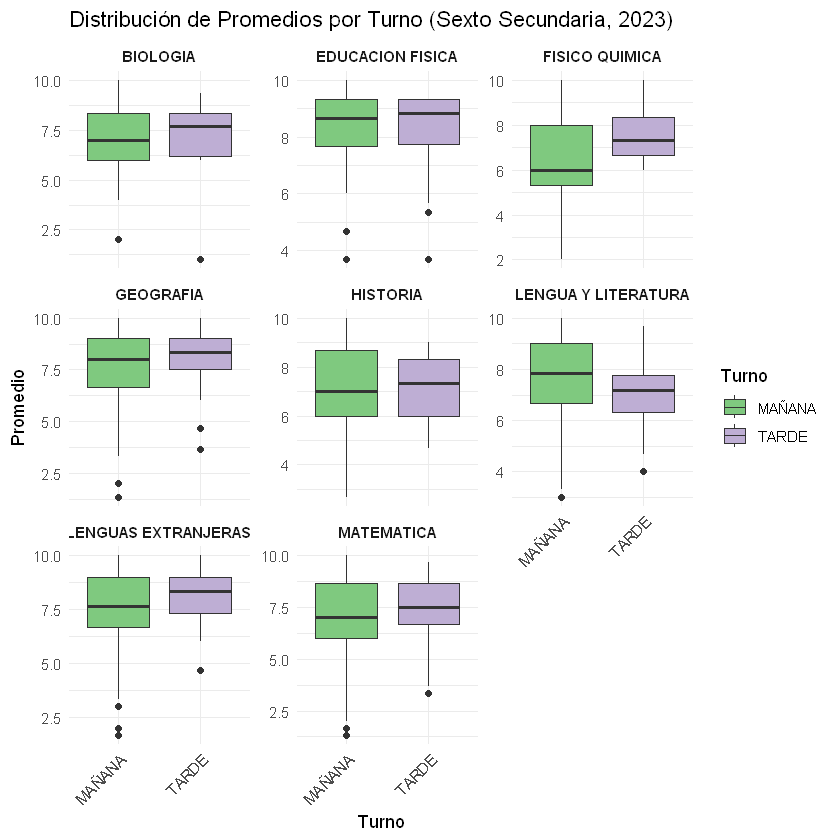

In [985]:
# Para Sexto Secundaria
sextoSecundaria_filtrado <- sextoSecundaria %>%
  filter(Turno %in% c("MAÑANA", "TARDE"))

ggplot(sextoSecundaria_filtrado, aes(x = Turno, y = Promedio, fill = Turno)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 2 filas
  labs(
    title = "Distribución de Promedios por Turno (Sexto Secundaria, 2023)",
    x = "Turno",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +
  theme_minimal() + 
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1), 
    strip.text = element_text(face = "bold", size = 9)
  )

In [986]:
resultados_kruskal <- kruskal_por_materia_y_turno(sextoSecundaria_filtrado)

# Ver los resultados
print(resultados_kruskal)

           Asignatura    P_value
1            BIOLOGIA 0.90748082
2    EDUCACION FISICA 0.61046789
3      FISICO QUIMICA 0.03159338
4           GEOGRAFIA 0.28995947
5 LENGUAS EXTRANJERAS 0.13124908
6          MATEMATICA 0.57232303
7            HISTORIA 0.81944437
8 LENGUA Y LITERATURA 0.02322840


In [987]:
# Filtrar datos por asignatura
FQ_m = sextoSecundaria_filtrado$Promedio[sextoSecundaria_filtrado$Asignatura == "FISICO QUIMICA" & sextoSecundaria_filtrado$Turno == "MAÑANA"]
FQ_t = sextoSecundaria_filtrado$Promedio[sextoSecundaria_filtrado$Asignatura == "FISICO QUIMICA" & sextoSecundaria_filtrado$Turno == "TARDE"]

LLI_m = sextoSecundaria_filtrado$Promedio[sextoSecundaria_filtrado$Asignatura == "LENGUA Y LITERATURA" & sextoSecundaria_filtrado$Turno == "MAÑANA"]
LLI_t = sextoSecundaria_filtrado$Promedio[sextoSecundaria_filtrado$Asignatura == "LENGUA Y LITERATURA" & sextoSecundaria_filtrado$Turno == "TARDE"]

# Mann-Whitney para Físico Química
resultado_FQ <- wilcox.test(FQ_m, FQ_t, alternative = "less", paired = FALSE)
print("Comparación de Físico Química:")
print(resultado_FQ)

# Mann-Whitney para Lengua y Literatura
resultado_LLI <- wilcox.test(LLI_m, LLI_t, alternative = "greater", paired = FALSE)
print("Comparación de Lengua y Literatura:")
print(resultado_LLI)


[1] "Comparación de Físico Química:"

	Wilcoxon rank sum test with continuity correction

data:  FQ_m and FQ_t
W = 404, p-value = 0.01602
alternative hypothesis: true location shift is less than 0

[1] "Comparación de Lengua y Literatura:"

	Wilcoxon rank sum test with continuity correction

data:  LLI_m and LLI_t
W = 4725, p-value = 0.01166
alternative hypothesis: true location shift is greater than 0



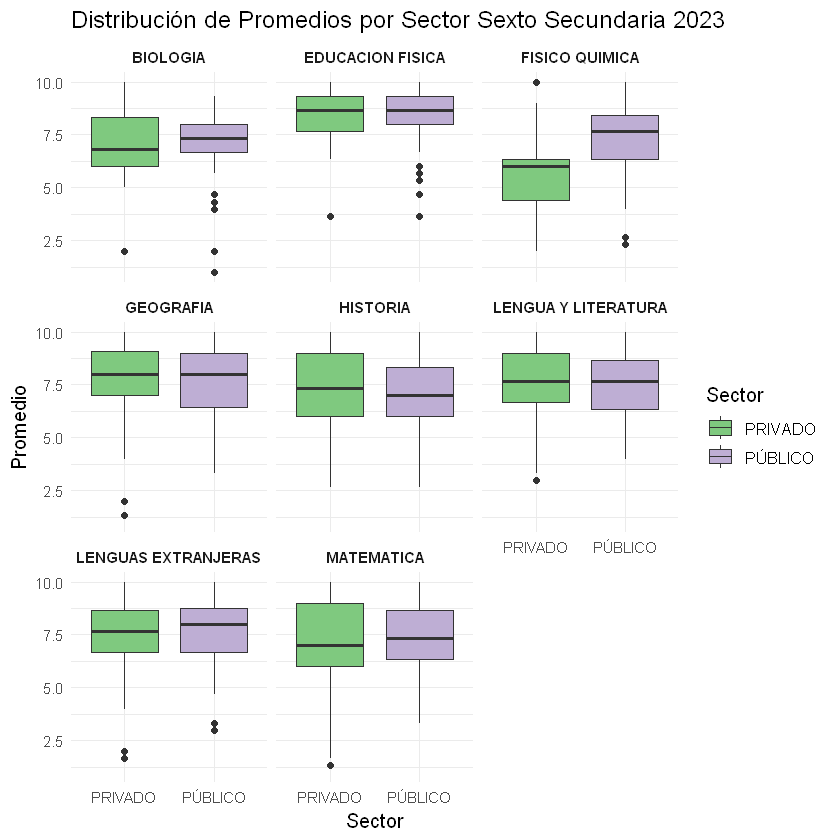

In [988]:
ggplot(sextoSecundaria, aes(x = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"), y = Promedio, fill = recode(EsPrivada, "S" = "PRIVADO", "N" = "PÚBLICO"))) +
  geom_boxplot() +
  facet_wrap(~ Asignatura) +  # Agrupar por asignatura
  scale_fill_brewer(palette = "Accent") +  # Usar paleta de colores "Accent"
  labs(title = "Distribución de Promedios por Sector Sexto Secundaria 2023",
       x = "Sector",
       y = "Promedio",
       fill = "Sector") +  # Ajuste de la leyenda
  theme_minimal() +
  theme(
    legend.position = "right",  # Leyenda a la derecha
    text = element_text(size = 12),  # Aumentar el tamaño de la fuente en todo el gráfico
    strip.text = element_text(face= "bold", size = 9),  # Aumentar el tamaño de las etiquetas de las asignaturas
    axis.title = element_text(size = 12),  # Aumentar el tamaño de los títulos de los ejes
    axis.text = element_text(size = 9)  # Aumentar el tamaño del texto de los ejes
  )

In [989]:
resultados_kruskal_privada <- kruskal_por_materia_y_privada(sextoSecundaria)

# Ver los resultados
print(resultados_kruskal_privada)


           Asignatura      P_value
1            BIOLOGIA 2.889059e-01
2    EDUCACION FISICA 8.766321e-01
3      FISICO QUIMICA 7.553027e-05
4           GEOGRAFIA 2.920017e-01
5 LENGUAS EXTRANJERAS 5.314445e-01
6          MATEMATICA 5.190468e-01
7            HISTORIA 2.222884e-02
8 LENGUA Y LITERATURA 2.077066e-01


In [990]:
# Filtrar los datos para cada asignatura
# Para Físico Química
FQ_S <- subset(sextoSecundaria_filtrado, EsPrivada == "S" & Asignatura == "FISICO QUIMICA")$Promedio
FQ_N <- subset(sextoSecundaria_filtrado, EsPrivada == "N" & Asignatura == "FISICO QUIMICA")$Promedio

# Realizar el test Mann-Whitney para Físico Química
resultado_FQ <- wilcox.test(FQ_S, FQ_N, alternative = "less", paired = FALSE)
print("Comparación de Físico Química:")
print(resultado_FQ)

# Para Historia
HIS_S <- subset(sextoSecundaria_filtrado, EsPrivada == "S" & Asignatura == "HISTORIA")$Promedio
HIS_N <- subset(sextoSecundaria_filtrado, EsPrivada == "N" & Asignatura == "HISTORIA")$Promedio

# Realizar el test Mann-Whitney para Historia
resultado_HIS <- wilcox.test(HIS_S, HIS_N, alternative = "greater", paired = FALSE)
print("Comparación de Historia:")
print(resultado_HIS)


[1] "Comparación de Físico Química:"

	Wilcoxon rank sum test with continuity correction

data:  FQ_S and FQ_N
W = 426.5, p-value = 0.00128
alternative hypothesis: true location shift is less than 0

[1] "Comparación de Historia:"

	Wilcoxon rank sum test with continuity correction

data:  HIS_S and HIS_N
W = 7360, p-value = 0.0119
alternative hypothesis: true location shift is greater than 0



In [991]:
# Filtrar por cada asignatura y aplicar el test de Friedman con cálculo de potencia
asignaturas6 <- unique(sextoSecundaria$Asignatura)  # Lista de asignaturas únicas

for (asignatura in asignaturas6) {
  # Filtrar datos para la asignatura específica
  datos_asignatura6 <- subset(sextoSecundaria, Asignatura == asignatura)
  
  # Verificar el número de estudiantes únicos en la asignatura
  N <- length(unique(datos_asignatura6$Documento))  # Número de estudiantes
  k <- 3  # Tres trimestres
  
  # Solo aplicar Friedman si hay suficientes datos
  if (N > 1) {
    # Realizar el Test de Friedman
    resultado_friedman <- friedman.test(y = as.matrix(datos_asignatura6[, c("NotasPrimerTrimestre", 
                                                                            "NotasSegundoTrimestre", 
                                                                            "NotasTercerTrimestre")]))
    
    # Calcular el tamaño del efecto
    chi2 <- resultado_friedman$statistic # Estadístico de Friedman
    f <- sqrt(chi2 / (N * (k - 1)))  # Tamaño del efecto

    # Calcular la potencia del test
    friedman_power <- pwr.anova.test(k = k, n = N, f = f, sig.level = 0.05)

    # Mostrar resultados
    cat("Resultados para", asignatura, ":\n")
    print(resultado_friedman)
    cat("Potencia del test:", round(friedman_power$power, 4), "\n\n")
  } else {
    cat("Resultados para", asignatura, ": No hay suficientes datos para realizar el test.\n\n")
  }
}


Resultados para BIOLOGIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura6[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 35.412, df = 2, p-value = 2.044e-08

Potencia del test: 1 

Resultados para EDUCACION FISICA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura6[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 75.32, df = 2, p-value < 2.2e-16

Potencia del test: 1 

Resultados para FISICO QUIMICA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura6[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 21.465, df = 2, p-value = 2.182e-05

Potencia del test: 0.9996 

Resultados para GEOGRAFIA :

	Friedman rank sum test

data:  as.matrix(datos_asignatura6[, c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre")])
Friedman chi-squared = 36.763, df = 2, p-value = 1.04e-08

Potenci

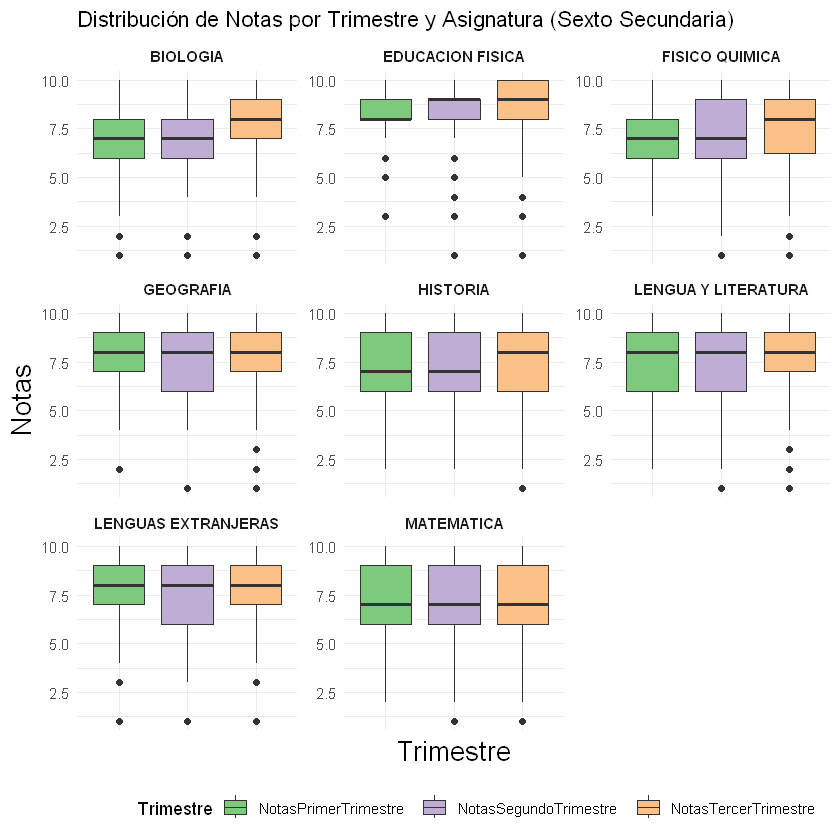

In [992]:
# Transformar los datos para poner los trimestres en una columna
sextoSecundaria_long <- sextoSecundaria %>%
  pivot_longer(cols = c("NotasPrimerTrimestre", "NotasSegundoTrimestre", "NotasTercerTrimestre"),
               names_to = "Trimestre", 
               values_to = "Notas")

# Crear el boxplot comparando las notas por trimestre y asignatura
ggplot(sextoSecundaria_long, aes(x = Trimestre, y = Notas, fill = Trimestre)) +
  geom_boxplot() +
  facet_wrap(~ Asignatura, scales = "free_y", ncol = 3) +  # Dividir en 3 columnas
  labs(
    title = "Distribución de Notas por Trimestre y Asignatura (Sexto Secundaria)",
    x = "Trimestre",
    y = "Notas"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() + 
  theme(
    axis.text.x = element_blank(),  # Eliminar los valores del eje X
    axis.title.x = element_text(size = 16),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16),  # Tamaño del título del eje Y
    strip.text = element_text(face = "bold", size = 9),  # Reducir el tamaño de la letra de las materias
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.direction = "horizontal",  # Alinear la leyenda horizontalmente
    legend.justification = "right"  # Colocar la leyenda a la derecha
  )

In [993]:
sextoSecundaria_tabla <- sextoSecundaria %>%
  select(Asignatura, NotasPrimerTrimestre, NotasSegundoTrimestre, NotasTercerTrimestre)

# Ver el dataset filtrado
head(sextoSecundaria_tabla)


Asignatura,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,10,10,10
EDUCACION FISICA,9,10,10
FISICO QUIMICA,10,10,10
GEOGRAFIA,10,10,10
LENGUAS EXTRANJERAS,10,10,10
MATEMATICA,10,10,10


In [994]:
# Calcular los promedios por asignatura
promedios_por_asignatura_sexto <- sextoSecundaria_tabla %>%
  group_by(Asignatura) %>%
  summarise(
    PrimerTrimestre = mean(NotasPrimerTrimestre, na.rm = TRUE),
    SegundoTrimestre = mean(NotasSegundoTrimestre, na.rm = TRUE),
    TercerTrimestre = mean(NotasTercerTrimestre, na.rm = TRUE)
  )

# Verificamos cómo quedó el dataset
head(promedios_por_asignatura_sexto)


Asignatura,PrimerTrimestre,SegundoTrimestre,TercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,6.919355,7.201613,7.435484
EDUCACION FISICA,8.257812,8.429688,8.640625
FISICO QUIMICA,6.801887,7.056604,7.292453
GEOGRAFIA,7.760331,7.590909,7.950413
HISTORIA,7.110169,7.033898,7.296610
LENGUA Y LITERATURA,7.436937,7.513514,7.698198


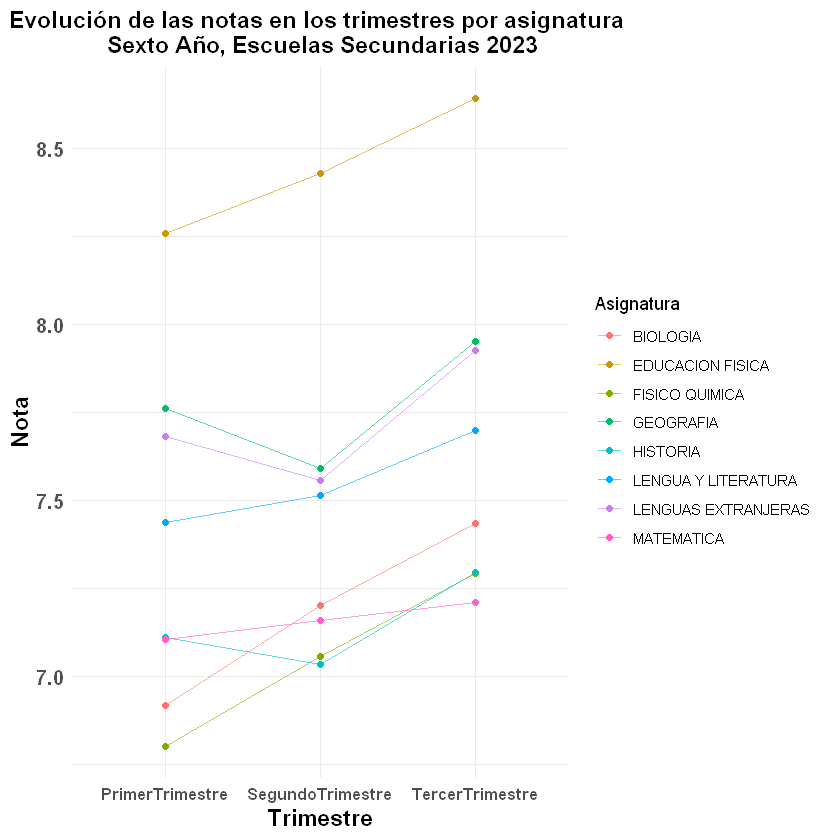

In [995]:
ggparcoord(promedios_por_asignatura_sexto, 
           columns = 2:4, 
           groupColumn = "Asignatura", 
           scale = "globalminmax", 
           alpha = 0.6, 
           showPoints = TRUE) +
  labs(title = "Evolución de las notas en los trimestres por asignatura \n Sexto Año, Escuelas Secundarias 2023",  # Título dividido en dos líneas
       x = "Trimestre", 
       y = "Nota") +
  theme_minimal() +
  theme(
    axis.title.x = element_text(size = 14, face = "bold"),  # Eje X en negrita y más grande
    axis.title.y = element_text(size = 14, face = "bold"),  # Eje Y en negrita y más grande
    axis.text.x = element_text(size = 10, face = "bold"),   # Valores del eje X en negrita y más grandes
    axis.text.y = element_text(size = 12, face = "bold"),   # Valores del eje Y en negrita y más grandes
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5)  # Título en negrita, más grande y centrado
  )

#### Septimo Secundaria ####

In [996]:
# Filtrar para secundaria y las materias troncales seleccionadas
septimoSecundaria <- nogoya_SECUNDARIO %>%
  filter(NivelEnsenanza == "SECUNDARIO",  # Filtrar para Secundaria
         Curso == "SEPTIMO",  # Aseguramos que sea Segundo (ajustar si es otro curso)
         Asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "HISTORIA", "BIOLOGIA", "GEOGRAFIA", "FISICO QUIMICA", "EDUCACION FISICA", "LENGUAS EXTRANJERAS")) %>%
  distinct(Documento, Asignatura, .keep_all = TRUE)  # Mantiene solo una fila por Documento y Asignatura
table(septimoSecundaria$Condicion)


   APROBADO DESAPROBADO 
         71           8 

In [997]:
# Crear tabla de frecuencias por materia y condición
tabla_condicionesS7 <- septimoSecundaria %>%
  group_by(Asignatura, Condicion) %>%
  summarise(Cantidad = n(), .groups = "drop") %>%
  pivot_wider(names_from = Condicion, values_from = Cantidad, values_fill = list(Cantidad = 0)) %>%
  mutate(
    Aprobado_Percent = `APROBADO` / (`APROBADO` + `DESAPROBADO`) * 100,  # Porcentaje de aprobados
    Desaprobado_Percent = `DESAPROBADO` / (`APROBADO` + `DESAPROBADO`) * 100  # Porcentaje de desaprobados
  )
tabla_condicionesS7

Asignatura,APROBADO,DESAPROBADO,Aprobado_Percent,Desaprobado_Percent
<chr>,<int>,<int>,<dbl>,<dbl>
EDUCACION FISICA,5,0,100.00000,0.000000
FISICO QUIMICA,31,6,83.78378,16.216216
MATEMATICA,35,2,94.59459,5.405405


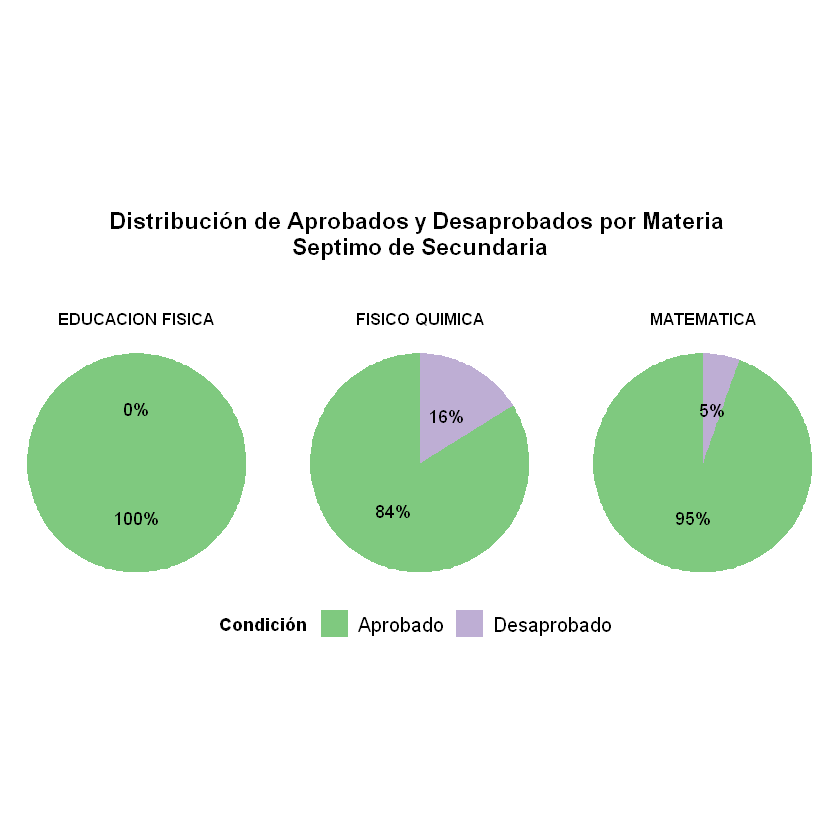

In [998]:
# Primero, transformamos los datos para que Aprobado_Percent y Desaprobado_Percent estén en una sola columna
tabla_condiciones_longS7 <- tabla_condicionesS7 %>%
  select(Asignatura, Aprobado_Percent, Desaprobado_Percent) %>%
  pivot_longer(cols = c(Aprobado_Percent, Desaprobado_Percent), 
               names_to = "Condicion", 
               values_to = "Porcentaje") %>%
  mutate(
    Condicion = recode(Condicion, 
                       "Aprobado_Percent" = "Aprobado", 
                       "Desaprobado_Percent" = "Desaprobado")  # Renombrar las condiciones
  )

# Crear gráfico de torta por cada materia usando la paleta Accent con porcentajes redondeados
ggplot(tabla_condiciones_longS7, aes(x = "", y = Porcentaje, fill = Condicion)) +
  geom_bar(stat = "identity") +
  coord_polar(theta = "y") + 
  facet_wrap(~ Asignatura) +  # Crear un gráfico de torta por cada asignatura
  geom_text(aes(label = scales::percent(round(Porcentaje / 100, 2))), position = position_stack(vjust = 0.5)) +  # Redondear los porcentajes a 2 decimales
  labs(
    title = "Distribución de Aprobados y Desaprobados por Materia \n Septimo de Secundaria \n \n",
    fill = "Condición"
  ) +
  scale_fill_manual(values = brewer.pal(3, "Accent")[1:2]) +  # Usar los colores de la paleta Accent
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    strip.text = element_text(face = "bold", size = 10),  # Títulos de cada gráfico de torta
    legend.position = "bottom",  # Mover la leyenda a la parte inferior
    legend.title = element_text(face = "bold"),  # Título de la leyenda en negrita
    legend.text = element_text(size = 12)  # Tamaño del texto de la leyenda
  )


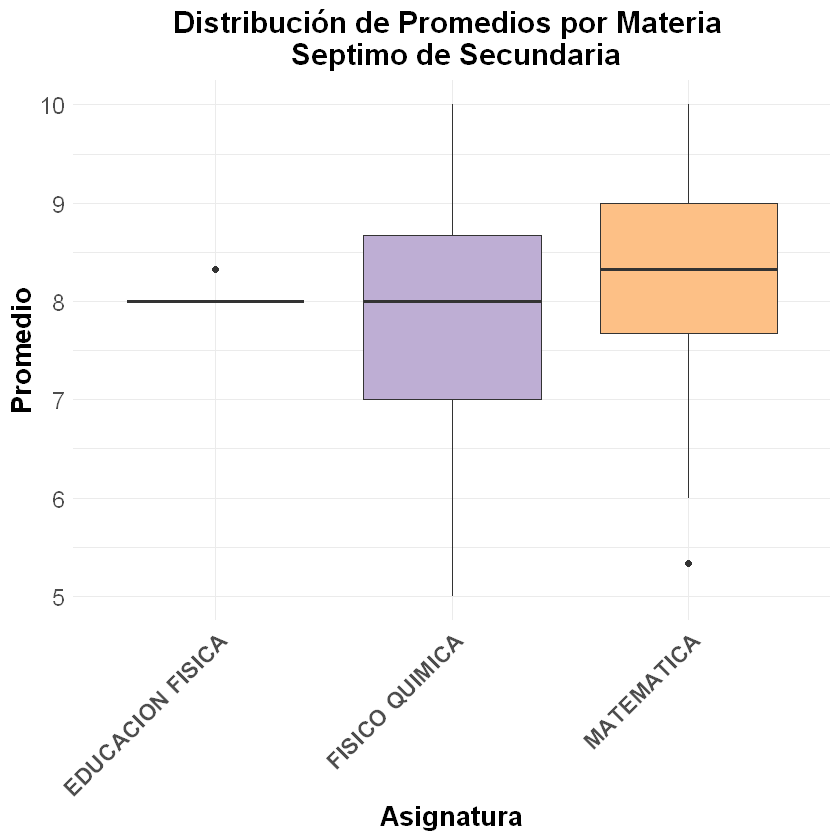

In [999]:
septimoSecundaria$Promedio <- as.numeric(septimoSecundaria$Promedio)
ggplot(septimoSecundaria, aes(x = Asignatura, y = Promedio, fill = Asignatura)) +
  geom_boxplot() +
  labs(
    title = "Distribución de Promedios por Materia \n Septimo de Secundaria",
    x = "Asignatura",
    y = "Promedio"
  ) +
  scale_fill_brewer(palette = "Accent") +  # Usar la paleta Accent
  theme_minimal() +  
  theme(
    legend.position = "none",  # Ocultar leyenda
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14, face = "bold"),  # Rotar nombres y hacerlos más grandes
    axis.text.y = element_text(size = 14),  # Tamaño de los valores del eje Y
    axis.title.x = element_text(size = 16, face = "bold"),  # Tamaño del título del eje X
    axis.title.y = element_text(size = 16, face = "bold"),  # Tamaño del título del eje Y
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)  # Título centrado y más grande
  )



In [1000]:
# Calcular la media, mediana y moda para cada asignatura en primeroPrimaria
estadisticas_por_asignaturaS7 <- septimoSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Media = mean(Promedio),
    Mediana = median(Promedio),
    Moda = as.numeric(names(sort(table(Promedio), decreasing = TRUE)[1])),
    .groups = "drop"
  )
# Mostrar las estadísticas calculadas
print(estadisticas_por_asignaturaS7)

# A tibble: 3 x 4
  Asignatura       Media Mediana  Moda
  <chr>            <dbl>   <dbl> <dbl>
1 EDUCACION FISICA  8.07    8        8
2 FISICO QUIMICA    7.60    8        8
3 MATEMATICA        8.15    8.33     9


In [1001]:
summary_por_asignaturaS7 <- septimoSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Min = min(Promedio),
    Q1 = quantile(Promedio, 0.25),
    Mediana = median(Promedio),
    Media = mean(Promedio),
    Q3 = quantile(Promedio, 0.75),
    Max = max(Promedio),
    .groups = "drop"
  )

print(summary_por_asignaturaS7)

# A tibble: 3 x 7
  Asignatura         Min    Q1 Mediana Media    Q3   Max
  <chr>            <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl>
1 EDUCACION FISICA  8     8       8     8.07  8     8.33
2 FISICO QUIMICA    5     7       8     7.60  8.67 10   
3 MATEMATICA        5.33  7.67    8.33  8.15  9    10   


In [1002]:
# Realizar test de Shapiro-Wilk por cada asignatura con impresión de las hipótesis
shapiro_test_resultados <- septimoSecundaria %>%
  group_by(Asignatura) %>%
  summarise(
    Shapiro_p_value = shapiro.test(Promedio)$p.value,
    .groups = "drop"
  )

# Imprimir las hipótesis
cat(" **Hipótesis del test de Shapiro-Wilk por materia**\n")
cat("H0: Las notas siguen una distribución normal\n")
cat("H1: Las notas NO siguen una distribución normal\n\n")

# Imprimir los resultados con p-values
print(shapiro_test_resultados)


 **Hipótesis del test de Shapiro-Wilk por materia**
H0: Las notas siguen una distribución normal
H1: Las notas NO siguen una distribución normal

# A tibble: 3 x 2
  Asignatura       Shapiro_p_value
  <chr>                      <dbl>
1 EDUCACION FISICA        0.000131
2 FISICO QUIMICA          0.0233  
3 MATEMATICA              0.0321  


Dado que todos los p-values son menores a 0.05, se rechaza la hipótesis nula (H₀) en todas las materias. Esto significa que las notas no siguen una distribución normal en ninguno de los casos. 

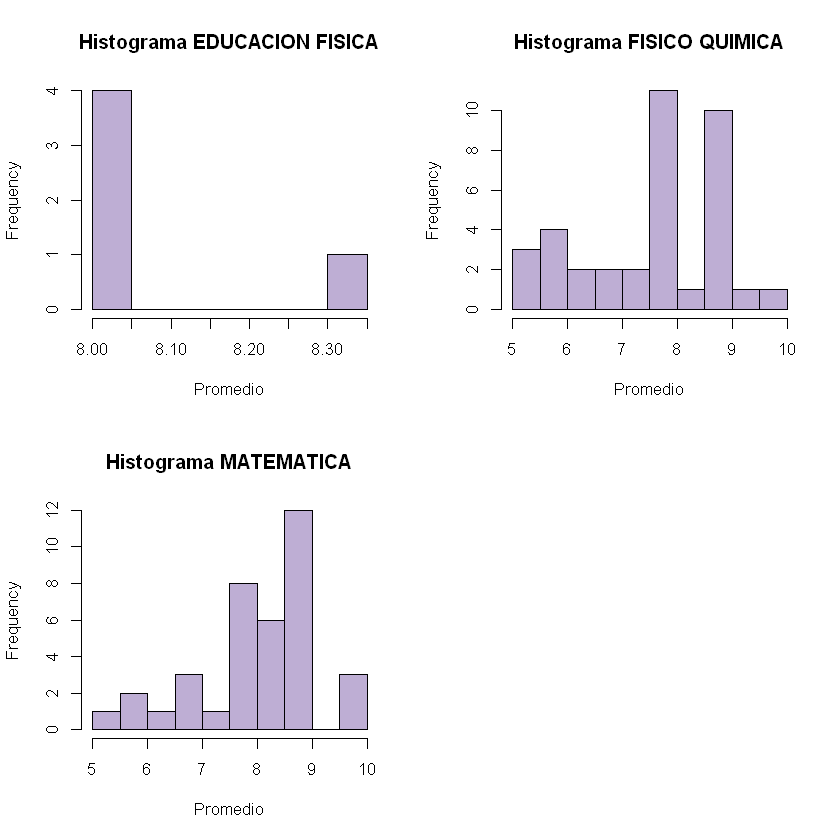

In [1003]:
asignaturas <- unique(septimoSecundaria$Asignatura)

par(mfrow = c(2, 2))  # Para mostrar varios gráficos en la misma ventana
for (materia in asignaturas) {
  datos_materia <- subset(septimoSecundaria, Asignatura == materia)$Promedio
  hist(datos_materia, main = paste("Histograma", materia),
       xlab = "Promedio", col = "#BEAED4", border = "black", breaks = 10)
}
par(mfrow = c(1, 1))  # Restaurar la configuración de gráficos


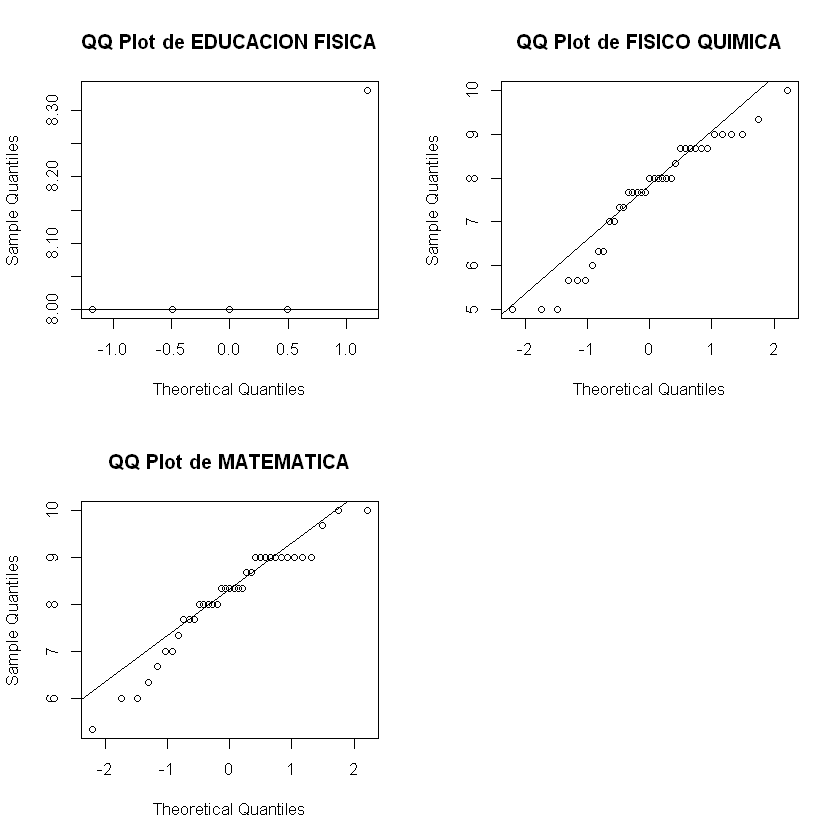

In [1004]:
par(mfrow = c(2, 2))  # Dividir la ventana en 2x2
for (materia in asignaturas) {
  datos_materia <- subset(septimoSecundaria, Asignatura == materia)$Promedio
  qqnorm(datos_materia, main = paste("QQ Plot de", materia))
  qqline(datos_materia)  # Línea de referencia
}
par(mfrow = c(1, 1))  # Restaurar la configuración original


#### Generalidades Secundaria

In [1005]:
long_data_filtered <- nogoya_SECUNDARIO %>%
  filter(Asignatura %in% c("MATEMATICA", "LENGUA Y LITERATURA", "HISTORIA", 
                           "BIOLOGIA", "GEOGRAFIA", "FISICO QUIMICA", 
                           "EDUCACION FISICA", "LENGUAS EXTRANJERAS")) %>%
  select(Asignatura, Curso, NotasPrimerTrimestre, NotasSegundoTrimestre, NotasTercerTrimestre)

# Ver el dataset filtrado
head(long_data_filtered)

Asignatura,Curso,NotasPrimerTrimestre,NotasSegundoTrimestre,NotasTercerTrimestre
<chr>,<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,PRIMERO,6,7,7
EDUCACION FISICA,PRIMERO,7,7,8
HISTORIA,PRIMERO,6,6,7
LENGUA Y LITERATURA,PRIMERO,7,7,8
LENGUAS EXTRANJERAS,PRIMERO,6,7,7
MATEMATICA,PRIMERO,6,6,6


In [1006]:
# Calcular los promedios por asignatura
promedios_por_asignatura <- long_data_filtered %>%
  group_by(Asignatura) %>%
  summarise(
    PrimerTrimestre = mean(NotasPrimerTrimestre, na.rm = TRUE),
    SegundoTrimestre = mean(NotasSegundoTrimestre, na.rm = TRUE),
    TercerTrimestre = mean(NotasTercerTrimestre, na.rm = TRUE)
  )

# Verificamos cómo quedó el dataset
head(promedios_por_asignatura)



Asignatura,PrimerTrimestre,SegundoTrimestre,TercerTrimestre
<chr>,<dbl>,<dbl>,<dbl>
BIOLOGIA,6.836518,6.736377,6.968507
EDUCACION FISICA,7.733938,7.822231,7.895152
FISICO QUIMICA,7.100704,6.952817,6.950000
GEOGRAFIA,7.014968,6.914239,6.857201
HISTORIA,6.694672,6.592213,6.651230
LENGUA Y LITERATURA,6.704010,6.625052,6.715585


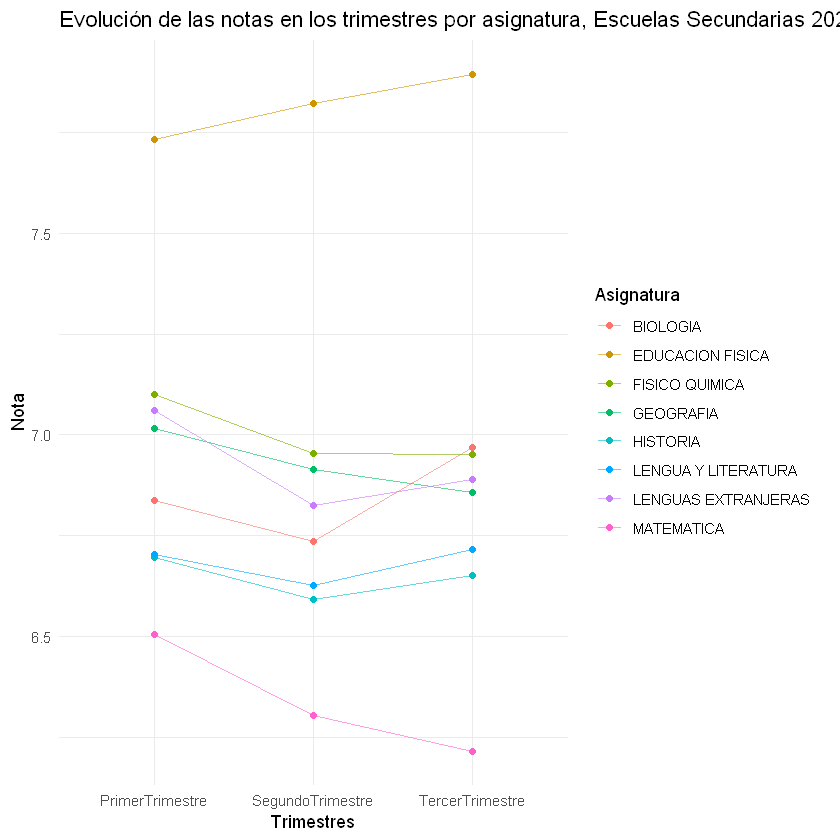

In [1007]:
# Graficar las coordenadas paralelas
library(GGally)

ggparcoord(promedios_por_asignatura, 
           columns = 2:4, 
           groupColumn = "Asignatura", 
           scale = "globalminmax", 
           alpha = 0.6, 
           showPoints = TRUE) +
  labs(title = "Evolución de las notas en los trimestres por asignatura, Escuelas Secundarias 2023",
       x = "Trimestres", 
       y = "Nota") +
  theme_minimal()


In [1008]:
# Convertir Curso a un factor con los niveles específicos y ordenados
long_data_filtered$Curso <- factor(long_data_filtered$Curso, 
                                   levels = c("PRIMERO", "SEGUNDO", "TERCERO", 
                                              "CUARTO", "QUINTO", "SEXTO", "SEPTIMO"))

# Verificar que no haya NA y que los niveles estén correctamente asignados
sum(is.na(long_data_filtered$Curso))  # Verifica que no hay NA
levels(long_data_filtered$Curso)      # Verifica los niveles del factor


[1] 0

[1] "PRIMERO" "SEGUNDO" "TERCERO" "CUARTO"  "QUINTO"  "SEXTO"   "SEPTIMO"

In [1009]:
# Calcular los promedios por Curso
promedios_por_curso <- long_data_filtered %>%
  group_by(Curso) %>%
  summarise(
    PrimerTrimestre = mean(NotasPrimerTrimestre, na.rm = TRUE),
    SegundoTrimestre = mean(NotasSegundoTrimestre, na.rm = TRUE),
    TercerTrimestre = mean(NotasTercerTrimestre, na.rm = TRUE)
  )

# Verificamos cómo quedó el dataset
promedios_por_curso

Curso,PrimerTrimestre,SegundoTrimestre,TercerTrimestre
<fct>,<dbl>,<dbl>,<dbl>
PRIMERO,6.778724,6.623905,6.586417
SEGUNDO,6.587967,6.385442,6.386248
TERCERO,6.716203,6.547779,6.538191
CUARTO,7.104798,7.012652,7.066842
QUINTO,7.292227,7.270894,7.383986
SEXTO,7.407656,7.442584,7.711962
SEPTIMO,8.016129,7.943548,7.782258


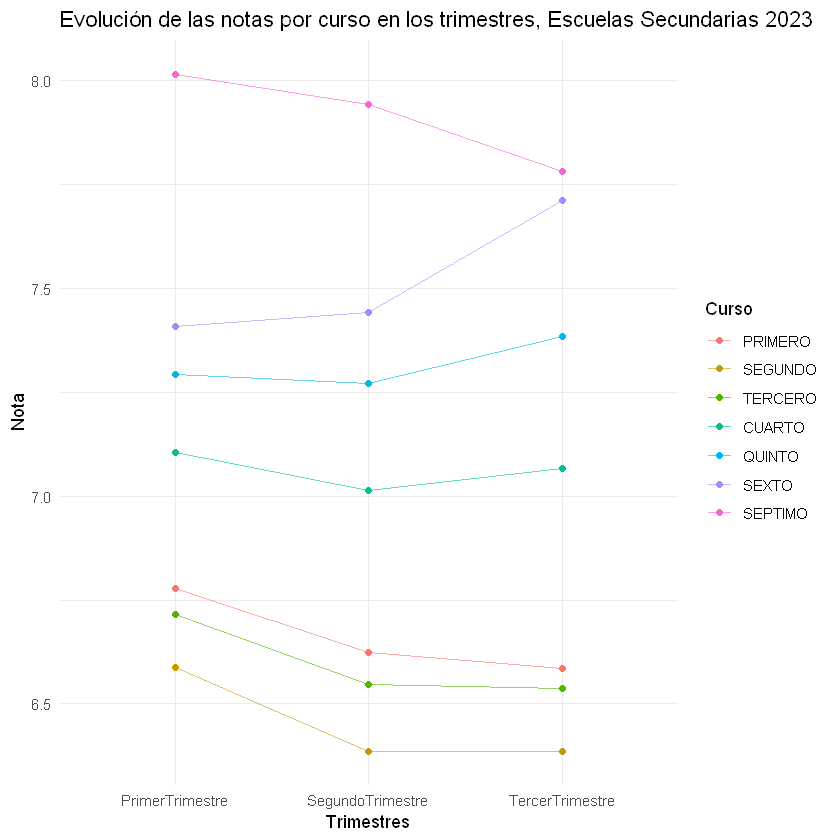

In [1010]:

# Graficar las coordenadas paralelas
library(GGally)

ggparcoord(promedios_por_curso, 
           columns = 2:4, 
           groupColumn = "Curso", 
           scale = "globalminmax", 
           alpha = 0.6, 
           showPoints = TRUE) +
  labs(title = "Evolución de las notas por curso en los trimestres, Escuelas Secundarias 2023",
       x = "Trimestres", 
       y = "Nota") +
  theme_minimal()


#### Comparación entre Niveles

In [1011]:
# Asegurarse de que la columna Desempeño esté en el orden correcto
primeroSecundaria$Desempeño <- factor(primeroSecundaria$Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))
sextoPrimaria$Desempeño <- factor(sextoPrimaria$Desempeño, levels = c("Insuficiente", "Aprobado", "Bueno", "Muy Bueno", "Distinguido"))

# Suponiendo que tienes la columna EsPrivada en ambos datasets
# Obtener los valores únicos de EsPrivada en ambos datasets
es_privada_primero <- unique(primeroSecundaria$EsPrivada)
es_privada_sexto <- unique(sextoPrimaria$EsPrivada)

# Crear listas vacías para almacenar las tablas de contingencia
tablas_contingencia_publicas <- list()
tablas_contingencia_privadas <- list()

# Repetir para cada valor de EsPrivada (S y N) en ambos datasets
for (privada in es_privada_primero) {
  
  # Filtrar los datos por EsPrivada en primeroSecundaria
  primero_privada <- subset(primeroSecundaria, EsPrivada == privada)
  
  # Filtrar los datos por EsPrivada en sextoPrimaria
  sexto_privada <- subset(sextoPrimaria, EsPrivada == privada)
  
  # Contar las frecuencias de desempeño en sexto de primaria (por EsPrivada)
  sexto_primaria <- table(sexto_privada$Desempeño)
  
  # Contar las frecuencias de desempeño en primero de secundaria (por EsPrivada)
  primero_secundaria <- table(primero_privada$Desempeño)
  
  # Unir las tablas en una tabla de contingencia
  tabla_contingencia <- cbind(sexto_primaria, primero_secundaria)
  
  # Guardar la tabla de contingencia según el valor de EsPrivada
  if (privada == "S") {
    tablas_contingencia_privadas[[privada]] <- tabla_contingencia
  } else {
    tablas_contingencia_publicas[[privada]] <- tabla_contingencia
  }
  
  # Mostrar la tabla de contingencia por EsPrivada
  cat("Tabla de contingencia para EsPrivada =", privada, "\n")
  print(tabla_contingencia)
  
  # Realizar el test de Chi-cuadrado
  test_chi2 <- chisq.test(tabla_contingencia)
  
  # Mostrar los resultados del test para EsPrivada
  cat("Resultados del test de Chi-cuadrado para EsPrivada =", privada, ":\n")
  print(test_chi2)
  
  # Interpretación
  if (test_chi2$p.value < 0.05) {
    cat("Hay una diferencia significativa en las distribuciones de desempeño entre sexto de primaria y primero de secundaria para EsPrivada =", privada, ".\n")
  } else {
    cat("No hay diferencia significativa en las distribuciones de desempeño entre sexto de primaria y primero de secundaria para EsPrivada =", privada, ".\n")
  }
  
  # Mostrar tabla de contingencia observada
  cat("Tabla Observada para EsPrivada =", privada, ":\n")
  print(test_chi2$observed)
  
  # Mostrar tabla de valores esperados (redondeados)
  cat("Tabla Esperada (redondeada) para EsPrivada =", privada, ":\n")
  print(round(test_chi2$expected, 0))
  
  # Mostrar residuos
  cat("Residuos para EsPrivada =", privada, ":\n")
  print(round(test_chi2$residuals, 1))
  
  # Mostrar residuos estandarizados
  cat("Residuos Estandarizados para EsPrivada =", privada, ":\n")
  print(round(test_chi2$stdres, 1))
  
  cat("\n\n")
}




Tabla de contingencia para EsPrivada = N 
             sexto_primaria primero_secundaria
Insuficiente             51               1043
Aprobado                197                649
Bueno                   189                547
Muy Bueno               226                585
Distinguido             239                557
Resultados del test de Chi-cuadrado para EsPrivada = N :

	Pearson's Chi-squared test

data:  tabla_contingencia
X-squared = 250.01, df = 4, p-value < 2.2e-16

Hay una diferencia significativa en las distribuciones de desempeño entre sexto de primaria y primero de secundaria para EsPrivada = N .
Tabla Observada para EsPrivada = N :
             sexto_primaria primero_secundaria
Insuficiente             51               1043
Aprobado                197                649
Bueno                   189                547
Muy Bueno               226                585
Distinguido             239                557
Tabla Esperada (redondeada) para EsPrivada = N :
           

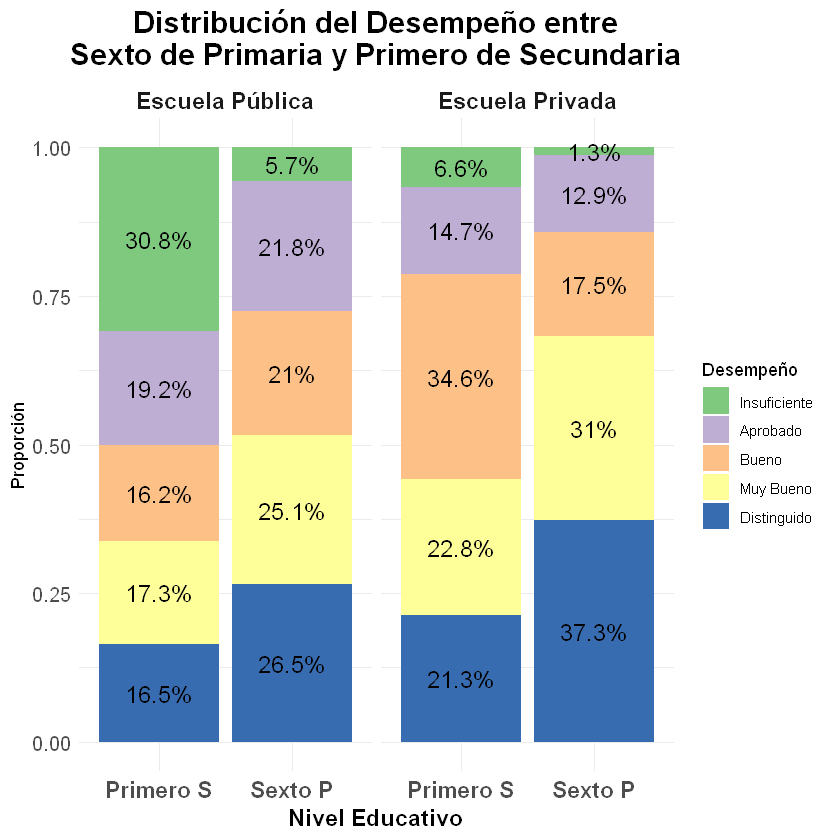

In [1012]:


# Unir ambos datasets con una columna que indique el nivel educativo
sextoPrimaria$Nivel <- "Sexto P"
primeroSecundaria$Nivel <- "Primero S"

# Unir los datasets
datos_comb <- rbind(sextoPrimaria, primeroSecundaria)

# Calcular los porcentajes dentro de cada grupo
datos_porcentajes <- datos_comb %>%
  group_by(EsPrivada, Nivel, Desempeño) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(EsPrivada, Nivel) %>%
  mutate(percentage = count / sum(count) * 100)

ggplot(datos_porcentajes, aes(x = Nivel, y = percentage, fill = Desempeño)) +
  geom_bar(stat = "identity", position = "fill") +  # "fill" para barras apiladas proporcionales
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_fill(vjust = 0.5), size = 5) +  # Tamaño más grande para los porcentajes
  facet_wrap(~EsPrivada, labeller = as_labeller(c("N" = "Escuela Pública", "S" = "Escuela Privada"))) +
  labs(title = "Distribución del Desempeño entre\nSexto de Primaria y Primero de Secundaria",
       x = "Nivel Educativo",
       y = "Proporción",
       fill = "Desempeño") +
  scale_fill_brewer(palette = "Accent") +  # Usa la paleta "Accent"
  theme_minimal() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),  # Título más grande y centrado
        axis.text.x = element_text(size = 14, face = "bold"),  # Aumenta el tamaño del texto en el eje X
        axis.title.x = element_text(size = 14, face = "bold"), # Aumenta el tamaño del título del eje X
        axis.text.y = element_text(size = 12),  # También agranda el eje Y
        strip.text = element_text(size = 14, face = "bold"))  # Agranda los títulos de las facetas


